<a href="https://colab.research.google.com/github/BrainConnection/Quantum_Algorithm/blob/main/7.%205Q%20TFIM%20VQNHE%20CNN%20QEM%20ZZ%20Crosstalk%203%204%205%2015%2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-algorithms
!pip install qiskit-aer

!pip install scipy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.0/318.0 kB 12.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
    

In [ ]:
from functools import cache

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")

# Hamiltonian Diagonalization

$$ H = Σ Z_j Z_{j+1} - Σ X_j  $$

1D 5 Qubit System

In [ ]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

lowest_energy = np.min(eigenvalue)

np.real(lowest_energy)

-6.026674183332294

# 8. CNN Estimation - ZZ Crosstalk (CUSCO 3 4 5 15 22)

## ZZ Crosstalk, Shots = 10000

CUSCO 3 4 5 15 22

J = 1MHz

1. Optimize Parameters in PQC

2. Fix Parameters in PQC and Connect Neural Net Layer, Optimize Parameters in Neural Net

### Ansatz, Hamiltonian, Sampler & Estimator Setting

CUSCO 3 4 5 15 22

J = 1MHz

In [87]:
# Qubit Number 3,4,5,15,22

J = 0.001                                                   # Unit : GHz
freq = [5.232, 5.138, 4.988, 5.015, 5.282]                  # Unit : GHz
anharm = [-0.30373, -0.3054, -0.30755, -0.30699, -0.303]    # Unit : GHz

In [88]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.circuit.library import RZZGate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
)

In [89]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [90]:
# ZZ Crosstalk Frequency

H1 = np.array([[freq[0], J], [J, freq[1]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_34 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[1], J], [J, freq[2]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_45 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[2], J], [J, freq[3]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_415 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[3], J], [J, freq[4]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_1522 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2

[5.23201064 5.13798936]
[10.16026046 10.37001454  9.97059499]
1.4542737942768724e-05
[5.13800667 4.98799333]
[ 9.97058713 10.12601724  9.66844563]
1.723952758059255e-05
[4.98796301 5.01503699]
[ 9.66844402 10.00301312  9.72300286]
1.3120722719861533e-05
[5.01499625 5.28200375]
[ 9.72300652 10.29705895 10.26094454]
5.8948757417631725e-05


In [91]:
crosstalk_freq_34, crosstalk_freq_45, crosstalk_freq_415, crosstalk_freq_1522

(7.271368971384362e-06,
 8.619763790296275e-06,
 6.560361359930766e-06,
 2.9474378708815863e-05)

In [92]:
gate_01 = 460
gate_12 = 460
gate_23 = 460
gate_34 = 460

gate_single = 40

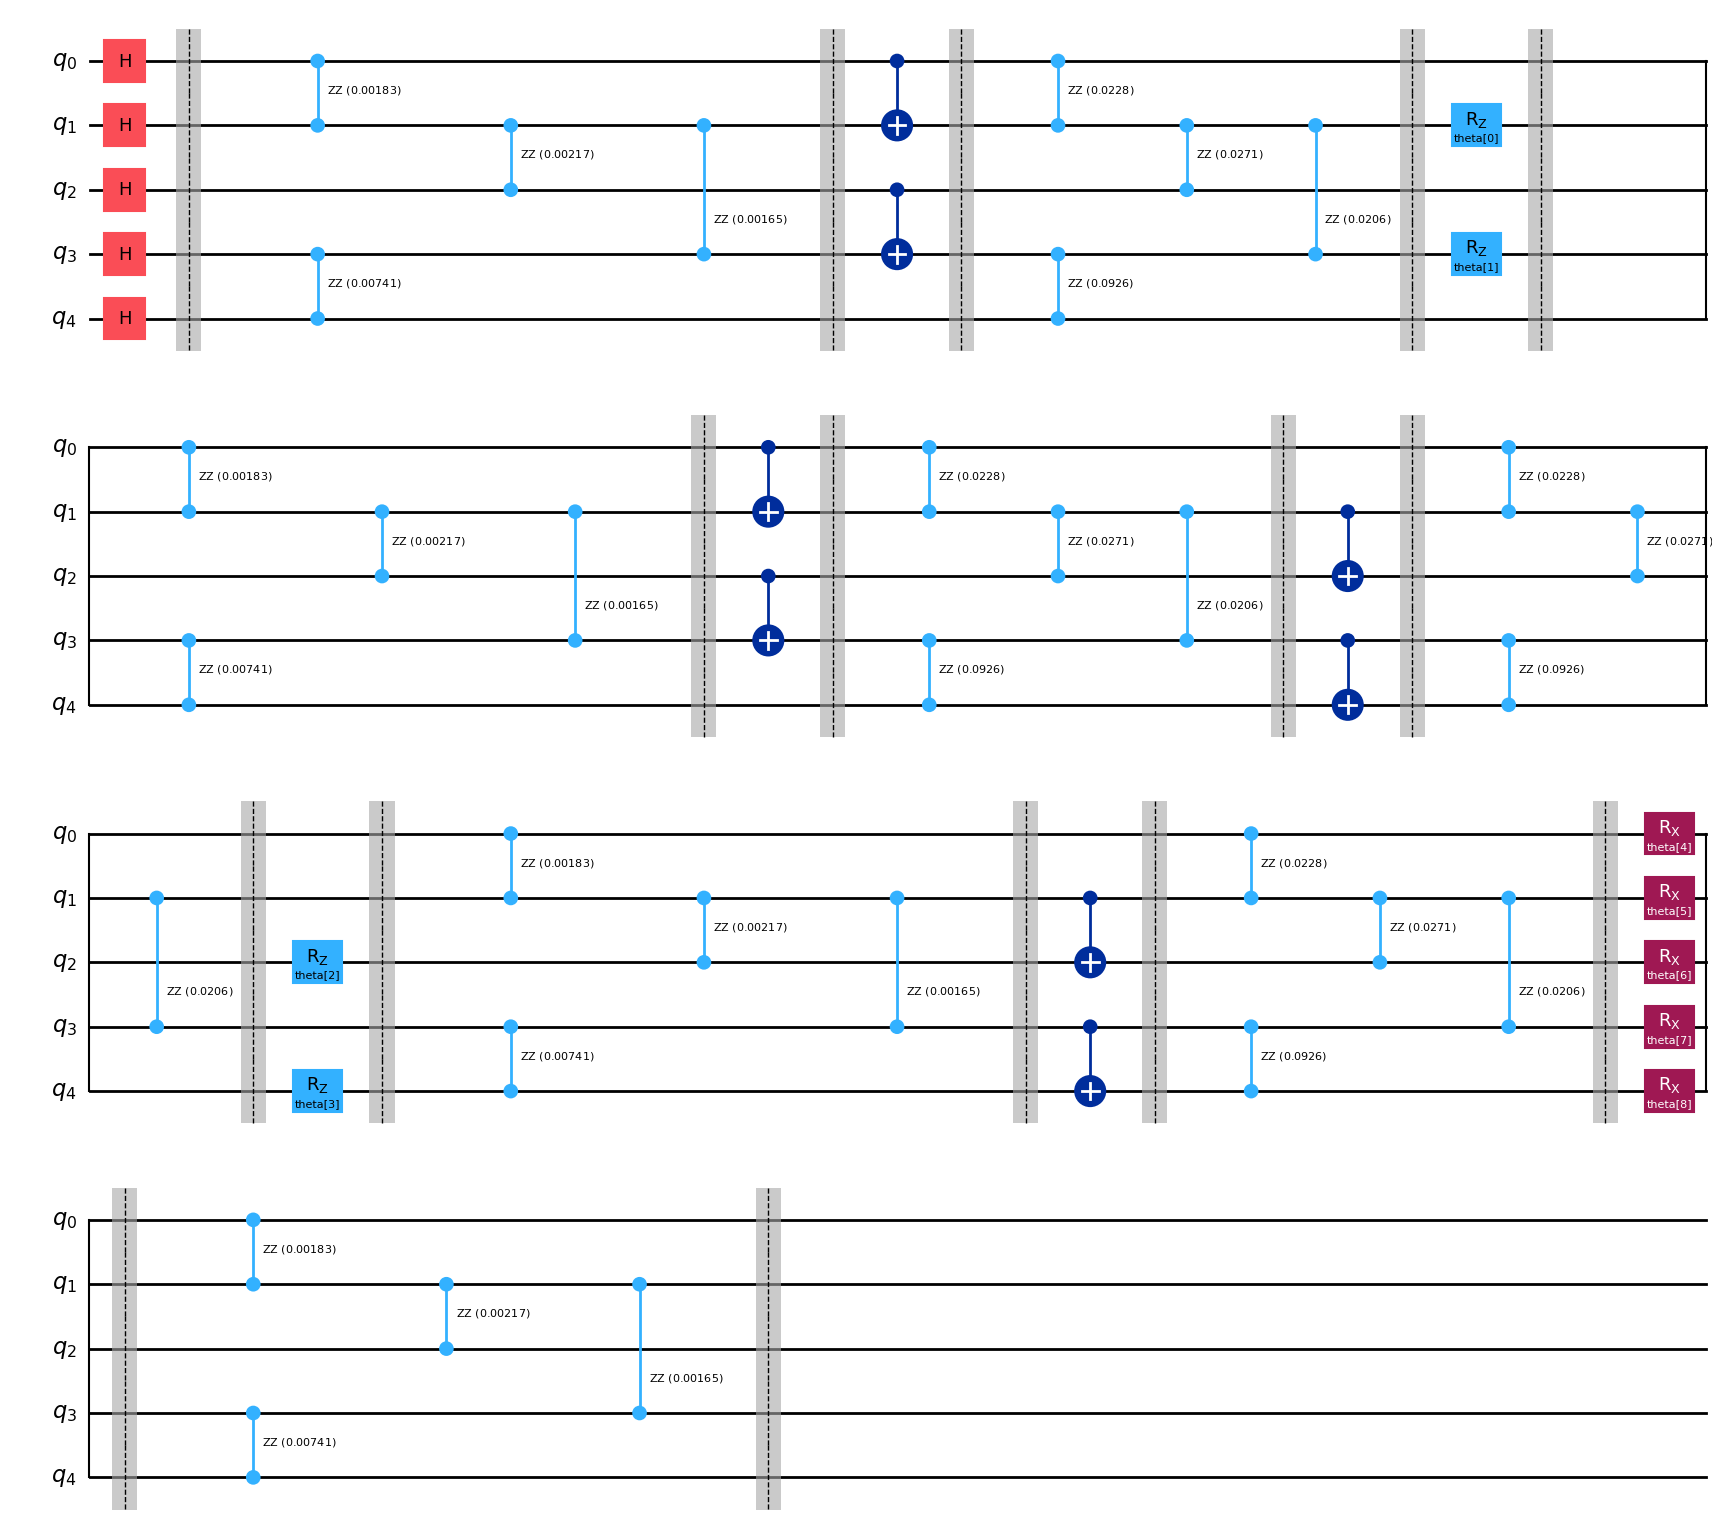

In [93]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)

ansatz.h(range(0,5))
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatz.barrier()


ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatz.barrier()


ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatz.barrier()


ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.draw("mpl")

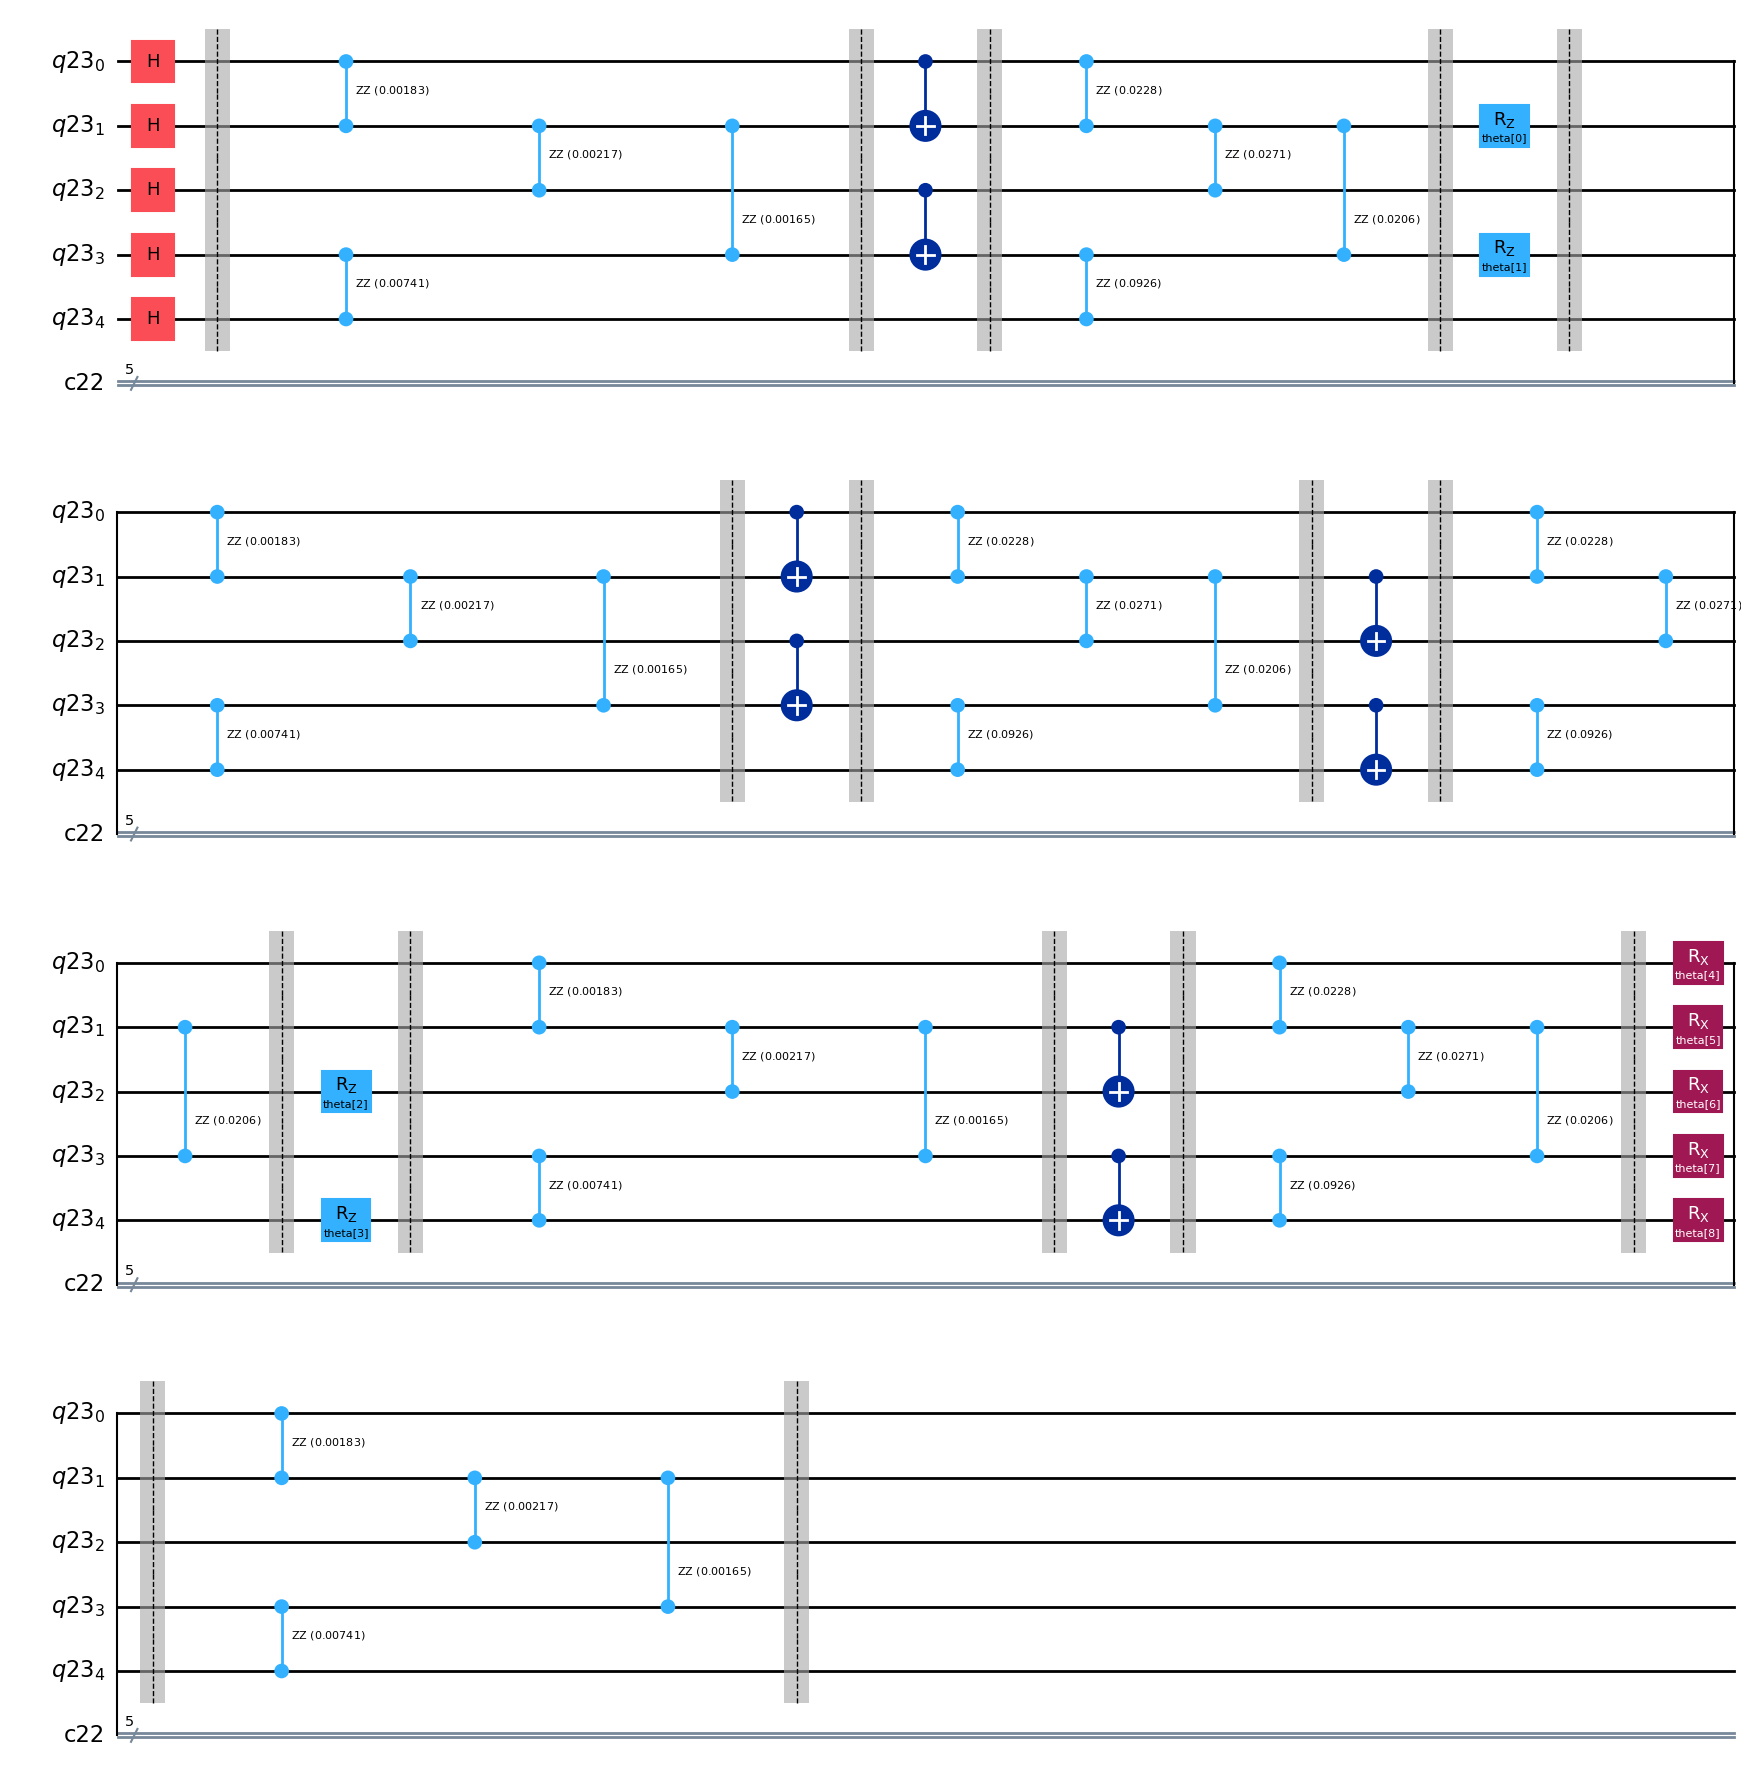

In [94]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

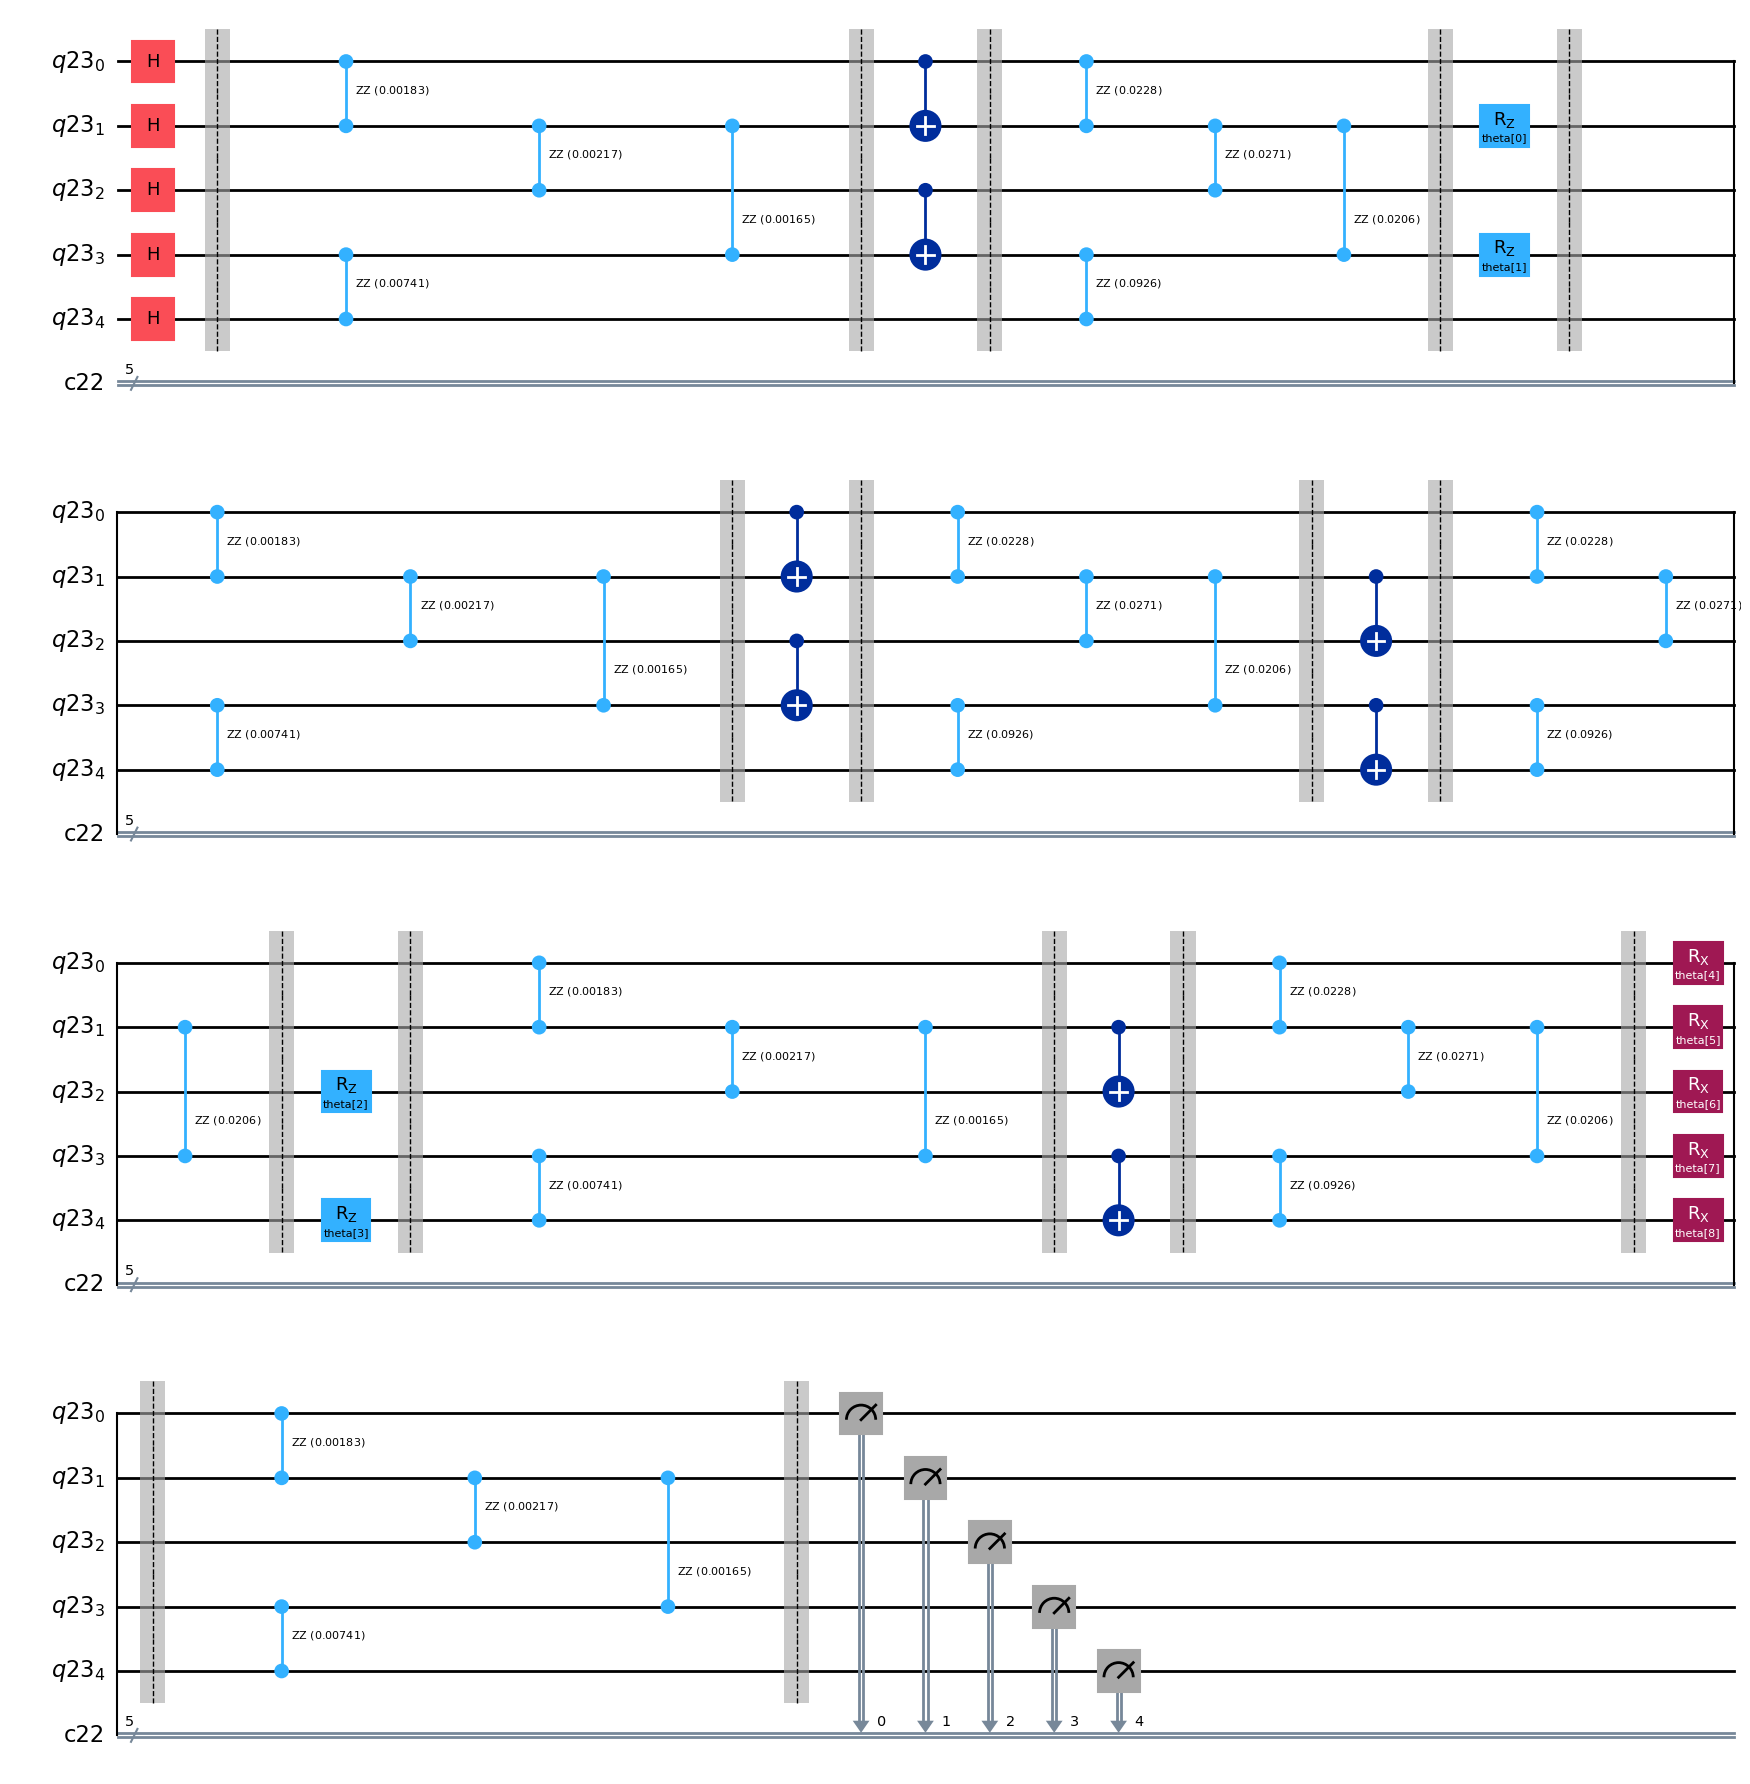

In [95]:
# Ansatz for VQNHE ZZ Measurement

ansatz_zz = ansatzo

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

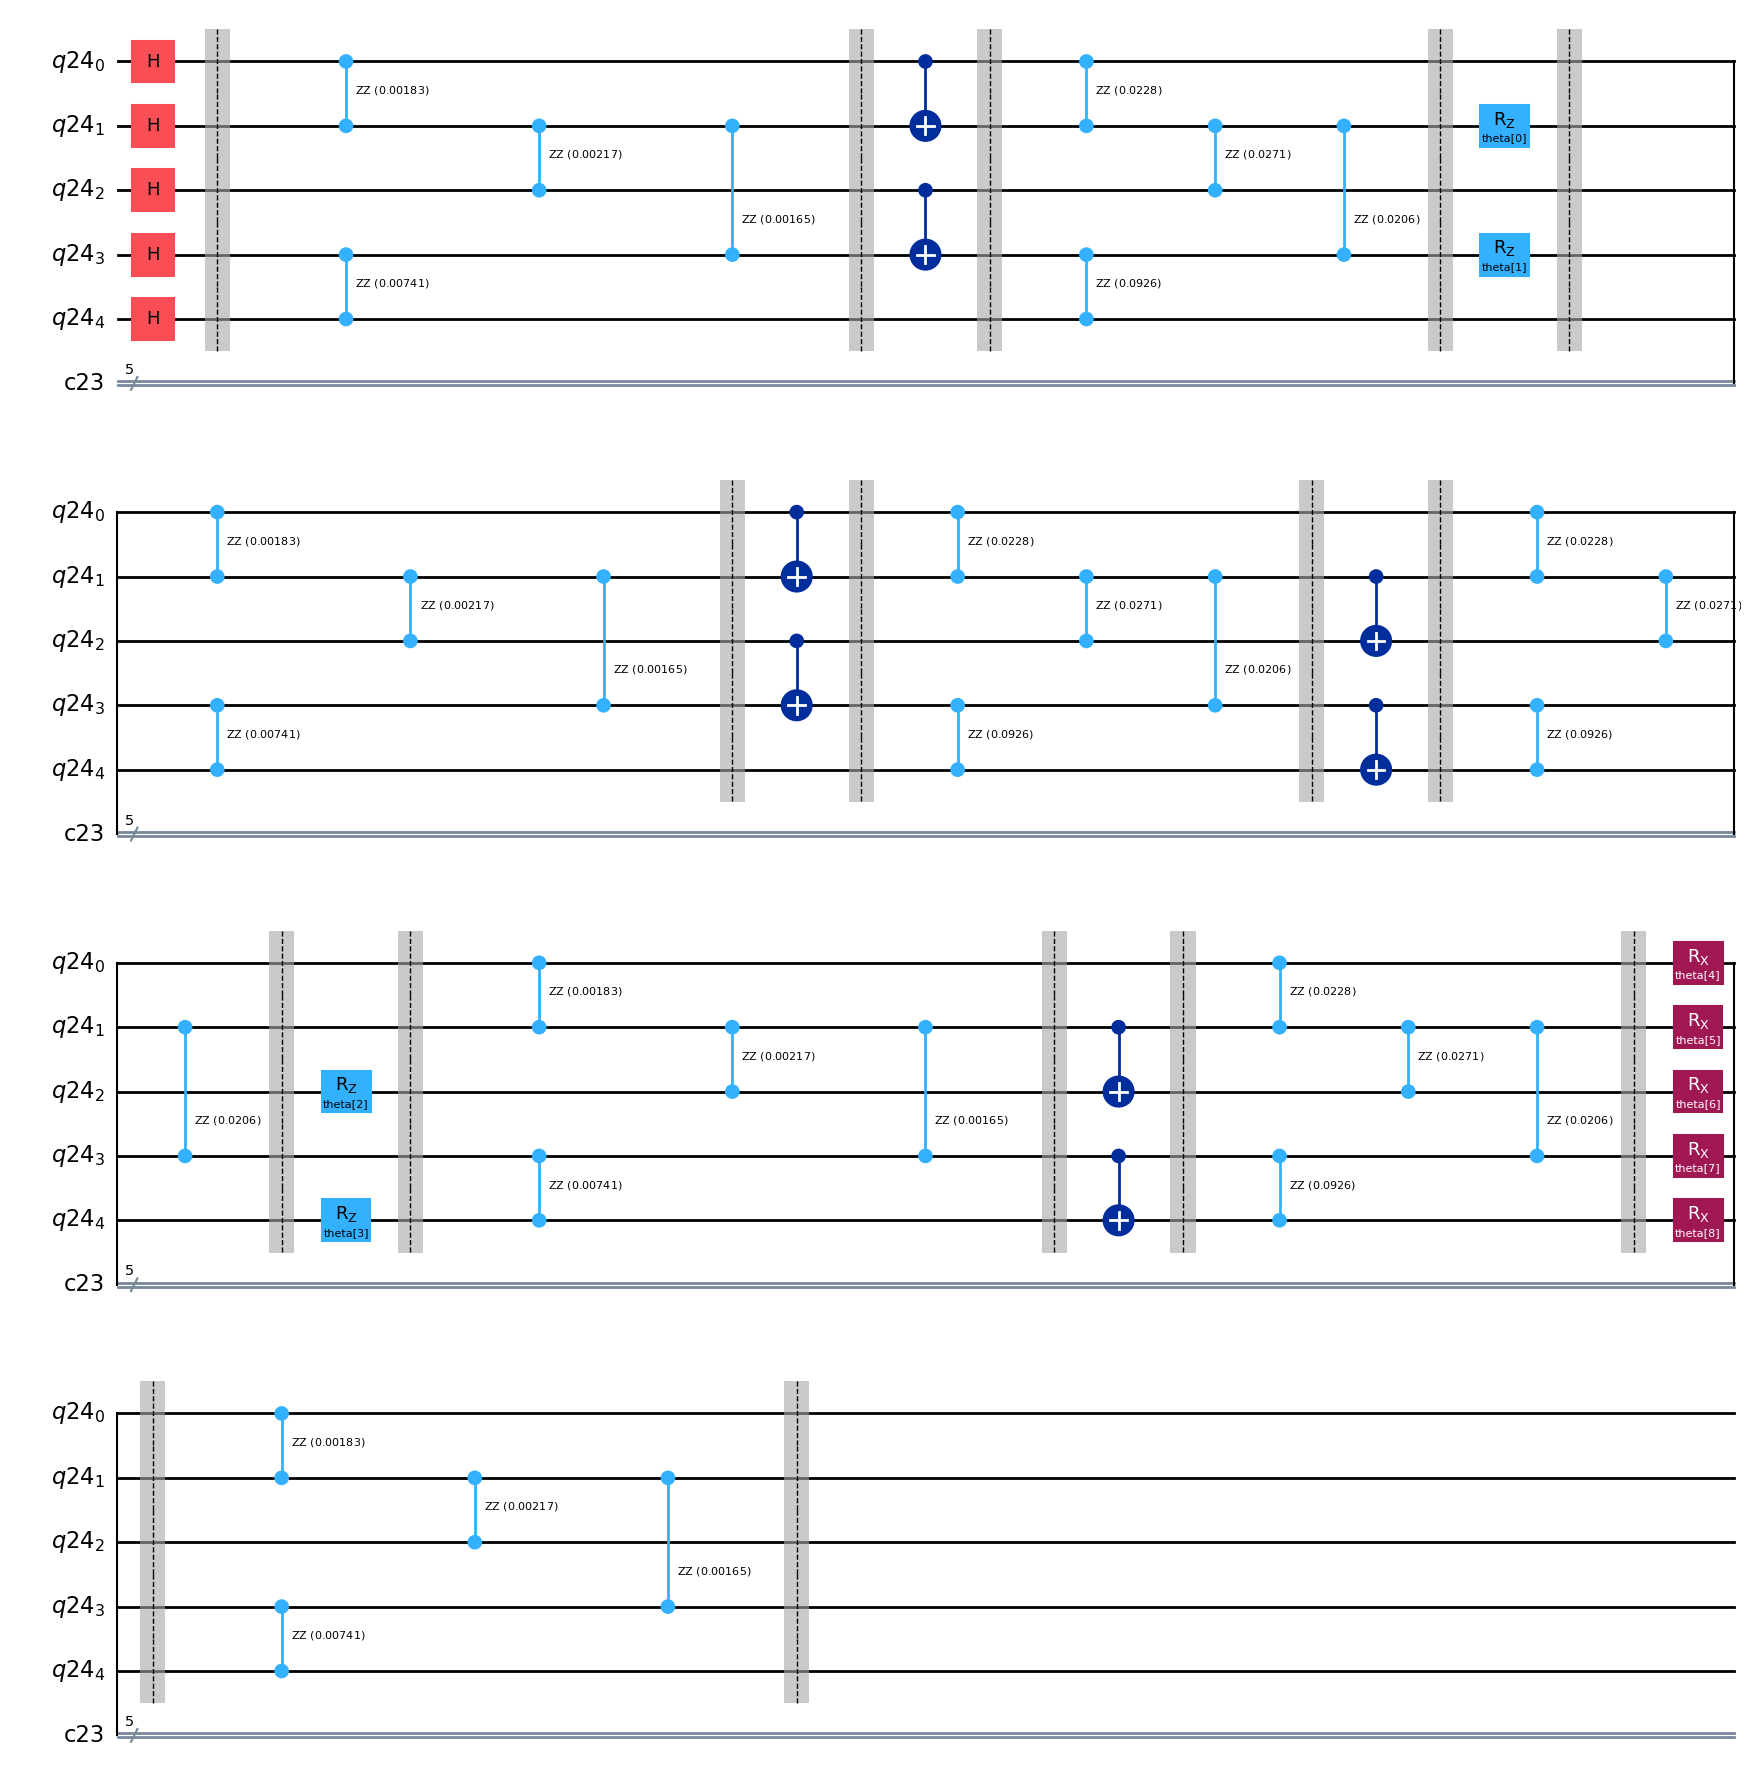

In [96]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

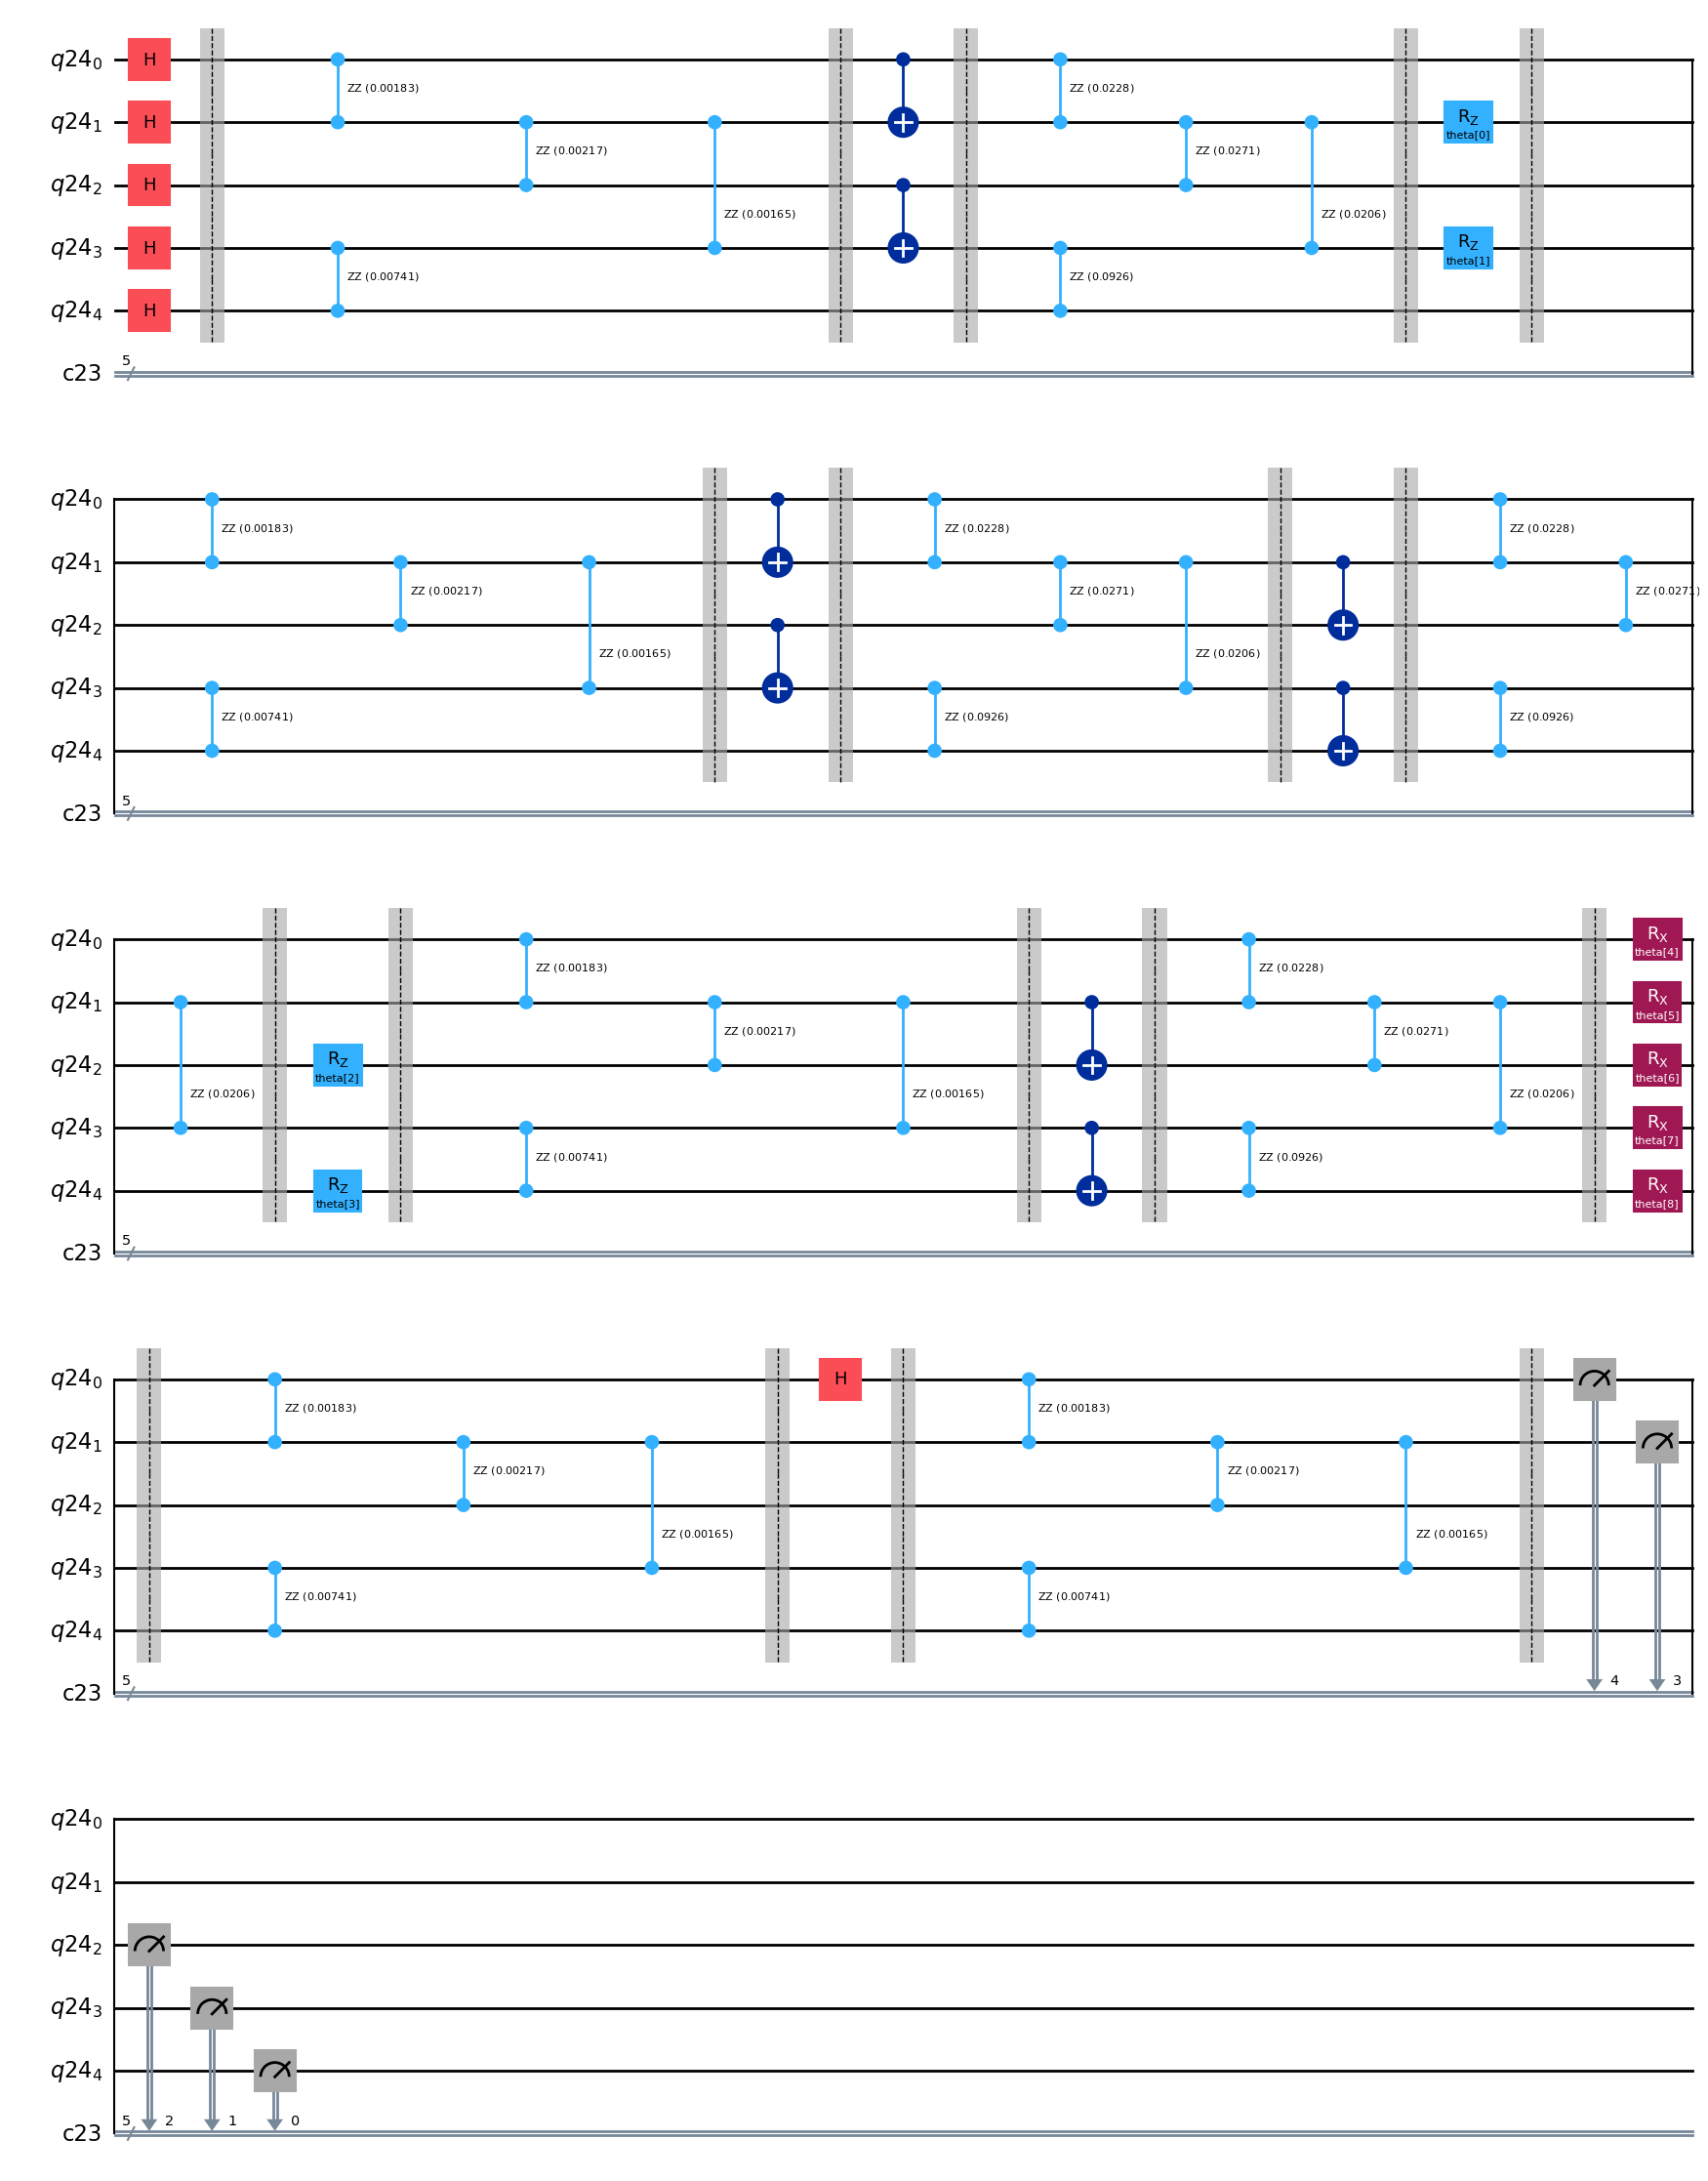

In [97]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = ansatzo

ansatz_x0.h(0)
ansatz_x0.barrier()

ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

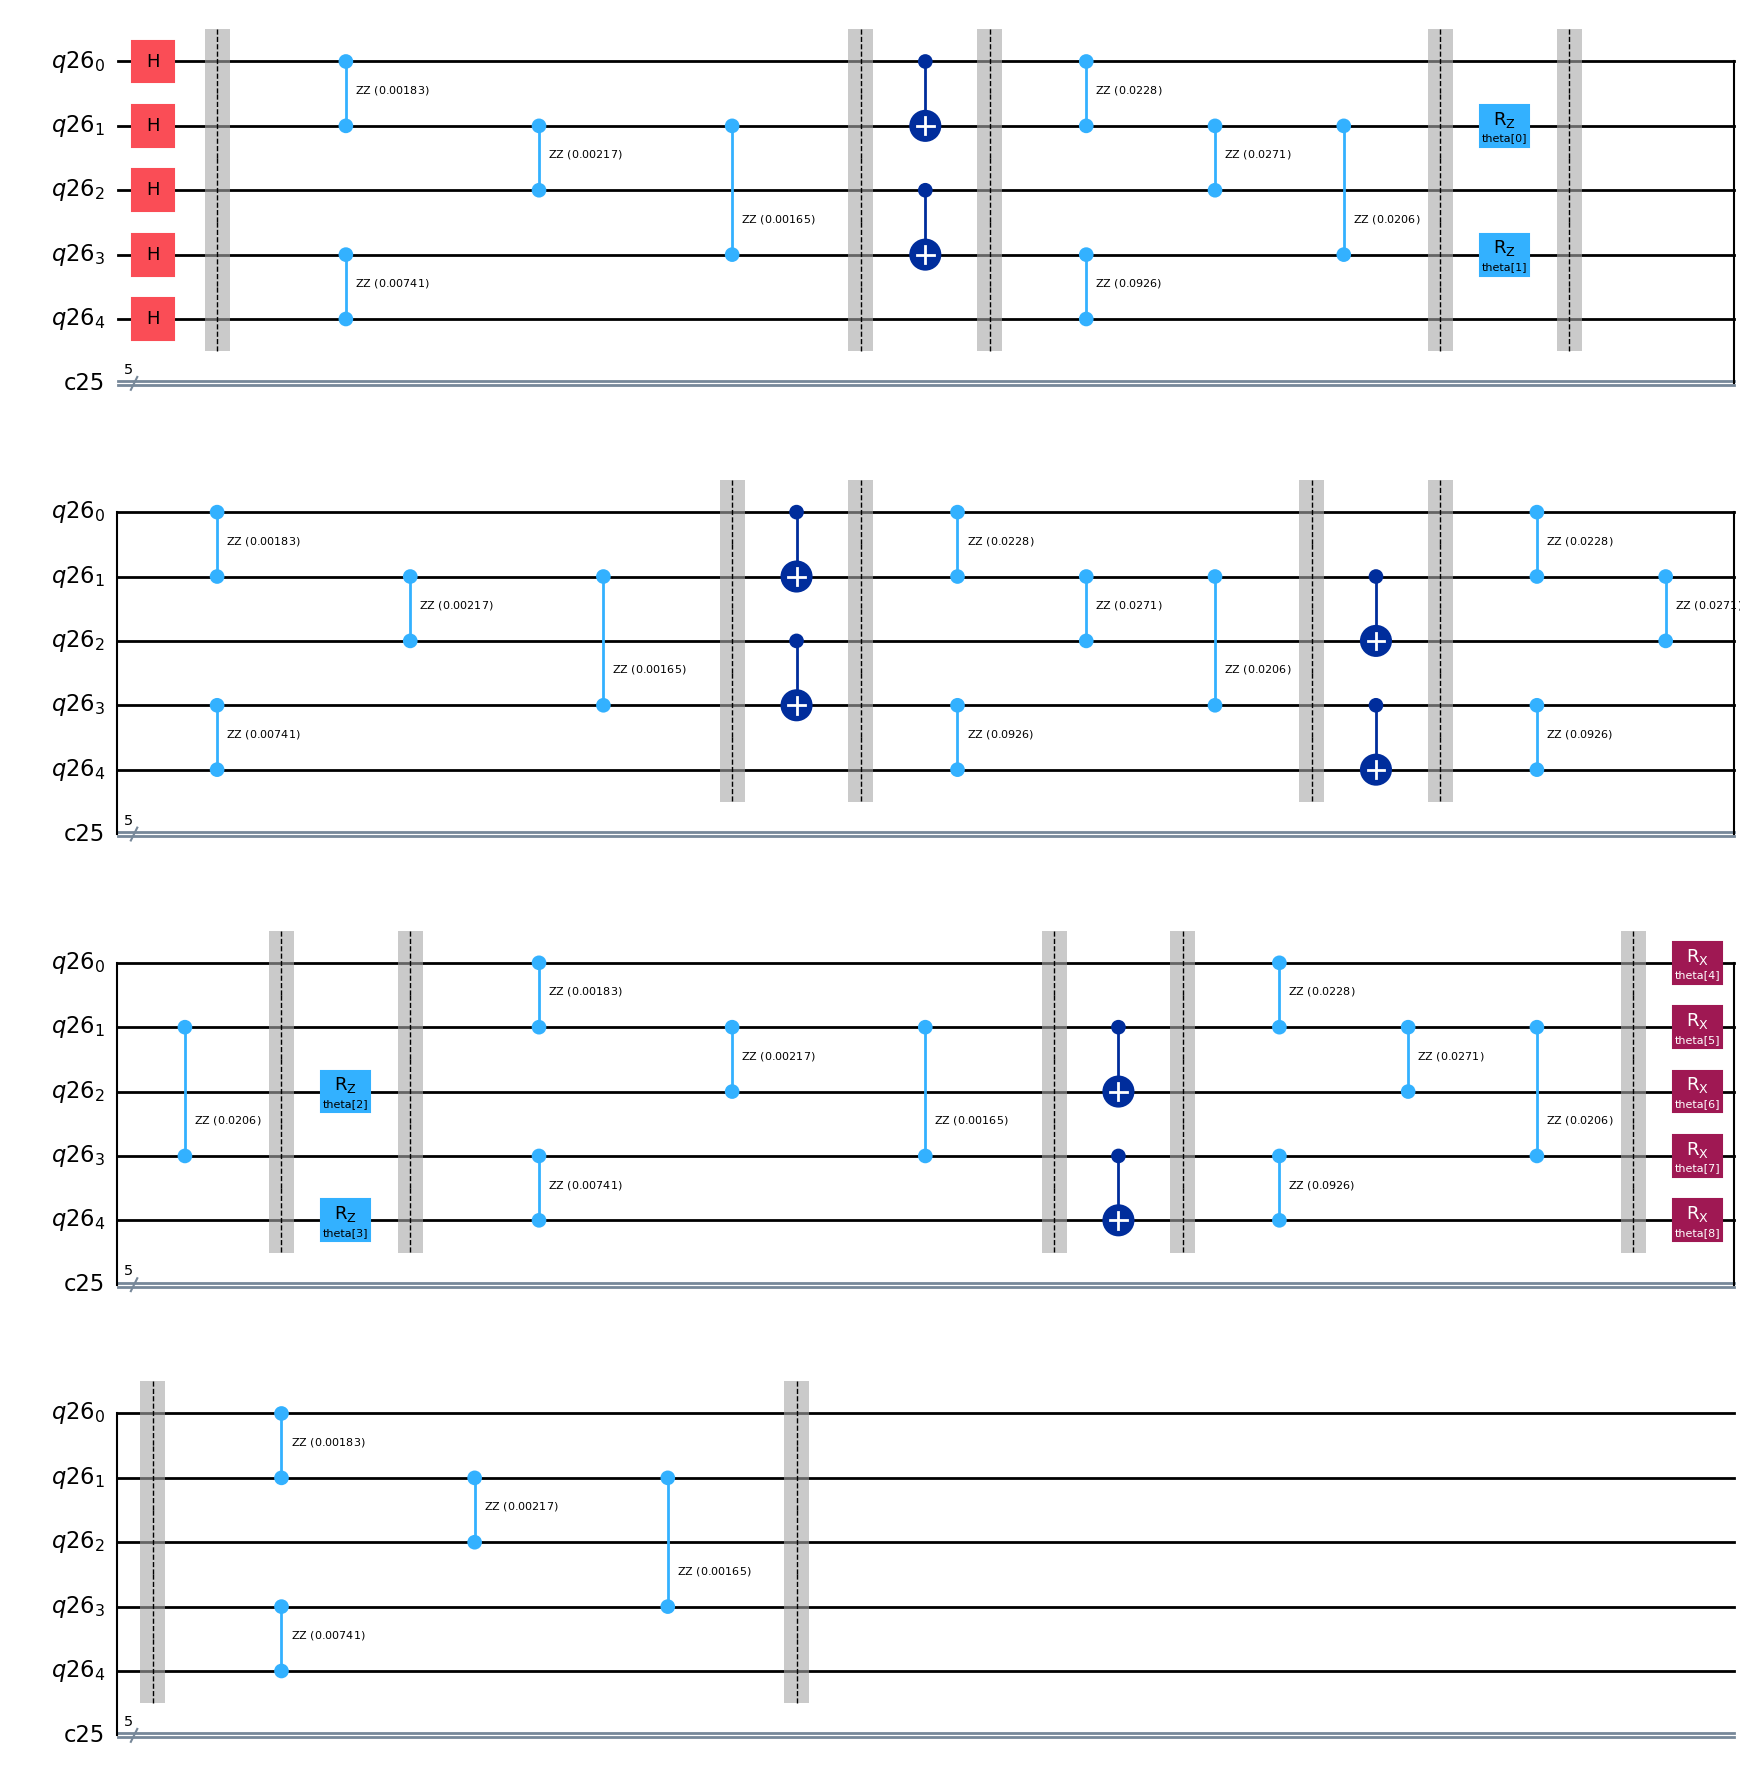

In [98]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

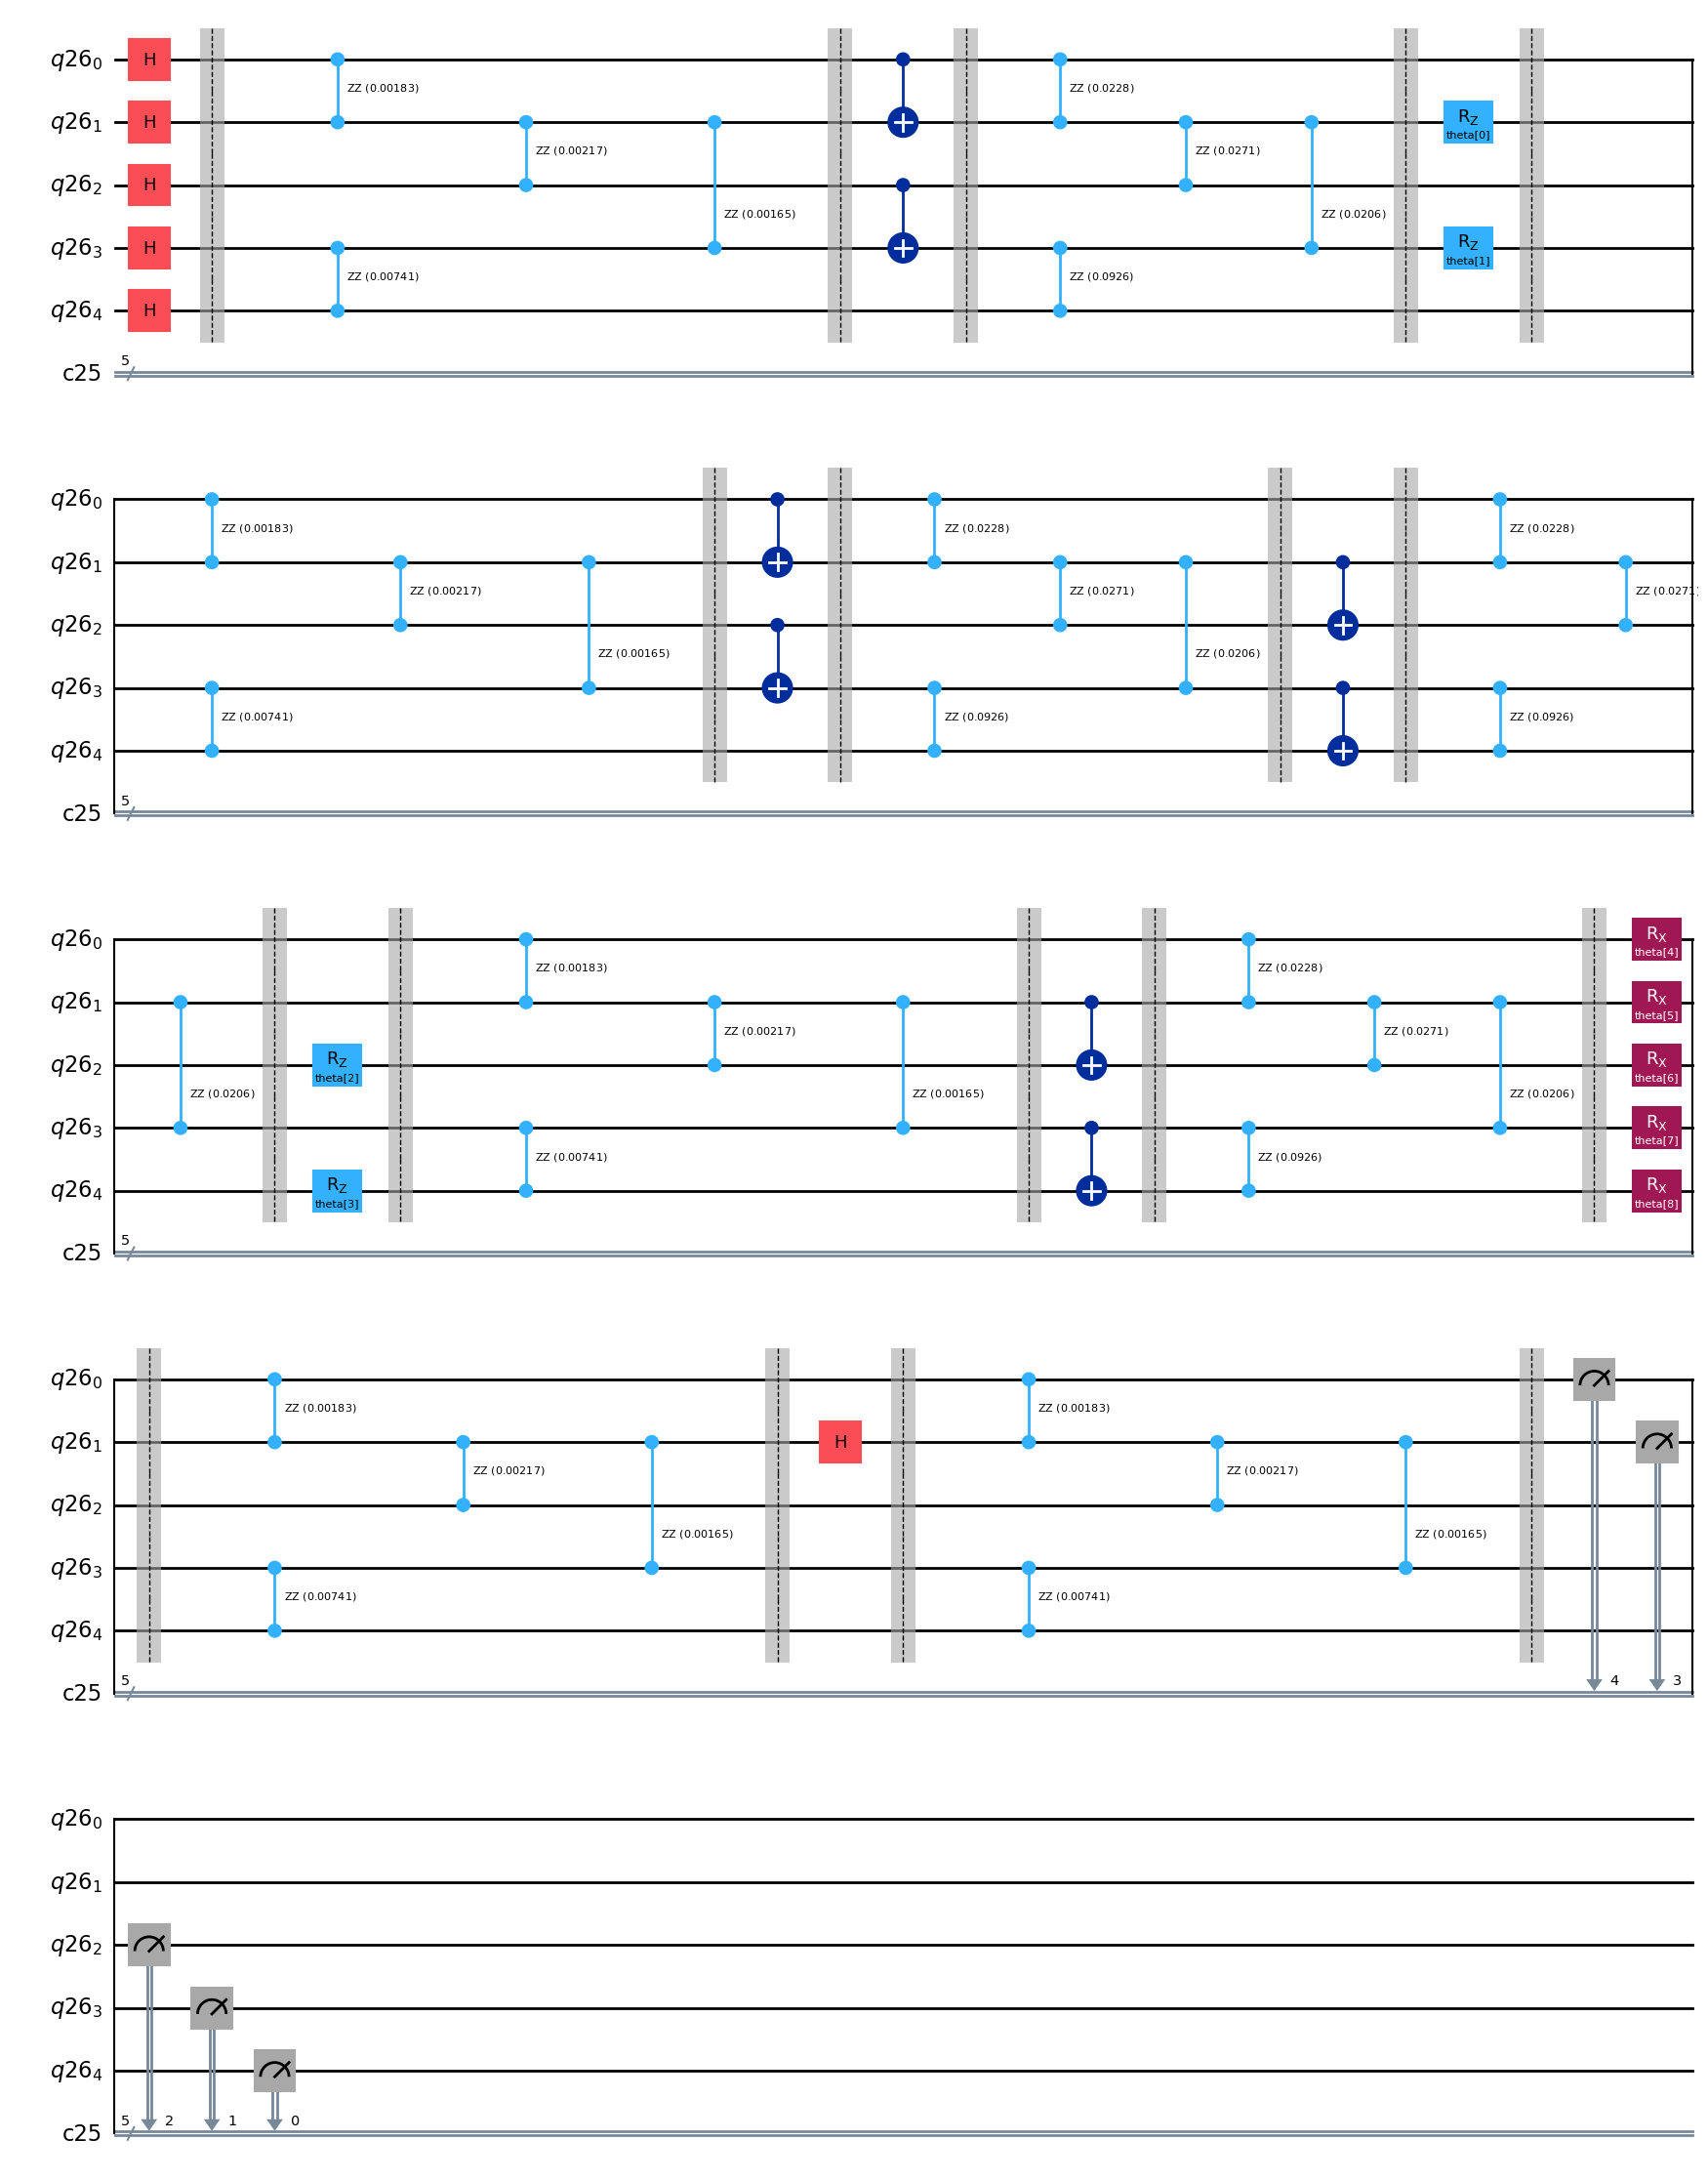

In [99]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = ansatzo

ansatz_x1.h(1)
ansatz_x1.barrier()

ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

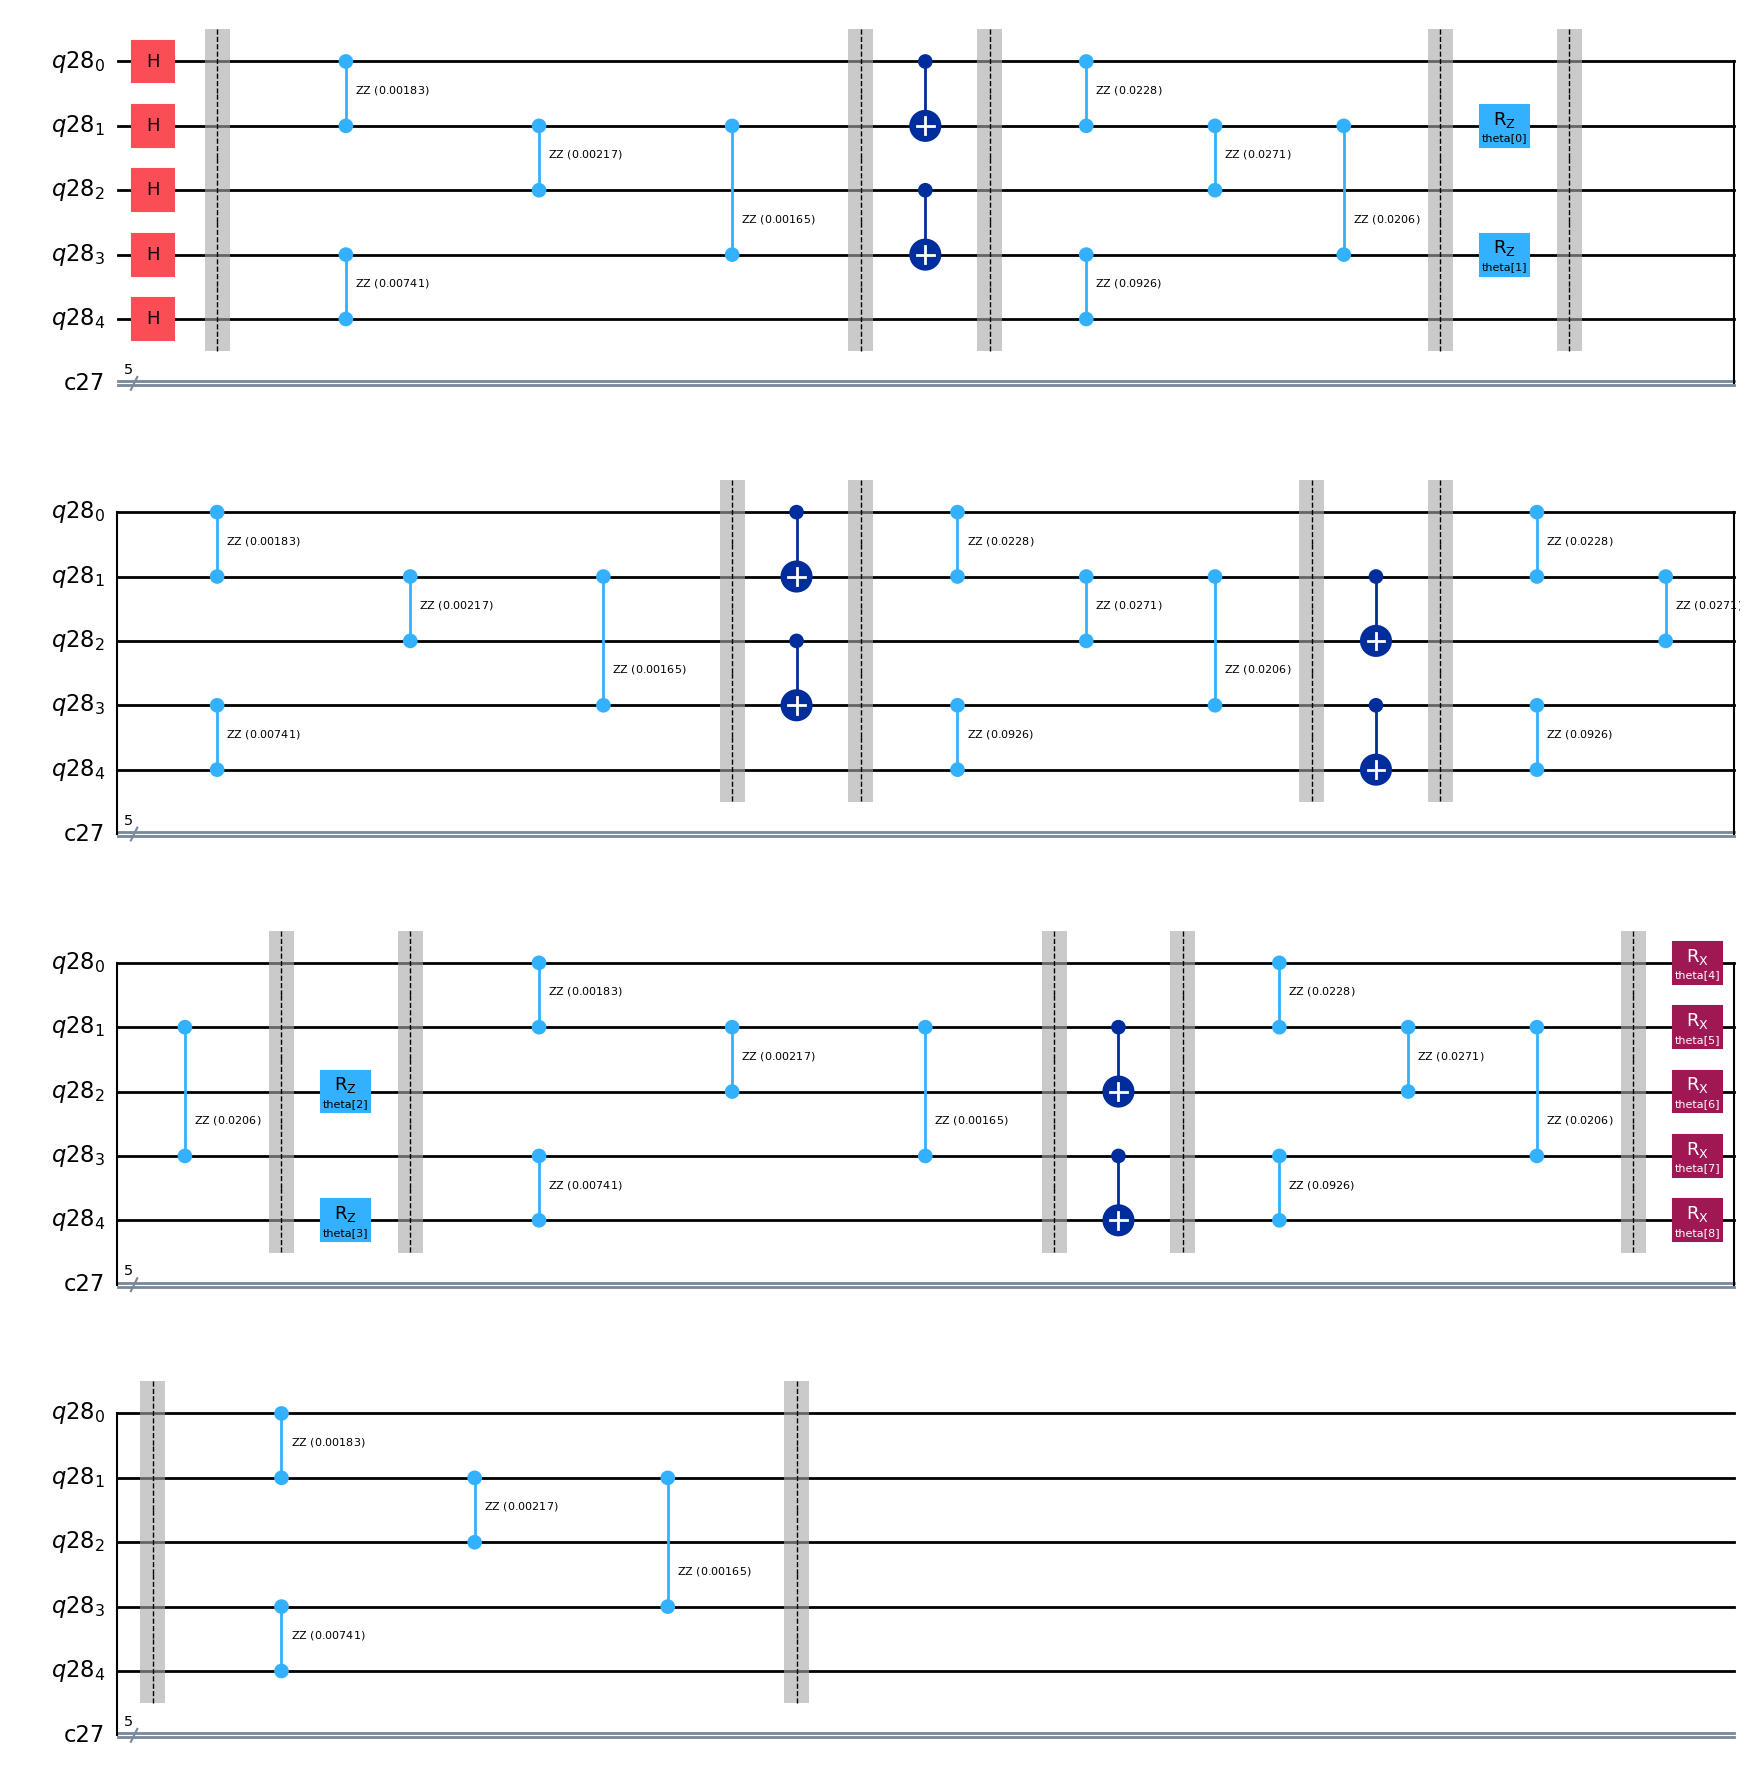

In [100]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

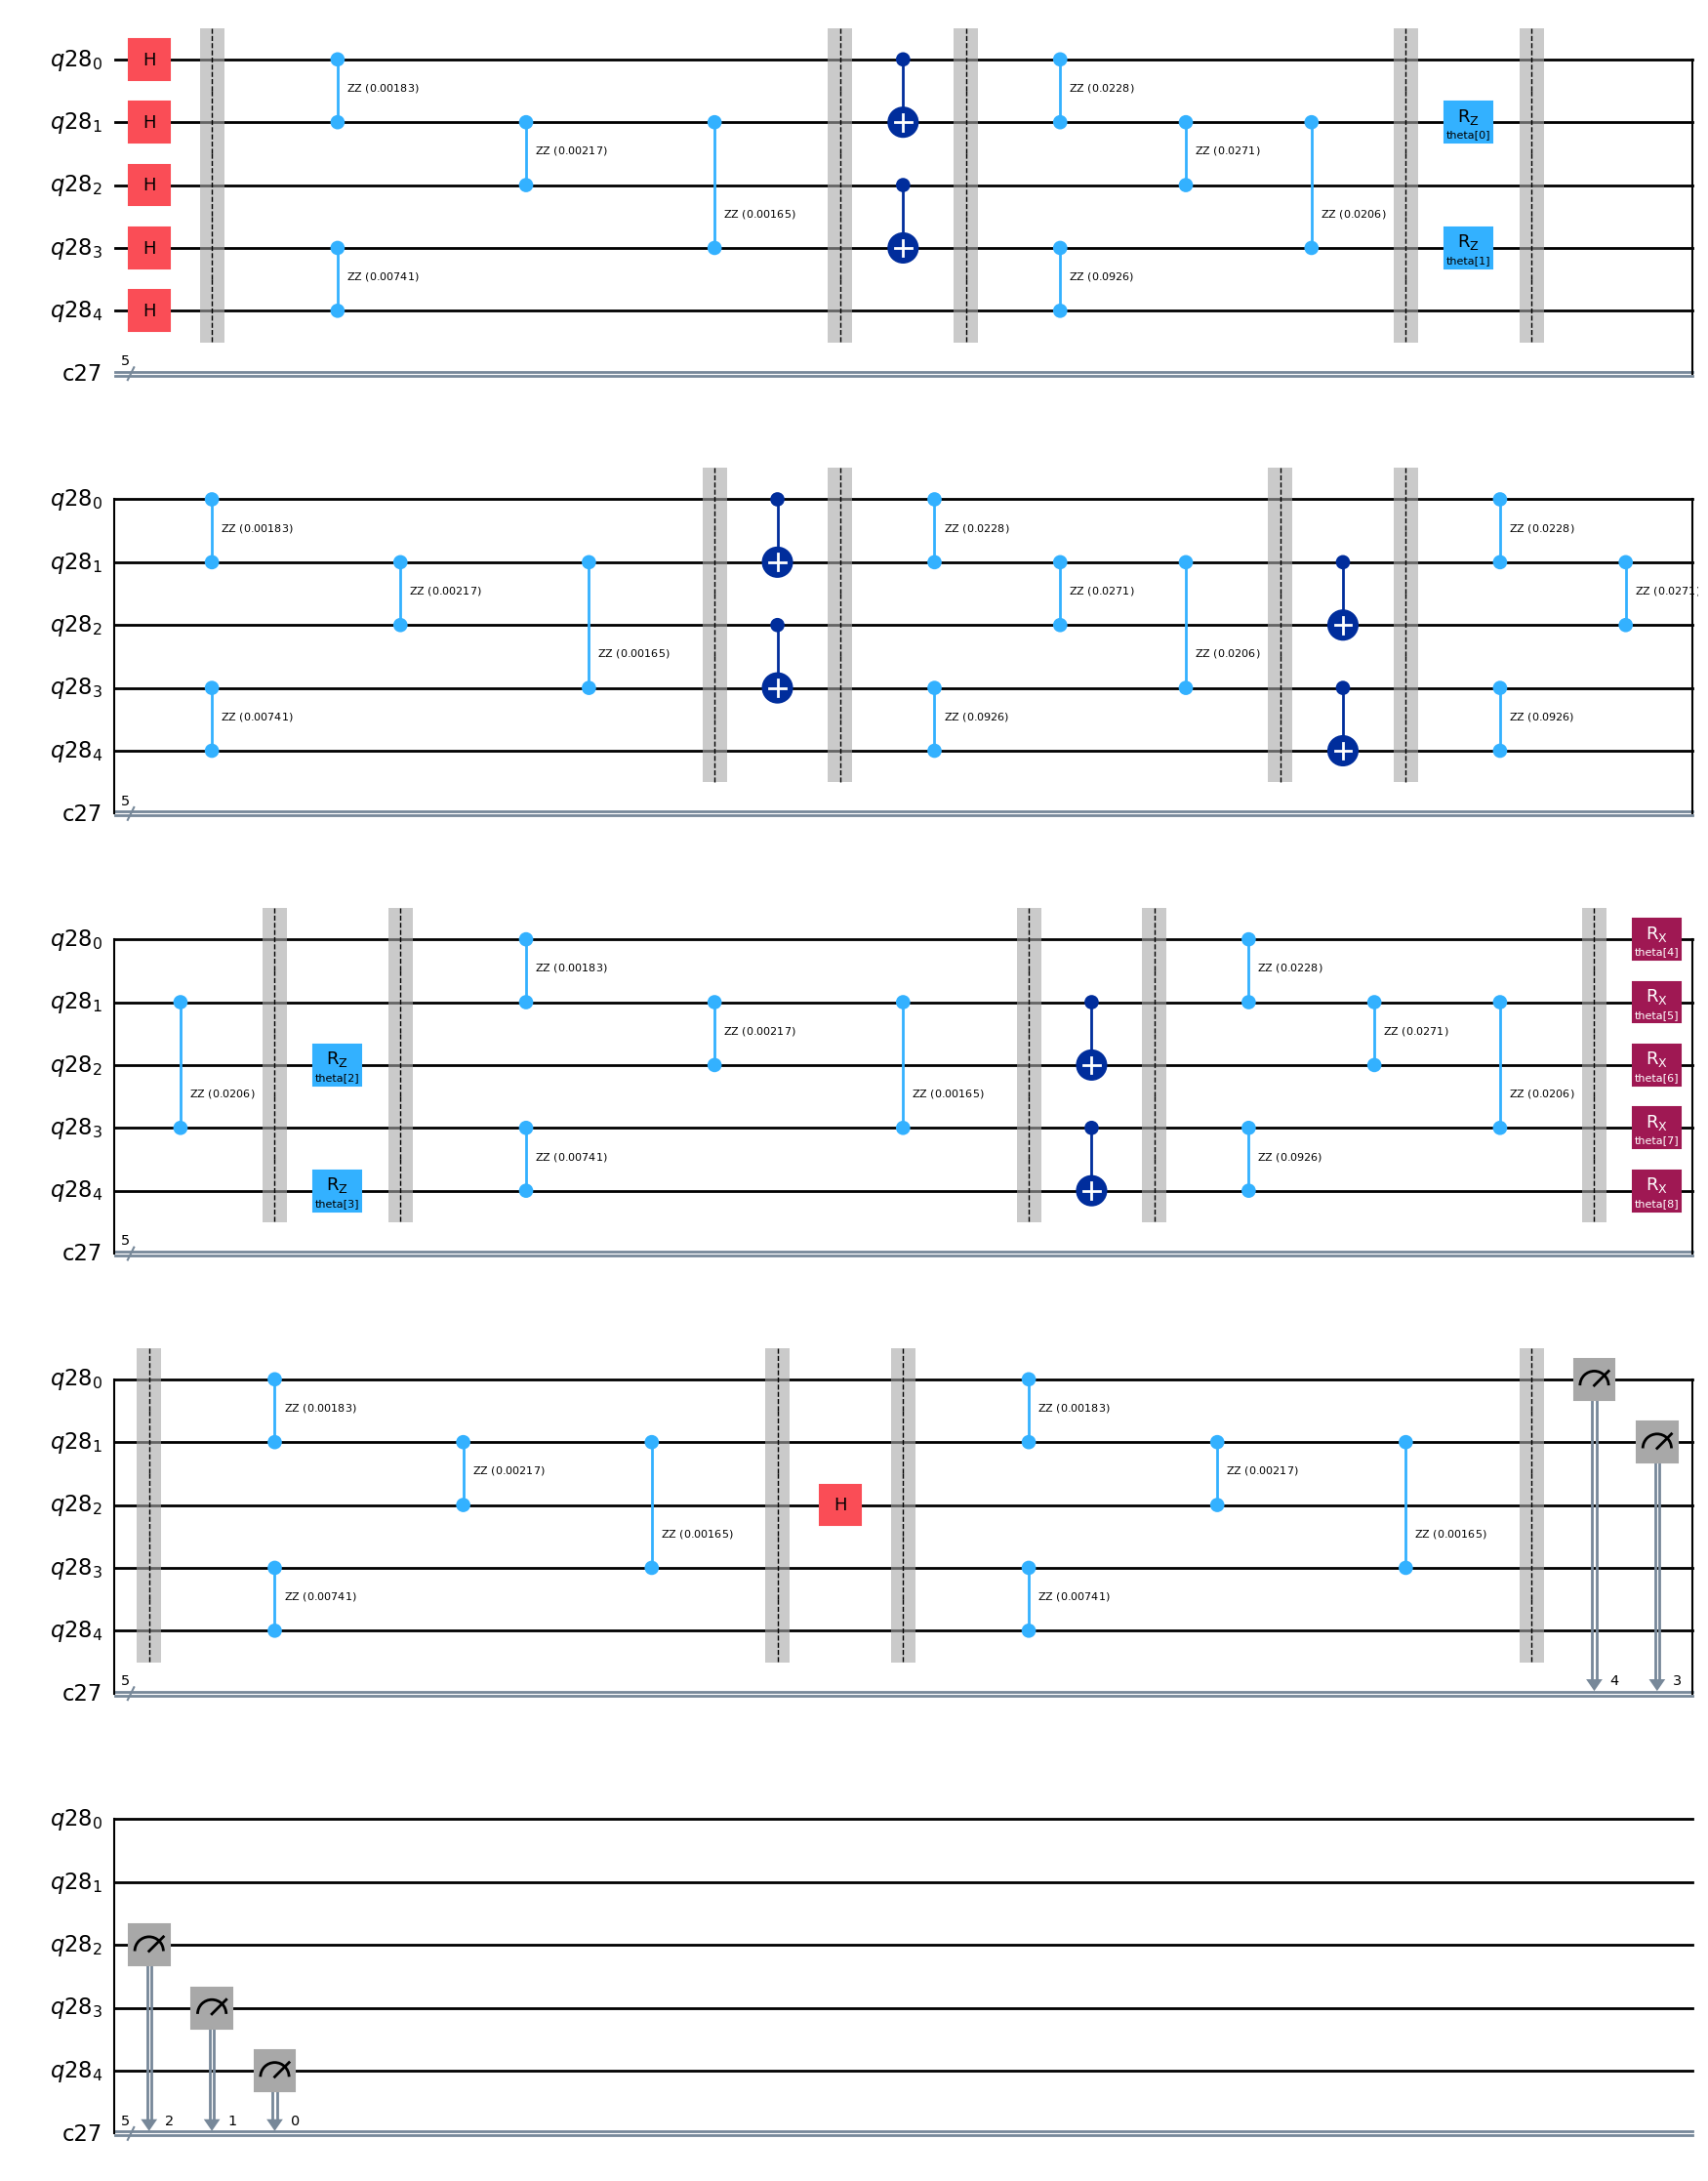

In [101]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = ansatzo

ansatz_x2.h(2)
ansatz_x2.barrier()

ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

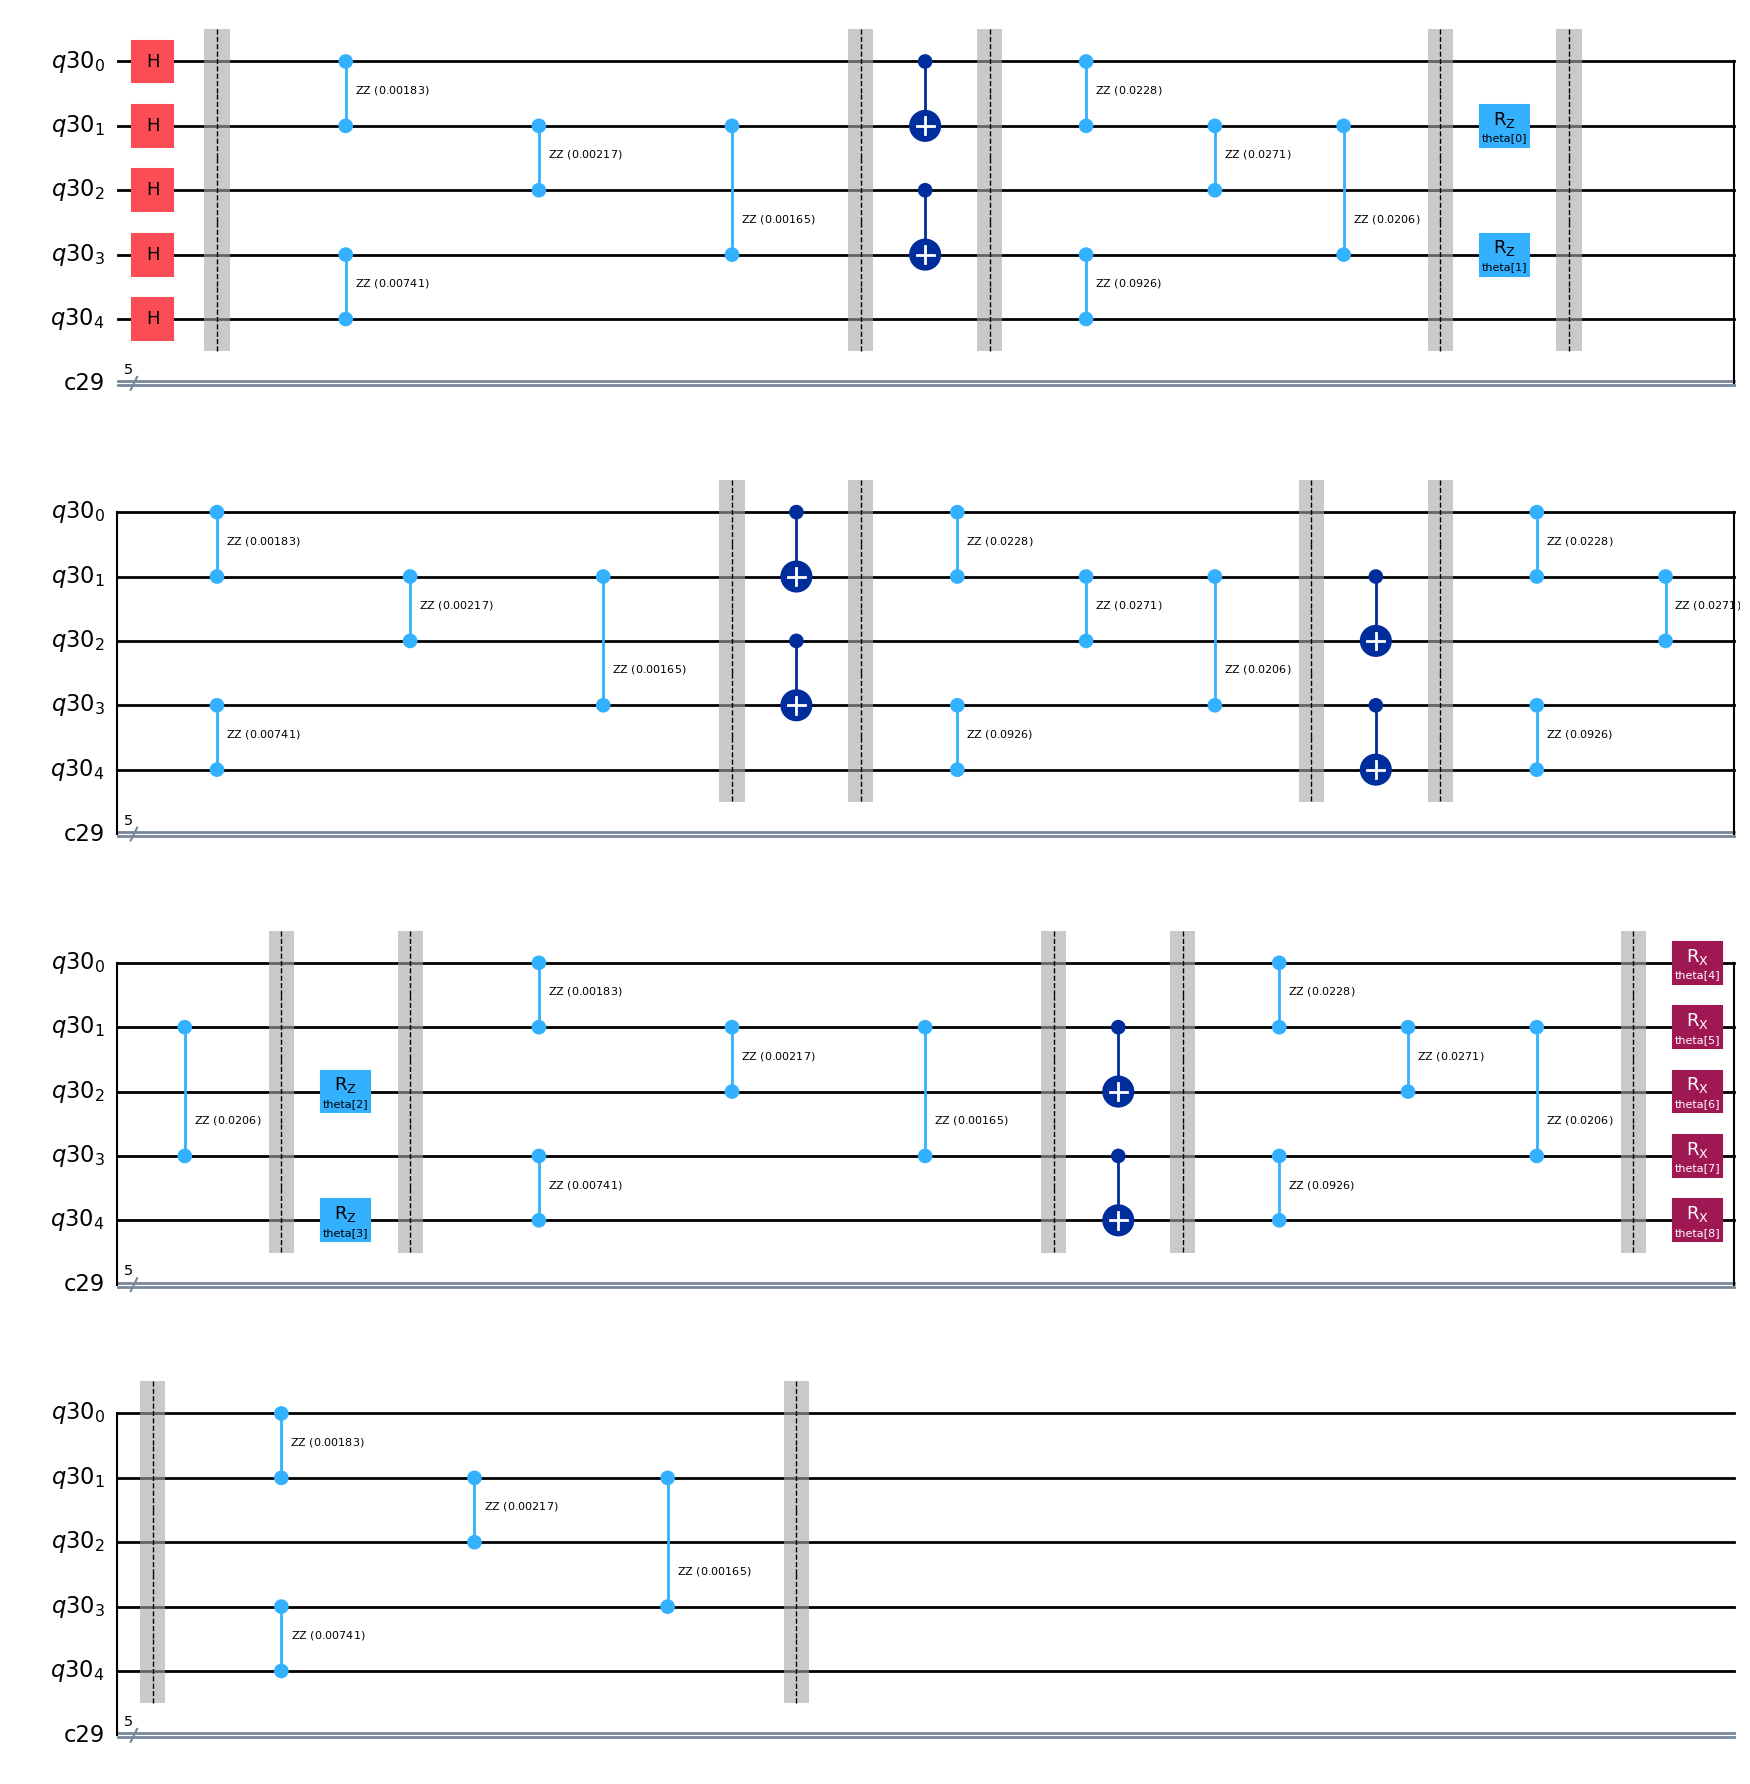

In [102]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

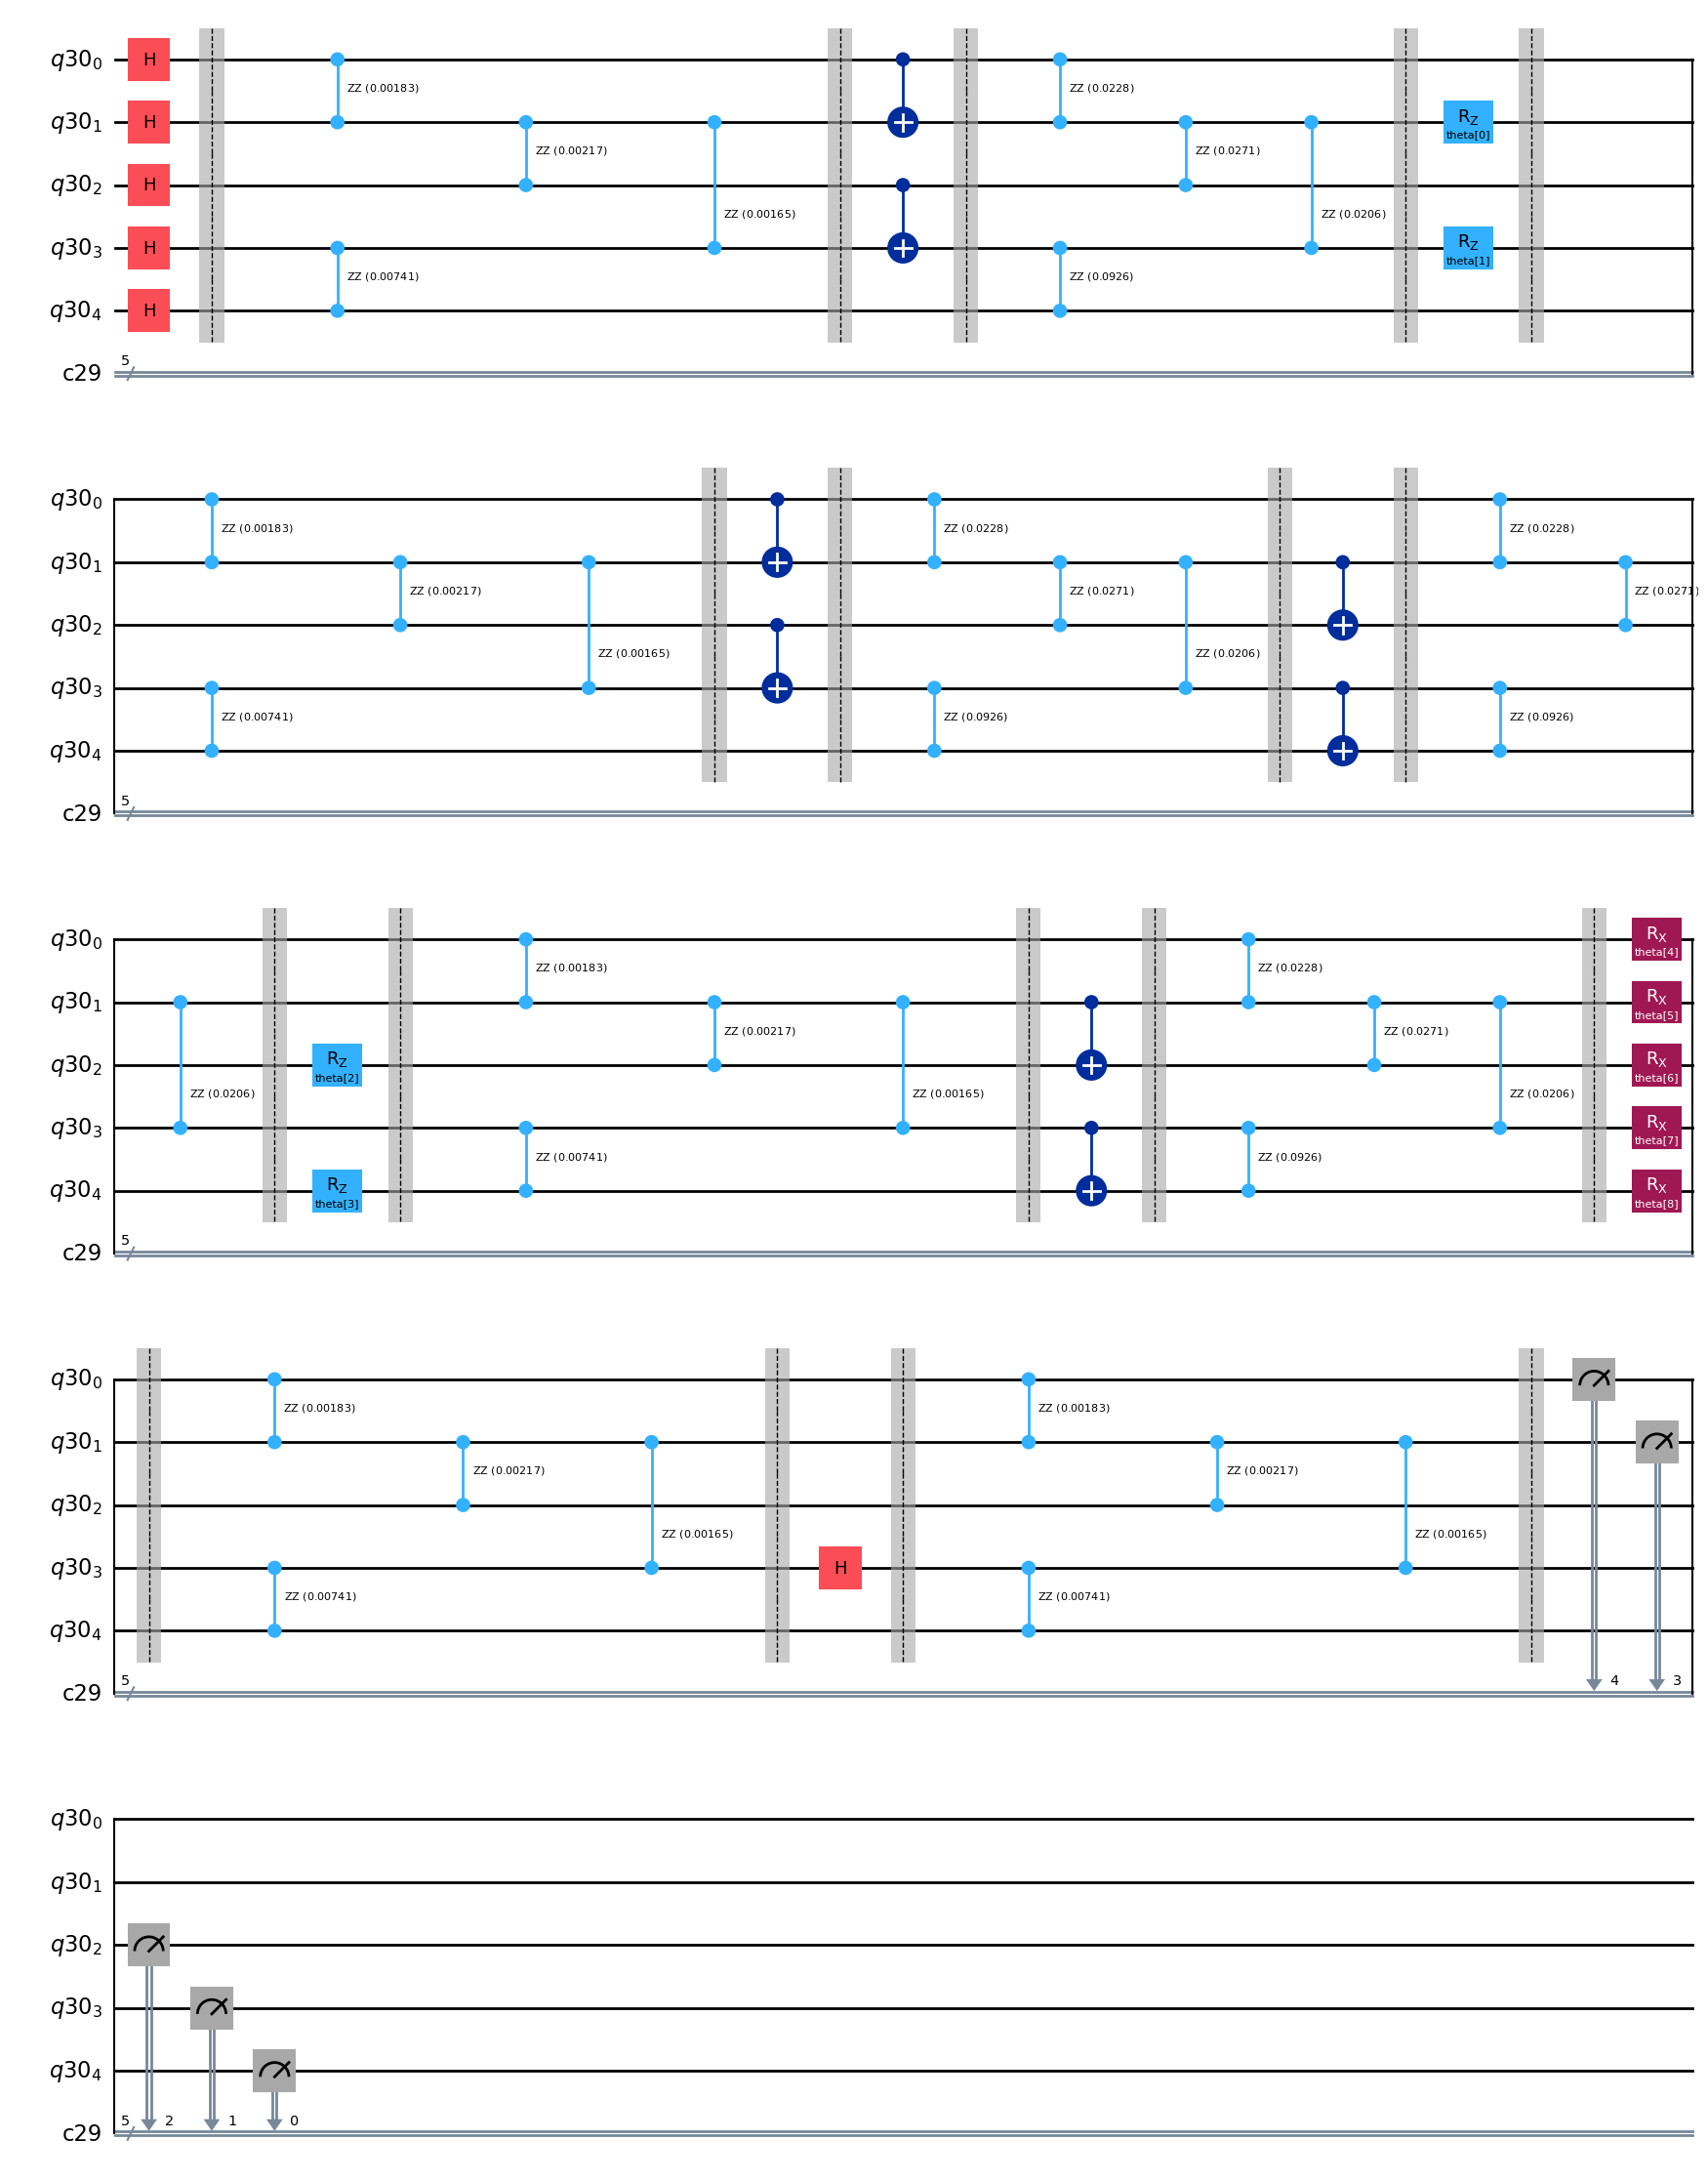

In [103]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = ansatzo

ansatz_x3.h(3)
ansatz_x3.barrier()

ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

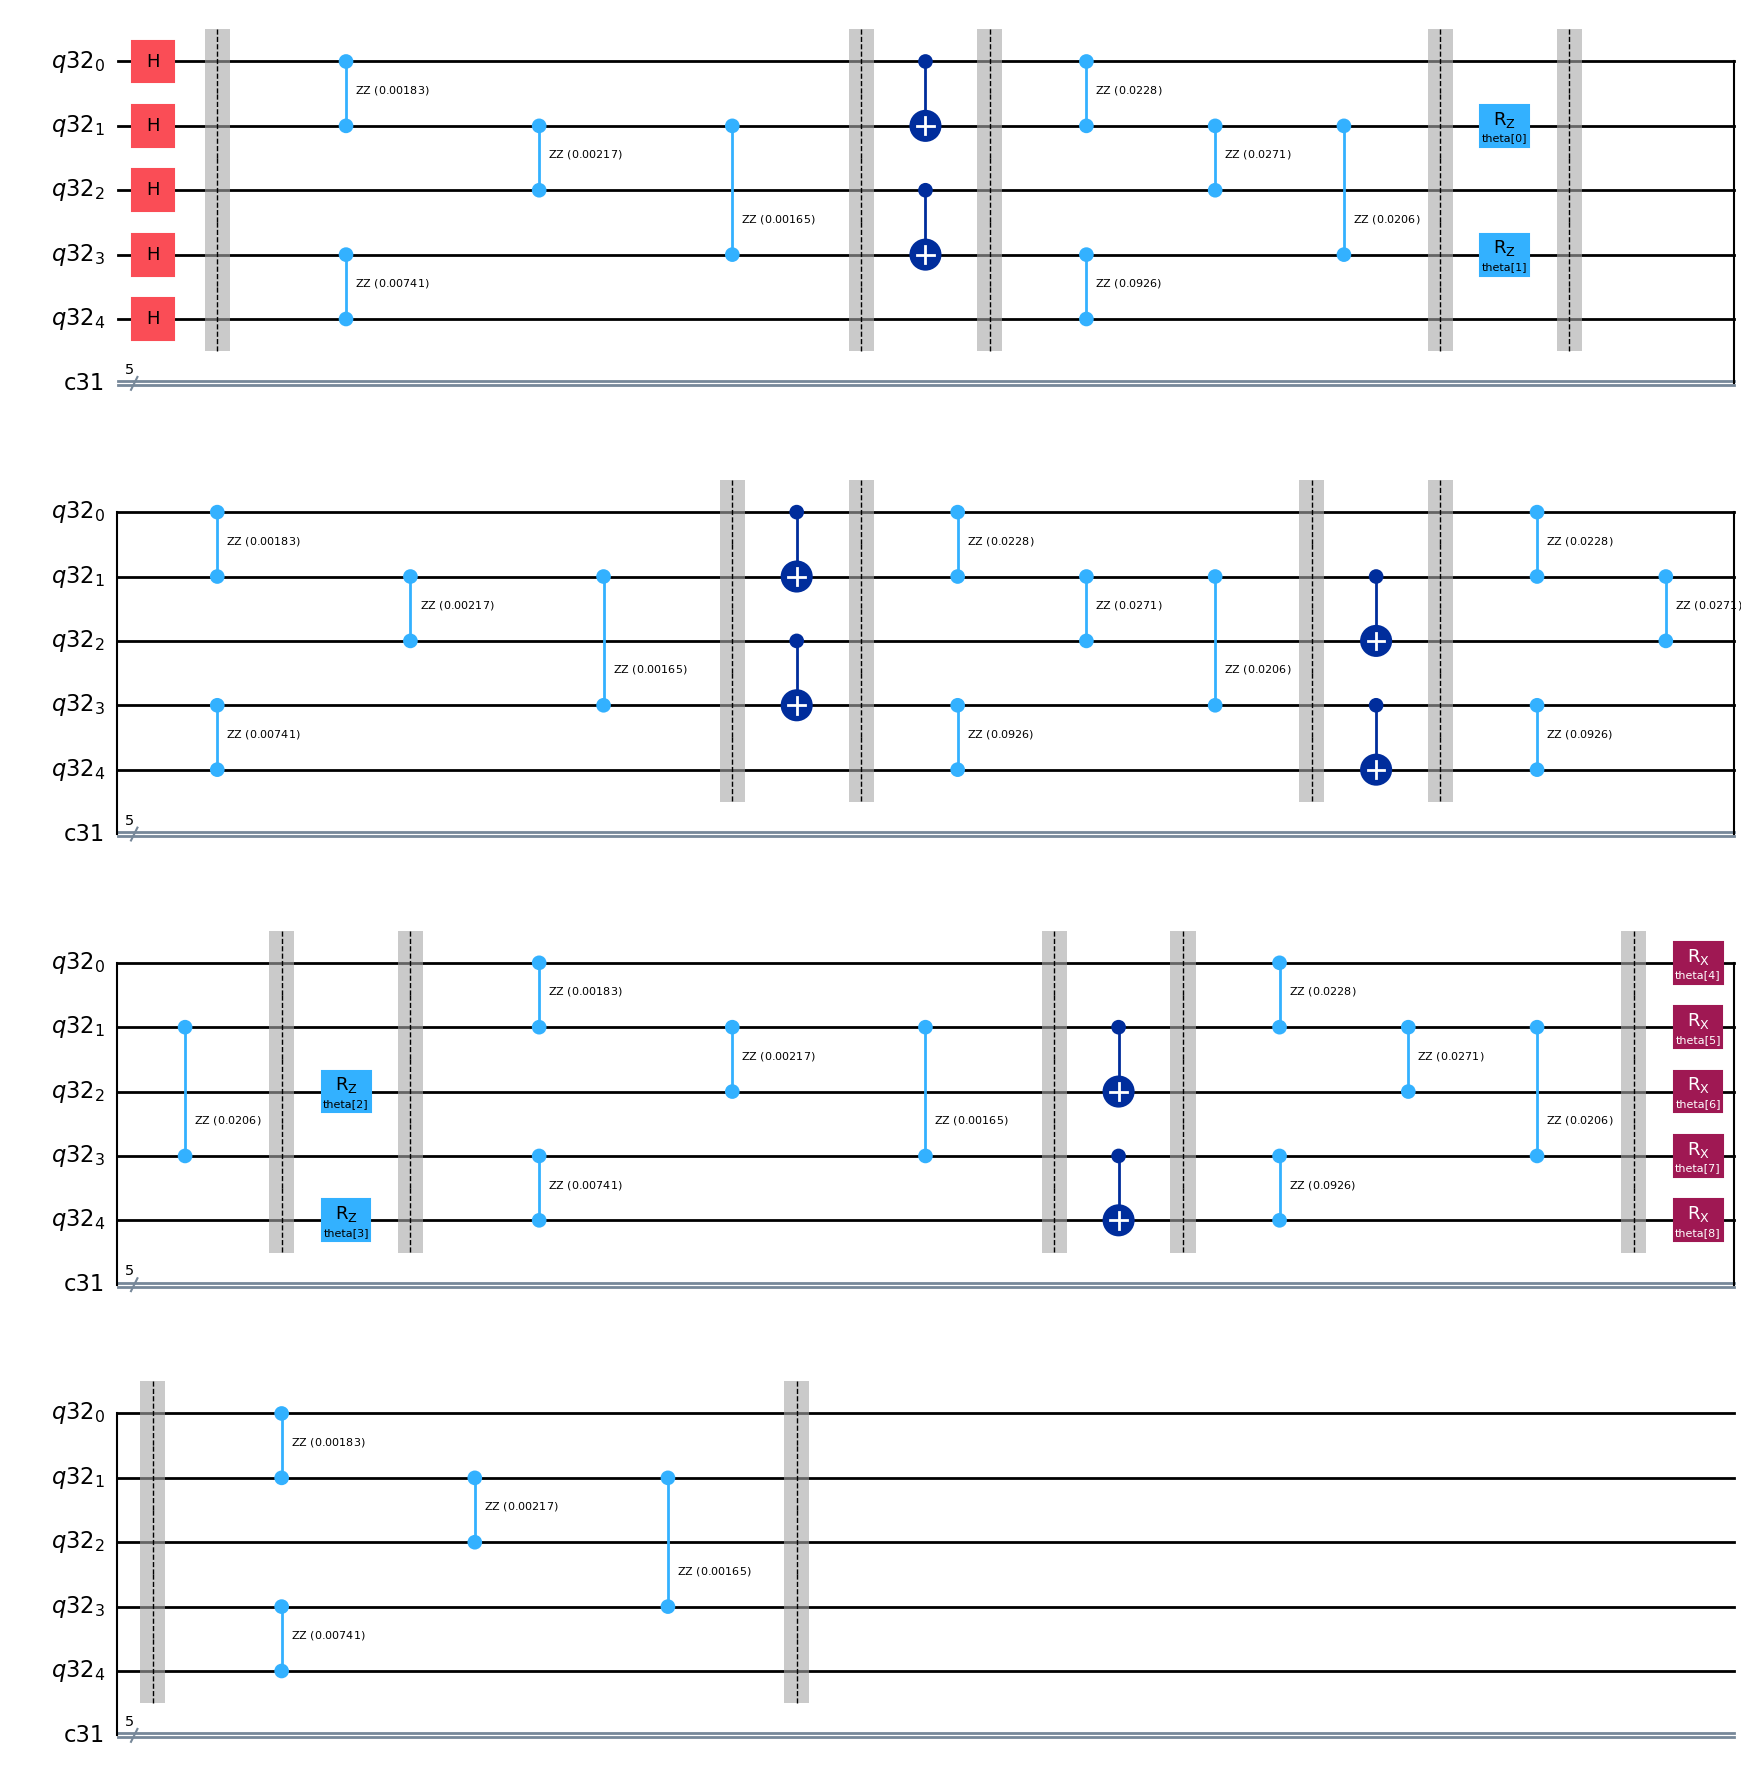

In [104]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

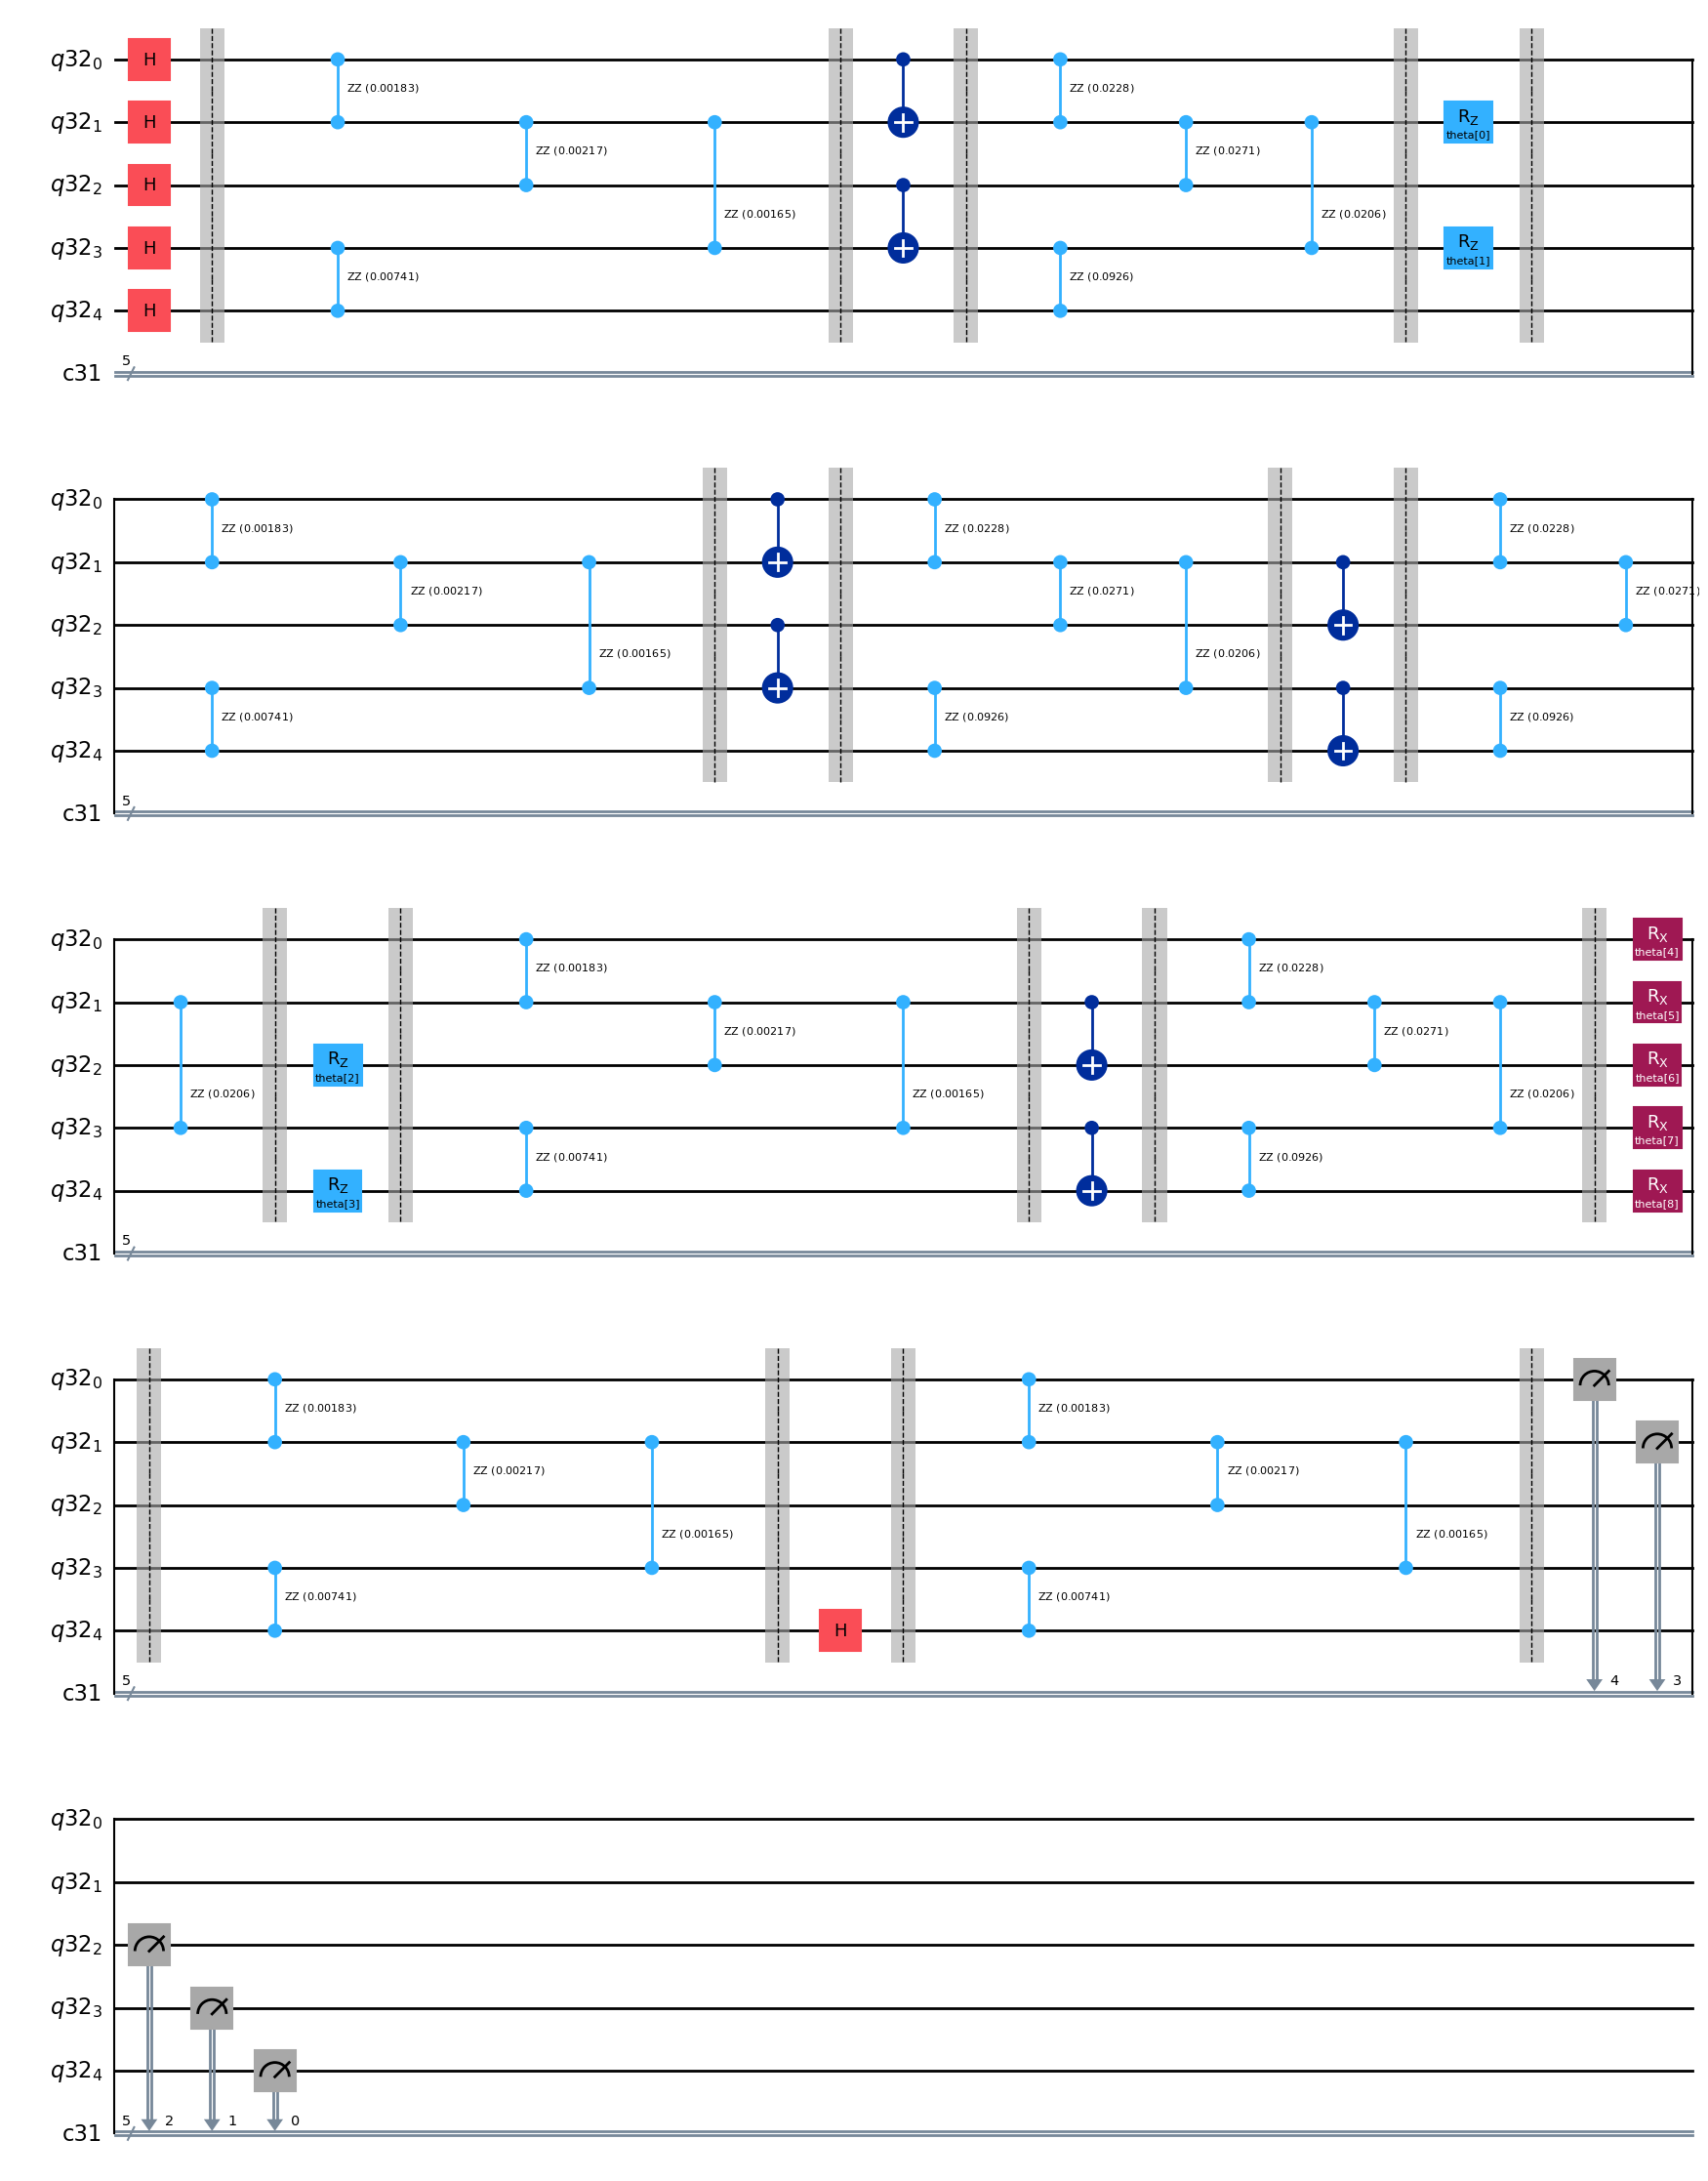

In [105]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = ansatzo

ansatz_x4.h(4)
ansatz_x4.barrier()

ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

### Cost Function for VQE & VQNHE

In [106]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))


# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:5]
  c = parameter[5]

  FC1 = FC1.reshape(1,5)


  a1 = np.matmul(FC1, x)
  y = output_activate(c, a1)

  return y[0]

In [107]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=10000, seed=1).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [108]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [109]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval


def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [110]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [111]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)
    callback_dict["cost_history"].append(current_cost)

  return callback

### VQE

In [112]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=6), pqc))
    if cost_func_vqnhe(np.zeros(shape=6), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=6), pqc)
      optimized_pqc = pqc

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


In [113]:
lowest_energy_vqe

-5.8522

### VQNHE FC Hidden Layer 1개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:30]
  c = parameter[30]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  y = output_activate(c, a2)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=31), pqc))
    if cost_func_vqnhe(np.zeros(shape=31), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=31), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(31) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618
Optimization terminated successfully.
         Current function value: -6.252538
         Iterations: 174
         Function evaluations: 7296
         Gradient evaluations: 228


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.231528
         Iterations: 108
         Function evaluations: 5833
         Gradient evaluations: 182


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.236337
         Iterations: 100
         Function evaluations: 6028
         Gradient evaluations: 188


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.238784
         Iterations: 127
         Function evaluations: 7435
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -6.270087
         Iterations: 253
         Function evaluations: 9920
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.252356
         Iterations: 300
         Function evaluations: 10592
         Gradient evaluations: 331


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.216318
         Iterations: 158
         Function evaluations: 7621
         Gradient evaluations: 238


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.246098
         Iterations: 300
         Function evaluations: 12384
         Gradient evaluations: 387


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.251052
         Iterations: 181
         Function evaluations: 11115
         Gradient evaluations: 347


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.257059
         Iterations: 126
         Function evaluations: 7436
         Gradient evaluations: 232


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.226971
         Iterations: 233
         Function evaluations: 11017
         Gradient evaluations: 344


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.201221
         Iterations: 194
         Function evaluations: 9088
         Gradient evaluations: 284


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.236996
         Iterations: 154
         Function evaluations: 10120
         Gradient evaluations: 316


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.216359
         Iterations: 136
         Function evaluations: 8650
         Gradient evaluations: 270
Optimization terminated successfully.
         Current function value: -6.251810
         Iterations: 105
         Function evaluations: 3776
         Gradient evaluations: 118


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.210119
         Iterations: 300
         Function evaluations: 11328
         Gradient evaluations: 354


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.214507
         Iterations: 192
         Function evaluations: 11531
         Gradient evaluations: 360


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.248056
         Iterations: 167
         Function evaluations: 8746
         Gradient evaluations: 273
Optimization terminated successfully.
         Current function value: -6.225140
         Iterations: 182
         Function evaluations: 7552
         Gradient evaluations: 236
         Current function value: -6.244879
         Iterations: 119
         Function evaluations: 8876
         Gradient evaluations: 277


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-6.270086944450637

### VQNHE FC Hidden Layer 2개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:50]
  FC3 = parameter[50:55]
  c = parameter[55]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(5,5)
  FC3 = FC3.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=56), pqc))
    if cost_func_vqnhe(np.zeros(shape=56), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=56), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(56) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.255702
         Iterations: 215
         Function evaluations: 20076
         Gradient evaluations: 352


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.253653
         Iterations: 300
         Function evaluations: 21147
         Gradient evaluations: 371


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.193708
         Iterations: 97
         Function evaluations: 10614
         Gradient evaluations: 186


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.263244
         Iterations: 300
         Function evaluations: 21831
         Gradient evaluations: 383


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.232341
         Iterations: 42
         Function evaluations: 5826
         Gradient evaluations: 102


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.260627
         Iterations: 100
         Function evaluations: 9473
         Gradient evaluations: 166


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.239670
         Iterations: 128
         Function evaluations: 11811
         Gradient evaluations: 207


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.250648
         Iterations: 300
         Function evaluations: 20520
         Gradient evaluations: 360
         Current function value: -6.261677
         Iterations: 300
         Function evaluations: 19893
         Gradient evaluations: 349


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.262250
         Iterations: 282
         Function evaluations: 22184
         Gradient evaluations: 389


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.226985
         Iterations: 242
         Function evaluations: 17442
         Gradient evaluations: 306


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.023924
         Iterations: 61
         Function evaluations: 7868
         Gradient evaluations: 138


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.267638
         Iterations: 229
         Function evaluations: 17391
         Gradient evaluations: 305


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.180884
         Iterations: 136
         Function evaluations: 11526
         Gradient evaluations: 202


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.245434
         Iterations: 203
         Function evaluations: 13452
         Gradient evaluations: 236


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.227074
         Iterations: 168
         Function evaluations: 15966
         Gradient evaluations: 280


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.230392
         Iterations: 150
         Function evaluations: 10944
         Gradient evaluations: 192


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.245313
         Iterations: 300
         Function evaluations: 23313
         Gradient evaluations: 409
Optimization terminated successfully.
         Current function value: -6.034495
         Iterations: 68
         Function evaluations: 7467
         Gradient evaluations: 131
         Current function value: -6.229633
         Iterations: 300
         Function evaluations: 23142
         Gradient evaluations: 406


In [ ]:
lowest_energy_vqnhe

-6.267638048354183

### VQNHE CNN ver 1

In [ ]:
def cnn2(vec, x):
  a = vec[0]
  b = vec[1]

  lst = []
  lst.append(b*x[0])
  lst.append(a*x[0]+b*x[1])
  lst.append(a*x[1]+b*x[2])
  lst.append(a*x[2]+b*x[3])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn4(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]

  lst = []
  lst.append(d*x[0])
  lst.append(c*x[0]+d*x[1])
  lst.append(b*x[0]+c*x[1]+d*x[2])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn2(parameter[0:2], x), cnn2(parameter[2:4], x), cnn3(parameter[4:7], x), cnn3(parameter[7:10], x), cnn4(parameter[10:14], x), cnn4(parameter[14:18], x)])
  z1 = relu(a1)

  FC1 = parameter[18:48]
  FC2 = parameter[48:53]
  c = parameter[53]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=54), pqc))
    if cost_func_vqnhe(np.zeros(shape=54), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=54), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(54) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618
Optimization terminated successfully.
         Current function value: -5.968903
         Iterations: 57
         Function evaluations: 3465
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: -5.947187
         Iterations: 41
         Function evaluations: 2640
         Gradient evaluations: 48


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950838
         Iterations: 51
         Function evaluations: 6223
         Gradient evaluations: 113


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.941690
         Iterations: 111
         Function evaluations: 11232
         Gradient evaluations: 204
Optimization terminated successfully.
         Current function value: -5.951306
         Iterations: 51
         Function evaluations: 5005
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: -5.944477
         Iterations: 24
         Function evaluations: 1485
         Gradient evaluations: 27


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.952331
         Iterations: 80
         Function evaluations: 8755
         Gradient evaluations: 159


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.951711
         Iterations: 74
         Function evaluations: 9417
         Gradient evaluations: 171
Optimization terminated successfully.
         Current function value: -5.861800
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.947256
         Iterations: 43
         Function evaluations: 7322
         Gradient evaluations: 133
Optimization terminated successfully.
         Current function value: -5.975756
         Iterations: 50
         Function evaluations: 2970
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: -5.886697
         Iterations: 15
         Function evaluations: 1265
         Gradient evaluations: 23


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950791
         Iterations: 116
         Function evaluations: 14965
         Gradient evaluations: 272
Optimization terminated successfully.
         Current function value: -5.883760
         Iterations: 12
         Function evaluations: 825
         Gradient evaluations: 15


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.935832
         Iterations: 32
         Function evaluations: 7492
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.956753
         Iterations: 55
         Function evaluations: 3190
         Gradient evaluations: 58


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.931362
         Iterations: 72
         Function evaluations: 10071
         Gradient evaluations: 183


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972598
         Iterations: 154
         Function evaluations: 14474
         Gradient evaluations: 263


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950387
         Iterations: 66
         Function evaluations: 11282
         Gradient evaluations: 205
Optimization terminated successfully.
         Current function value: -5.883927
         Iterations: 28
         Function evaluations: 1650
         Gradient evaluations: 30


In [ ]:
lowest_energy_vqnhe

-5.975756046764024

### VQNHE CNN ver 2

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn5(parameter[6:11], x), cnn5(parameter[11:16], x)])
  z1 = relu(a1)

  FC1 = parameter[16:36]
  FC2 = parameter[36:41]
  c = parameter[41]

  FC1 = FC1.reshape(5,4)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=42), pqc))
    if cost_func_vqnhe(np.zeros(shape=42), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=42), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(42) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.018440
         Iterations: 142
         Function evaluations: 10415
         Gradient evaluations: 242


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950173
         Iterations: 219
         Function evaluations: 13341
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966953
         Iterations: 55
         Function evaluations: 6714
         Gradient evaluations: 156


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986462
         Iterations: 28
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.933898
         Iterations: 61
         Function evaluations: 3784
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: -5.940936
         Iterations: 75
         Function evaluations: 4730
         Gradient evaluations: 110
Optimization terminated successfully.
         Current function value: -5.937512
         Iterations: 67
         Function evaluations: 3354
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: -6.011657
         Iterations: 108
         Function evaluations: 6450
         Gradient evaluations: 150


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966032
         Iterations: 75
         Function evaluations: 8225
         Gradient evaluations: 191


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.971936
         Iterations: 79
         Function evaluations: 6672
         Gradient evaluations: 155


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.988672
         Iterations: 38
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.990062
         Iterations: 66
         Function evaluations: 7745
         Gradient evaluations: 180


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.939899
         Iterations: 130
         Function evaluations: 9984
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -5.952959
         Iterations: 41
         Function evaluations: 2494
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: -5.997760
         Iterations: 68
         Function evaluations: 3483
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.907256
         Iterations: 6
         Function evaluations: 2678
         Gradient evaluations: 62


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.889767
         Iterations: 10
         Function evaluations: 2627
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: -5.997809
         Iterations: 51
         Function evaluations: 2408
         Gradient evaluations: 56


In [ ]:
lowest_energy_vqnhe

-6.018439999162166

### VQNHE CNN ver 3

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  FC1 = parameter[22:52]
  FC2 = parameter[52:57]
  c = parameter[57]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=58), pqc))
    if cost_func_vqnhe(np.zeros(shape=58), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=58), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(58) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.997022
         Iterations: 77
         Function evaluations: 7913
         Gradient evaluations: 134


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984348
         Iterations: 219
         Function evaluations: 23788
         Gradient evaluations: 403


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966399
         Iterations: 108
         Function evaluations: 9858
         Gradient evaluations: 167
Optimization terminated successfully.
         Current function value: -6.000416
         Iterations: 283
         Function evaluations: 28026
         Gradient evaluations: 475


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.873323
         Iterations: 3
         Function evaluations: 5145
         Gradient evaluations: 87


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977301
         Iterations: 137
         Function evaluations: 18831
         Gradient evaluations: 319


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978067
         Iterations: 88
         Function evaluations: 13521
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.991014
         Iterations: 209
         Function evaluations: 20831
         Gradient evaluations: 353
Optimization terminated successfully.
         Current function value: -5.937339
         Iterations: 46
         Function evaluations: 3776
         Gradient evaluations: 64


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.963453
         Iterations: 132
         Function evaluations: 10443
         Gradient evaluations: 177


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978710
         Iterations: 65
         Function evaluations: 8036
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.929236
         Iterations: 51
         Function evaluations: 3481
         Gradient evaluations: 59


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972001
         Iterations: 46
         Function evaluations: 6614
         Gradient evaluations: 112


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909830
         Iterations: 19
         Function evaluations: 5440
         Gradient evaluations: 92


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.989029
         Iterations: 37
         Function evaluations: 5853
         Gradient evaluations: 99


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.993008
         Iterations: 190
         Function evaluations: 16827
         Gradient evaluations: 285
Optimization terminated successfully.
         Current function value: -5.927368
         Iterations: 20
         Function evaluations: 1357
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: -5.952179
         Iterations: 186
         Function evaluations: 13865
         Gradient evaluations: 235


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977501
         Iterations: 94
         Function evaluations: 11866
         Gradient evaluations: 201
Optimization terminated successfully.
         Current function value: -6.002156
         Iterations: 106
         Function evaluations: 8142
         Gradient evaluations: 138


In [ ]:
lowest_energy_vqnhe

-6.002155845720911

### VQNHE CNN ver 4

In [116]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  lst = np.array(lst)

  return lst


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])

  lst = np.array(lst)

  return lst


def new_cnn(params, x): # x : [6, 5], params : 36 elements (6 * (5 + 1))
  res = np.zeros(6)
  for i in range(6):
    res[i] = np.dot(params[6*i : 6*i+5], x[i]) + params[6*i+5]
  return res


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  a2 = new_cnn(parameter[22:58], z1)
  z2 = relu(a2)

  FC1 = parameter[58:88]
  FC2 = parameter[88:93]
  c = parameter[93]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a3 = np.matmul(FC1, z2)
  z3 = relu(a3)

  a4 = np.matmul(FC2, z3)
  y = output_activate(c, a4)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=94), pqc))
    if cost_func_vqnhe(np.zeros(shape=94), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=94), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(94) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 1000
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


In [ ]:
lowest_energy_vqnhe

## ZZ Crosstalk, Shots = 10000

CUSCO 3 4 5 15 22

J = 1.3MHz

1. Optimize Parameters in PQC

2. Fix Parameters in PQC and Connect Neural Net Layer, Optimize Parameters in Neural Net

### Ansatz, Hamiltonian, Sampler & Estimator Setting

CUSCO 3 4 5 15 22

J = 1.3MHz

In [ ]:
# Qubit Number 3,4,5,15,22

J = 0.0013                                                   # Unit : GHz
freq = [5.232, 5.138, 4.988, 5.015, 5.282]                  # Unit : GHz
anharm = [-0.30373, -0.3054, -0.30755, -0.30699, -0.303]    # Unit : GHz

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.circuit.library import RZZGate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# ZZ Crosstalk Frequency

H1 = np.array([[freq[0], J], [J, freq[1]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_34 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[1], J], [J, freq[2]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_45 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[2], J], [J, freq[3]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_415 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[3], J], [J, freq[4]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_1522 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2

In [ ]:
crosstalk_freq_34, crosstalk_freq_45, crosstalk_freq_415, crosstalk_freq_1522

In [ ]:
gate_01 = 460
gate_12 = 460
gate_23 = 460
gate_34 = 460

gate_single = 40

In [ ]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)

ansatz.h(range(0,5))
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatz.barrier()


ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatz.barrier()


ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatz.barrier()


ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE ZZ Measurement

ansatz_zz = ansatzo

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = ansatzo

ansatz_x0.h(0)
ansatz_x0.barrier()

ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = ansatzo

ansatz_x1.h(1)
ansatz_x1.barrier()

ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = ansatzo

ansatz_x2.h(2)
ansatz_x2.barrier()

ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = ansatzo

ansatz_x3.h(3)
ansatz_x3.barrier()

ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = ansatzo

ansatz_x4.h(4)
ansatz_x4.barrier()

ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

### Cost Function for VQE & VQNHE

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))


# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:5]
  c = parameter[5]

  FC1 = FC1.reshape(1,5)


  a1 = np.matmul(FC1, x)
  y = output_activate(c, a1)

  return y[0]

In [ ]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=10000, seed=1).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [ ]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval


def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [ ]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)
    callback_dict["cost_history"].append(current_cost)

  return callback

### VQE

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=6), pqc))
    if cost_func_vqnhe(np.zeros(shape=6), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=6), pqc)
      optimized_pqc = pqc

In [ ]:
lowest_energy_vqe

### VQNHE FC Hidden Layer 1개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:30]
  c = parameter[30]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  y = output_activate(c, a2)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=31), pqc))
    if cost_func_vqnhe(np.zeros(shape=31), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=31), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(31) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618
Optimization terminated successfully.
         Current function value: -6.252538
         Iterations: 174
         Function evaluations: 7296
         Gradient evaluations: 228


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.231528
         Iterations: 108
         Function evaluations: 5833
         Gradient evaluations: 182


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.236337
         Iterations: 100
         Function evaluations: 6028
         Gradient evaluations: 188


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.238784
         Iterations: 127
         Function evaluations: 7435
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -6.270087
         Iterations: 253
         Function evaluations: 9920
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.252356
         Iterations: 300
         Function evaluations: 10592
         Gradient evaluations: 331


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.216318
         Iterations: 158
         Function evaluations: 7621
         Gradient evaluations: 238


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.246098
         Iterations: 300
         Function evaluations: 12384
         Gradient evaluations: 387


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.251052
         Iterations: 181
         Function evaluations: 11115
         Gradient evaluations: 347


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.257059
         Iterations: 126
         Function evaluations: 7436
         Gradient evaluations: 232


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.226971
         Iterations: 233
         Function evaluations: 11017
         Gradient evaluations: 344


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.201221
         Iterations: 194
         Function evaluations: 9088
         Gradient evaluations: 284


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.236996
         Iterations: 154
         Function evaluations: 10120
         Gradient evaluations: 316


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.216359
         Iterations: 136
         Function evaluations: 8650
         Gradient evaluations: 270
Optimization terminated successfully.
         Current function value: -6.251810
         Iterations: 105
         Function evaluations: 3776
         Gradient evaluations: 118


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.210119
         Iterations: 300
         Function evaluations: 11328
         Gradient evaluations: 354


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.214507
         Iterations: 192
         Function evaluations: 11531
         Gradient evaluations: 360


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.248056
         Iterations: 167
         Function evaluations: 8746
         Gradient evaluations: 273
Optimization terminated successfully.
         Current function value: -6.225140
         Iterations: 182
         Function evaluations: 7552
         Gradient evaluations: 236
         Current function value: -6.244879
         Iterations: 119
         Function evaluations: 8876
         Gradient evaluations: 277


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-6.270086944450637

### VQNHE FC Hidden Layer 2개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:50]
  FC3 = parameter[50:55]
  c = parameter[55]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(5,5)
  FC3 = FC3.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=56), pqc))
    if cost_func_vqnhe(np.zeros(shape=56), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=56), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(56) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.255702
         Iterations: 215
         Function evaluations: 20076
         Gradient evaluations: 352


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.253653
         Iterations: 300
         Function evaluations: 21147
         Gradient evaluations: 371


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.193708
         Iterations: 97
         Function evaluations: 10614
         Gradient evaluations: 186


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.263244
         Iterations: 300
         Function evaluations: 21831
         Gradient evaluations: 383


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.232341
         Iterations: 42
         Function evaluations: 5826
         Gradient evaluations: 102


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.260627
         Iterations: 100
         Function evaluations: 9473
         Gradient evaluations: 166


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.239670
         Iterations: 128
         Function evaluations: 11811
         Gradient evaluations: 207


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.250648
         Iterations: 300
         Function evaluations: 20520
         Gradient evaluations: 360
         Current function value: -6.261677
         Iterations: 300
         Function evaluations: 19893
         Gradient evaluations: 349


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.262250
         Iterations: 282
         Function evaluations: 22184
         Gradient evaluations: 389


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.226985
         Iterations: 242
         Function evaluations: 17442
         Gradient evaluations: 306


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.023924
         Iterations: 61
         Function evaluations: 7868
         Gradient evaluations: 138


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.267638
         Iterations: 229
         Function evaluations: 17391
         Gradient evaluations: 305


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.180884
         Iterations: 136
         Function evaluations: 11526
         Gradient evaluations: 202


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.245434
         Iterations: 203
         Function evaluations: 13452
         Gradient evaluations: 236


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.227074
         Iterations: 168
         Function evaluations: 15966
         Gradient evaluations: 280


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.230392
         Iterations: 150
         Function evaluations: 10944
         Gradient evaluations: 192


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.245313
         Iterations: 300
         Function evaluations: 23313
         Gradient evaluations: 409
Optimization terminated successfully.
         Current function value: -6.034495
         Iterations: 68
         Function evaluations: 7467
         Gradient evaluations: 131
         Current function value: -6.229633
         Iterations: 300
         Function evaluations: 23142
         Gradient evaluations: 406


In [ ]:
lowest_energy_vqnhe

-6.267638048354183

### VQNHE CNN ver 1

In [ ]:
def cnn2(vec, x):
  a = vec[0]
  b = vec[1]

  lst = []
  lst.append(b*x[0])
  lst.append(a*x[0]+b*x[1])
  lst.append(a*x[1]+b*x[2])
  lst.append(a*x[2]+b*x[3])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn4(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]

  lst = []
  lst.append(d*x[0])
  lst.append(c*x[0]+d*x[1])
  lst.append(b*x[0]+c*x[1]+d*x[2])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn2(parameter[0:2], x), cnn2(parameter[2:4], x), cnn3(parameter[4:7], x), cnn3(parameter[7:10], x), cnn4(parameter[10:14], x), cnn4(parameter[14:18], x)])
  z1 = relu(a1)

  FC1 = parameter[18:48]
  FC2 = parameter[48:53]
  c = parameter[53]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=54), pqc))
    if cost_func_vqnhe(np.zeros(shape=54), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=54), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(54) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618
Optimization terminated successfully.
         Current function value: -5.968903
         Iterations: 57
         Function evaluations: 3465
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: -5.947187
         Iterations: 41
         Function evaluations: 2640
         Gradient evaluations: 48


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950838
         Iterations: 51
         Function evaluations: 6223
         Gradient evaluations: 113


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.941690
         Iterations: 111
         Function evaluations: 11232
         Gradient evaluations: 204
Optimization terminated successfully.
         Current function value: -5.951306
         Iterations: 51
         Function evaluations: 5005
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: -5.944477
         Iterations: 24
         Function evaluations: 1485
         Gradient evaluations: 27


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.952331
         Iterations: 80
         Function evaluations: 8755
         Gradient evaluations: 159


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.951711
         Iterations: 74
         Function evaluations: 9417
         Gradient evaluations: 171
Optimization terminated successfully.
         Current function value: -5.861800
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.947256
         Iterations: 43
         Function evaluations: 7322
         Gradient evaluations: 133
Optimization terminated successfully.
         Current function value: -5.975756
         Iterations: 50
         Function evaluations: 2970
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: -5.886697
         Iterations: 15
         Function evaluations: 1265
         Gradient evaluations: 23


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950791
         Iterations: 116
         Function evaluations: 14965
         Gradient evaluations: 272
Optimization terminated successfully.
         Current function value: -5.883760
         Iterations: 12
         Function evaluations: 825
         Gradient evaluations: 15


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.935832
         Iterations: 32
         Function evaluations: 7492
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.956753
         Iterations: 55
         Function evaluations: 3190
         Gradient evaluations: 58


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.931362
         Iterations: 72
         Function evaluations: 10071
         Gradient evaluations: 183


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972598
         Iterations: 154
         Function evaluations: 14474
         Gradient evaluations: 263


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950387
         Iterations: 66
         Function evaluations: 11282
         Gradient evaluations: 205
Optimization terminated successfully.
         Current function value: -5.883927
         Iterations: 28
         Function evaluations: 1650
         Gradient evaluations: 30


In [ ]:
lowest_energy_vqnhe

-5.975756046764024

### VQNHE CNN ver 2

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn5(parameter[6:11], x), cnn5(parameter[11:16], x)])
  z1 = relu(a1)

  FC1 = parameter[16:36]
  FC2 = parameter[36:41]
  c = parameter[41]

  FC1 = FC1.reshape(5,4)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=42), pqc))
    if cost_func_vqnhe(np.zeros(shape=42), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=42), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(42) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.018440
         Iterations: 142
         Function evaluations: 10415
         Gradient evaluations: 242


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950173
         Iterations: 219
         Function evaluations: 13341
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966953
         Iterations: 55
         Function evaluations: 6714
         Gradient evaluations: 156


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986462
         Iterations: 28
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.933898
         Iterations: 61
         Function evaluations: 3784
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: -5.940936
         Iterations: 75
         Function evaluations: 4730
         Gradient evaluations: 110
Optimization terminated successfully.
         Current function value: -5.937512
         Iterations: 67
         Function evaluations: 3354
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: -6.011657
         Iterations: 108
         Function evaluations: 6450
         Gradient evaluations: 150


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966032
         Iterations: 75
         Function evaluations: 8225
         Gradient evaluations: 191


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.971936
         Iterations: 79
         Function evaluations: 6672
         Gradient evaluations: 155


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.988672
         Iterations: 38
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.990062
         Iterations: 66
         Function evaluations: 7745
         Gradient evaluations: 180


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.939899
         Iterations: 130
         Function evaluations: 9984
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -5.952959
         Iterations: 41
         Function evaluations: 2494
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: -5.997760
         Iterations: 68
         Function evaluations: 3483
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.907256
         Iterations: 6
         Function evaluations: 2678
         Gradient evaluations: 62


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.889767
         Iterations: 10
         Function evaluations: 2627
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: -5.997809
         Iterations: 51
         Function evaluations: 2408
         Gradient evaluations: 56


In [ ]:
lowest_energy_vqnhe

-6.018439999162166

### VQNHE CNN ver 3

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  FC1 = parameter[22:52]
  FC2 = parameter[52:57]
  c = parameter[57]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=58), pqc))
    if cost_func_vqnhe(np.zeros(shape=58), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=58), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(58) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.997022
         Iterations: 77
         Function evaluations: 7913
         Gradient evaluations: 134


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984348
         Iterations: 219
         Function evaluations: 23788
         Gradient evaluations: 403


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966399
         Iterations: 108
         Function evaluations: 9858
         Gradient evaluations: 167
Optimization terminated successfully.
         Current function value: -6.000416
         Iterations: 283
         Function evaluations: 28026
         Gradient evaluations: 475


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.873323
         Iterations: 3
         Function evaluations: 5145
         Gradient evaluations: 87


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977301
         Iterations: 137
         Function evaluations: 18831
         Gradient evaluations: 319


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978067
         Iterations: 88
         Function evaluations: 13521
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.991014
         Iterations: 209
         Function evaluations: 20831
         Gradient evaluations: 353
Optimization terminated successfully.
         Current function value: -5.937339
         Iterations: 46
         Function evaluations: 3776
         Gradient evaluations: 64


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.963453
         Iterations: 132
         Function evaluations: 10443
         Gradient evaluations: 177


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978710
         Iterations: 65
         Function evaluations: 8036
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.929236
         Iterations: 51
         Function evaluations: 3481
         Gradient evaluations: 59


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972001
         Iterations: 46
         Function evaluations: 6614
         Gradient evaluations: 112


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909830
         Iterations: 19
         Function evaluations: 5440
         Gradient evaluations: 92


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.989029
         Iterations: 37
         Function evaluations: 5853
         Gradient evaluations: 99


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.993008
         Iterations: 190
         Function evaluations: 16827
         Gradient evaluations: 285
Optimization terminated successfully.
         Current function value: -5.927368
         Iterations: 20
         Function evaluations: 1357
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: -5.952179
         Iterations: 186
         Function evaluations: 13865
         Gradient evaluations: 235


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977501
         Iterations: 94
         Function evaluations: 11866
         Gradient evaluations: 201
Optimization terminated successfully.
         Current function value: -6.002156
         Iterations: 106
         Function evaluations: 8142
         Gradient evaluations: 138


In [ ]:
lowest_energy_vqnhe

-6.002155845720911

### VQNHE CNN ver 4

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  lst = np.array(lst)

  return lst


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])

  lst = np.array(lst)

  return lst


def new_cnn(params, x): # x : [6, 5], params : 36 elements (6 * (5 + 1))
  res = np.zeros(6)
  for i in range(6):
    res[i] = np.dot(params[6*i : 6*i+5], x[i]) + params[6*i+5]
  return res


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  a2 = new_cnn(parameter[22:58], z1)
  z2 = relu(a2)

  FC1 = parameter[58:88]
  FC2 = parameter[88:93]
  c = parameter[93]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a3 = np.matmul(FC1, z2)
  z3 = relu(a3)

  a4 = np.matmul(FC2, z3)
  y = output_activate(c, a4)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=94), pqc))
    if cost_func_vqnhe(np.zeros(shape=94), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=94), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(94) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 1000
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

In [ ]:
lowest_energy_vqnhe

## ZZ Crosstalk, Shots = 10000

CUSCO 3 4 5 15 22

J = 1.8MHz

1. Optimize Parameters in PQC

2. Fix Parameters in PQC and Connect Neural Net Layer, Optimize Parameters in Neural Net

### Ansatz, Hamiltonian, Sampler & Estimator Setting

CUSCO 3 4 5 15 22

J = 1.8MHz

In [ ]:
# Qubit Number 3,4,5,15,22

J = 0.0018                                                   # Unit : GHz
freq = [5.232, 5.138, 4.988, 5.015, 5.282]                  # Unit : GHz
anharm = [-0.30373, -0.3054, -0.30755, -0.30699, -0.303]    # Unit : GHz

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.circuit.library import RZZGate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# ZZ Crosstalk Frequency

H1 = np.array([[freq[0], J], [J, freq[1]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_34 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[1], J], [J, freq[2]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_45 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[2], J], [J, freq[3]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_415 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[3], J], [J, freq[4]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_1522 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2

In [ ]:
crosstalk_freq_34, crosstalk_freq_45, crosstalk_freq_415, crosstalk_freq_1522

In [ ]:
gate_01 = 460
gate_12 = 460
gate_23 = 460
gate_34 = 460

gate_single = 40

In [ ]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)

ansatz.h(range(0,5))
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatz.barrier()


ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatz.barrier()


ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatz.barrier()


ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE ZZ Measurement

ansatz_zz = ansatzo

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = ansatzo

ansatz_x0.h(0)
ansatz_x0.barrier()

ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = ansatzo

ansatz_x1.h(1)
ansatz_x1.barrier()

ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = ansatzo

ansatz_x2.h(2)
ansatz_x2.barrier()

ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = ansatzo

ansatz_x3.h(3)
ansatz_x3.barrier()

ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = ansatzo

ansatz_x4.h(4)
ansatz_x4.barrier()

ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

### Cost Function for VQE & VQNHE

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))


# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:5]
  c = parameter[5]

  FC1 = FC1.reshape(1,5)


  a1 = np.matmul(FC1, x)
  y = output_activate(c, a1)

  return y[0]

In [ ]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=10000, seed=1).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [ ]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval


def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [ ]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)
    callback_dict["cost_history"].append(current_cost)

  return callback

### VQE

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=6), pqc))
    if cost_func_vqnhe(np.zeros(shape=6), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=6), pqc)
      optimized_pqc = pqc

In [ ]:
lowest_energy_vqe

### VQNHE FC Hidden Layer 1개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:30]
  c = parameter[30]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  y = output_activate(c, a2)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=31), pqc))
    if cost_func_vqnhe(np.zeros(shape=31), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=31), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(31) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618
Optimization terminated successfully.
         Current function value: -6.252538
         Iterations: 174
         Function evaluations: 7296
         Gradient evaluations: 228


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.231528
         Iterations: 108
         Function evaluations: 5833
         Gradient evaluations: 182


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.236337
         Iterations: 100
         Function evaluations: 6028
         Gradient evaluations: 188


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.238784
         Iterations: 127
         Function evaluations: 7435
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -6.270087
         Iterations: 253
         Function evaluations: 9920
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.252356
         Iterations: 300
         Function evaluations: 10592
         Gradient evaluations: 331


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.216318
         Iterations: 158
         Function evaluations: 7621
         Gradient evaluations: 238


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.246098
         Iterations: 300
         Function evaluations: 12384
         Gradient evaluations: 387


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.251052
         Iterations: 181
         Function evaluations: 11115
         Gradient evaluations: 347


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.257059
         Iterations: 126
         Function evaluations: 7436
         Gradient evaluations: 232


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.226971
         Iterations: 233
         Function evaluations: 11017
         Gradient evaluations: 344


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.201221
         Iterations: 194
         Function evaluations: 9088
         Gradient evaluations: 284


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.236996
         Iterations: 154
         Function evaluations: 10120
         Gradient evaluations: 316


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.216359
         Iterations: 136
         Function evaluations: 8650
         Gradient evaluations: 270
Optimization terminated successfully.
         Current function value: -6.251810
         Iterations: 105
         Function evaluations: 3776
         Gradient evaluations: 118


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.210119
         Iterations: 300
         Function evaluations: 11328
         Gradient evaluations: 354


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.214507
         Iterations: 192
         Function evaluations: 11531
         Gradient evaluations: 360


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.248056
         Iterations: 167
         Function evaluations: 8746
         Gradient evaluations: 273
Optimization terminated successfully.
         Current function value: -6.225140
         Iterations: 182
         Function evaluations: 7552
         Gradient evaluations: 236
         Current function value: -6.244879
         Iterations: 119
         Function evaluations: 8876
         Gradient evaluations: 277


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-6.270086944450637

### VQNHE FC Hidden Layer 2개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:50]
  FC3 = parameter[50:55]
  c = parameter[55]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(5,5)
  FC3 = FC3.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=56), pqc))
    if cost_func_vqnhe(np.zeros(shape=56), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=56), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(56) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.255702
         Iterations: 215
         Function evaluations: 20076
         Gradient evaluations: 352


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.253653
         Iterations: 300
         Function evaluations: 21147
         Gradient evaluations: 371


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.193708
         Iterations: 97
         Function evaluations: 10614
         Gradient evaluations: 186


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.263244
         Iterations: 300
         Function evaluations: 21831
         Gradient evaluations: 383


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.232341
         Iterations: 42
         Function evaluations: 5826
         Gradient evaluations: 102


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.260627
         Iterations: 100
         Function evaluations: 9473
         Gradient evaluations: 166


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.239670
         Iterations: 128
         Function evaluations: 11811
         Gradient evaluations: 207


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.250648
         Iterations: 300
         Function evaluations: 20520
         Gradient evaluations: 360
         Current function value: -6.261677
         Iterations: 300
         Function evaluations: 19893
         Gradient evaluations: 349


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.262250
         Iterations: 282
         Function evaluations: 22184
         Gradient evaluations: 389


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.226985
         Iterations: 242
         Function evaluations: 17442
         Gradient evaluations: 306


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.023924
         Iterations: 61
         Function evaluations: 7868
         Gradient evaluations: 138


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.267638
         Iterations: 229
         Function evaluations: 17391
         Gradient evaluations: 305


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.180884
         Iterations: 136
         Function evaluations: 11526
         Gradient evaluations: 202


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.245434
         Iterations: 203
         Function evaluations: 13452
         Gradient evaluations: 236


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.227074
         Iterations: 168
         Function evaluations: 15966
         Gradient evaluations: 280


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.230392
         Iterations: 150
         Function evaluations: 10944
         Gradient evaluations: 192


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.245313
         Iterations: 300
         Function evaluations: 23313
         Gradient evaluations: 409
Optimization terminated successfully.
         Current function value: -6.034495
         Iterations: 68
         Function evaluations: 7467
         Gradient evaluations: 131
         Current function value: -6.229633
         Iterations: 300
         Function evaluations: 23142
         Gradient evaluations: 406


In [ ]:
lowest_energy_vqnhe

-6.267638048354183

### VQNHE CNN ver 1

In [ ]:
def cnn2(vec, x):
  a = vec[0]
  b = vec[1]

  lst = []
  lst.append(b*x[0])
  lst.append(a*x[0]+b*x[1])
  lst.append(a*x[1]+b*x[2])
  lst.append(a*x[2]+b*x[3])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn4(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]

  lst = []
  lst.append(d*x[0])
  lst.append(c*x[0]+d*x[1])
  lst.append(b*x[0]+c*x[1]+d*x[2])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn2(parameter[0:2], x), cnn2(parameter[2:4], x), cnn3(parameter[4:7], x), cnn3(parameter[7:10], x), cnn4(parameter[10:14], x), cnn4(parameter[14:18], x)])
  z1 = relu(a1)

  FC1 = parameter[18:48]
  FC2 = parameter[48:53]
  c = parameter[53]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=54), pqc))
    if cost_func_vqnhe(np.zeros(shape=54), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=54), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(54) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618
Optimization terminated successfully.
         Current function value: -5.968903
         Iterations: 57
         Function evaluations: 3465
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: -5.947187
         Iterations: 41
         Function evaluations: 2640
         Gradient evaluations: 48


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950838
         Iterations: 51
         Function evaluations: 6223
         Gradient evaluations: 113


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.941690
         Iterations: 111
         Function evaluations: 11232
         Gradient evaluations: 204
Optimization terminated successfully.
         Current function value: -5.951306
         Iterations: 51
         Function evaluations: 5005
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: -5.944477
         Iterations: 24
         Function evaluations: 1485
         Gradient evaluations: 27


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.952331
         Iterations: 80
         Function evaluations: 8755
         Gradient evaluations: 159


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.951711
         Iterations: 74
         Function evaluations: 9417
         Gradient evaluations: 171
Optimization terminated successfully.
         Current function value: -5.861800
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.947256
         Iterations: 43
         Function evaluations: 7322
         Gradient evaluations: 133
Optimization terminated successfully.
         Current function value: -5.975756
         Iterations: 50
         Function evaluations: 2970
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: -5.886697
         Iterations: 15
         Function evaluations: 1265
         Gradient evaluations: 23


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950791
         Iterations: 116
         Function evaluations: 14965
         Gradient evaluations: 272
Optimization terminated successfully.
         Current function value: -5.883760
         Iterations: 12
         Function evaluations: 825
         Gradient evaluations: 15


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.935832
         Iterations: 32
         Function evaluations: 7492
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.956753
         Iterations: 55
         Function evaluations: 3190
         Gradient evaluations: 58


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.931362
         Iterations: 72
         Function evaluations: 10071
         Gradient evaluations: 183


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972598
         Iterations: 154
         Function evaluations: 14474
         Gradient evaluations: 263


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950387
         Iterations: 66
         Function evaluations: 11282
         Gradient evaluations: 205
Optimization terminated successfully.
         Current function value: -5.883927
         Iterations: 28
         Function evaluations: 1650
         Gradient evaluations: 30


In [ ]:
lowest_energy_vqnhe

-5.975756046764024

### VQNHE CNN ver 2

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn5(parameter[6:11], x), cnn5(parameter[11:16], x)])
  z1 = relu(a1)

  FC1 = parameter[16:36]
  FC2 = parameter[36:41]
  c = parameter[41]

  FC1 = FC1.reshape(5,4)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=42), pqc))
    if cost_func_vqnhe(np.zeros(shape=42), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=42), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(42) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.018440
         Iterations: 142
         Function evaluations: 10415
         Gradient evaluations: 242


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950173
         Iterations: 219
         Function evaluations: 13341
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966953
         Iterations: 55
         Function evaluations: 6714
         Gradient evaluations: 156


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986462
         Iterations: 28
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.933898
         Iterations: 61
         Function evaluations: 3784
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: -5.940936
         Iterations: 75
         Function evaluations: 4730
         Gradient evaluations: 110
Optimization terminated successfully.
         Current function value: -5.937512
         Iterations: 67
         Function evaluations: 3354
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: -6.011657
         Iterations: 108
         Function evaluations: 6450
         Gradient evaluations: 150


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966032
         Iterations: 75
         Function evaluations: 8225
         Gradient evaluations: 191


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.971936
         Iterations: 79
         Function evaluations: 6672
         Gradient evaluations: 155


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.988672
         Iterations: 38
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.990062
         Iterations: 66
         Function evaluations: 7745
         Gradient evaluations: 180


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.939899
         Iterations: 130
         Function evaluations: 9984
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -5.952959
         Iterations: 41
         Function evaluations: 2494
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: -5.997760
         Iterations: 68
         Function evaluations: 3483
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.907256
         Iterations: 6
         Function evaluations: 2678
         Gradient evaluations: 62


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.889767
         Iterations: 10
         Function evaluations: 2627
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: -5.997809
         Iterations: 51
         Function evaluations: 2408
         Gradient evaluations: 56


In [ ]:
lowest_energy_vqnhe

-6.018439999162166

### VQNHE CNN ver 3

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  FC1 = parameter[22:52]
  FC2 = parameter[52:57]
  c = parameter[57]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=58), pqc))
    if cost_func_vqnhe(np.zeros(shape=58), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=58), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(58) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.997022
         Iterations: 77
         Function evaluations: 7913
         Gradient evaluations: 134


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984348
         Iterations: 219
         Function evaluations: 23788
         Gradient evaluations: 403


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966399
         Iterations: 108
         Function evaluations: 9858
         Gradient evaluations: 167
Optimization terminated successfully.
         Current function value: -6.000416
         Iterations: 283
         Function evaluations: 28026
         Gradient evaluations: 475


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.873323
         Iterations: 3
         Function evaluations: 5145
         Gradient evaluations: 87


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977301
         Iterations: 137
         Function evaluations: 18831
         Gradient evaluations: 319


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978067
         Iterations: 88
         Function evaluations: 13521
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.991014
         Iterations: 209
         Function evaluations: 20831
         Gradient evaluations: 353
Optimization terminated successfully.
         Current function value: -5.937339
         Iterations: 46
         Function evaluations: 3776
         Gradient evaluations: 64


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.963453
         Iterations: 132
         Function evaluations: 10443
         Gradient evaluations: 177


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978710
         Iterations: 65
         Function evaluations: 8036
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.929236
         Iterations: 51
         Function evaluations: 3481
         Gradient evaluations: 59


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972001
         Iterations: 46
         Function evaluations: 6614
         Gradient evaluations: 112


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909830
         Iterations: 19
         Function evaluations: 5440
         Gradient evaluations: 92


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.989029
         Iterations: 37
         Function evaluations: 5853
         Gradient evaluations: 99


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.993008
         Iterations: 190
         Function evaluations: 16827
         Gradient evaluations: 285
Optimization terminated successfully.
         Current function value: -5.927368
         Iterations: 20
         Function evaluations: 1357
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: -5.952179
         Iterations: 186
         Function evaluations: 13865
         Gradient evaluations: 235


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977501
         Iterations: 94
         Function evaluations: 11866
         Gradient evaluations: 201
Optimization terminated successfully.
         Current function value: -6.002156
         Iterations: 106
         Function evaluations: 8142
         Gradient evaluations: 138


In [ ]:
lowest_energy_vqnhe

-6.002155845720911

### VQNHE CNN ver 4

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  lst = np.array(lst)

  return lst


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])

  lst = np.array(lst)

  return lst


def new_cnn(params, x): # x : [6, 5], params : 36 elements (6 * (5 + 1))
  res = np.zeros(6)
  for i in range(6):
    res[i] = np.dot(params[6*i : 6*i+5], x[i]) + params[6*i+5]
  return res


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  a2 = new_cnn(parameter[22:58], z1)
  z2 = relu(a2)

  FC1 = parameter[58:88]
  FC2 = parameter[88:93]
  c = parameter[93]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a3 = np.matmul(FC1, z2)
  z3 = relu(a3)

  a4 = np.matmul(FC2, z3)
  y = output_activate(c, a4)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=94), pqc))
    if cost_func_vqnhe(np.zeros(shape=94), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=94), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(94) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 1000
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

In [ ]:
lowest_energy_vqnhe

## ZZ Crosstalk, Shots = 10000

CUSCO 3 4 5 15 22

J = 2MHz

1. Optimize Parameters in PQC

2. Fix Parameters in PQC and Connect Neural Net Layer, Optimize Parameters in Neural Net

### Ansatz, Hamiltonian, Sampler & Estimator Setting

CUSCO 3 4 5 15 22

J = 2MHz

In [ ]:
# Qubit Number 3,4,5,15,22

J = 0.002                                                   # Unit : GHz
freq = [5.232, 5.138, 4.988, 5.015, 5.282]                  # Unit : GHz
anharm = [-0.30373, -0.3054, -0.30755, -0.30699, -0.303]    # Unit : GHz

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.circuit.library import RZZGate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# ZZ Crosstalk Frequency

H1 = np.array([[freq[0], J], [J, freq[1]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_34 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[1], J], [J, freq[2]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_45 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[2], J], [J, freq[3]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_415 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[3], J], [J, freq[4]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_1522 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2

[5.23204253 5.13795747]
[10.16023187 10.37005816  9.97057997]
5.816083447474085e-05
[5.13802666 4.98797334]
[ 9.97054855 10.12606894  9.66843252]
6.893901781612755e-05
[4.98785266 5.01514734]
[ 9.66842608 10.00305248  9.72298145]
5.247606325298193e-05
[5.01498502 5.28201498]
[ 9.72299606 10.29723471 10.26077922]
0.00023471457999857392


In [ ]:
crosstalk_freq_34, crosstalk_freq_45, crosstalk_freq_415, crosstalk_freq_1522

(2.9080417237370426e-05,
 3.446950890806377e-05,
 2.6238031626490965e-05,
 0.00011735728999928696)

In [ ]:
gate_01 = 460
gate_12 = 460
gate_23 = 460
gate_34 = 460

gate_single = 40

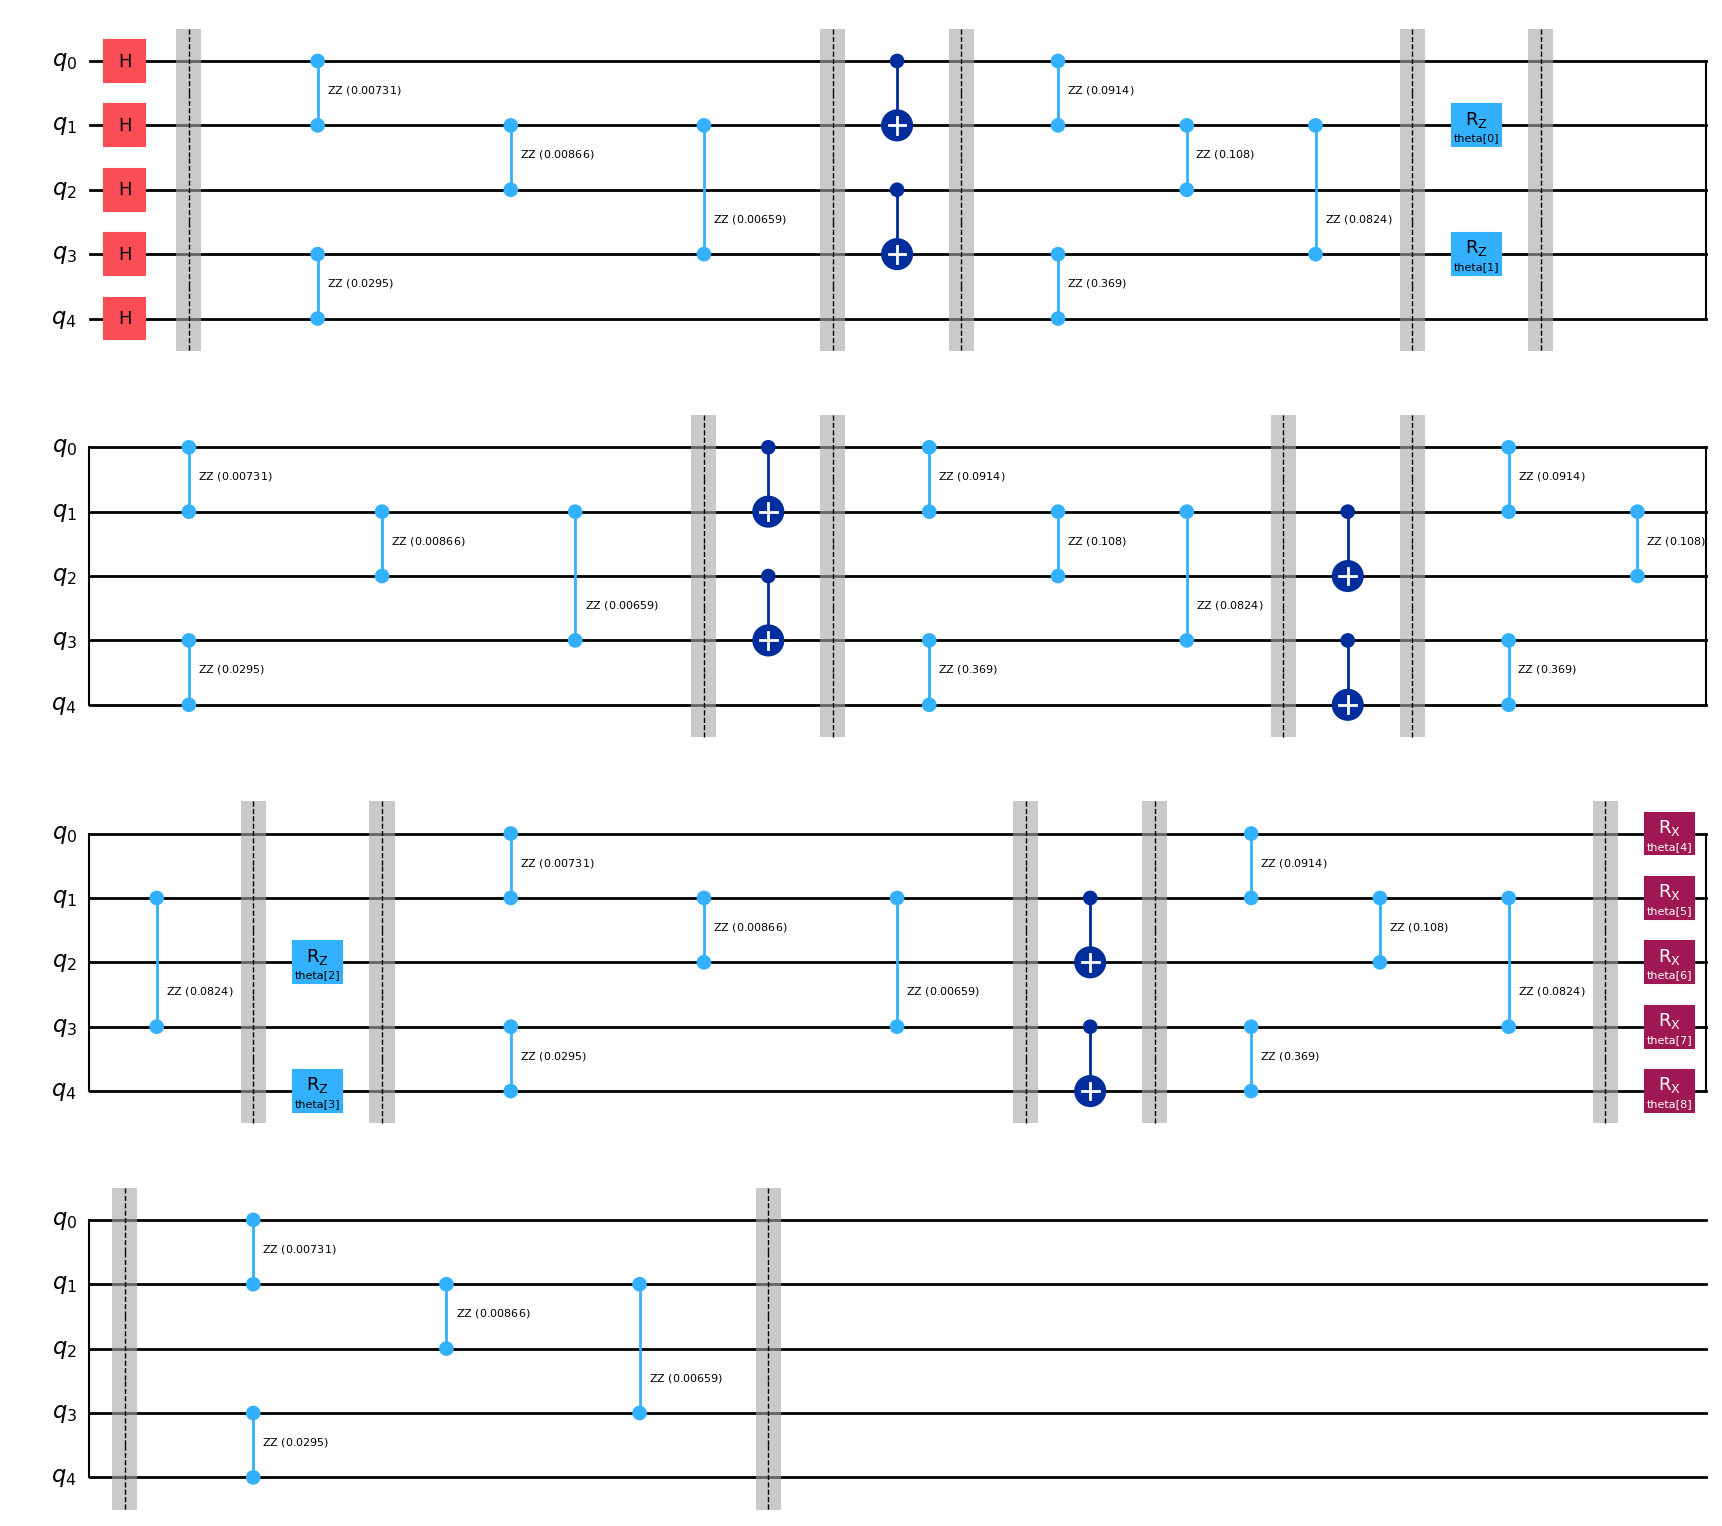

In [ ]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)

ansatz.h(range(0,5))
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatz.barrier()


ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatz.barrier()


ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatz.barrier()


ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.draw("mpl")

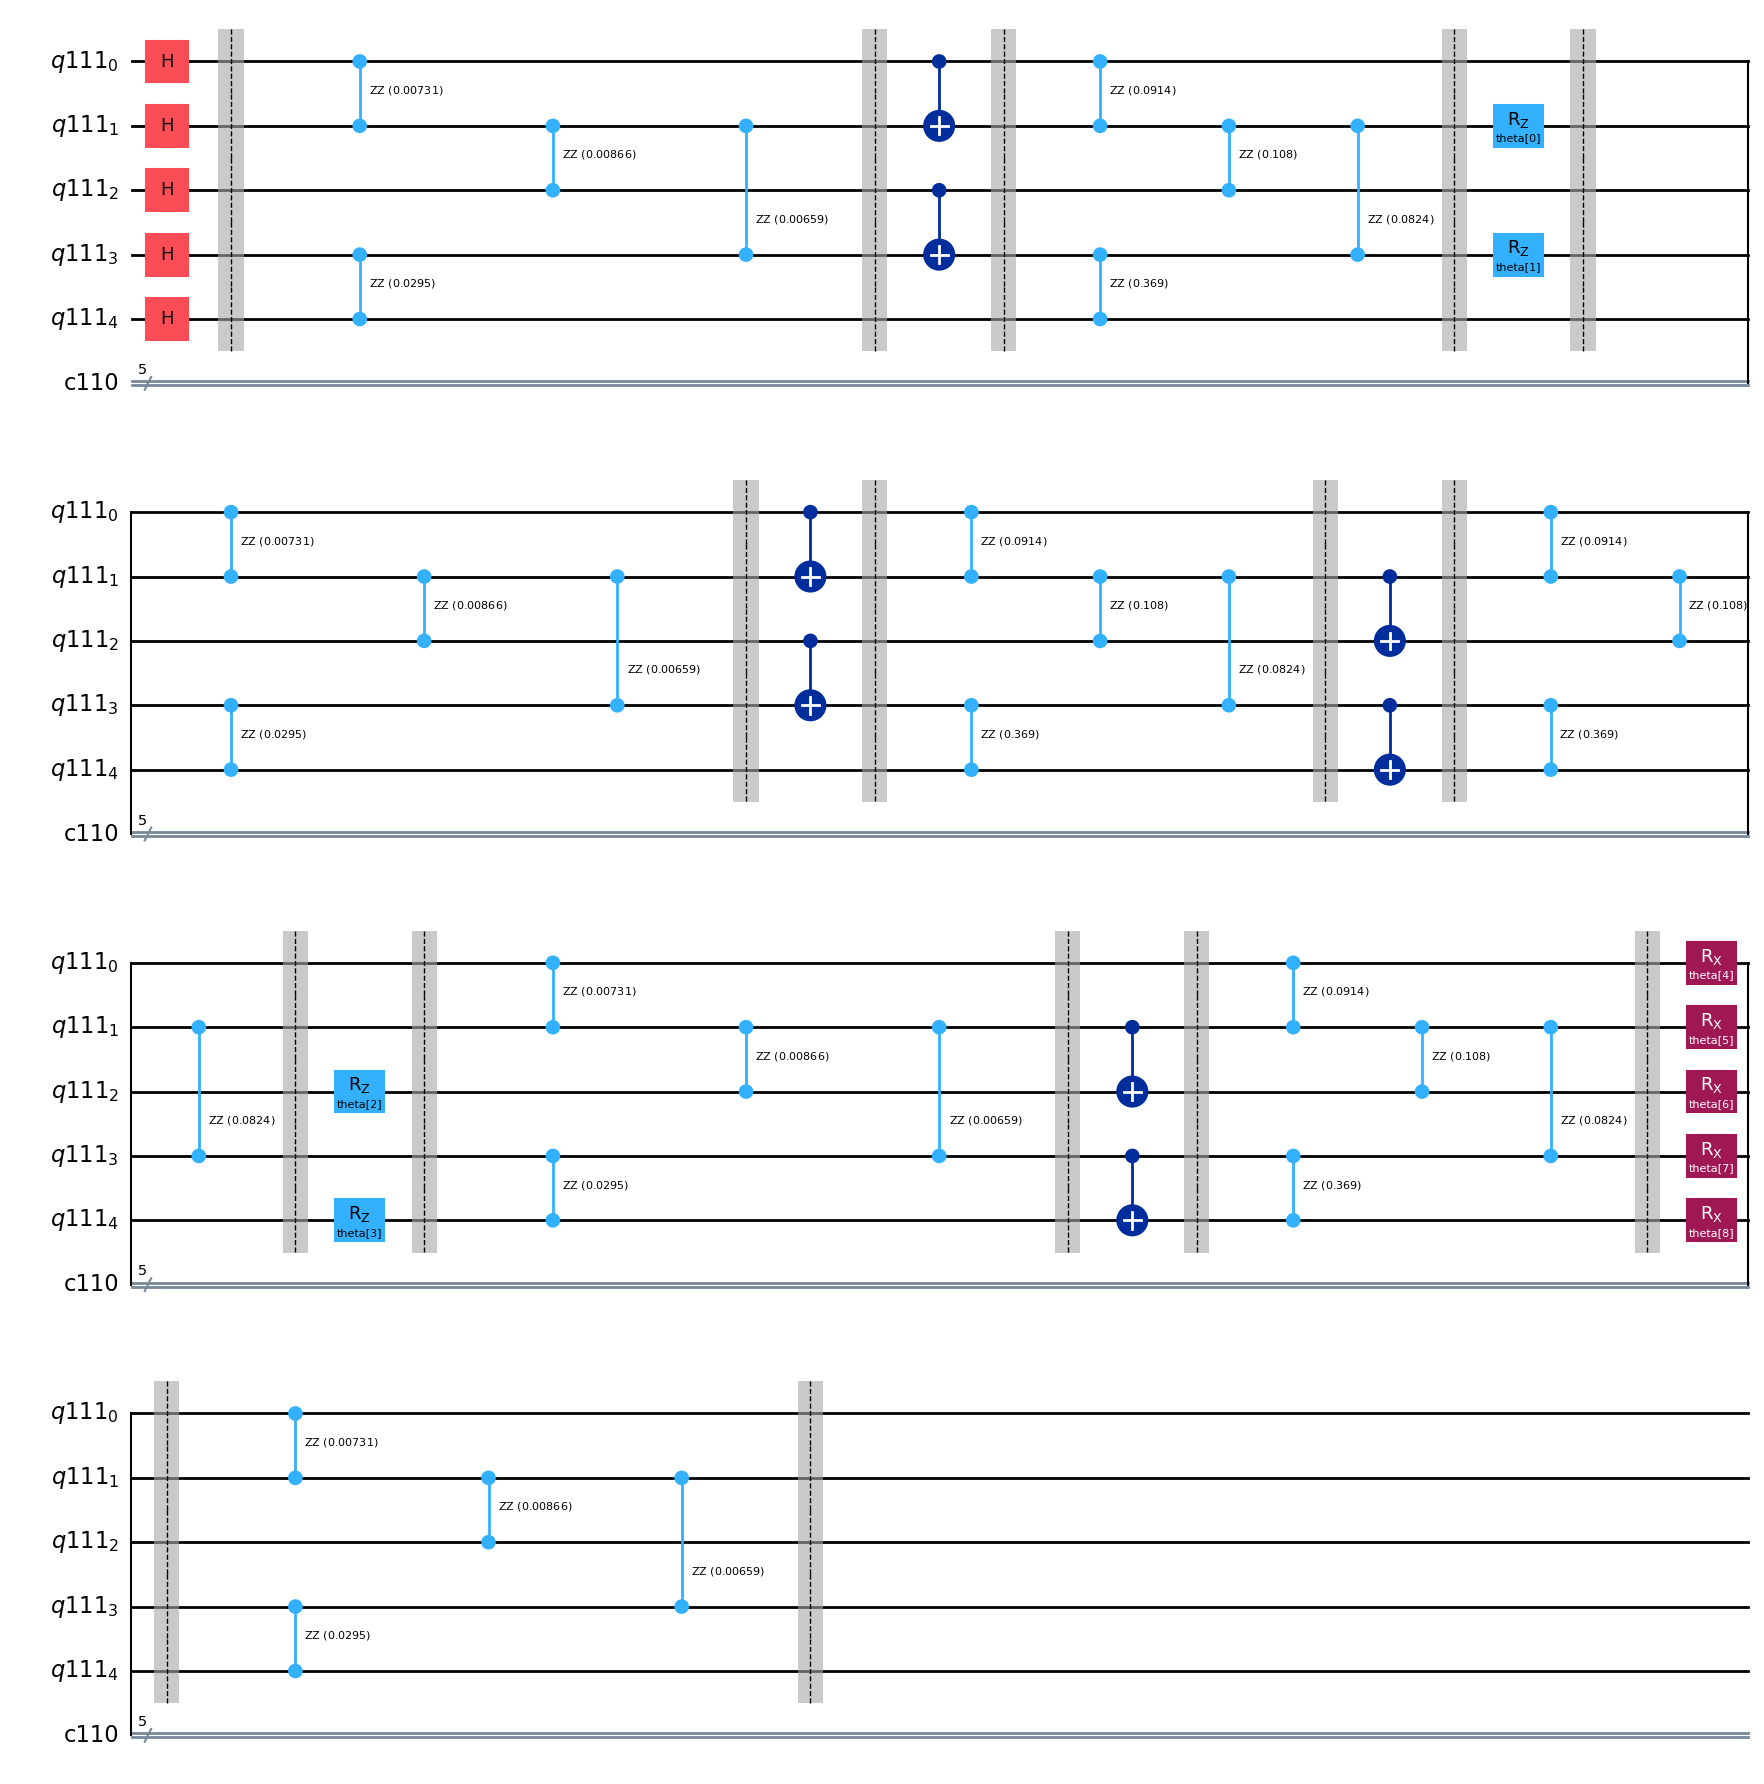

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

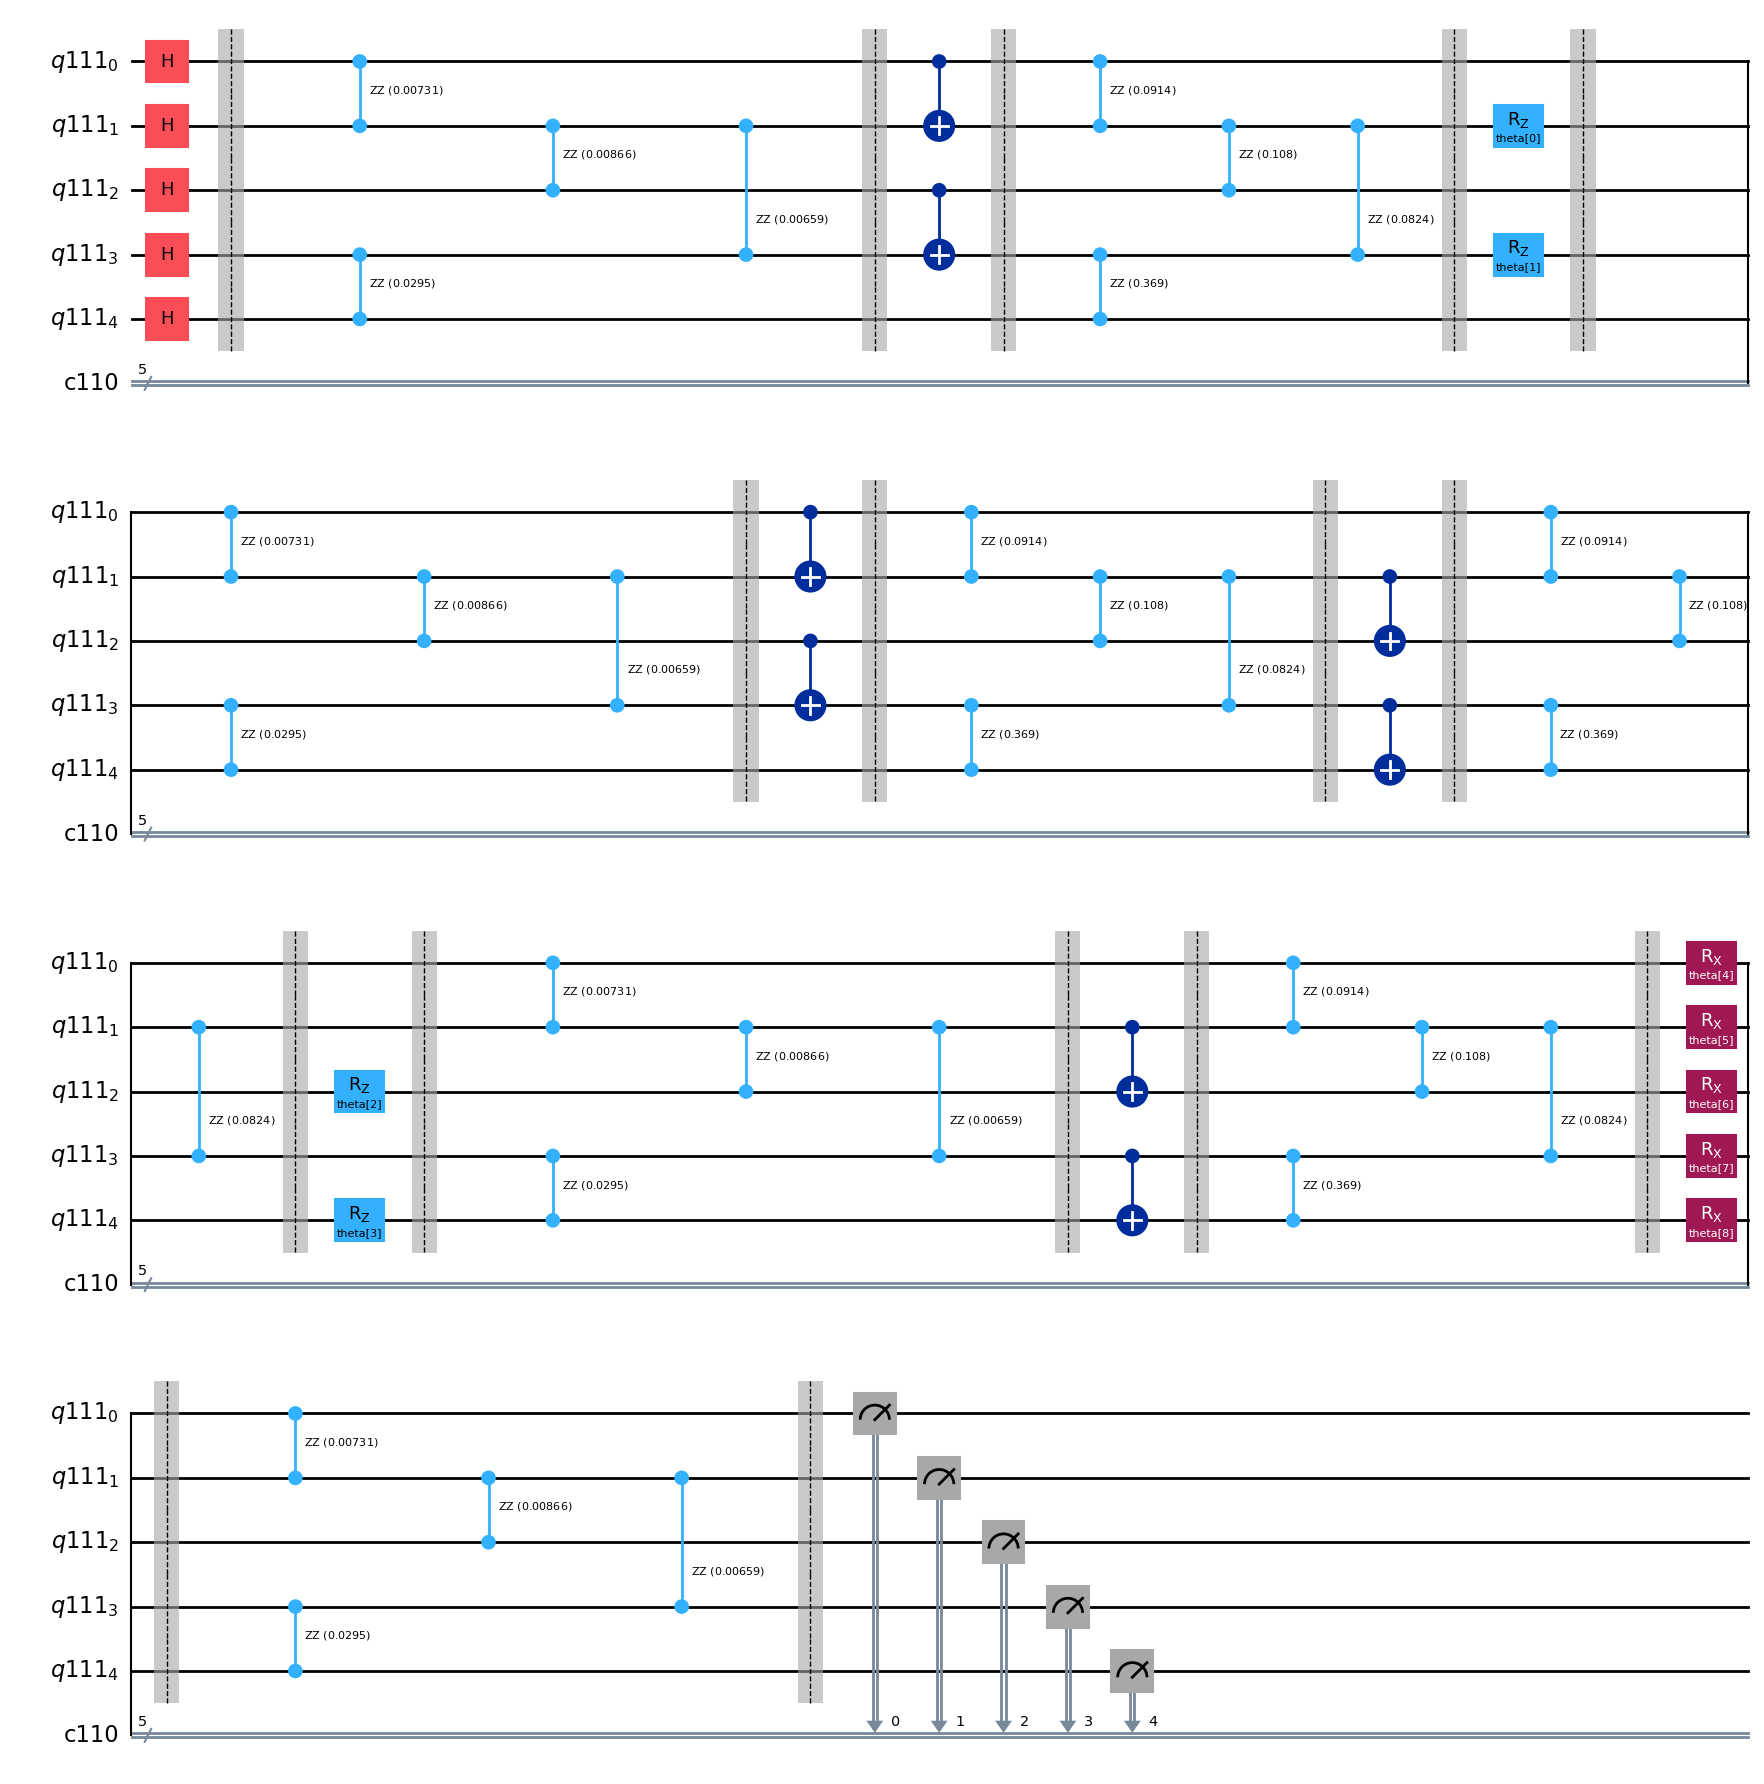

In [ ]:
# Ansatz for VQNHE ZZ Measurement

ansatz_zz = ansatzo

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

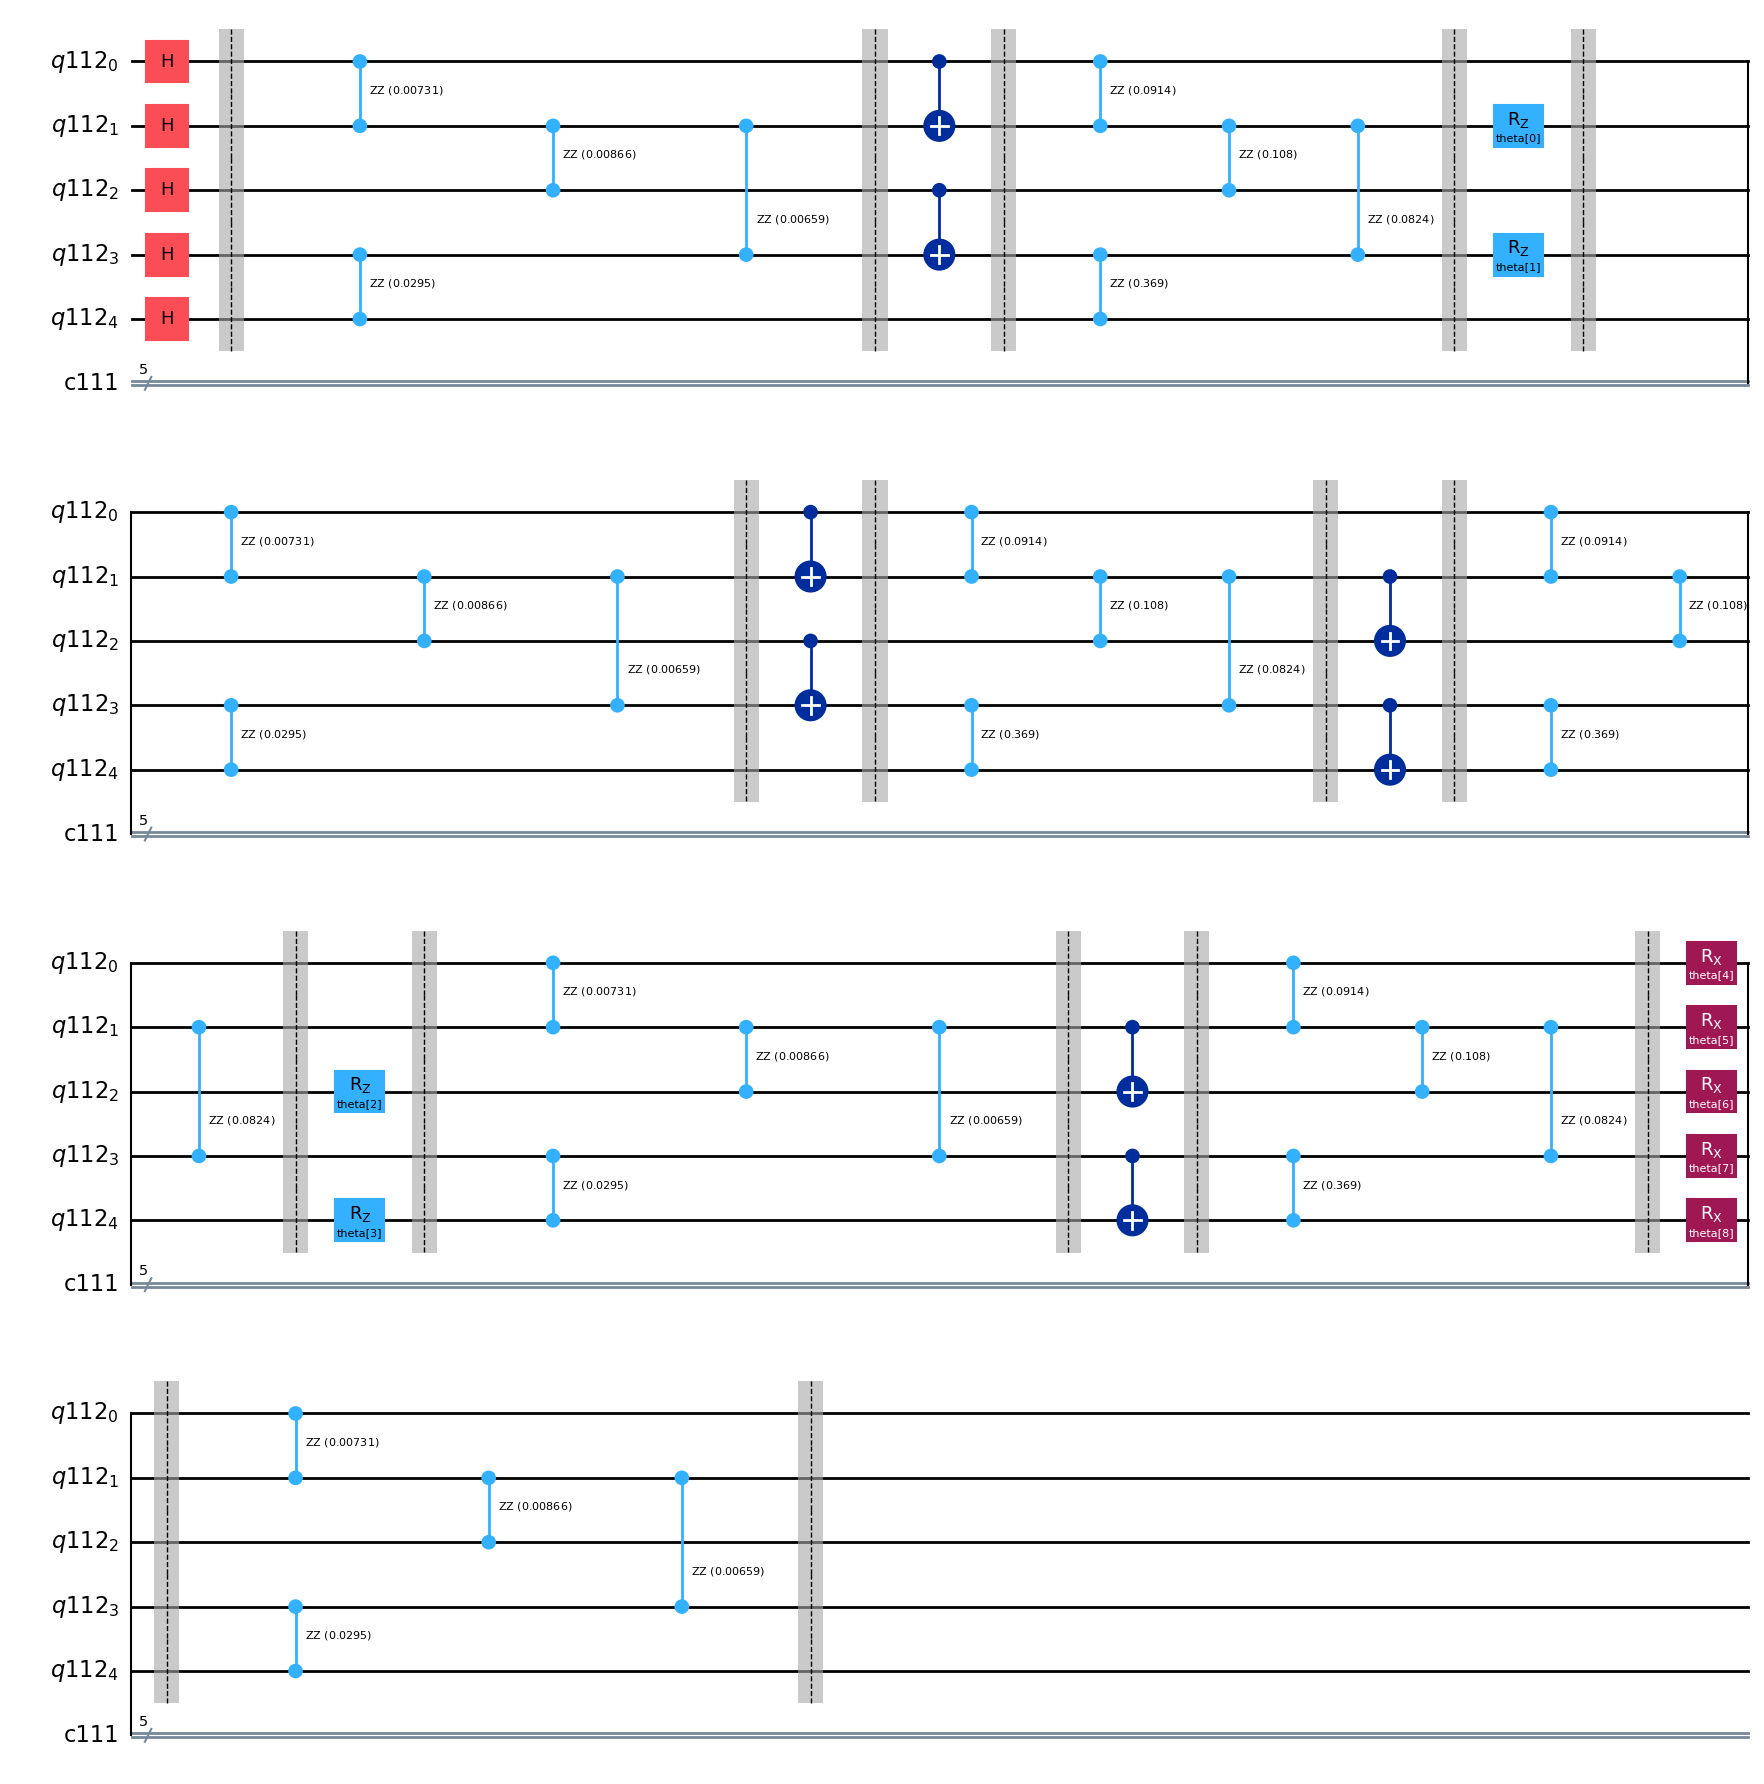

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

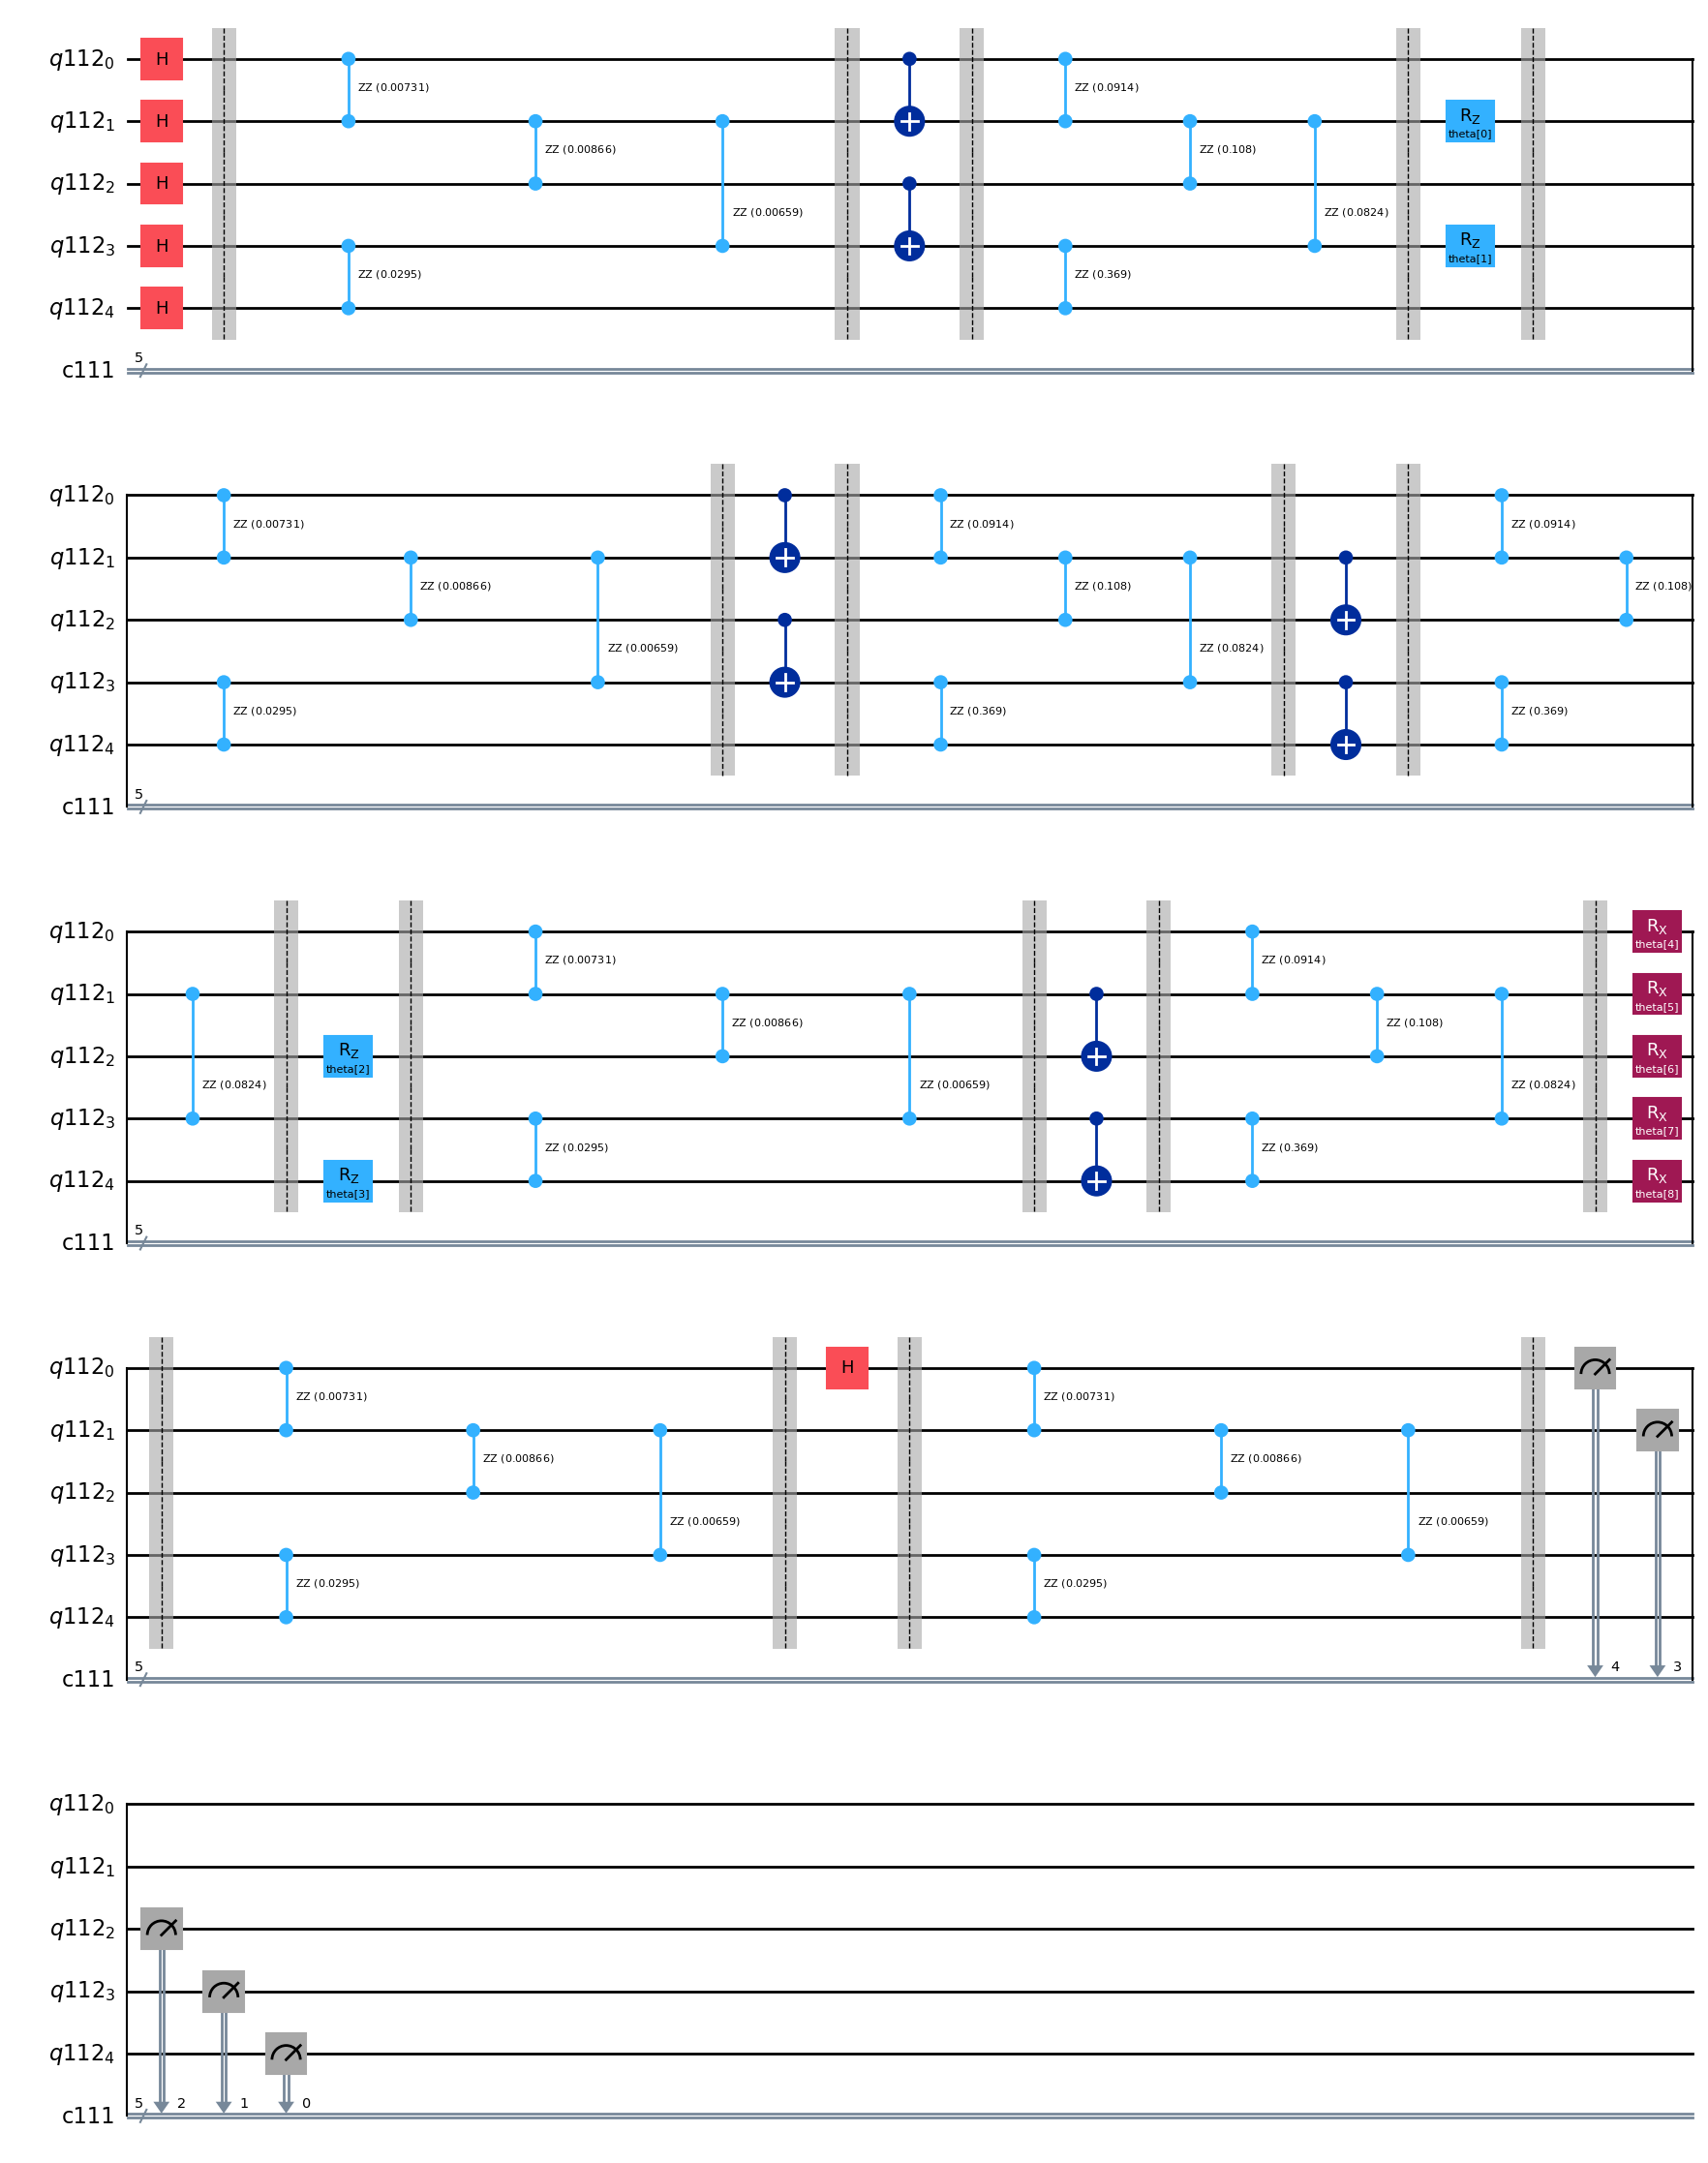

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = ansatzo

ansatz_x0.h(0)
ansatz_x0.barrier()

ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

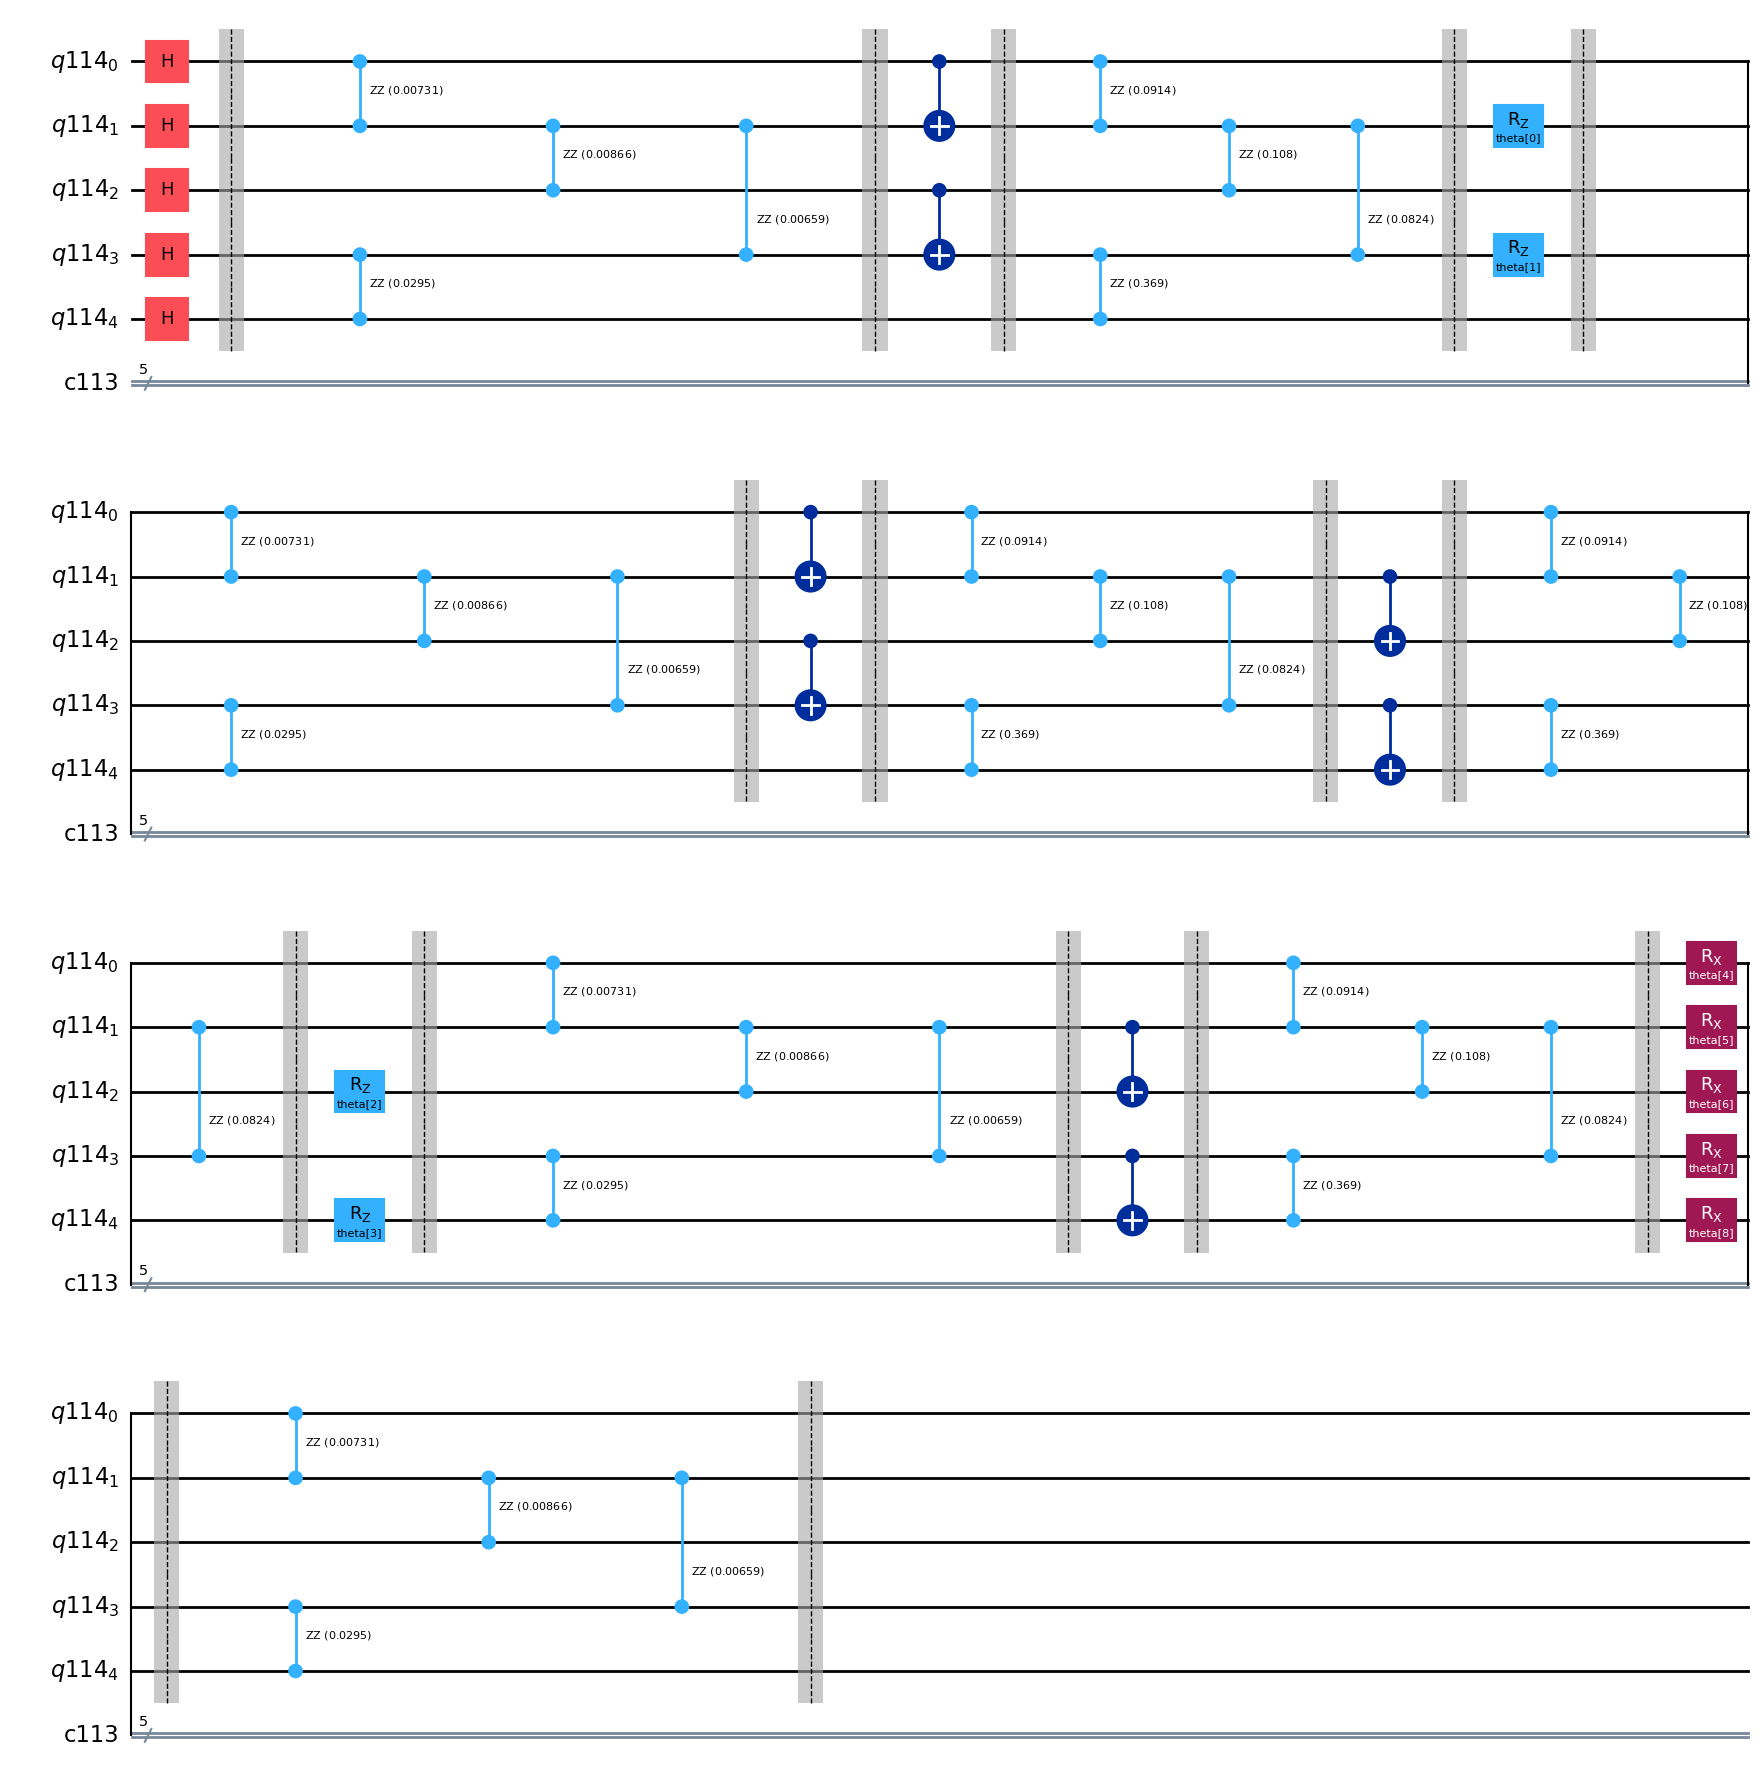

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

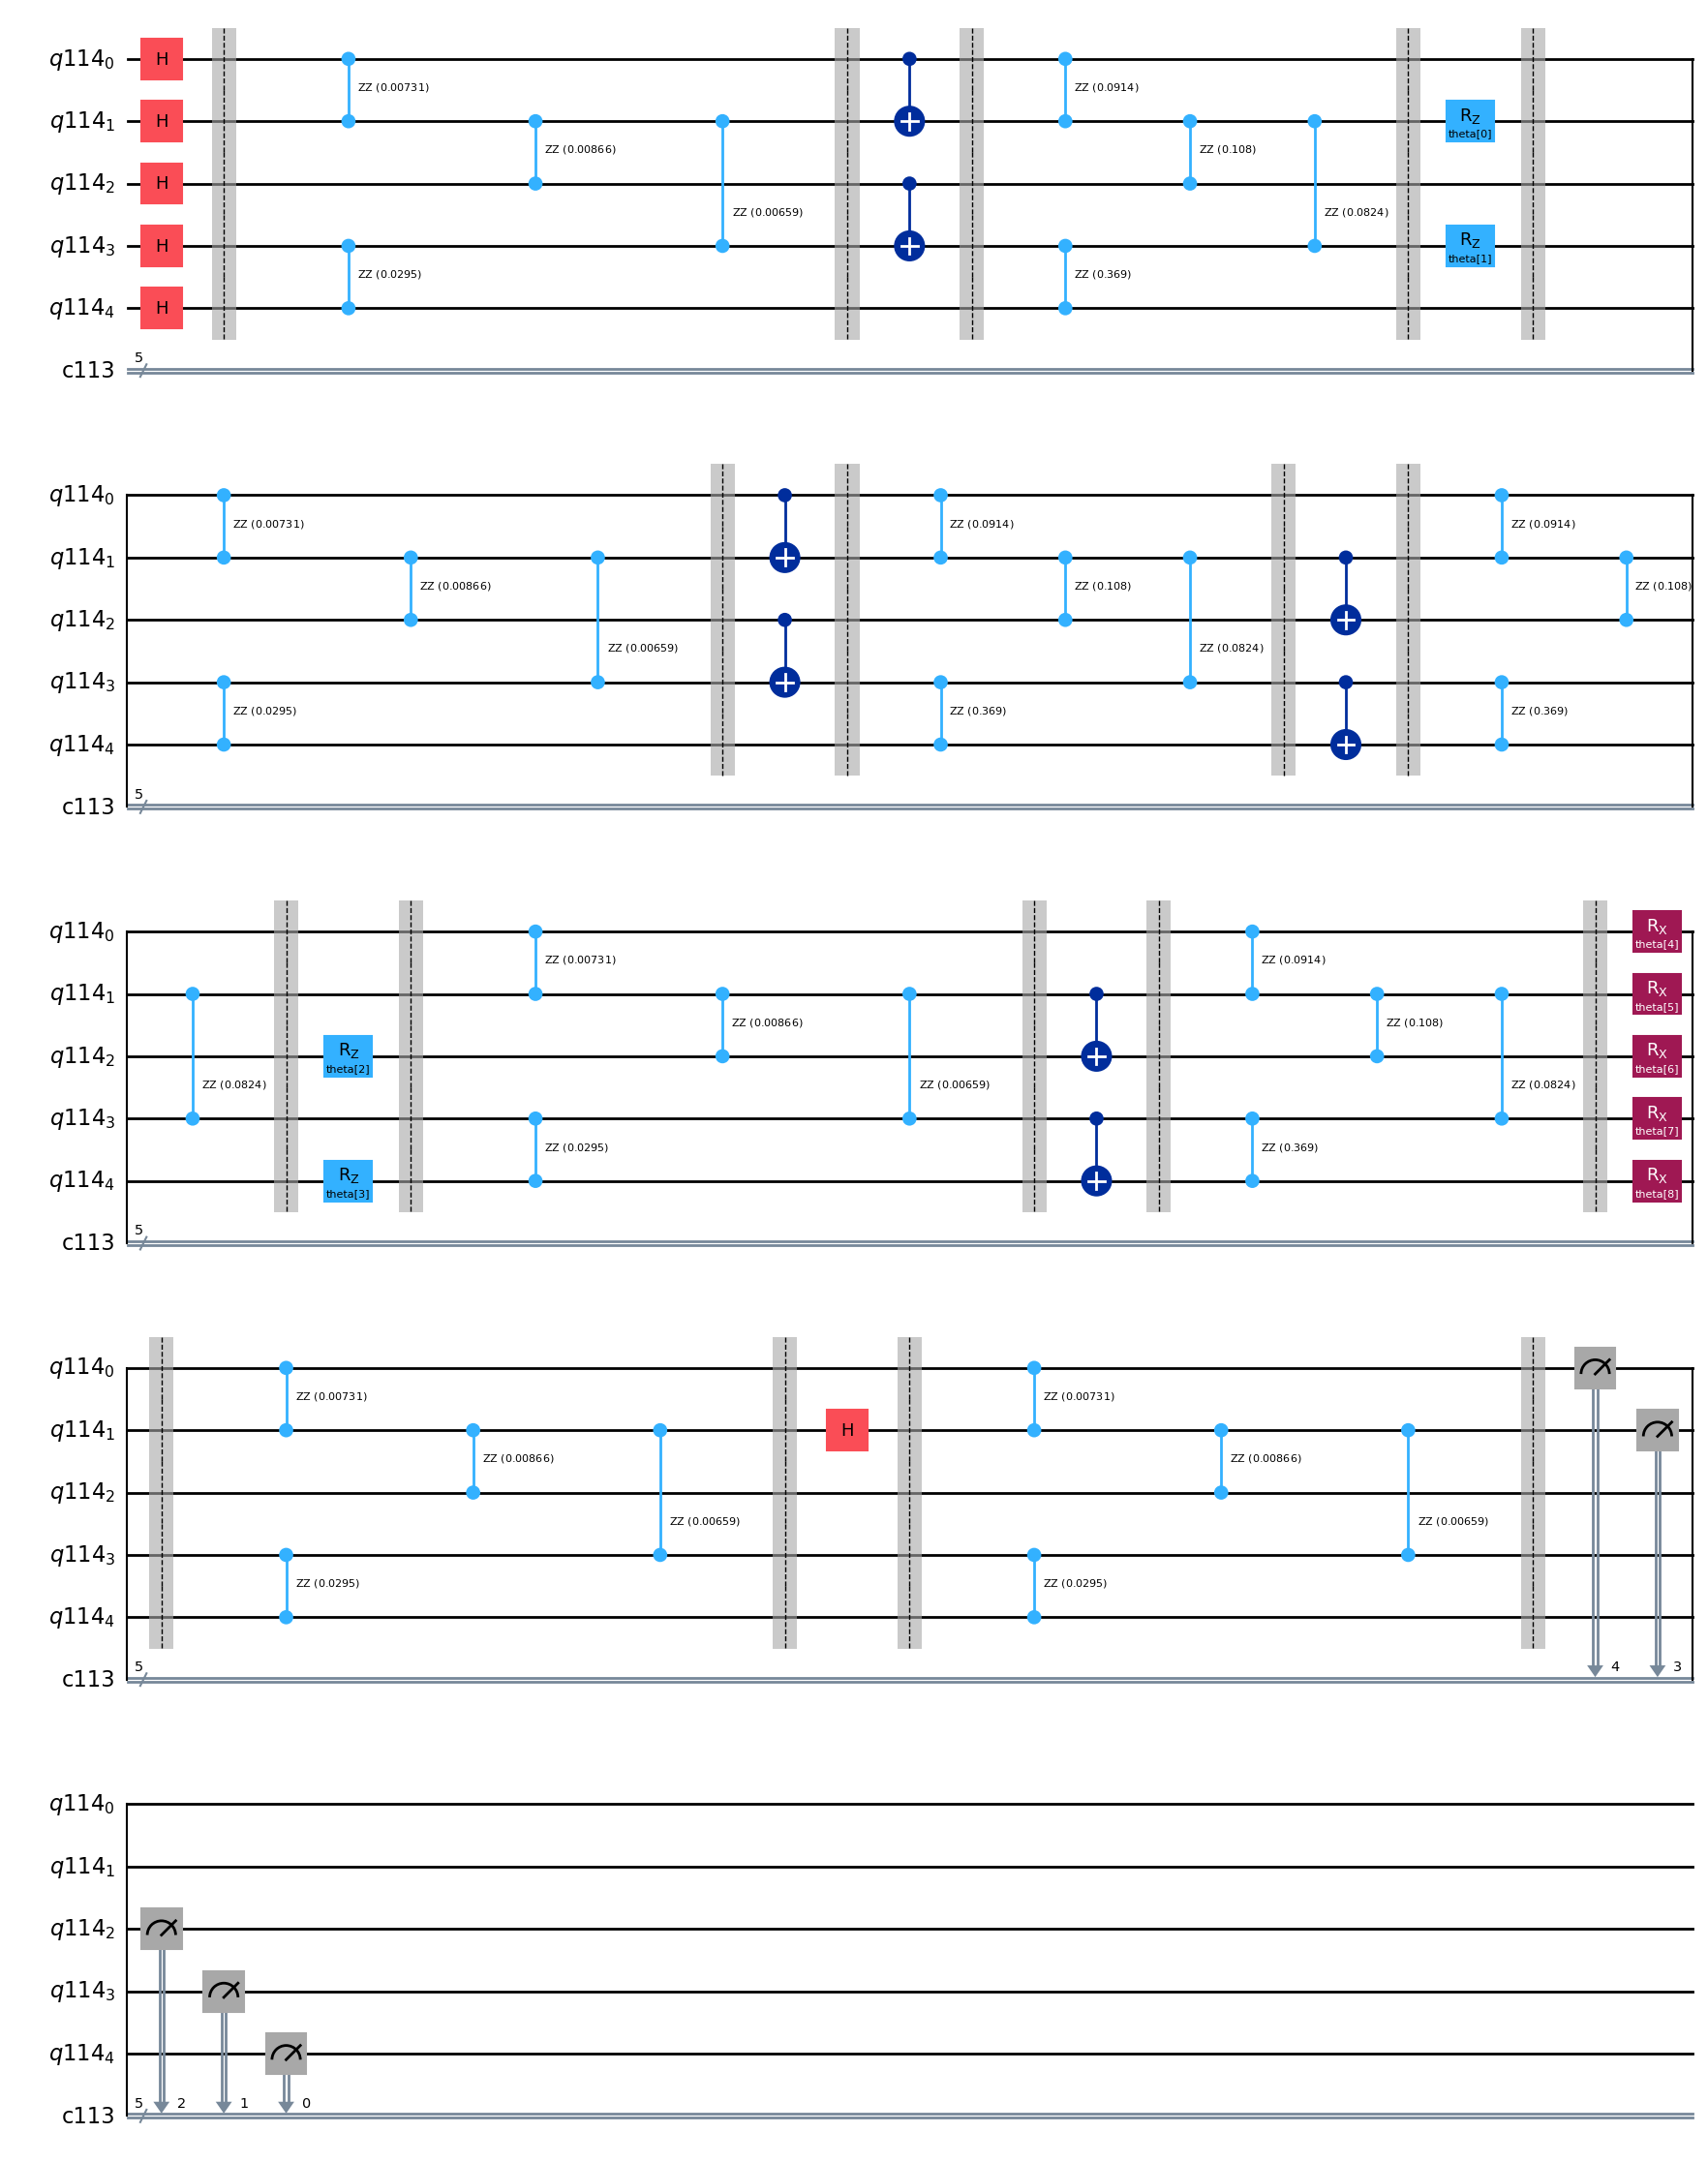

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = ansatzo

ansatz_x1.h(1)
ansatz_x1.barrier()

ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

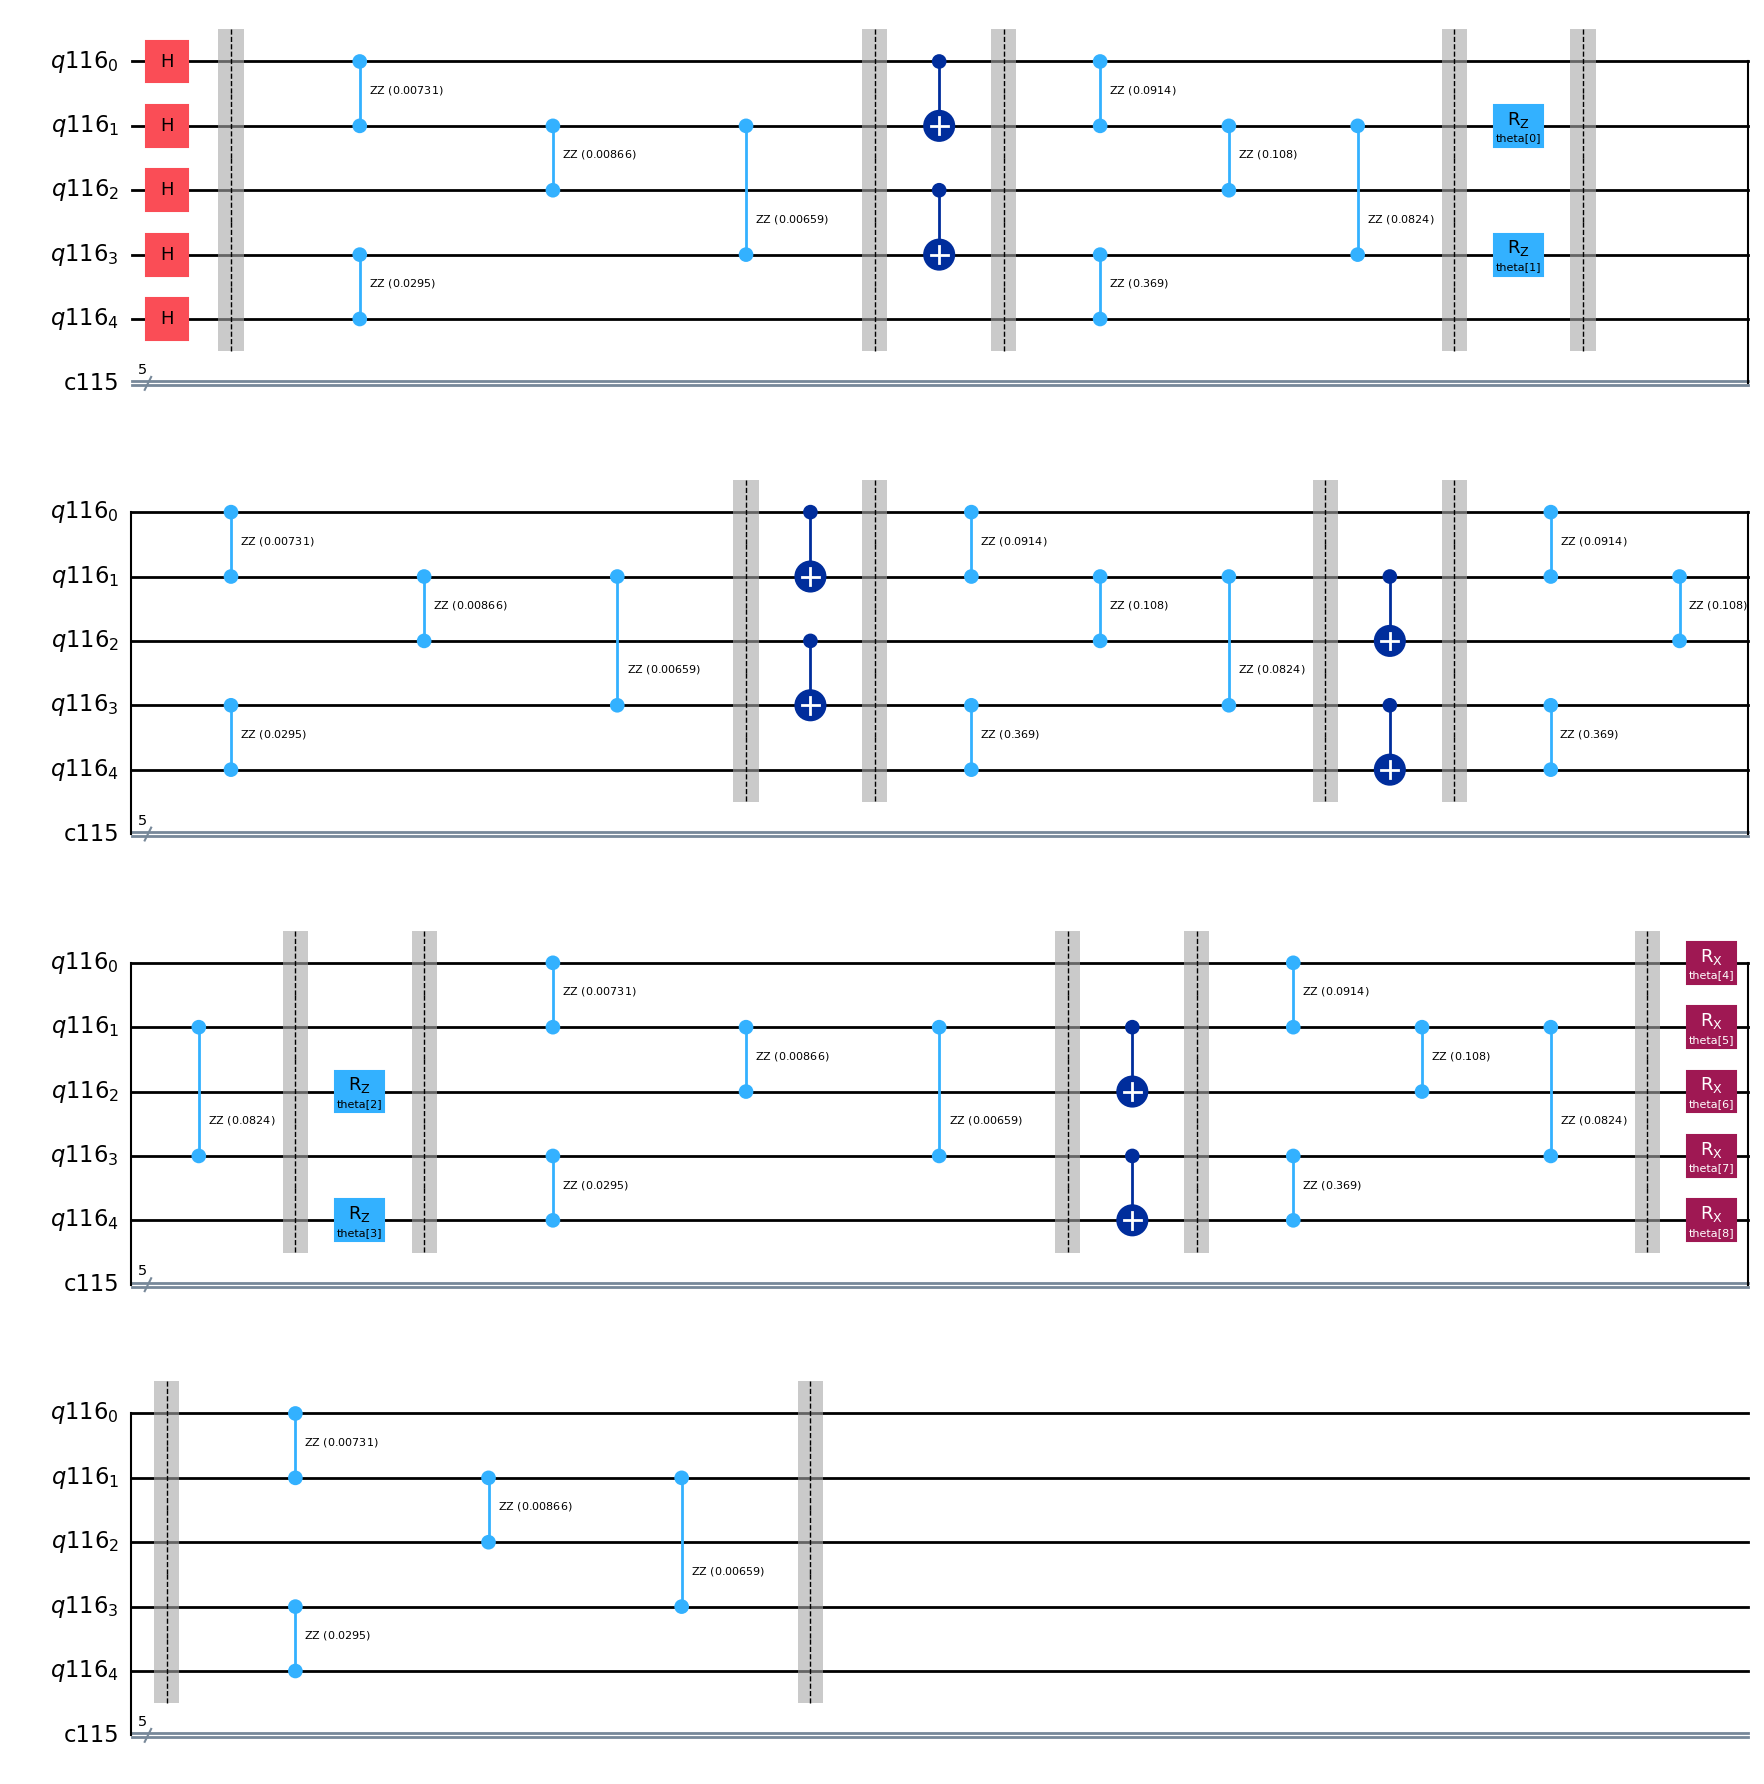

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

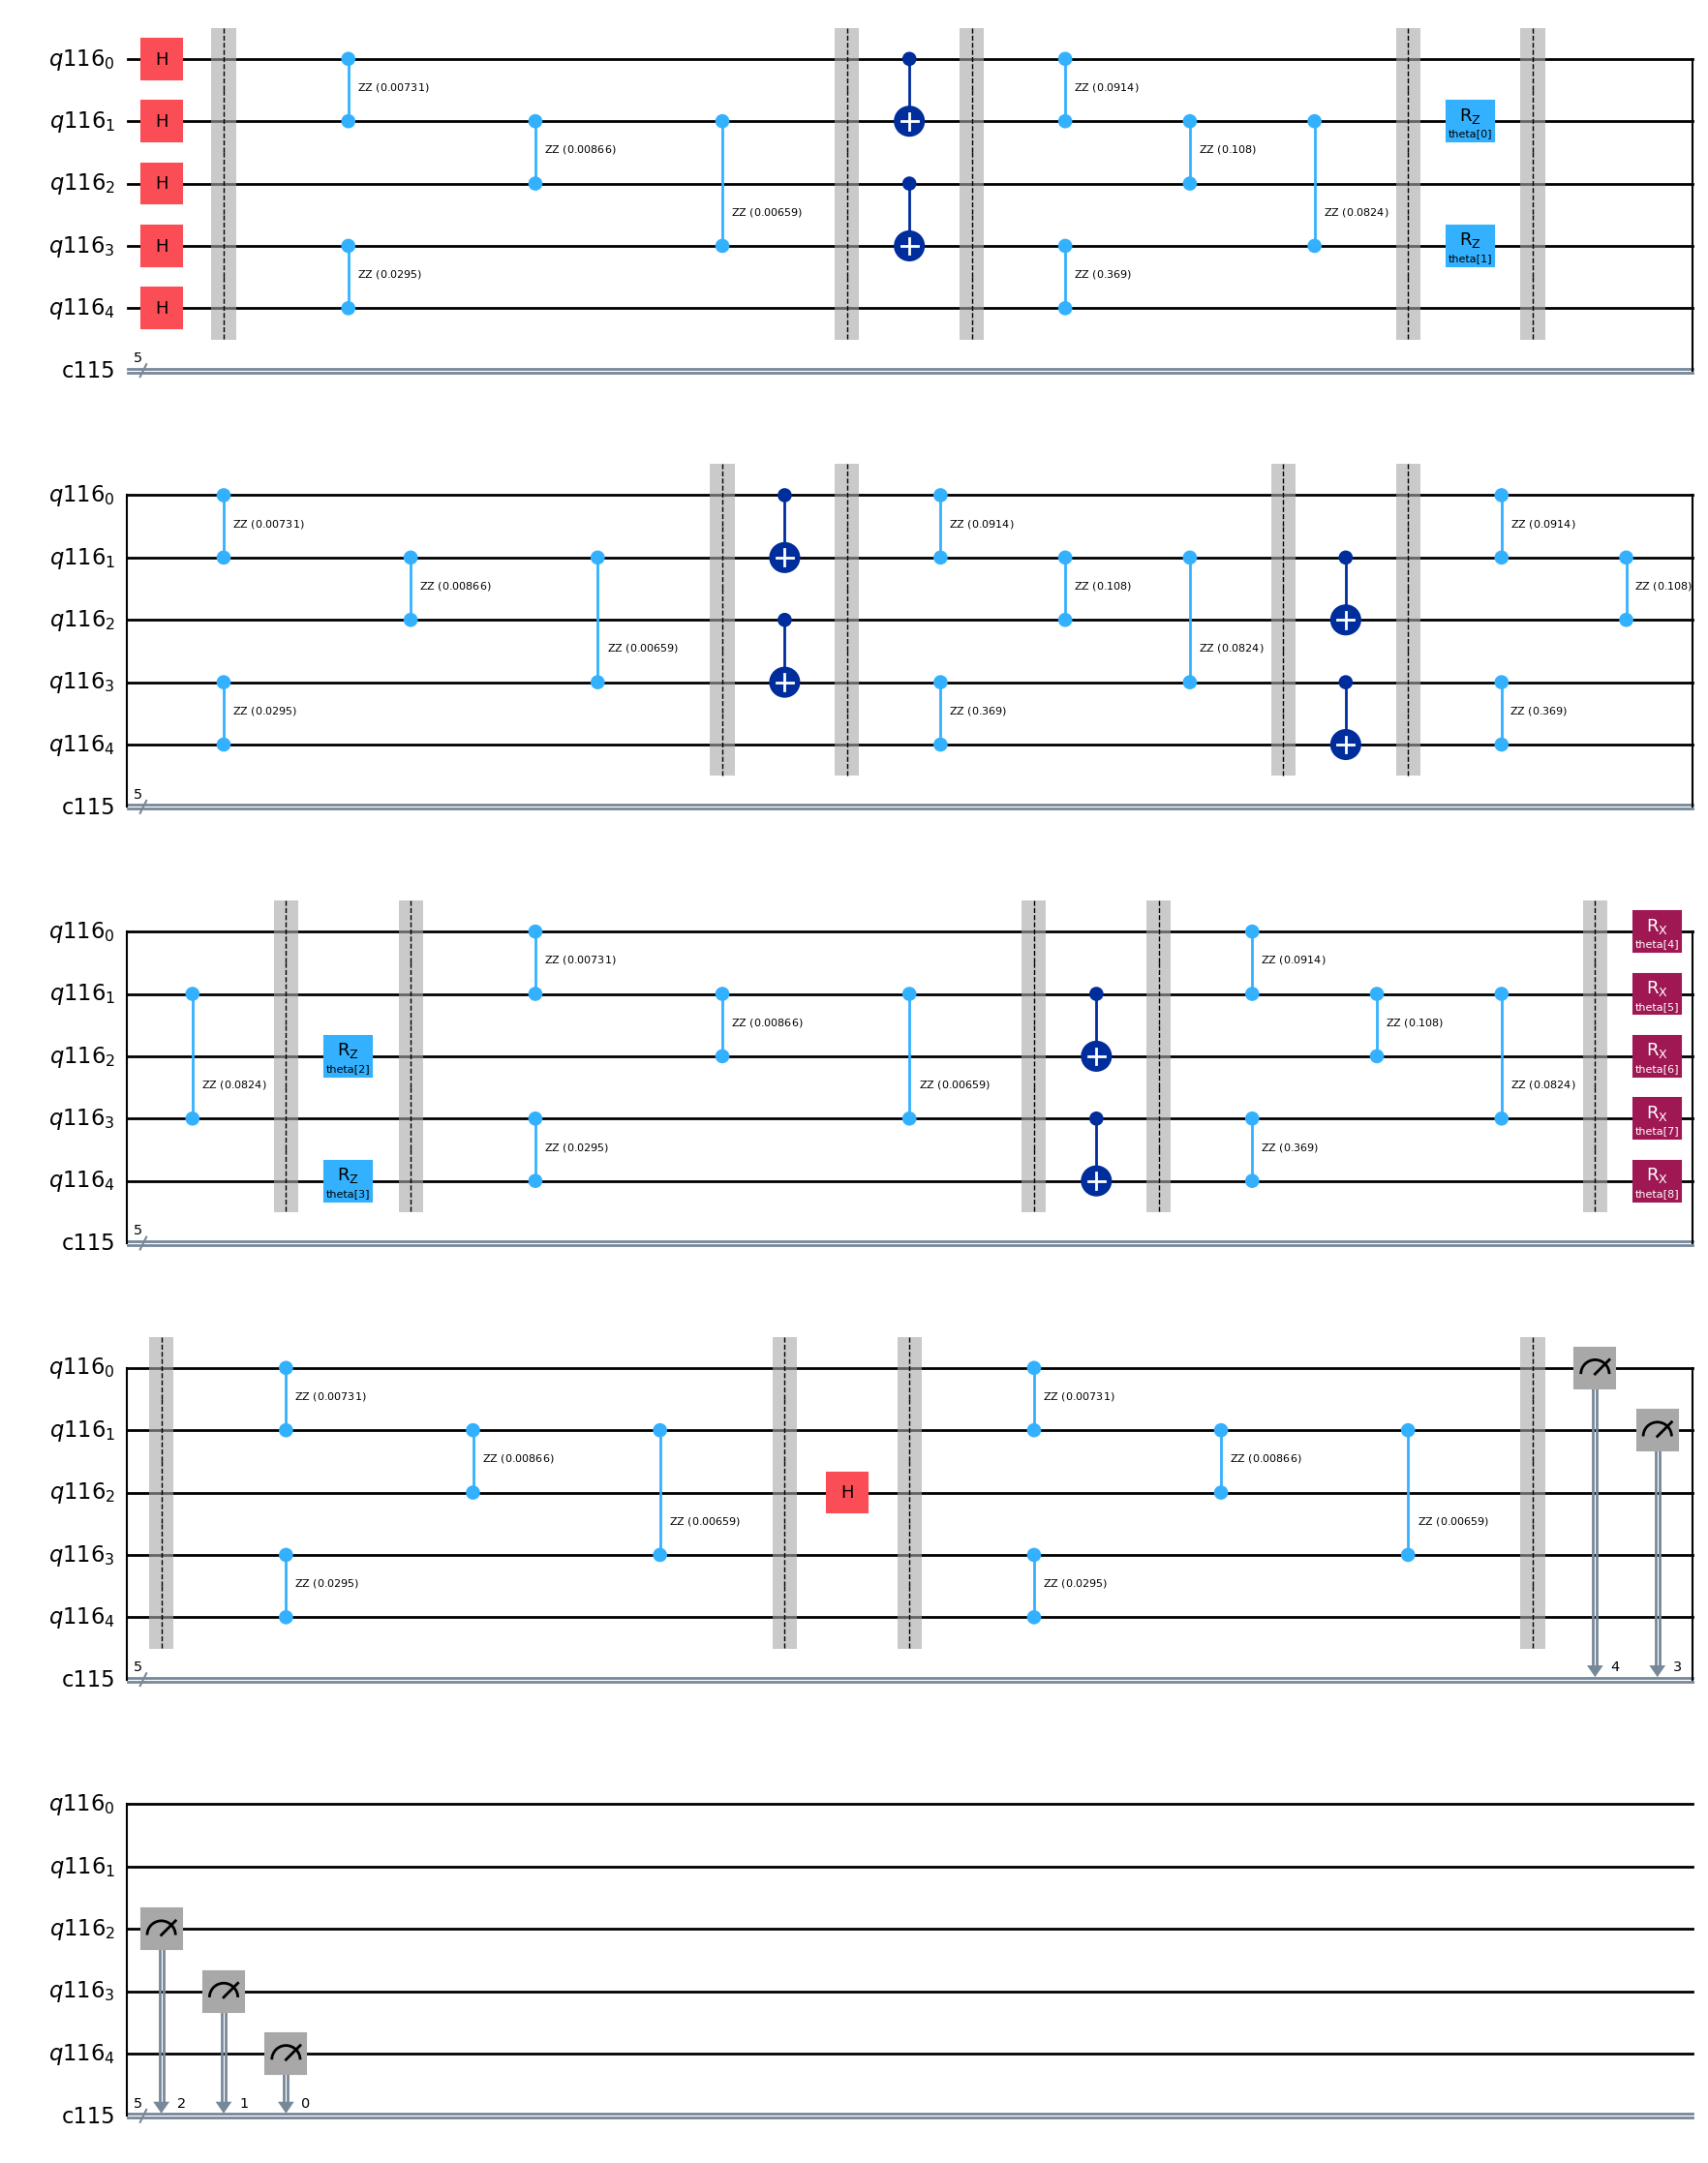

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = ansatzo

ansatz_x2.h(2)
ansatz_x2.barrier()

ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

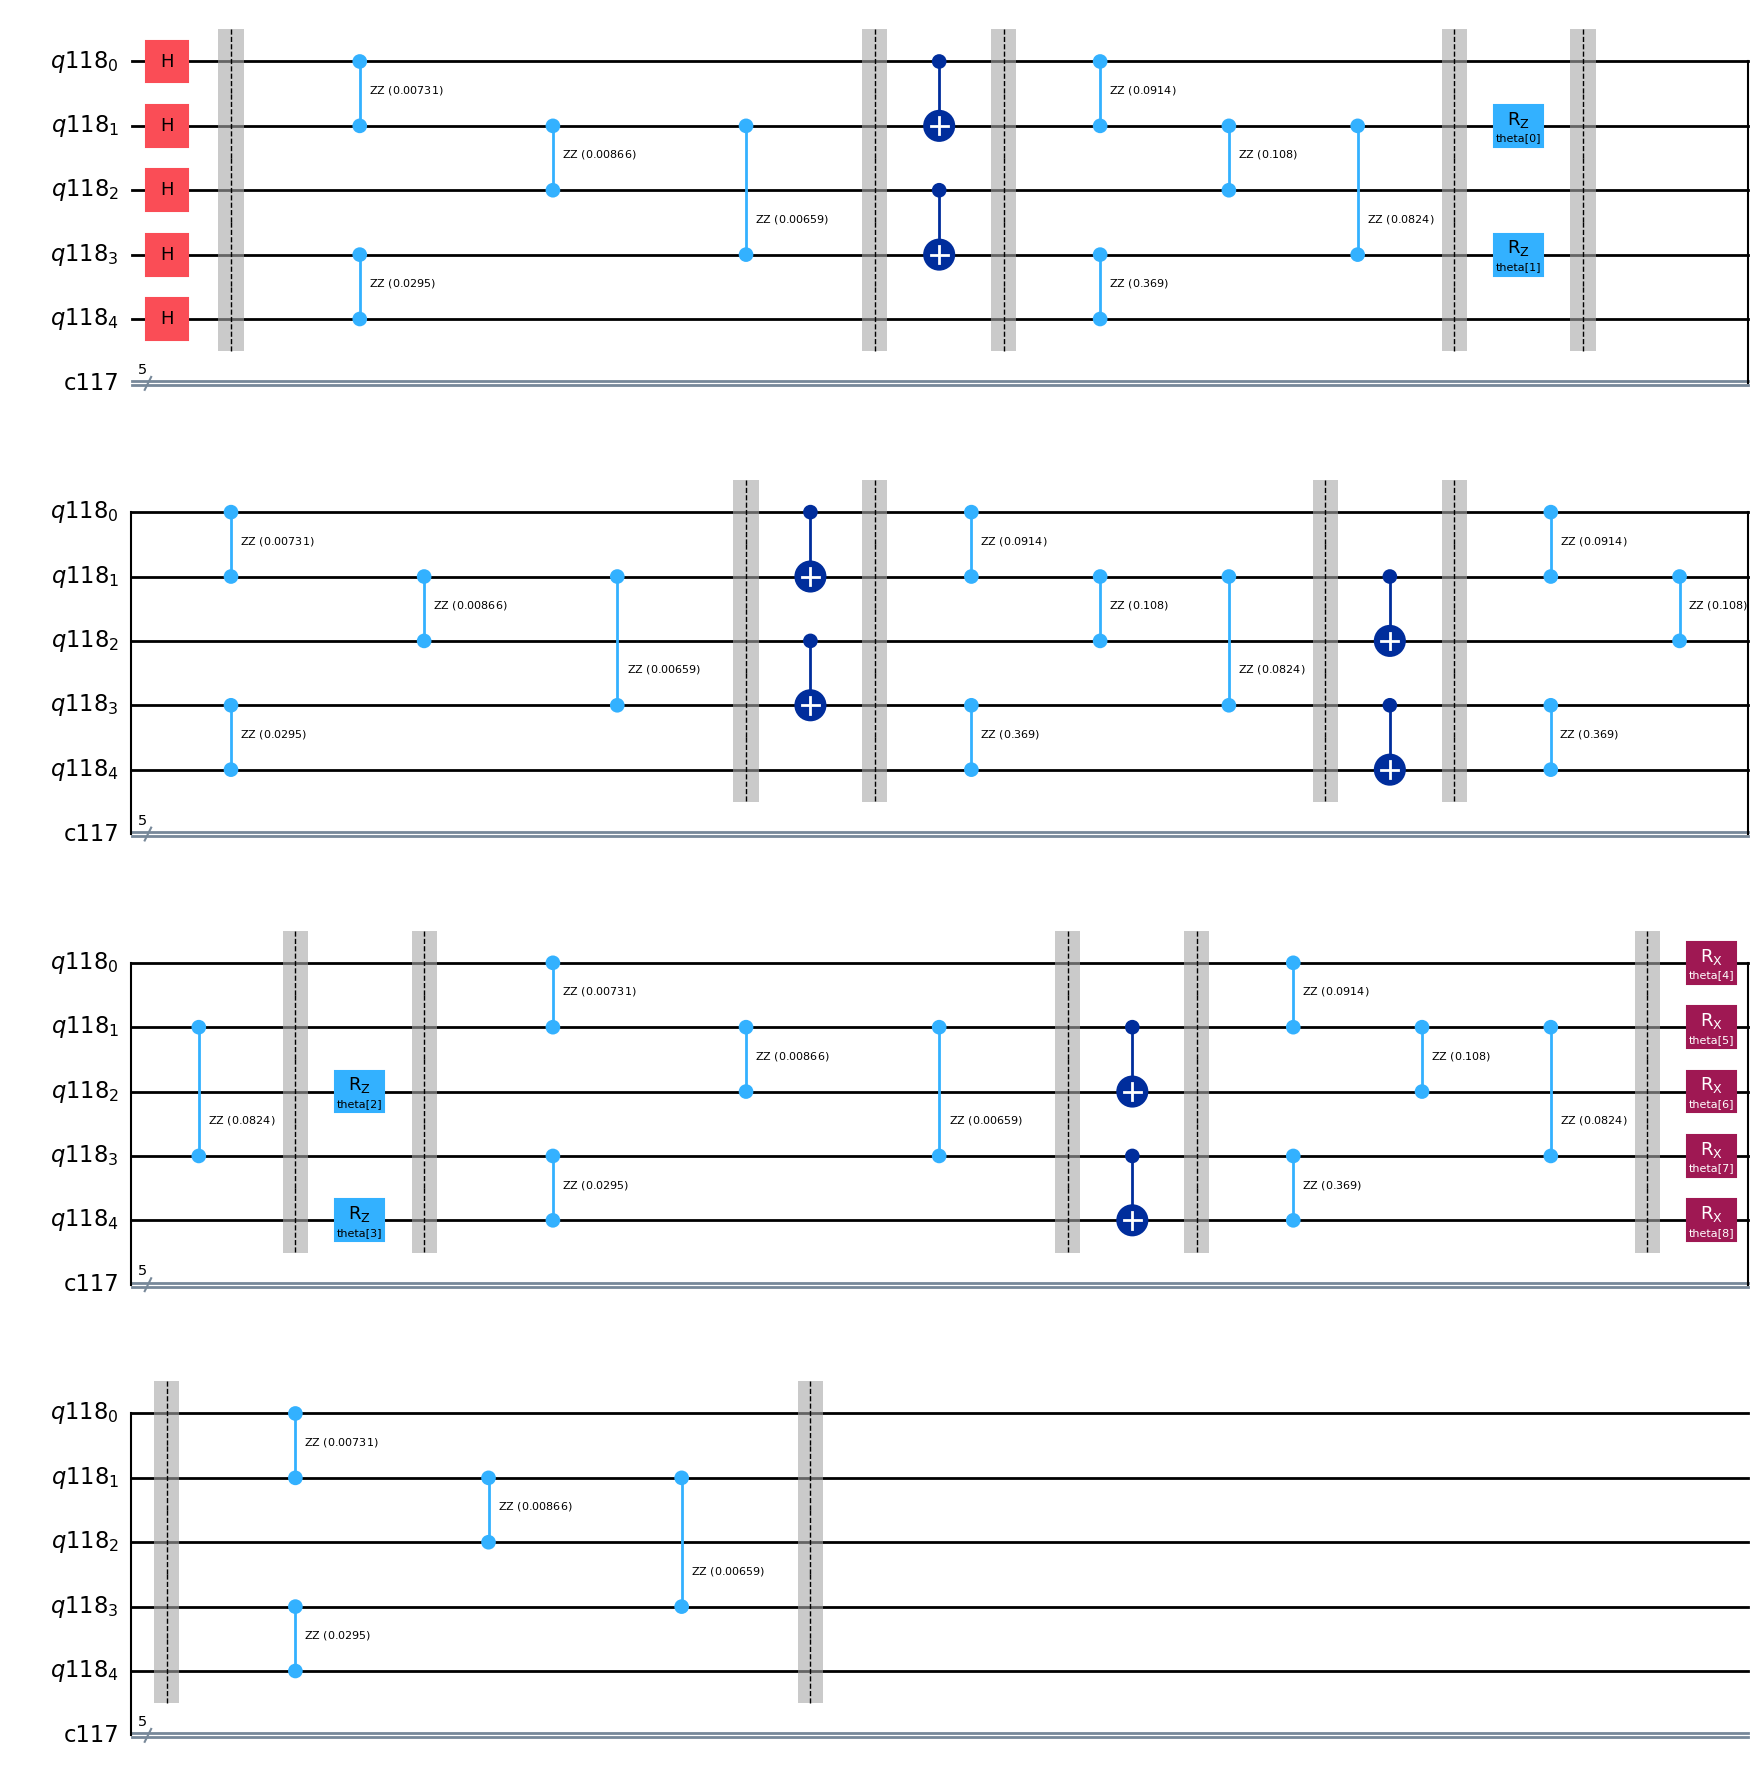

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

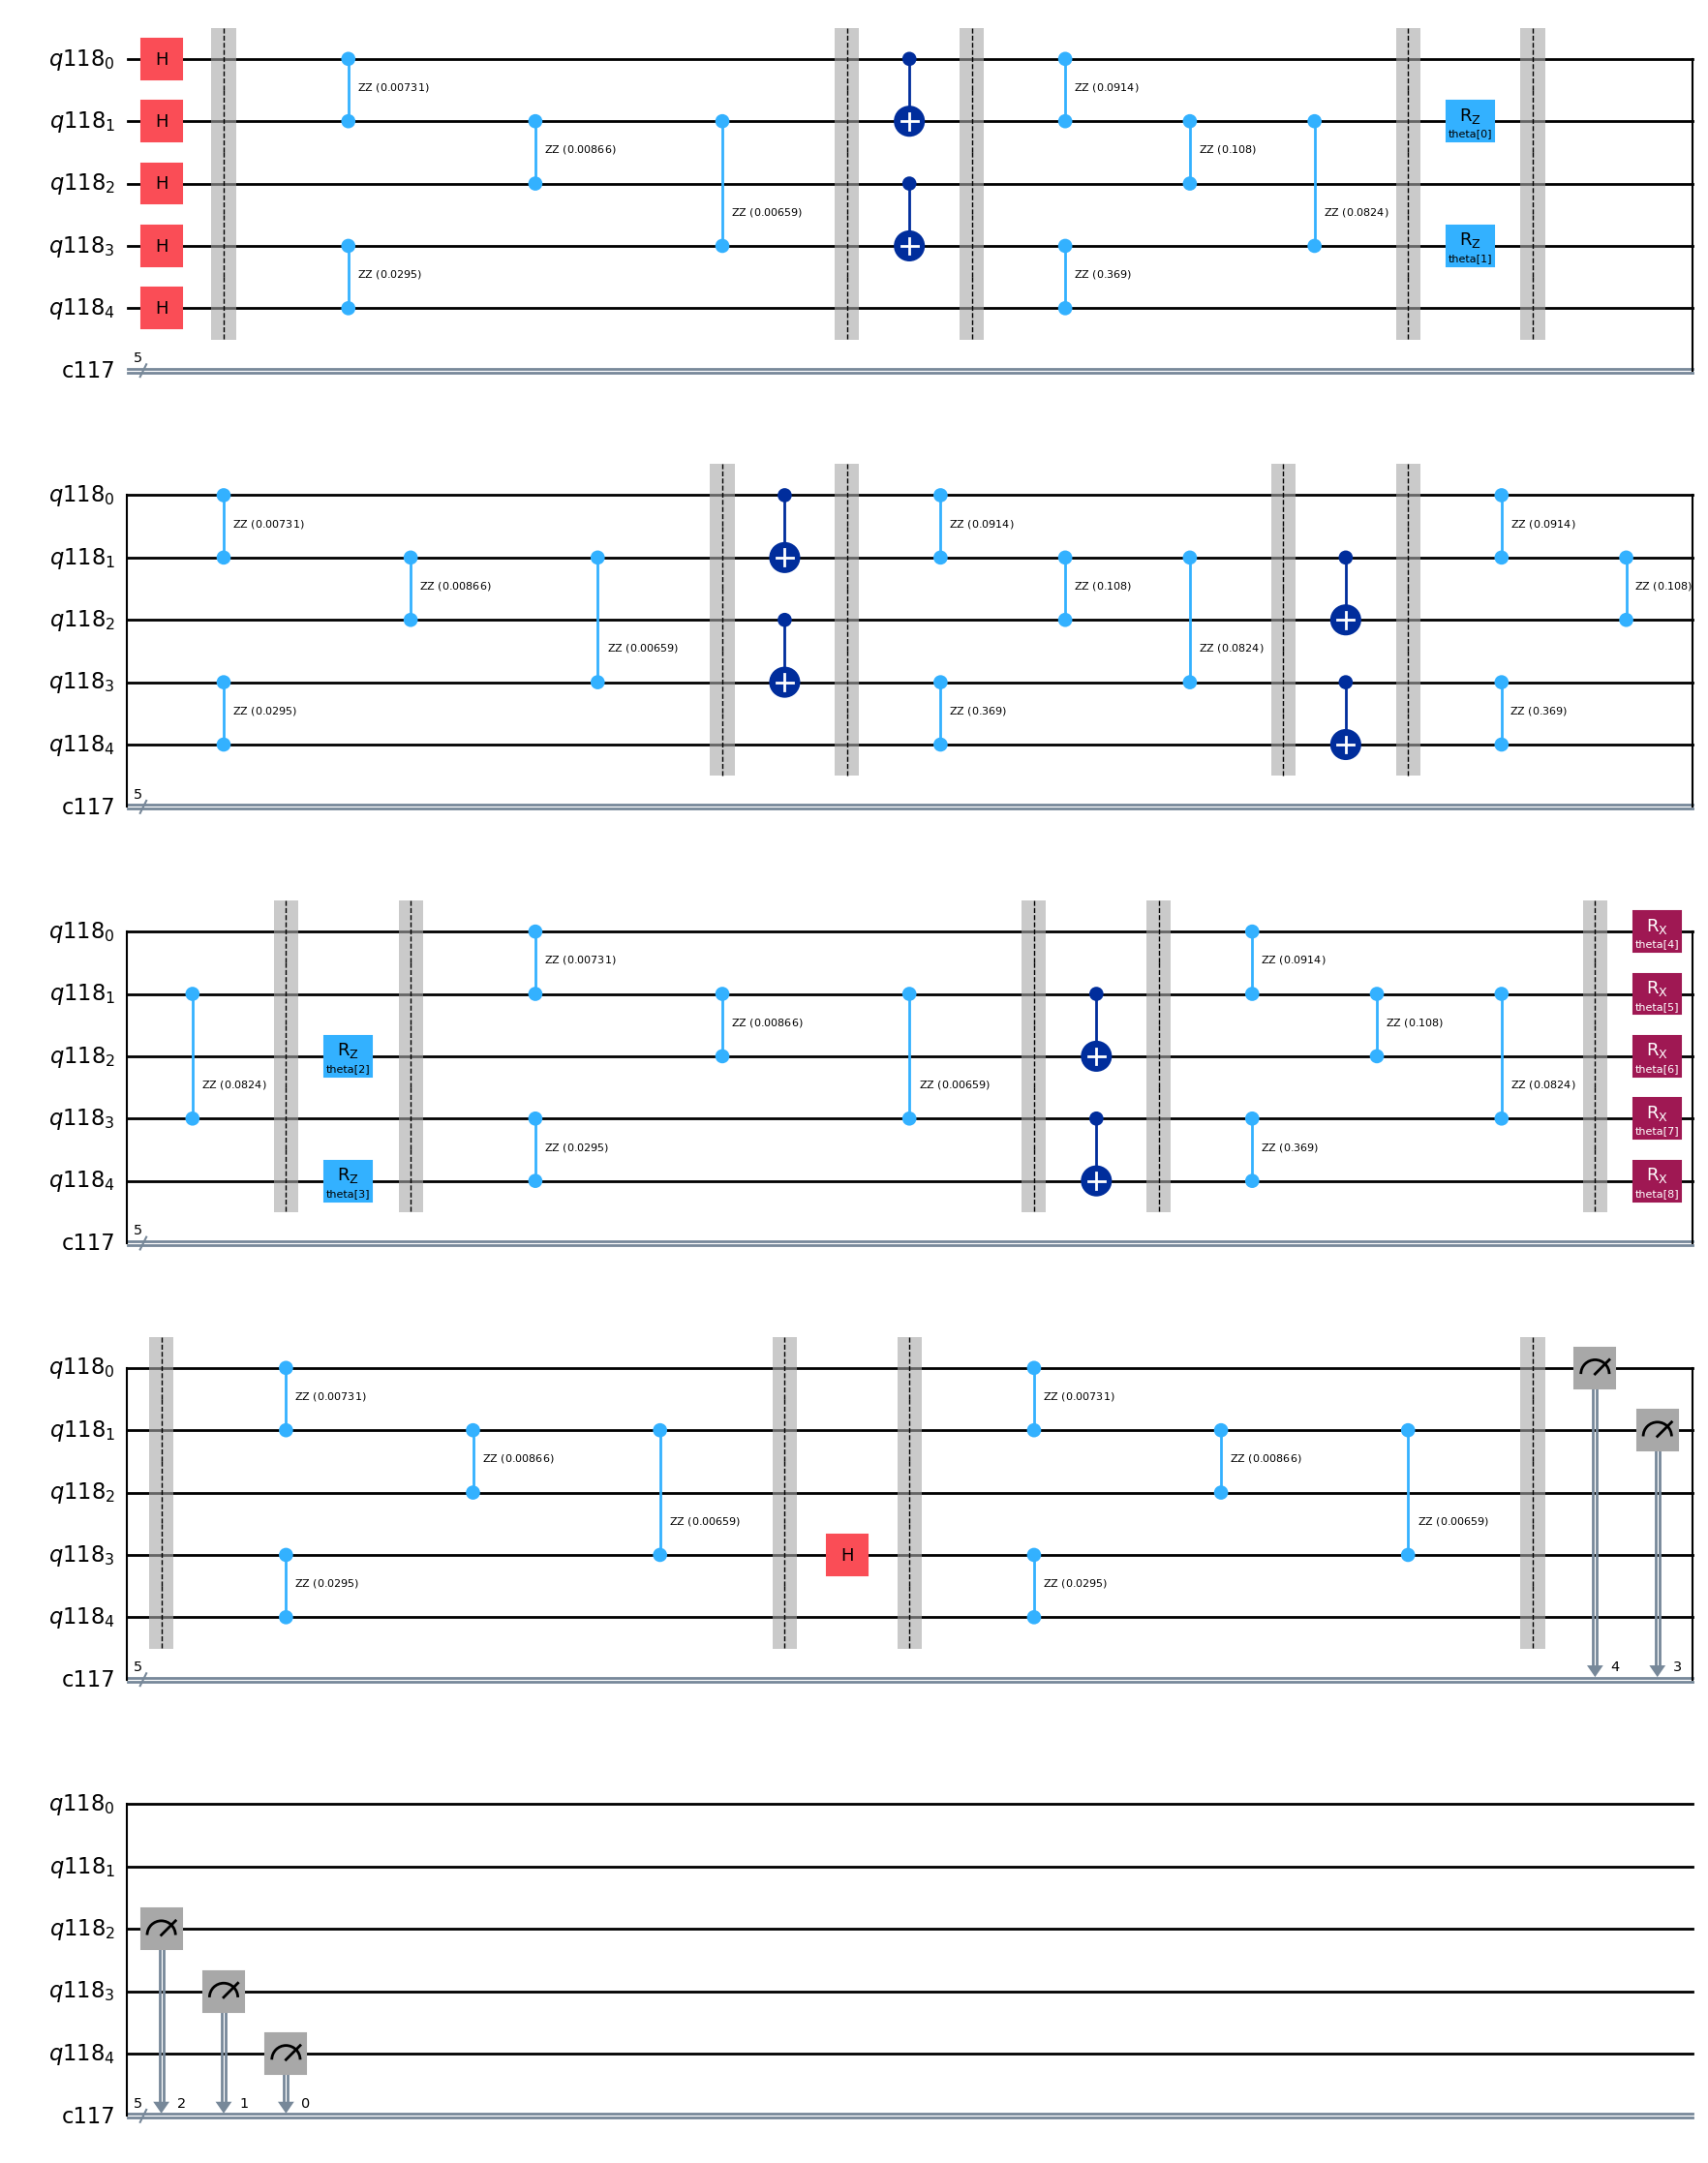

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = ansatzo

ansatz_x3.h(3)
ansatz_x3.barrier()

ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

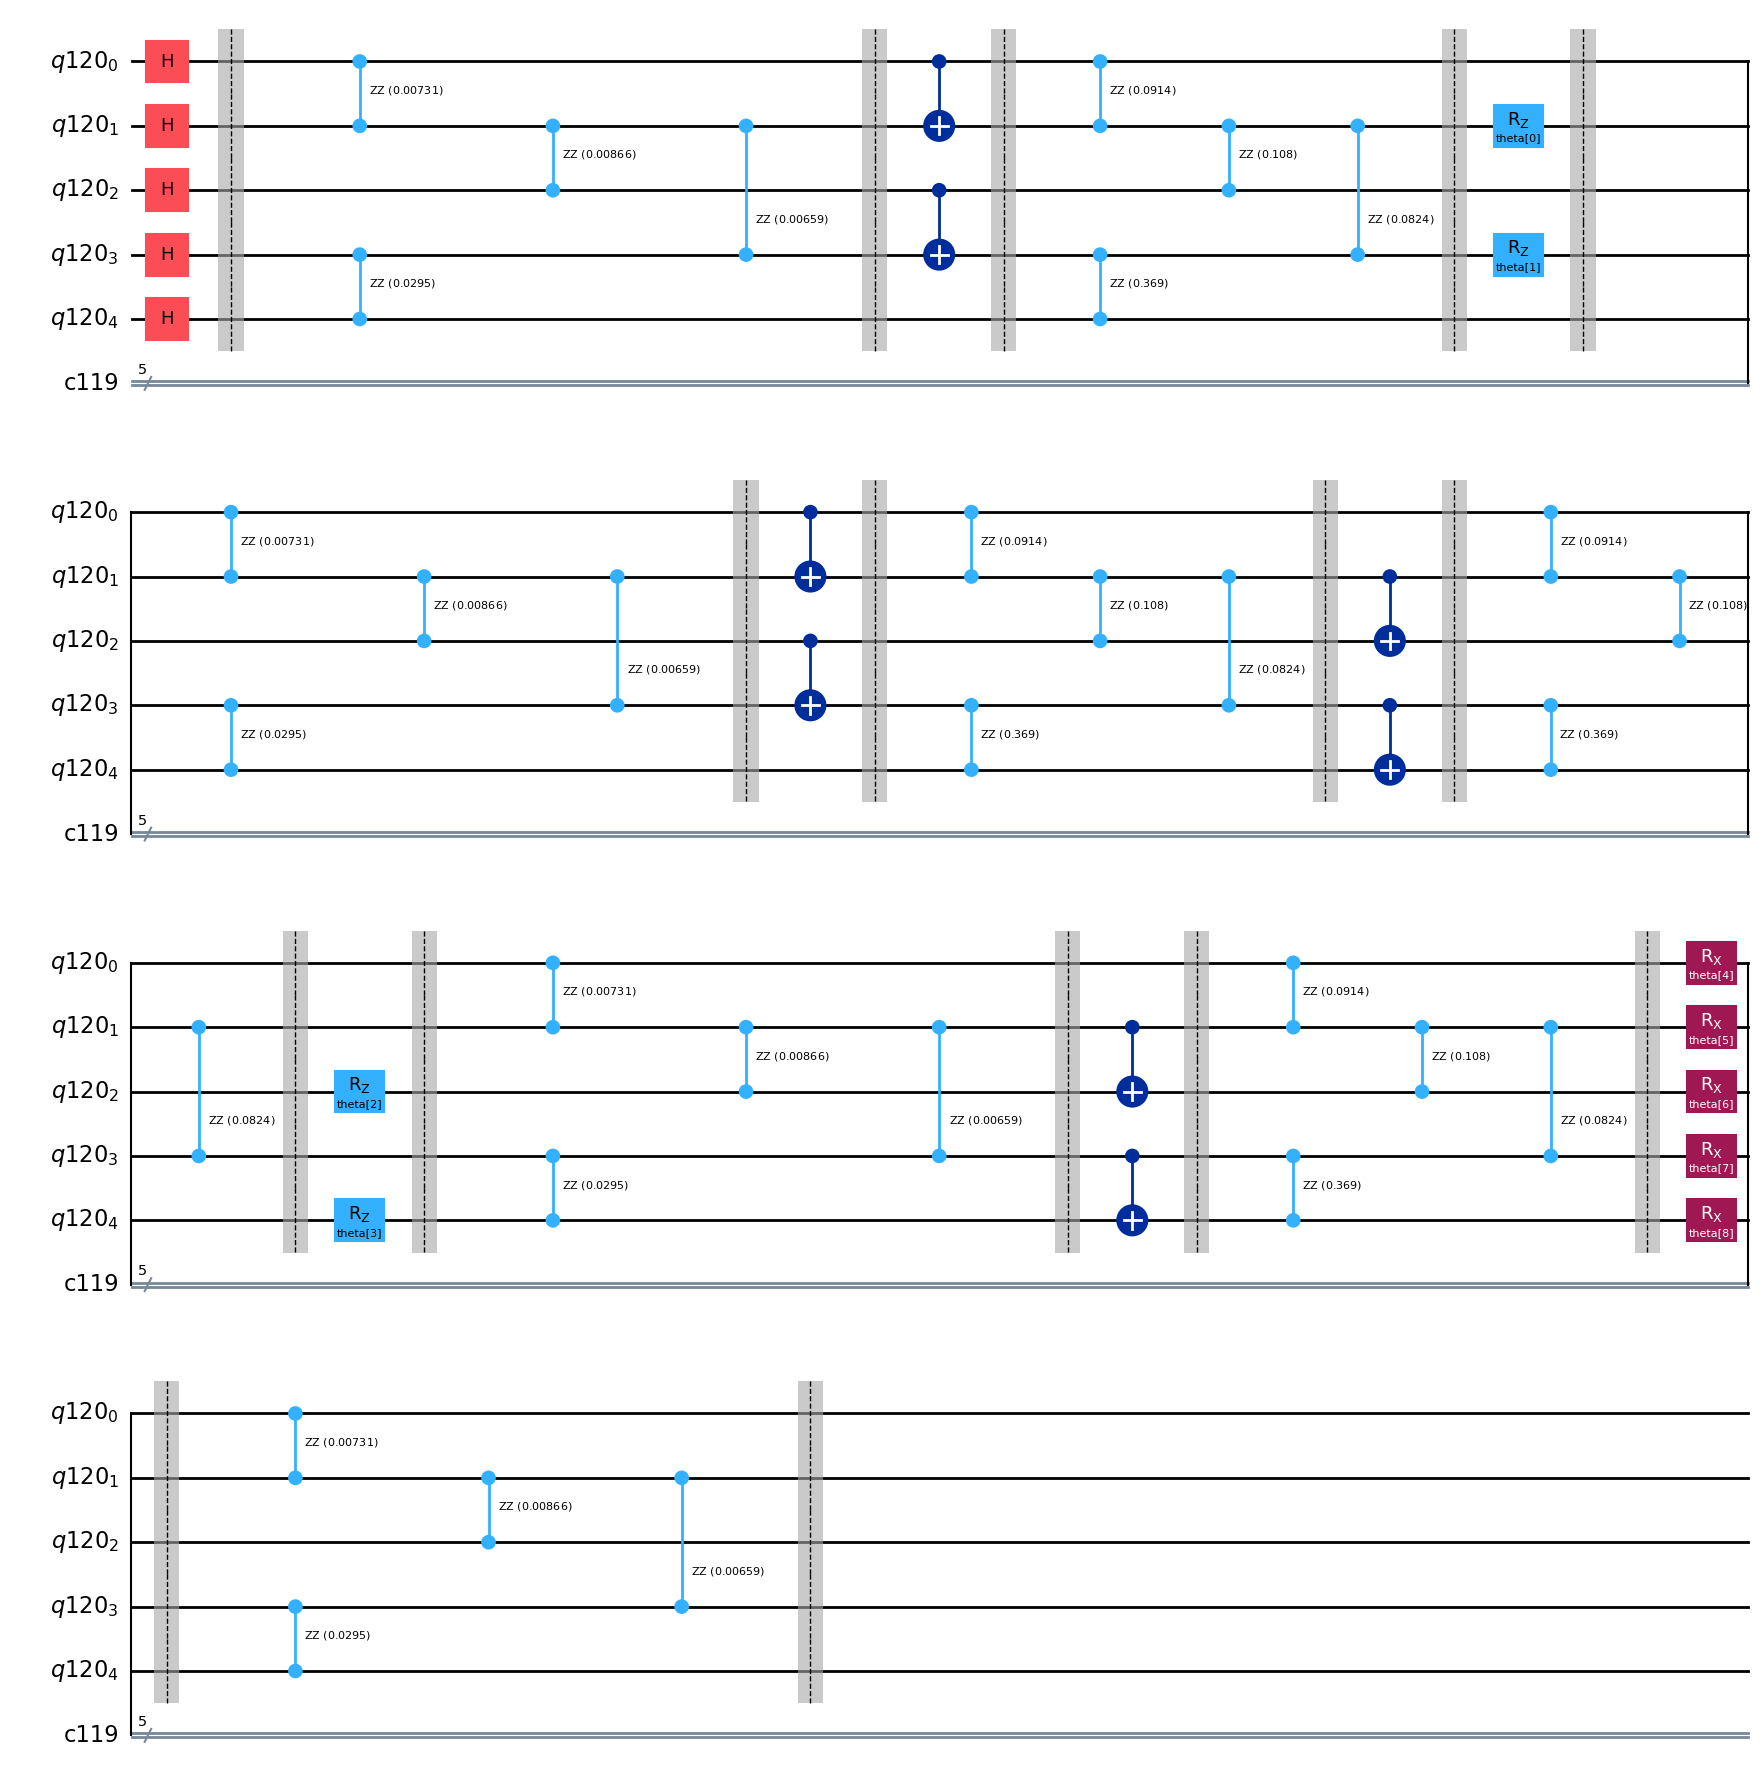

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

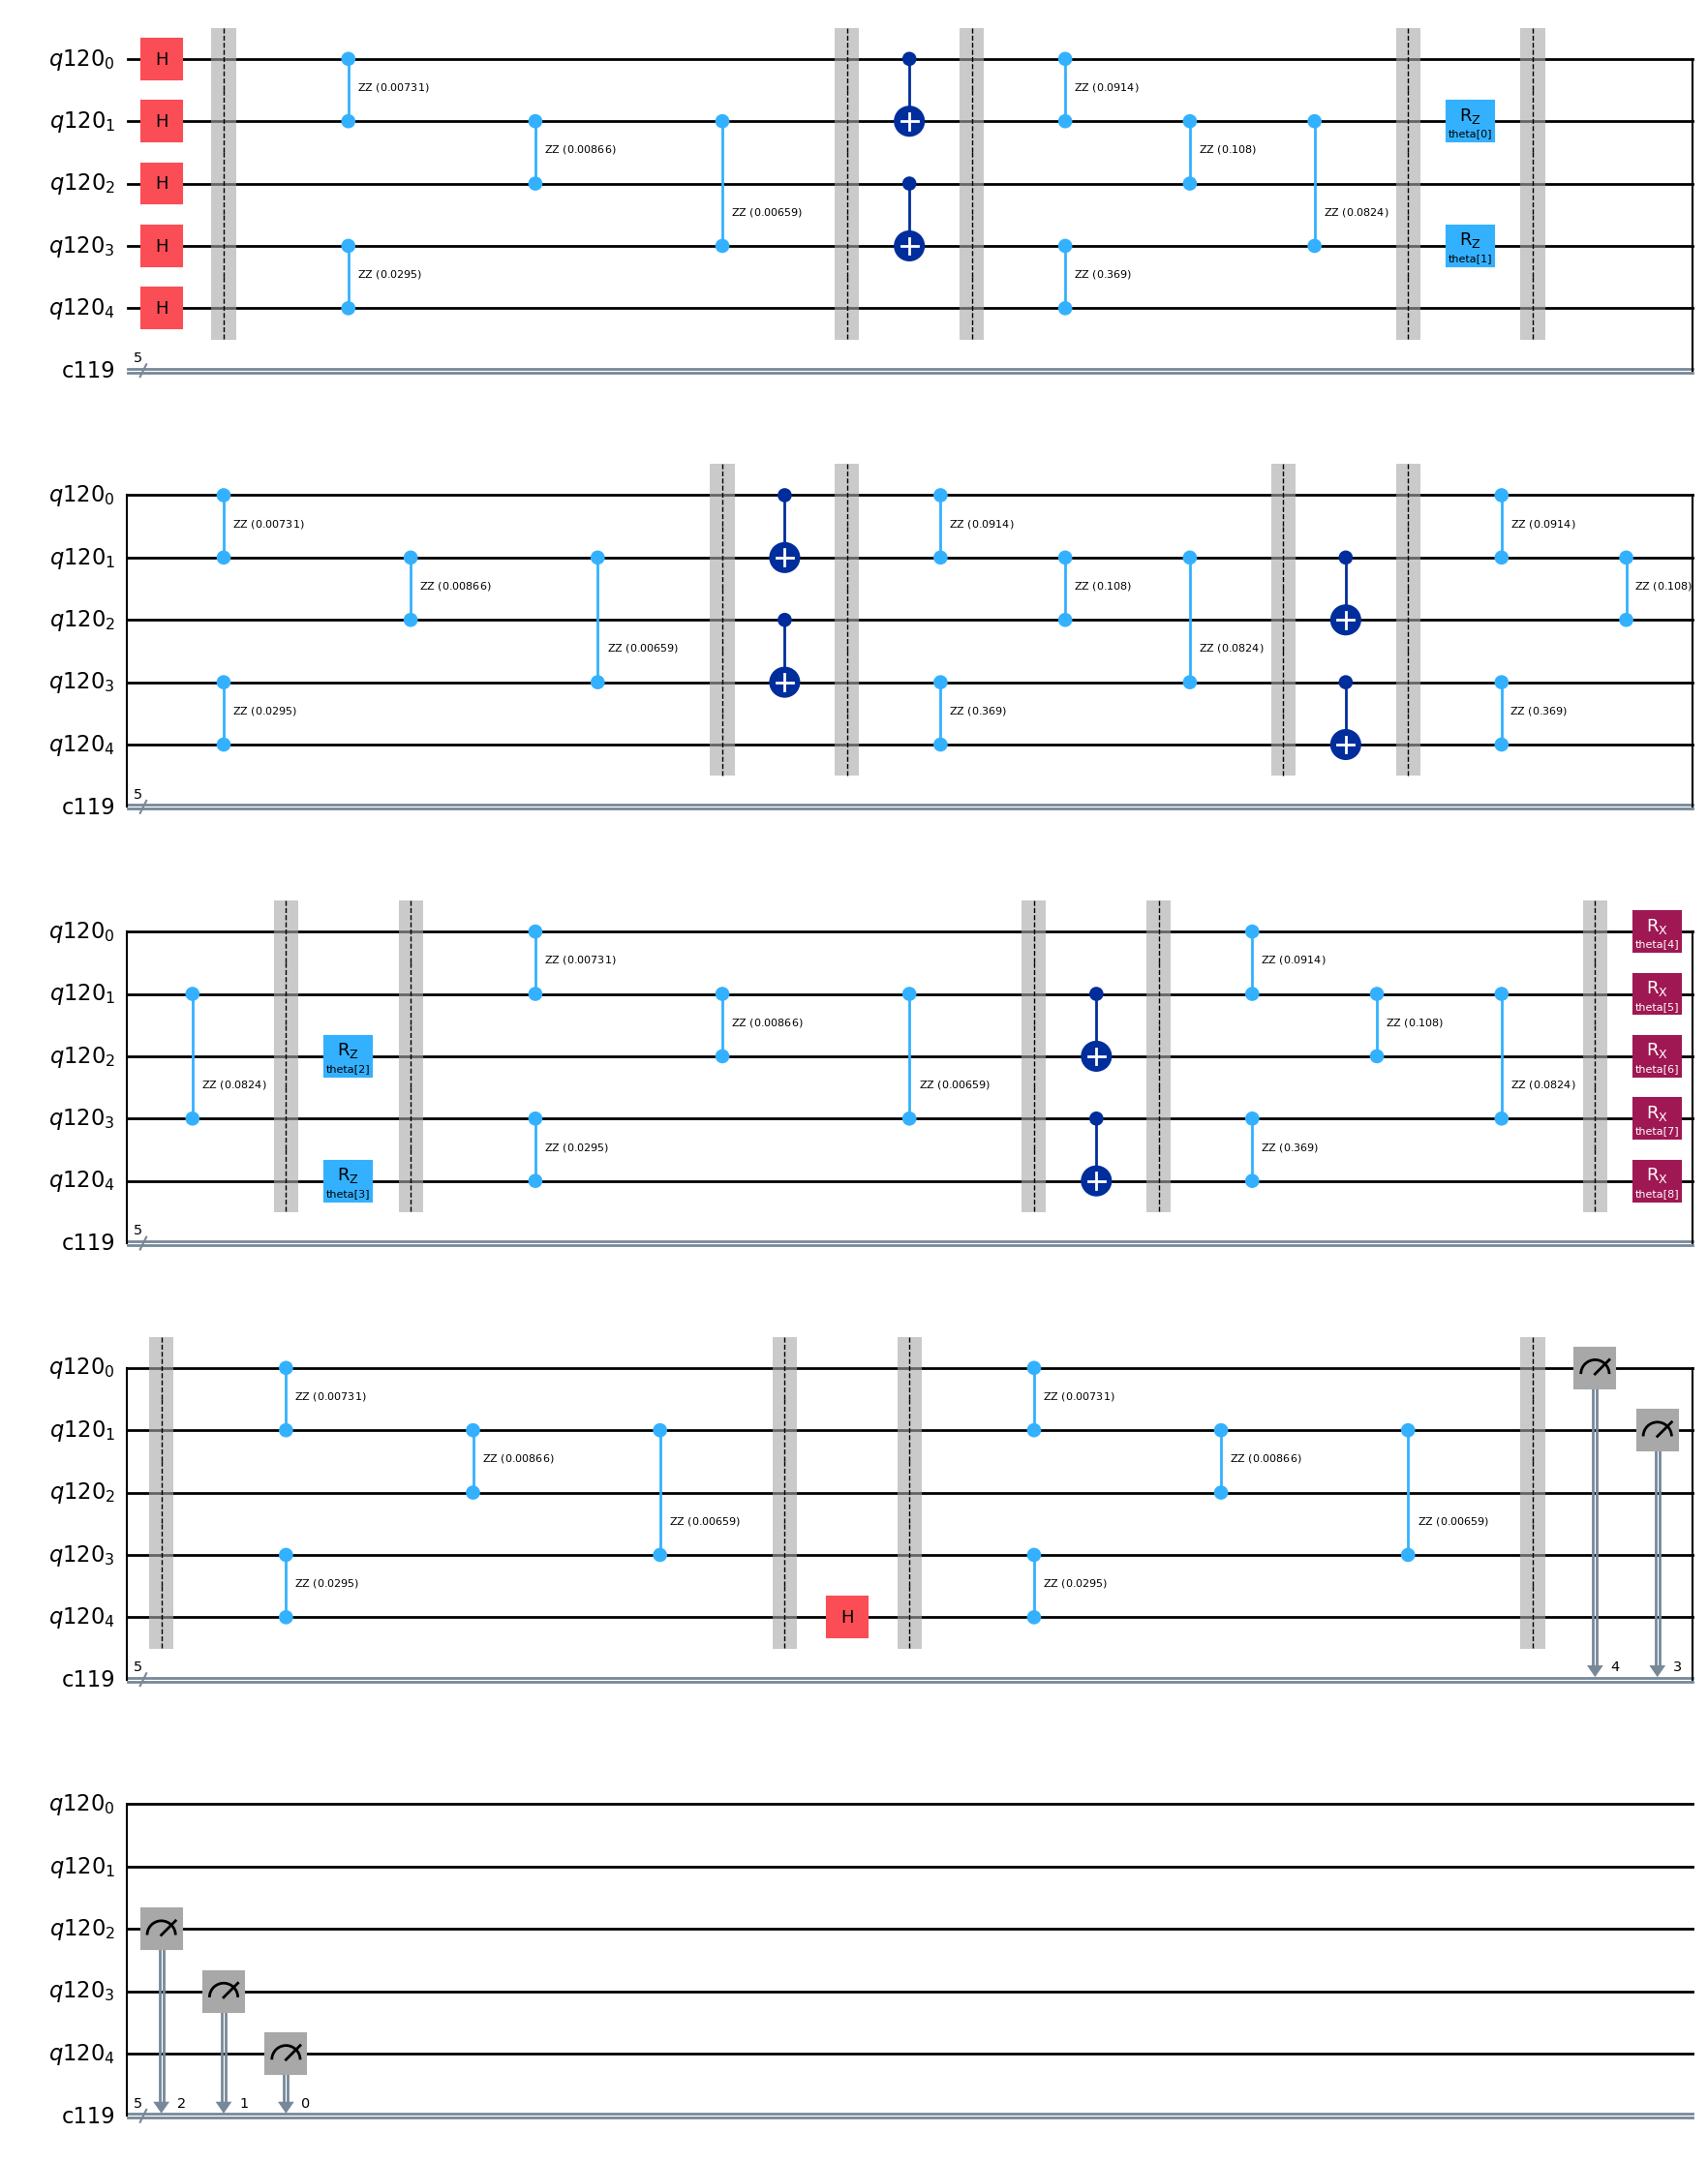

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = ansatzo

ansatz_x4.h(4)
ansatz_x4.barrier()

ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

### Cost Function for VQE & VQNHE

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))


# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:5]
  c = parameter[5]

  FC1 = FC1.reshape(1,5)


  a1 = np.matmul(FC1, x)
  y = output_activate(c, a1)

  return y[0]

In [ ]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=10000, seed=1).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [ ]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval


def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [ ]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)
    callback_dict["cost_history"].append(current_cost)

  return callback

### VQE

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=6), pqc))
    if cost_func_vqnhe(np.zeros(shape=6), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=6), pqc)
      optimized_pqc = pqc

-5.2970000000000015
-5.266400000000001
-3.2542000000000004
-3.257199999999999
-5.4574
-5.408799999999999
-5.424599999999999
-5.377400000000001
-5.431800000000001
-3.260999999999999
-5.2742
-5.4804
-5.4152000000000005
-5.4281999999999995
-5.398600000000002
-5.464199999999999
-3.2750000000000004
-2.7452000000000005
-2.8894000000000006
-5.2426


In [ ]:
lowest_energy_vqe

-5.4804

### VQNHE FC Hidden Layer 1개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:30]
  c = parameter[30]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  y = output_activate(c, a2)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=31), pqc))
    if cost_func_vqnhe(np.zeros(shape=31), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=31), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(31) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618
Optimization terminated successfully.
         Current function value: -6.252538
         Iterations: 174
         Function evaluations: 7296
         Gradient evaluations: 228


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.231528
         Iterations: 108
         Function evaluations: 5833
         Gradient evaluations: 182


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.236337
         Iterations: 100
         Function evaluations: 6028
         Gradient evaluations: 188


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.238784
         Iterations: 127
         Function evaluations: 7435
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -6.270087
         Iterations: 253
         Function evaluations: 9920
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.252356
         Iterations: 300
         Function evaluations: 10592
         Gradient evaluations: 331


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.216318
         Iterations: 158
         Function evaluations: 7621
         Gradient evaluations: 238


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.246098
         Iterations: 300
         Function evaluations: 12384
         Gradient evaluations: 387


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.251052
         Iterations: 181
         Function evaluations: 11115
         Gradient evaluations: 347


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.257059
         Iterations: 126
         Function evaluations: 7436
         Gradient evaluations: 232


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.226971
         Iterations: 233
         Function evaluations: 11017
         Gradient evaluations: 344


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.201221
         Iterations: 194
         Function evaluations: 9088
         Gradient evaluations: 284


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.236996
         Iterations: 154
         Function evaluations: 10120
         Gradient evaluations: 316


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.216359
         Iterations: 136
         Function evaluations: 8650
         Gradient evaluations: 270
Optimization terminated successfully.
         Current function value: -6.251810
         Iterations: 105
         Function evaluations: 3776
         Gradient evaluations: 118


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.210119
         Iterations: 300
         Function evaluations: 11328
         Gradient evaluations: 354


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.214507
         Iterations: 192
         Function evaluations: 11531
         Gradient evaluations: 360


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.248056
         Iterations: 167
         Function evaluations: 8746
         Gradient evaluations: 273
Optimization terminated successfully.
         Current function value: -6.225140
         Iterations: 182
         Function evaluations: 7552
         Gradient evaluations: 236
         Current function value: -6.244879
         Iterations: 119
         Function evaluations: 8876
         Gradient evaluations: 277


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-6.270086944450637

### VQNHE FC Hidden Layer 2개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:50]
  FC3 = parameter[50:55]
  c = parameter[55]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(5,5)
  FC3 = FC3.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=56), pqc))
    if cost_func_vqnhe(np.zeros(shape=56), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=56), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(56) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.255702
         Iterations: 215
         Function evaluations: 20076
         Gradient evaluations: 352


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.253653
         Iterations: 300
         Function evaluations: 21147
         Gradient evaluations: 371


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.193708
         Iterations: 97
         Function evaluations: 10614
         Gradient evaluations: 186


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.263244
         Iterations: 300
         Function evaluations: 21831
         Gradient evaluations: 383


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.232341
         Iterations: 42
         Function evaluations: 5826
         Gradient evaluations: 102


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.260627
         Iterations: 100
         Function evaluations: 9473
         Gradient evaluations: 166


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.239670
         Iterations: 128
         Function evaluations: 11811
         Gradient evaluations: 207


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.250648
         Iterations: 300
         Function evaluations: 20520
         Gradient evaluations: 360
         Current function value: -6.261677
         Iterations: 300
         Function evaluations: 19893
         Gradient evaluations: 349


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.262250
         Iterations: 282
         Function evaluations: 22184
         Gradient evaluations: 389


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.226985
         Iterations: 242
         Function evaluations: 17442
         Gradient evaluations: 306


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.023924
         Iterations: 61
         Function evaluations: 7868
         Gradient evaluations: 138


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.267638
         Iterations: 229
         Function evaluations: 17391
         Gradient evaluations: 305


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.180884
         Iterations: 136
         Function evaluations: 11526
         Gradient evaluations: 202


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.245434
         Iterations: 203
         Function evaluations: 13452
         Gradient evaluations: 236


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.227074
         Iterations: 168
         Function evaluations: 15966
         Gradient evaluations: 280


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.230392
         Iterations: 150
         Function evaluations: 10944
         Gradient evaluations: 192


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.245313
         Iterations: 300
         Function evaluations: 23313
         Gradient evaluations: 409
Optimization terminated successfully.
         Current function value: -6.034495
         Iterations: 68
         Function evaluations: 7467
         Gradient evaluations: 131
         Current function value: -6.229633
         Iterations: 300
         Function evaluations: 23142
         Gradient evaluations: 406


In [ ]:
lowest_energy_vqnhe

-6.267638048354183

### VQNHE CNN ver 1

In [ ]:
def cnn2(vec, x):
  a = vec[0]
  b = vec[1]

  lst = []
  lst.append(b*x[0])
  lst.append(a*x[0]+b*x[1])
  lst.append(a*x[1]+b*x[2])
  lst.append(a*x[2]+b*x[3])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn4(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]

  lst = []
  lst.append(d*x[0])
  lst.append(c*x[0]+d*x[1])
  lst.append(b*x[0]+c*x[1]+d*x[2])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn2(parameter[0:2], x), cnn2(parameter[2:4], x), cnn3(parameter[4:7], x), cnn3(parameter[7:10], x), cnn4(parameter[10:14], x), cnn4(parameter[14:18], x)])
  z1 = relu(a1)

  FC1 = parameter[18:48]
  FC2 = parameter[48:53]
  c = parameter[53]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=54), pqc))
    if cost_func_vqnhe(np.zeros(shape=54), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=54), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(54) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618
Optimization terminated successfully.
         Current function value: -5.968903
         Iterations: 57
         Function evaluations: 3465
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: -5.947187
         Iterations: 41
         Function evaluations: 2640
         Gradient evaluations: 48


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950838
         Iterations: 51
         Function evaluations: 6223
         Gradient evaluations: 113


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.941690
         Iterations: 111
         Function evaluations: 11232
         Gradient evaluations: 204
Optimization terminated successfully.
         Current function value: -5.951306
         Iterations: 51
         Function evaluations: 5005
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: -5.944477
         Iterations: 24
         Function evaluations: 1485
         Gradient evaluations: 27


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.952331
         Iterations: 80
         Function evaluations: 8755
         Gradient evaluations: 159


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.951711
         Iterations: 74
         Function evaluations: 9417
         Gradient evaluations: 171
Optimization terminated successfully.
         Current function value: -5.861800
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.947256
         Iterations: 43
         Function evaluations: 7322
         Gradient evaluations: 133
Optimization terminated successfully.
         Current function value: -5.975756
         Iterations: 50
         Function evaluations: 2970
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: -5.886697
         Iterations: 15
         Function evaluations: 1265
         Gradient evaluations: 23


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950791
         Iterations: 116
         Function evaluations: 14965
         Gradient evaluations: 272
Optimization terminated successfully.
         Current function value: -5.883760
         Iterations: 12
         Function evaluations: 825
         Gradient evaluations: 15


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.935832
         Iterations: 32
         Function evaluations: 7492
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.956753
         Iterations: 55
         Function evaluations: 3190
         Gradient evaluations: 58


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.931362
         Iterations: 72
         Function evaluations: 10071
         Gradient evaluations: 183


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972598
         Iterations: 154
         Function evaluations: 14474
         Gradient evaluations: 263


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950387
         Iterations: 66
         Function evaluations: 11282
         Gradient evaluations: 205
Optimization terminated successfully.
         Current function value: -5.883927
         Iterations: 28
         Function evaluations: 1650
         Gradient evaluations: 30


In [ ]:
lowest_energy_vqnhe

-5.975756046764024

### VQNHE CNN ver 2

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn5(parameter[6:11], x), cnn5(parameter[11:16], x)])
  z1 = relu(a1)

  FC1 = parameter[16:36]
  FC2 = parameter[36:41]
  c = parameter[41]

  FC1 = FC1.reshape(5,4)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=42), pqc))
    if cost_func_vqnhe(np.zeros(shape=42), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=42), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(42) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.2970000000000015
-5.266400000000001
-3.2542000000000004
-3.257199999999999
-5.4574
-5.408799999999999
-5.424599999999999
-5.377400000000001
-5.431800000000001
-3.260999999999999
-5.2742
-5.4804
-5.4152000000000005
-5.4281999999999995
-5.398600000000002
-5.464199999999999
-3.2750000000000004
-2.7452000000000005
-2.8894000000000006
-5.2426
Optimization terminated successfully.
         Current function value: -5.869943
         Iterations: 66
         Function evaluations: 6235
         Gradient evaluations: 145


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.837140
         Iterations: 277
         Function evaluations: 17759
         Gradient evaluations: 413


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.834184
         Iterations: 129
         Function evaluations: 10843
         Gradient evaluations: 252


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.707256
         Iterations: 50
         Function evaluations: 12345
         Gradient evaluations: 287


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.628644
         Iterations: 22
         Function evaluations: 4355
         Gradient evaluations: 101


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.867964
         Iterations: 51
         Function evaluations: 5086
         Gradient evaluations: 118


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.782510
         Iterations: 35
         Function evaluations: 5468
         Gradient evaluations: 127


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.934106
         Iterations: 68
         Function evaluations: 9295
         Gradient evaluations: 216


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.825198
         Iterations: 134
         Function evaluations: 10799
         Gradient evaluations: 251
Optimization terminated successfully.
         Current function value: -5.914541
         Iterations: 147
         Function evaluations: 8557
         Gradient evaluations: 199
Optimization terminated successfully.
         Current function value: -5.871166
         Iterations: 77
         Function evaluations: 4171
         Gradient evaluations: 97
Optimization terminated successfully.
         Current function value: -5.480400
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.859359
         Iterations: 47
         Function evaluations: 4225
         Gradient evaluations: 98


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.744955
         Iterations: 120
         Function evaluations: 9123
         Gradient evaluations: 212
Optimization terminated successfully.
         Current function value: -5.825887
         Iterations: 40
         Function evaluations: 2021
         Gradient evaluations: 47


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.728284
         Iterations: 60
         Function evaluations: 5558
         Gradient evaluations: 129
Optimization terminated successfully.
         Current function value: -5.480400
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.854068
         Iterations: 70
         Function evaluations: 6930
         Gradient evaluations: 161
Optimization terminated successfully.
         Current function value: -5.491209
         Iterations: 8
         Function evaluations: 645
         Gradient evaluations: 15
         Current function value: -5.507291
         Iterations: 2
         Function evaluations: 3108
         Gradient evaluations: 72


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.934106454564098

### VQNHE CNN ver 3

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  FC1 = parameter[22:52]
  FC2 = parameter[52:57]
  c = parameter[57]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=58), pqc))
    if cost_func_vqnhe(np.zeros(shape=58), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=58), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(58) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.2970000000000015
-5.266400000000001
-3.2542000000000004
-3.257199999999999
-5.4574
-5.408799999999999
-5.424599999999999
-5.377400000000001
-5.431800000000001
-3.260999999999999
-5.2742
-5.4804
-5.4152000000000005
-5.4281999999999995
-5.398600000000002
-5.464199999999999
-3.2750000000000004
-2.7452000000000005
-2.8894000000000006
-5.2426


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.756797
         Iterations: 49
         Function evaluations: 6380
         Gradient evaluations: 108


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.480462
         Iterations: 3
         Function evaluations: 3133
         Gradient evaluations: 53


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.806937
         Iterations: 39
         Function evaluations: 6265
         Gradient evaluations: 106


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.484285
         Iterations: 5
         Function evaluations: 6026
         Gradient evaluations: 102


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.833637
         Iterations: 196
         Function evaluations: 20839
         Gradient evaluations: 353


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.944106
         Iterations: 55
         Function evaluations: 9152
         Gradient evaluations: 155
Optimization terminated successfully.
         Current function value: -5.491209
         Iterations: 14
         Function evaluations: 1062
         Gradient evaluations: 18


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.833442
         Iterations: 124
         Function evaluations: 11812
         Gradient evaluations: 200
Optimization terminated successfully.
         Current function value: -5.812203
         Iterations: 108
         Function evaluations: 8555
         Gradient evaluations: 145


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.756644
         Iterations: 132
         Function evaluations: 16296
         Gradient evaluations: 276


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.807199
         Iterations: 43
         Function evaluations: 7210
         Gradient evaluations: 122
Optimization terminated successfully.
         Current function value: -5.768100
         Iterations: 71
         Function evaluations: 6785
         Gradient evaluations: 115


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.965935
         Iterations: 173
         Function evaluations: 17117
         Gradient evaluations: 290
Optimization terminated successfully.
         Current function value: -5.805920
         Iterations: 32
         Function evaluations: 3481
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: -5.846654
         Iterations: 73
         Function evaluations: 5900
         Gradient evaluations: 100


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.786710
         Iterations: 67
         Function evaluations: 7268
         Gradient evaluations: 123
Optimization terminated successfully.
         Current function value: -5.623040
         Iterations: 18
         Function evaluations: 1416
         Gradient evaluations: 24


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.817987
         Iterations: 35
         Function evaluations: 6856
         Gradient evaluations: 116


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.797774
         Iterations: 45
         Function evaluations: 7800
         Gradient evaluations: 132
         Current function value: -5.911265
         Iterations: 64
         Function evaluations: 8563
         Gradient evaluations: 145


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.965935451949487

### VQNHE CNN ver 4

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  lst = np.array(lst)

  return lst


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])

  lst = np.array(lst)

  return lst


def new_cnn(params, x): # x : [6, 5], params : 36 elements (6 * (5 + 1))
  res = np.zeros(6)
  for i in range(6):
    res[i] = np.dot(params[6*i : 6*i+5], x[i]) + params[6*i+5]
  return res


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  a2 = new_cnn(parameter[22:58], z1)
  z2 = relu(a2)

  FC1 = parameter[58:88]
  FC2 = parameter[88:93]
  c = parameter[93]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a3 = np.matmul(FC1, z2)
  z3 = relu(a3)

  a4 = np.matmul(FC2, z3)
  y = output_activate(c, a4)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=94), pqc))
    if cost_func_vqnhe(np.zeros(shape=94), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=94), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(94) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 1000
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

In [ ]:
lowest_energy_vqnhe

## ZZ Crosstalk, Shots = 10000

CUSCO 3 4 5 15 22

J = 3MHz

1. Optimize Parameters in PQC

2. Fix Parameters in PQC and Connect Neural Net Layer, Optimize Parameters in Neural Net

### Ansatz, Hamiltonian, Sampler & Estimator Setting

CUSCO 3 4 5 15 22

J = 3MHz

In [ ]:
# Qubit Number 3,4,5,15,22

J = 0.003                                                   # Unit : GHz
freq = [5.232, 5.138, 4.988, 5.015, 5.282]                  # Unit : GHz
anharm = [-0.30373, -0.3054, -0.30755, -0.30699, -0.303]    # Unit : GHz

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.circuit.library import RZZGate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# ZZ Crosstalk Frequency

H1 = np.array([[freq[0], J], [J, freq[1]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_34 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[1], J], [J, freq[2]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_45 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[2], J], [J, freq[3]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_415 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[3], J], [J, freq[4]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_1522 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2

[5.23209565 5.13790435]
[10.16018425 10.37013082  9.97055493]
0.00013082397420927094
[5.13805998 4.98794002]
[ 9.9704843  10.12615504  9.66841066]
0.00015504130522803194
[4.98767068 5.01532932]
[ 9.66839615 10.00311805  9.7229458 ]
0.00011804555643379899
[5.0149663 5.2820337]
[ 9.72297864 10.29752416 10.2605072 ]
0.0005241553589732106


In [ ]:
crosstalk_freq_34, crosstalk_freq_45, crosstalk_freq_415, crosstalk_freq_1522

(6.541198710463547e-05,
 7.752065261401597e-05,
 5.9022778216899496e-05,
 0.0002620776794866053)

In [ ]:
gate_01 = 460
gate_12 = 460
gate_23 = 460
gate_34 = 460

gate_single = 40

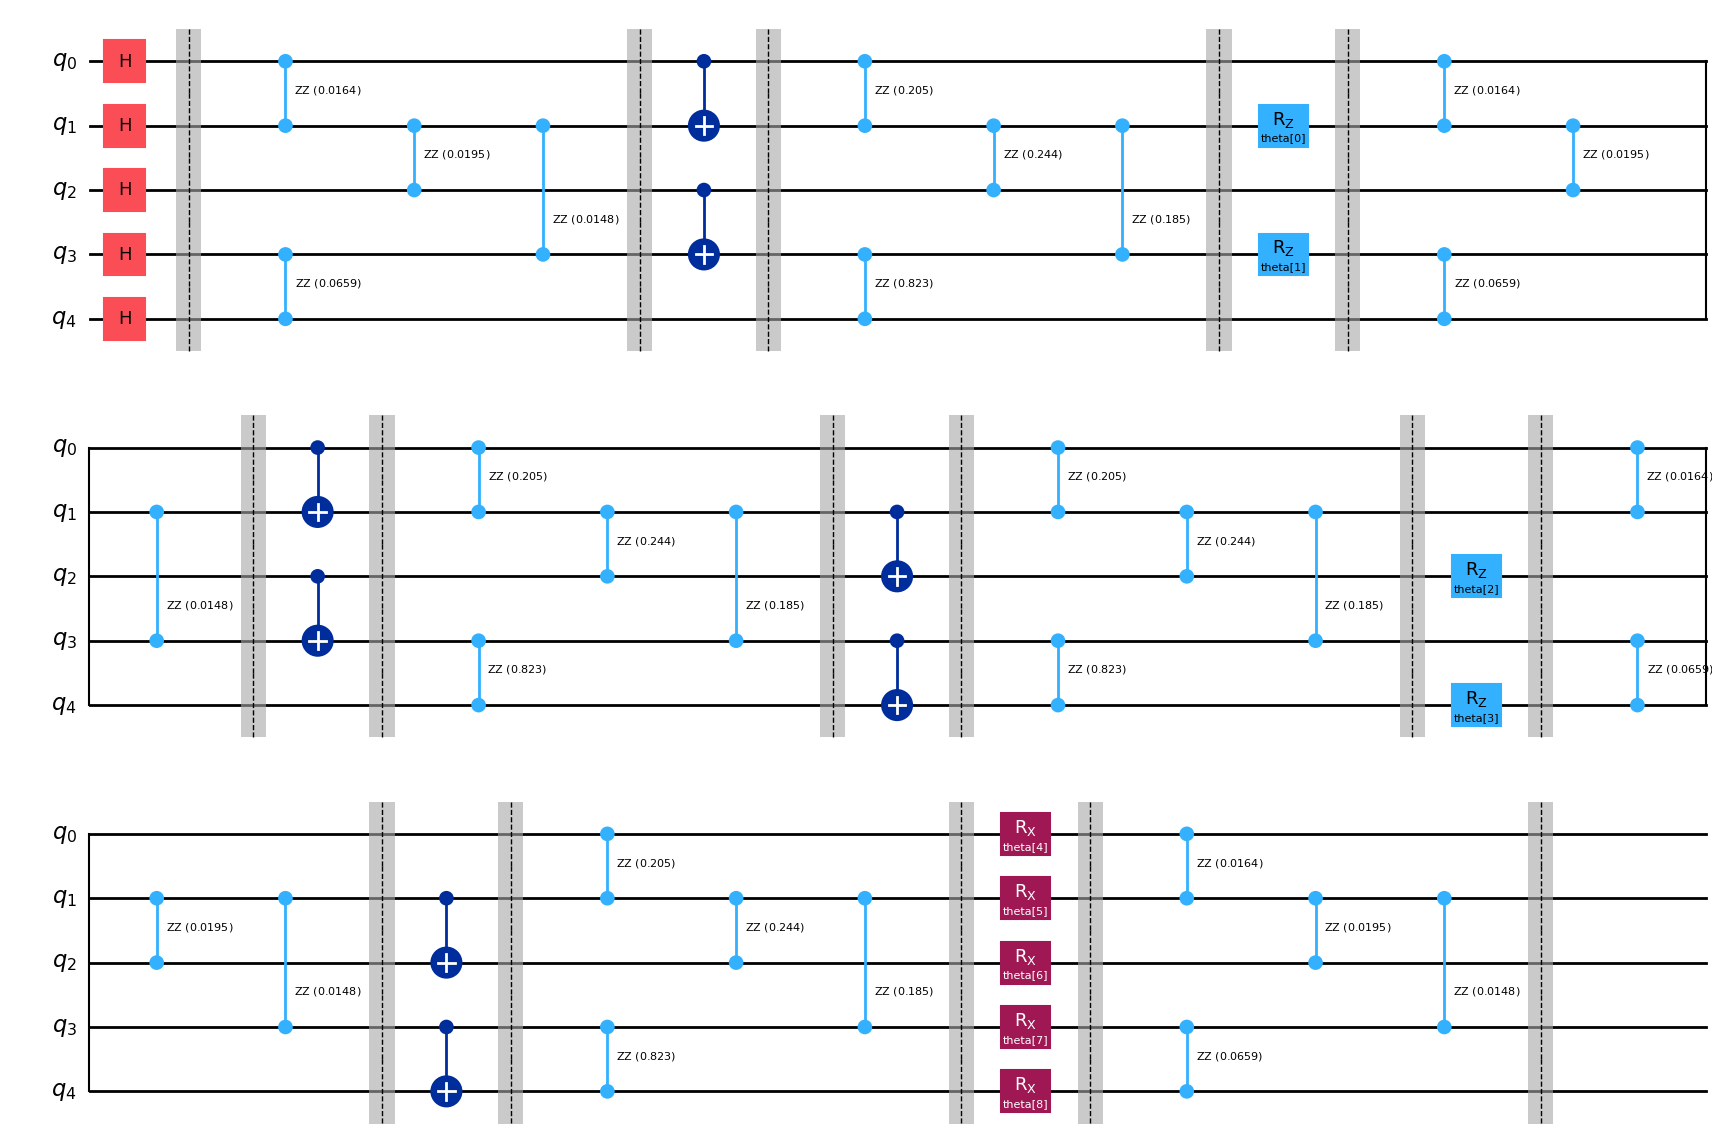

In [ ]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)

ansatz.h(range(0,5))
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatz.barrier()


ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatz.barrier()


ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatz.barrier()


ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz.barrier()


ansatz.draw("mpl")

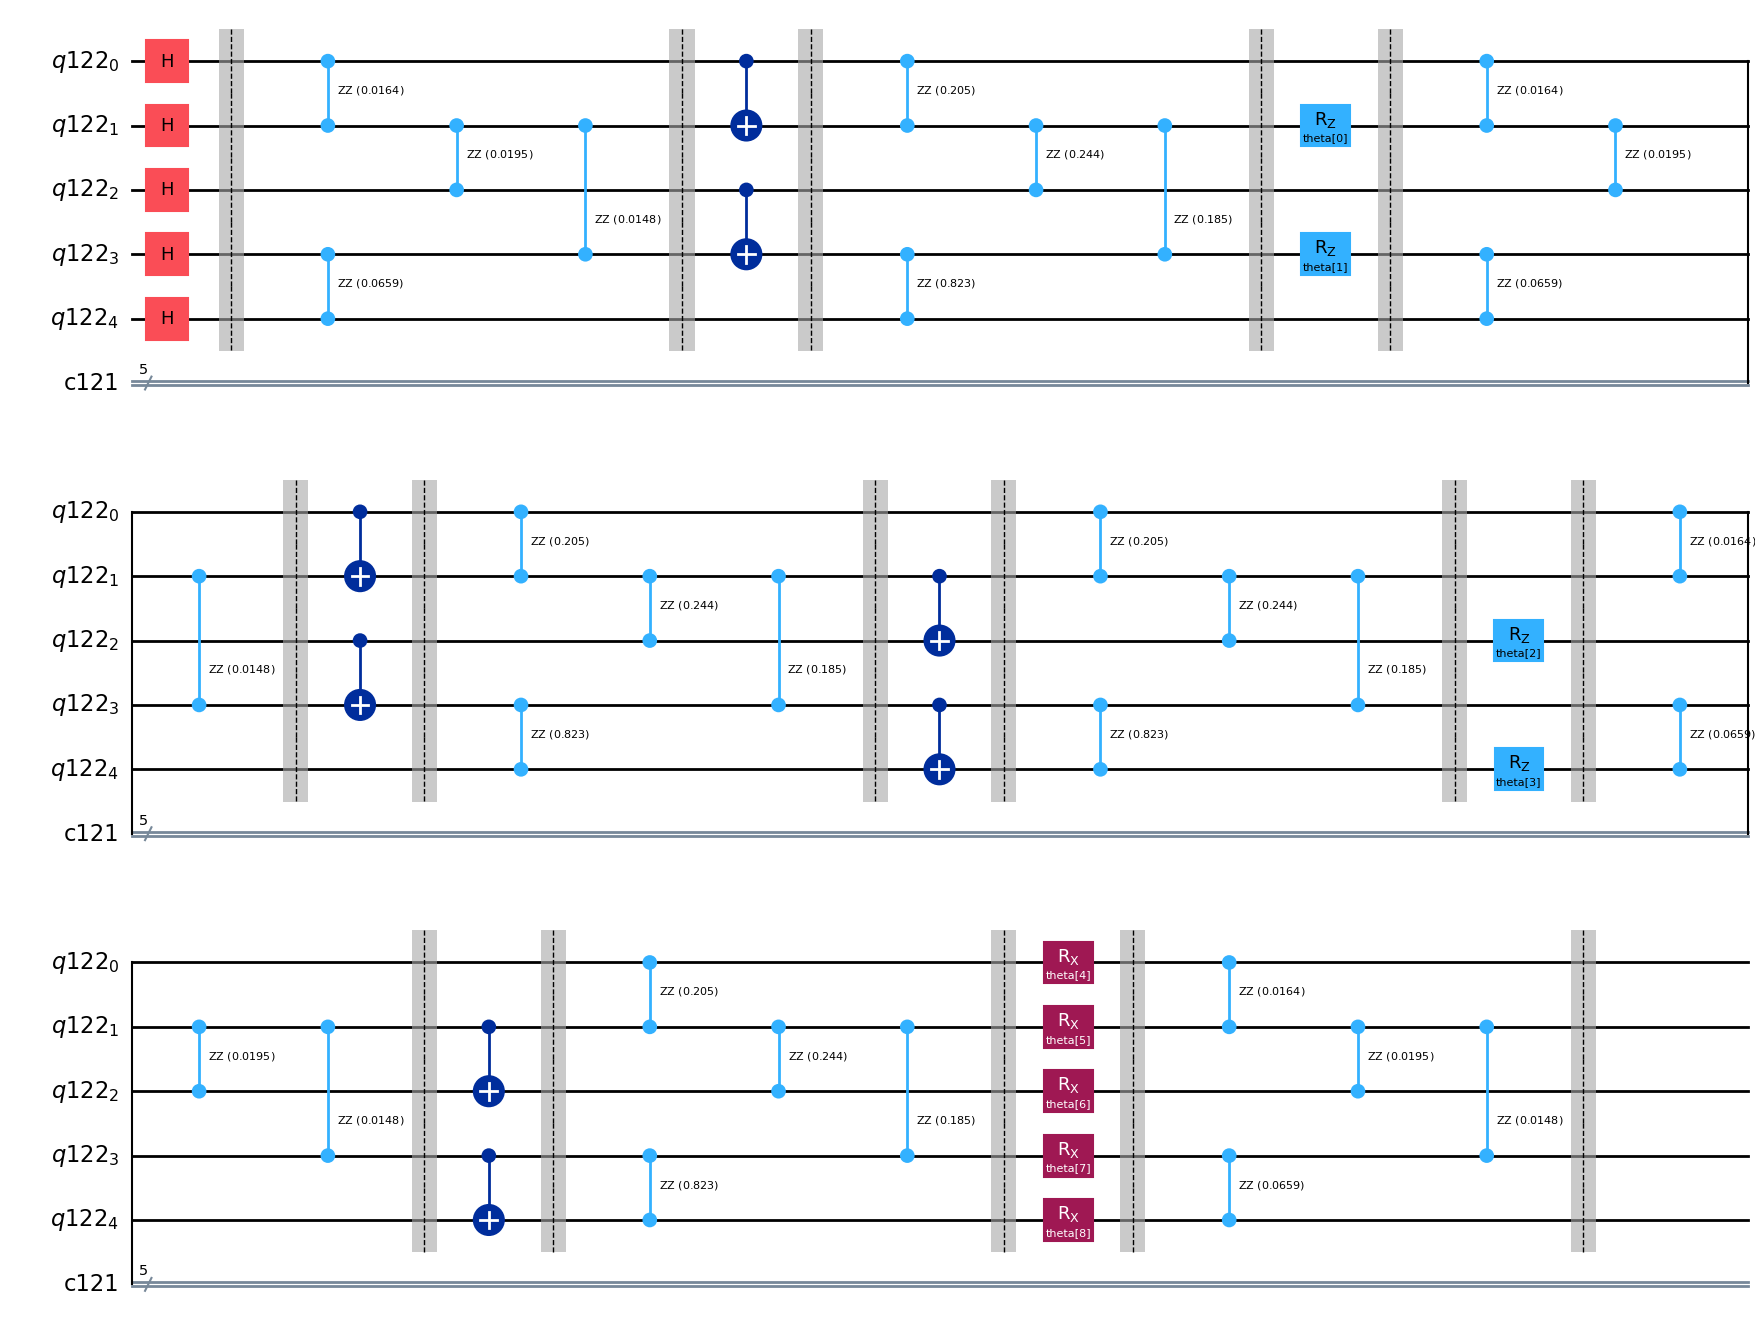

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

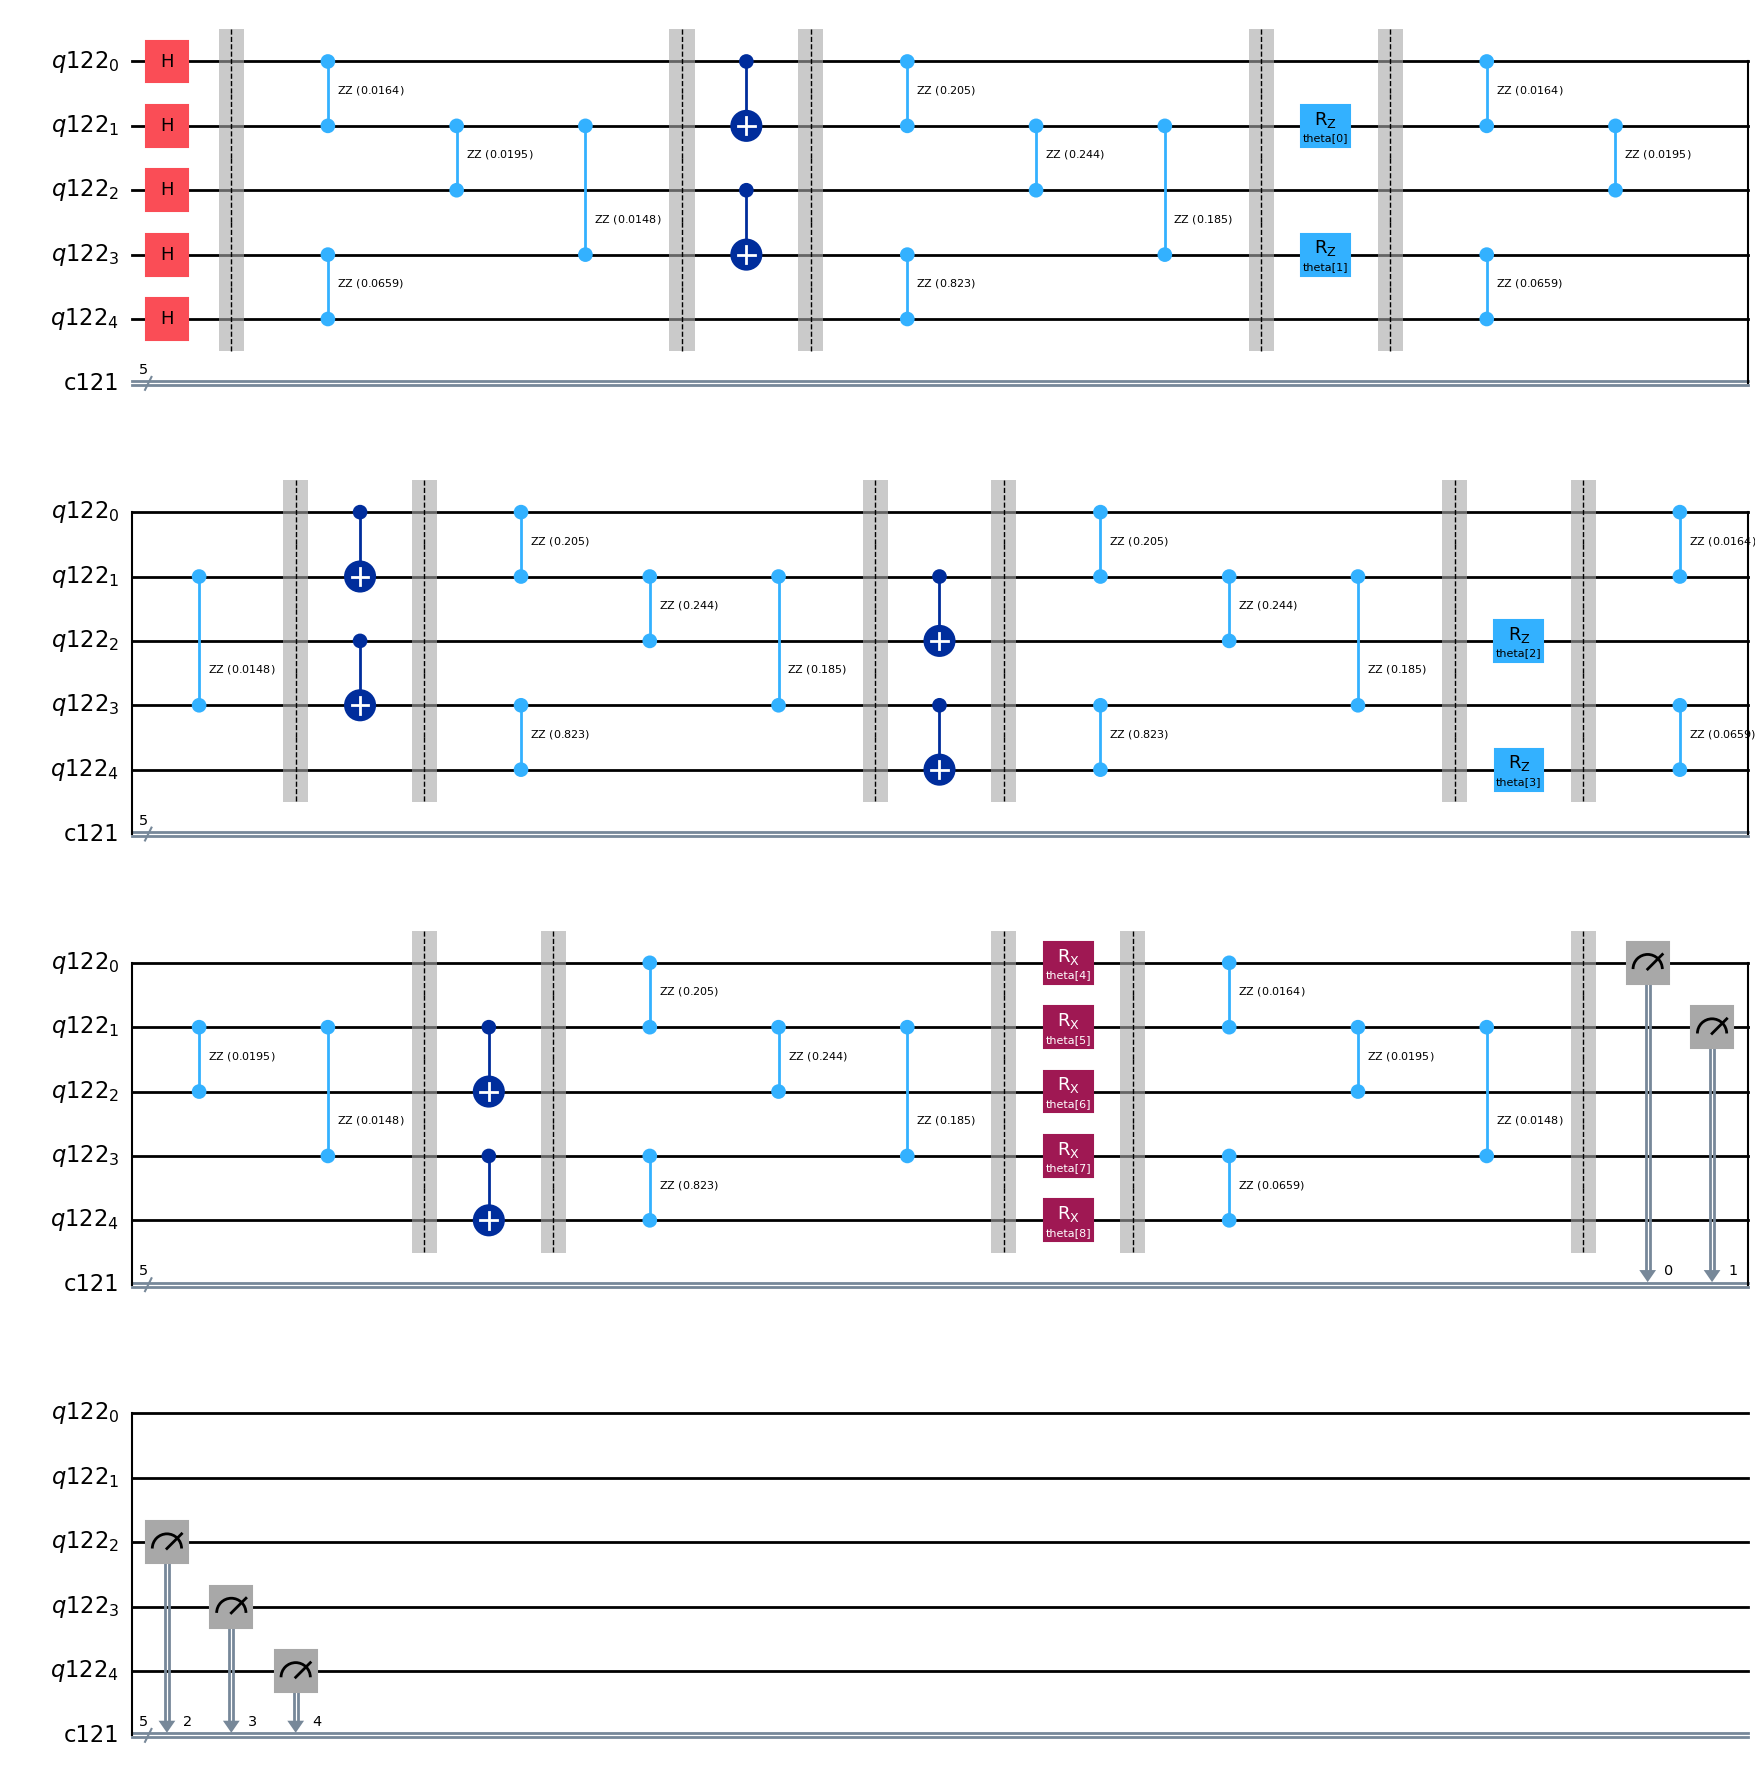

In [ ]:
# Ansatz for VQNHE ZZ Measurement

ansatz_zz = ansatzo

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

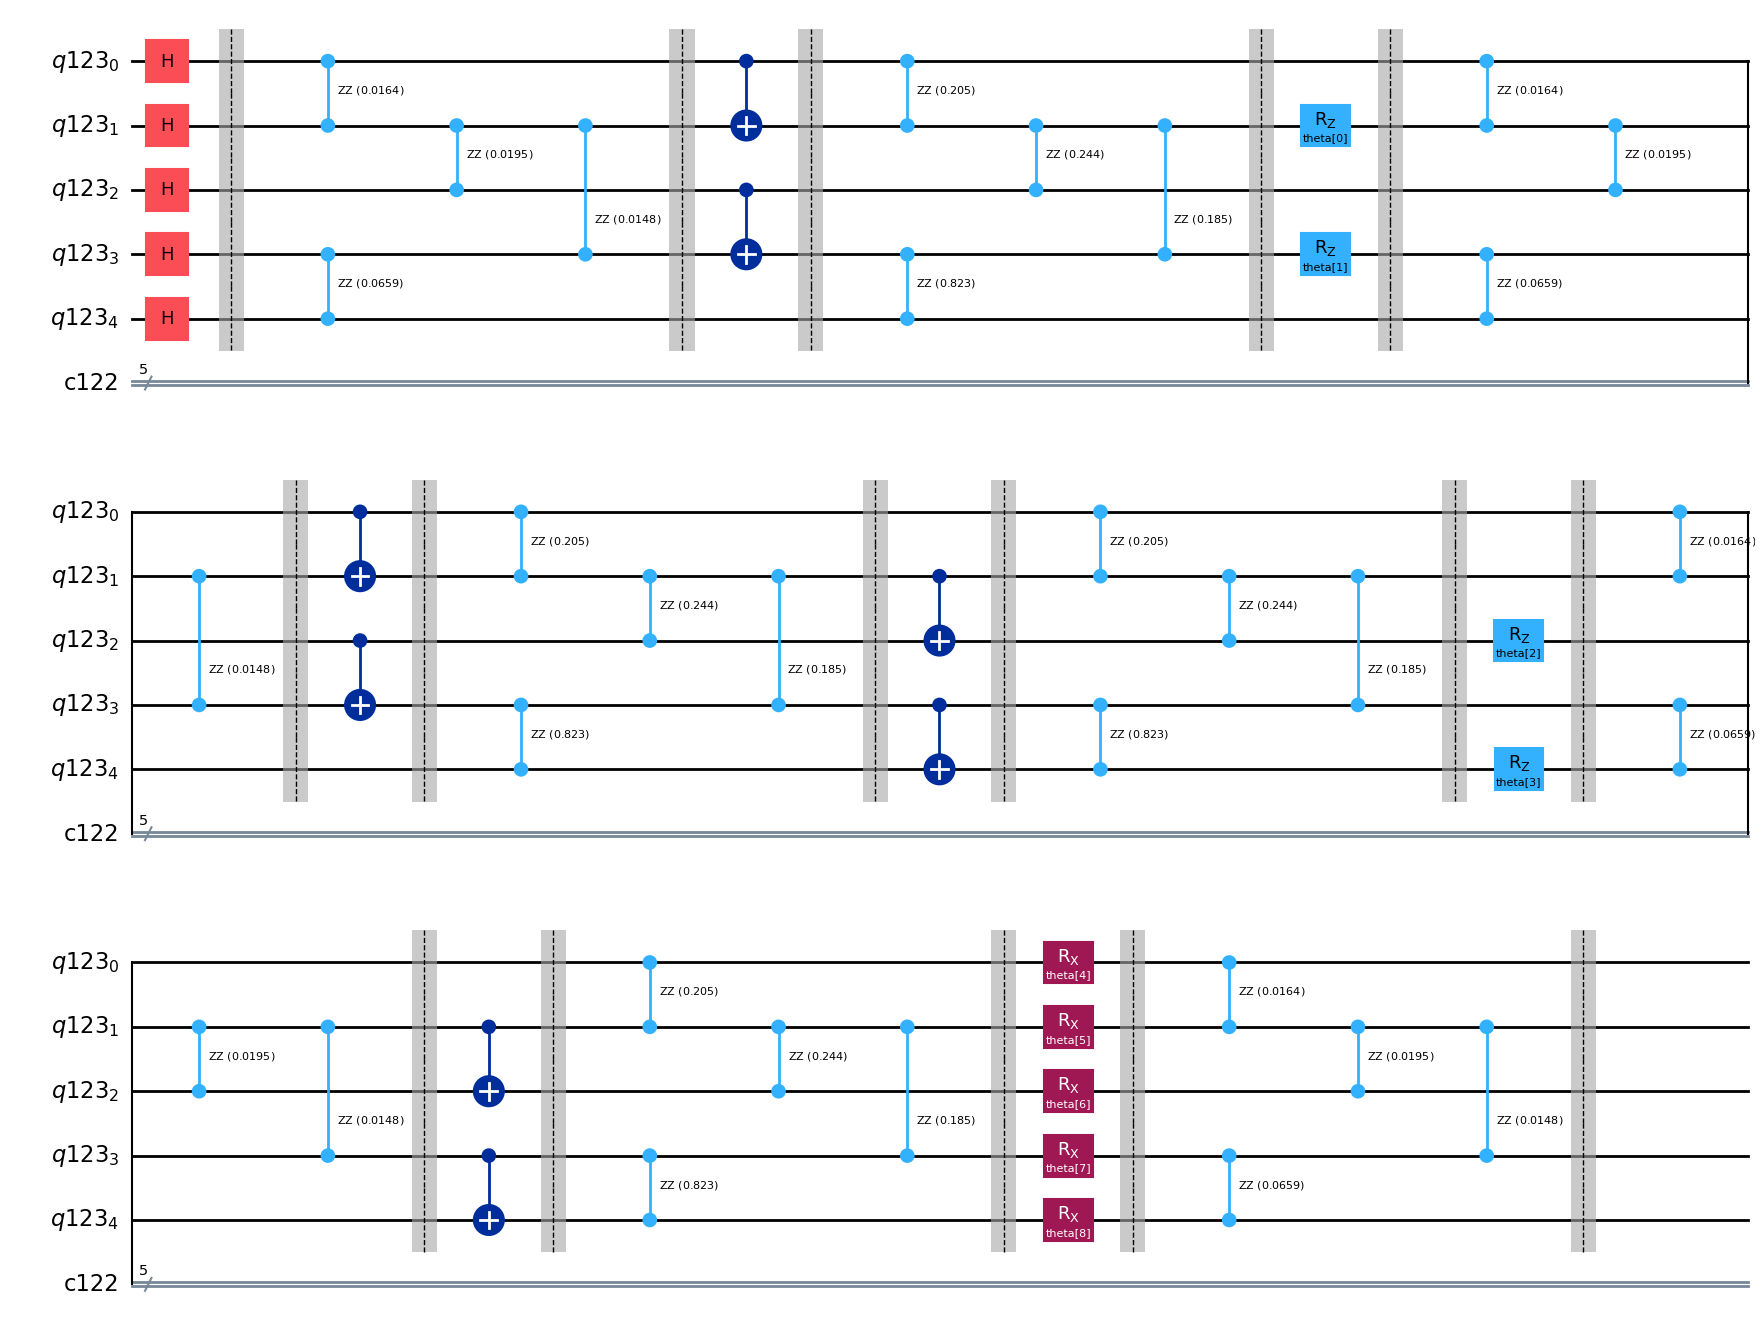

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

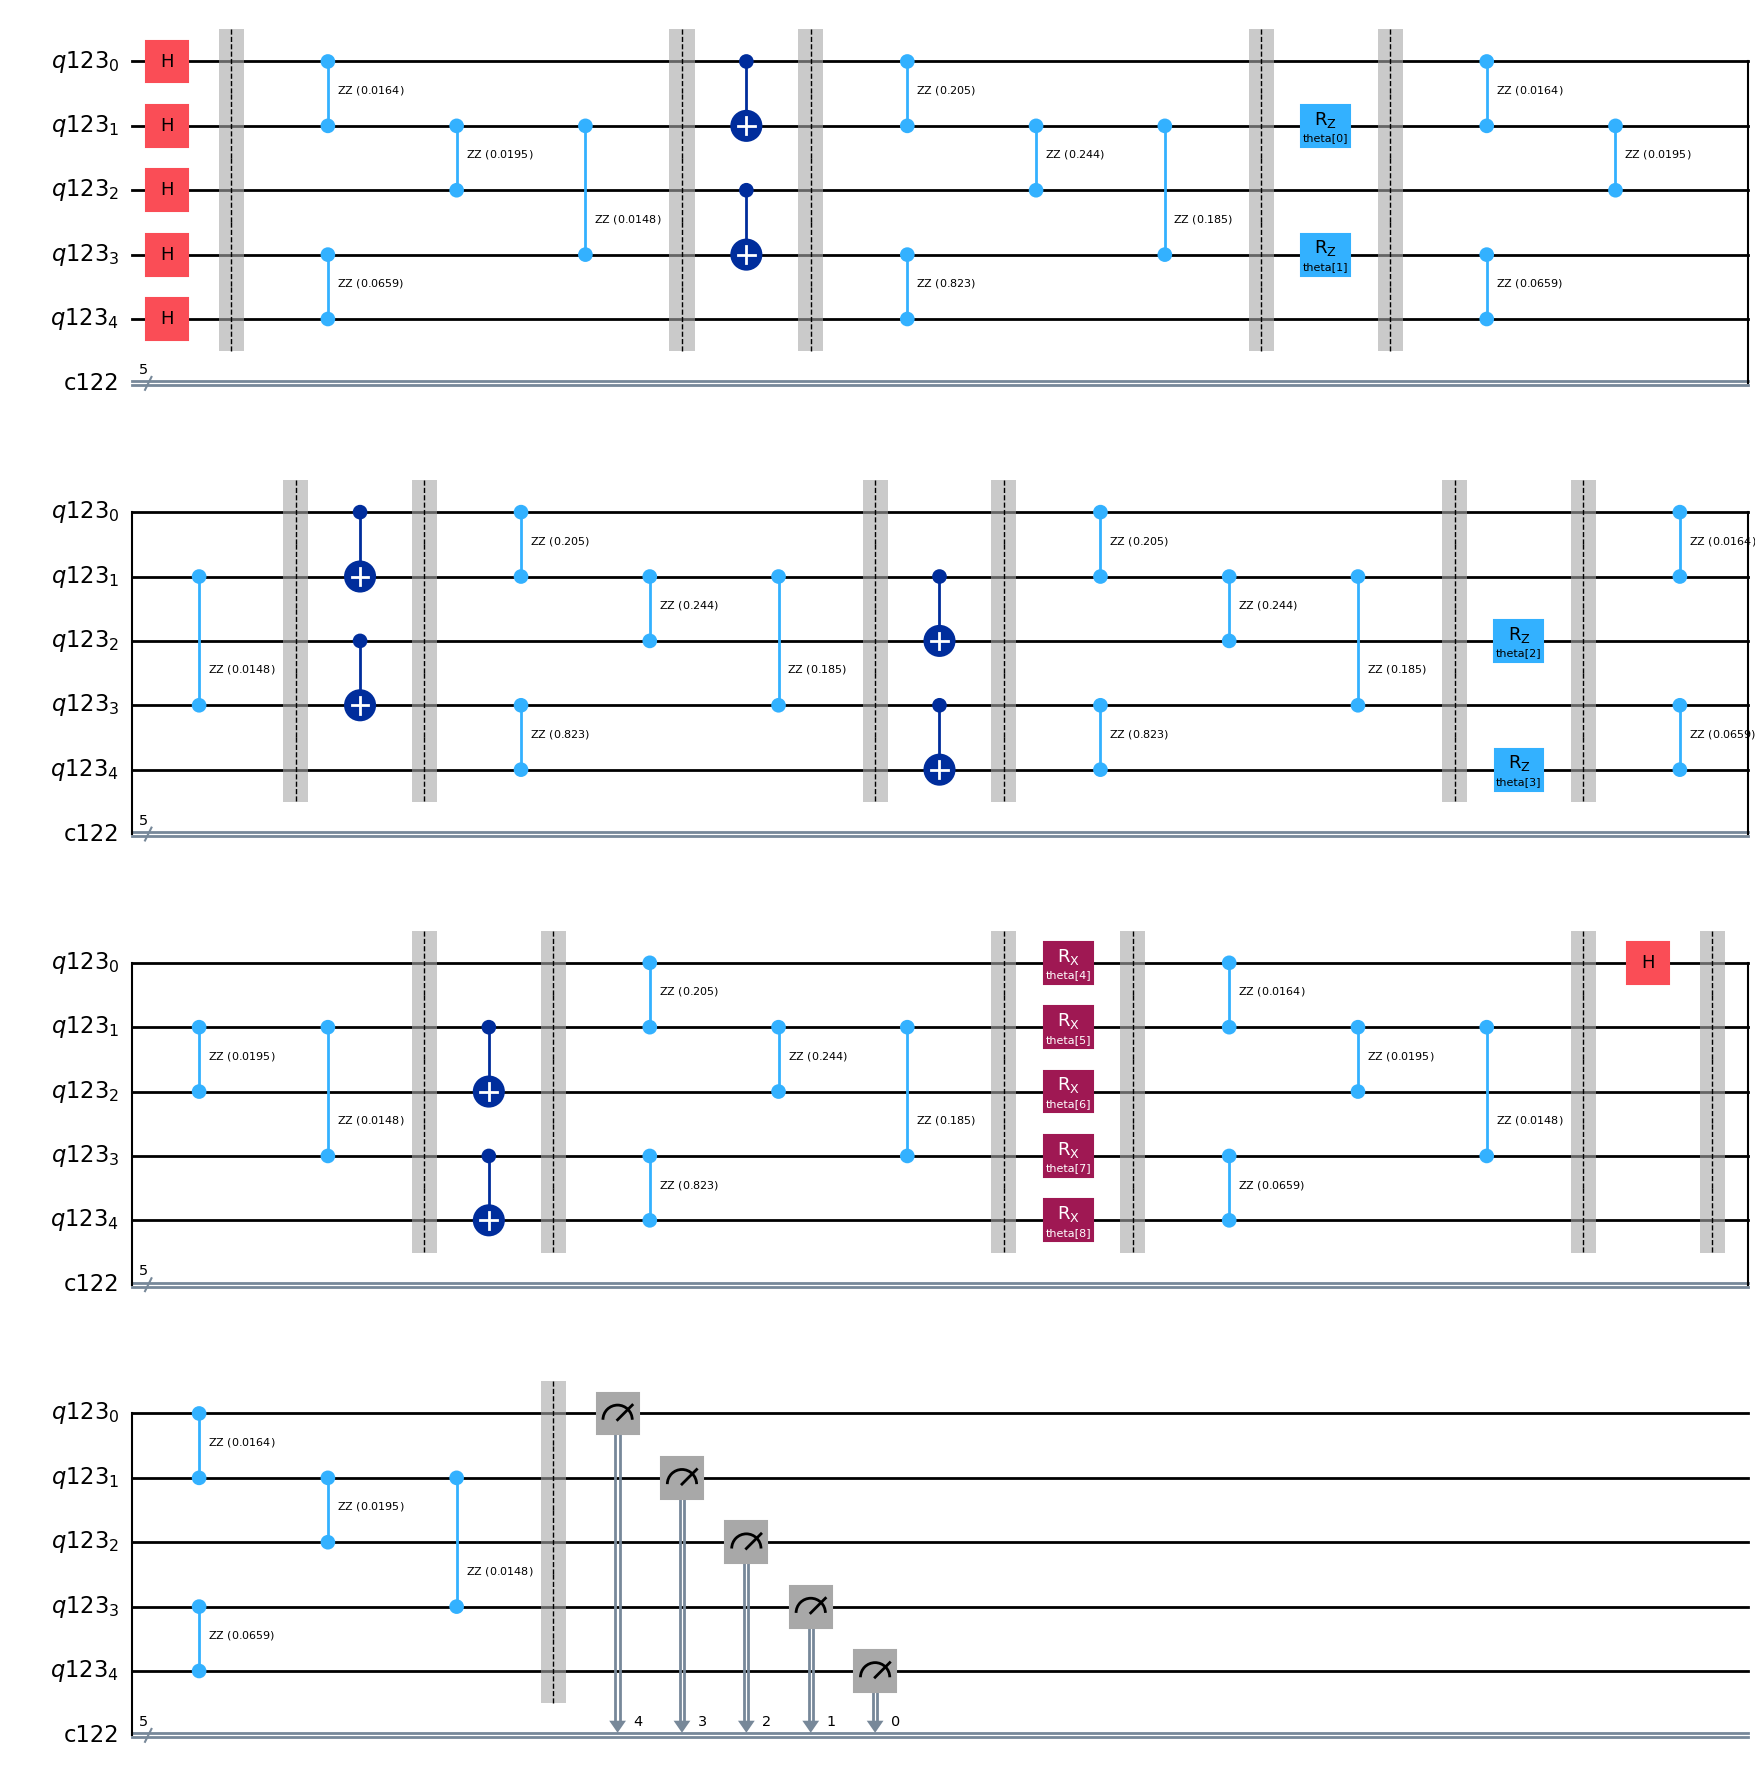

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = ansatzo

ansatz_x0.h(0)
ansatz_x0.barrier()

ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

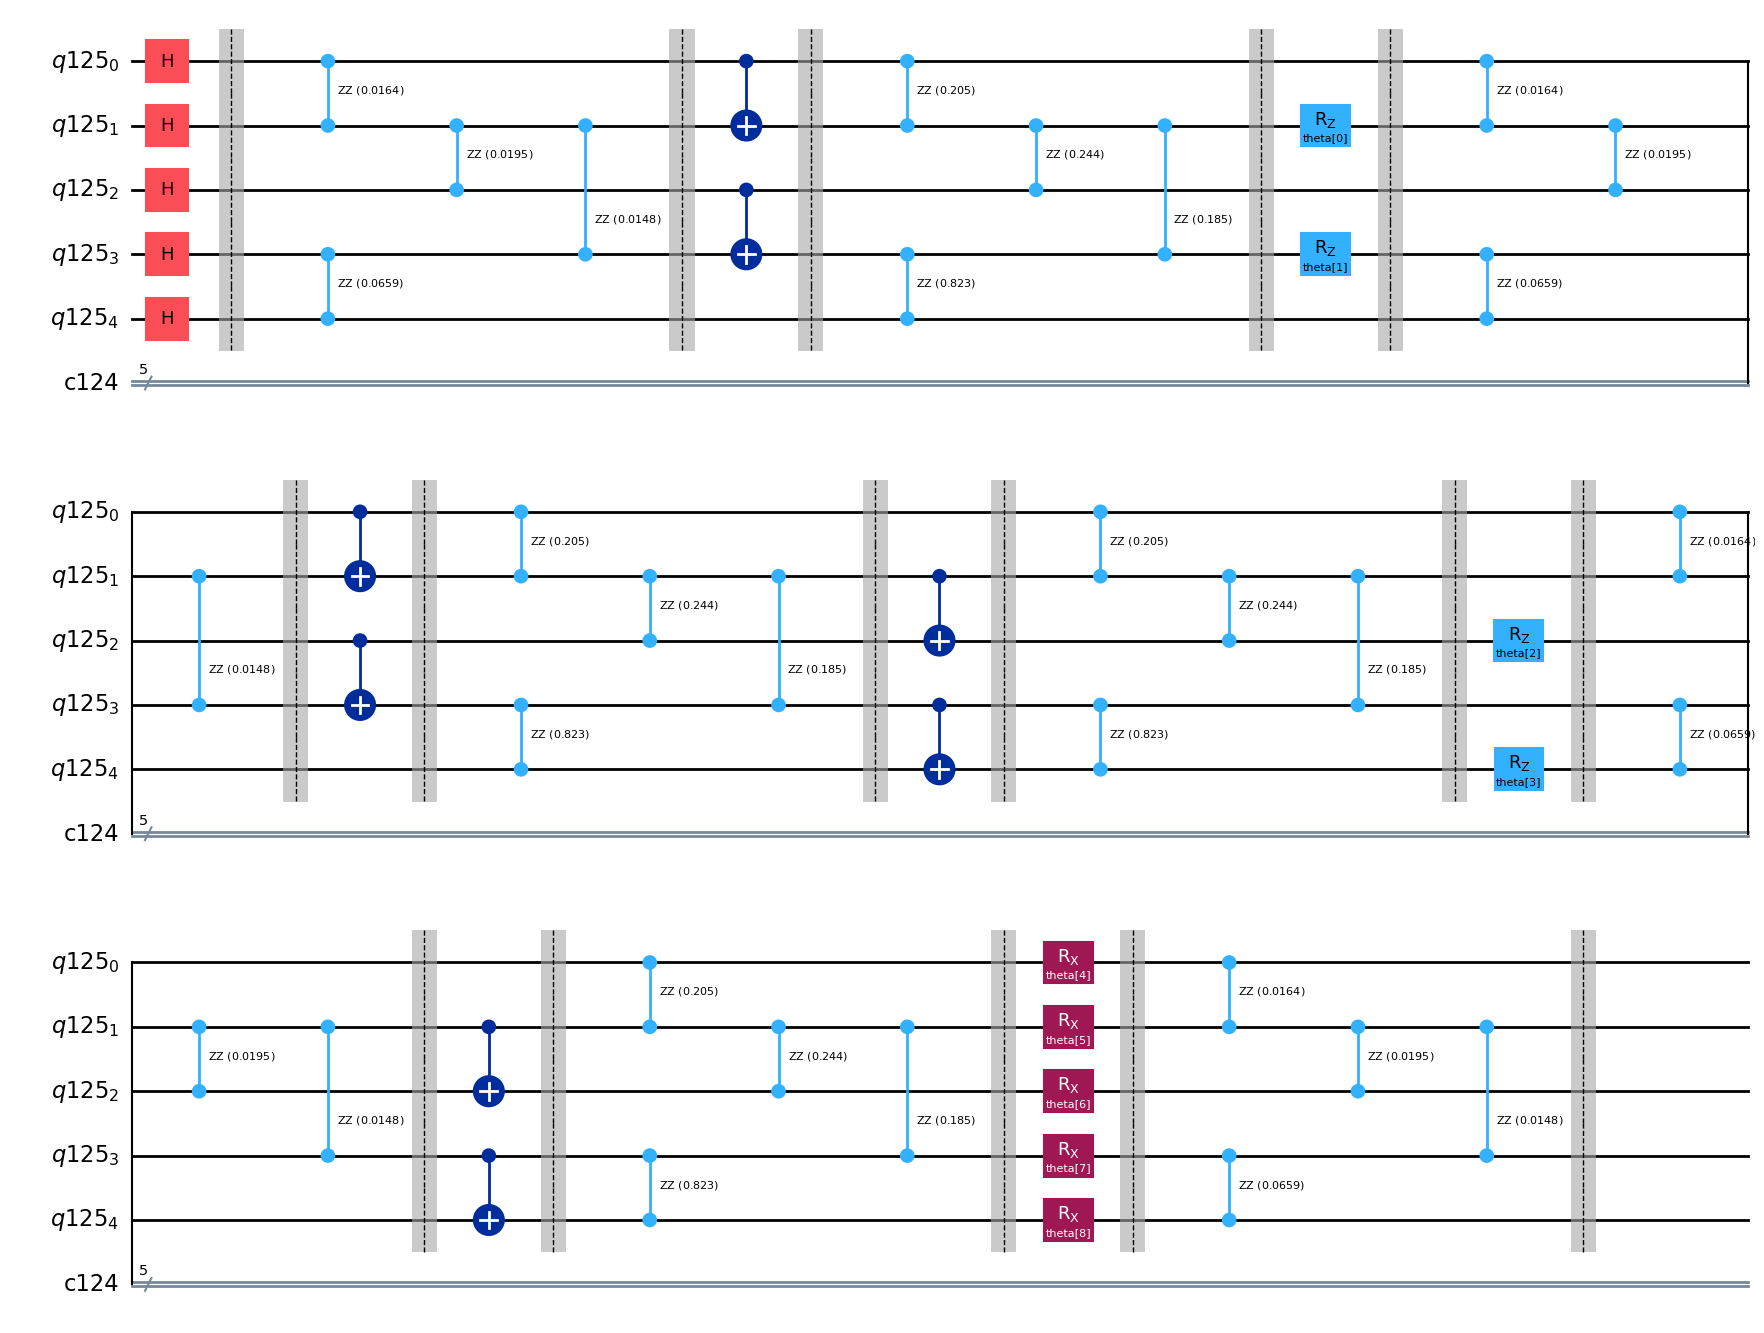

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

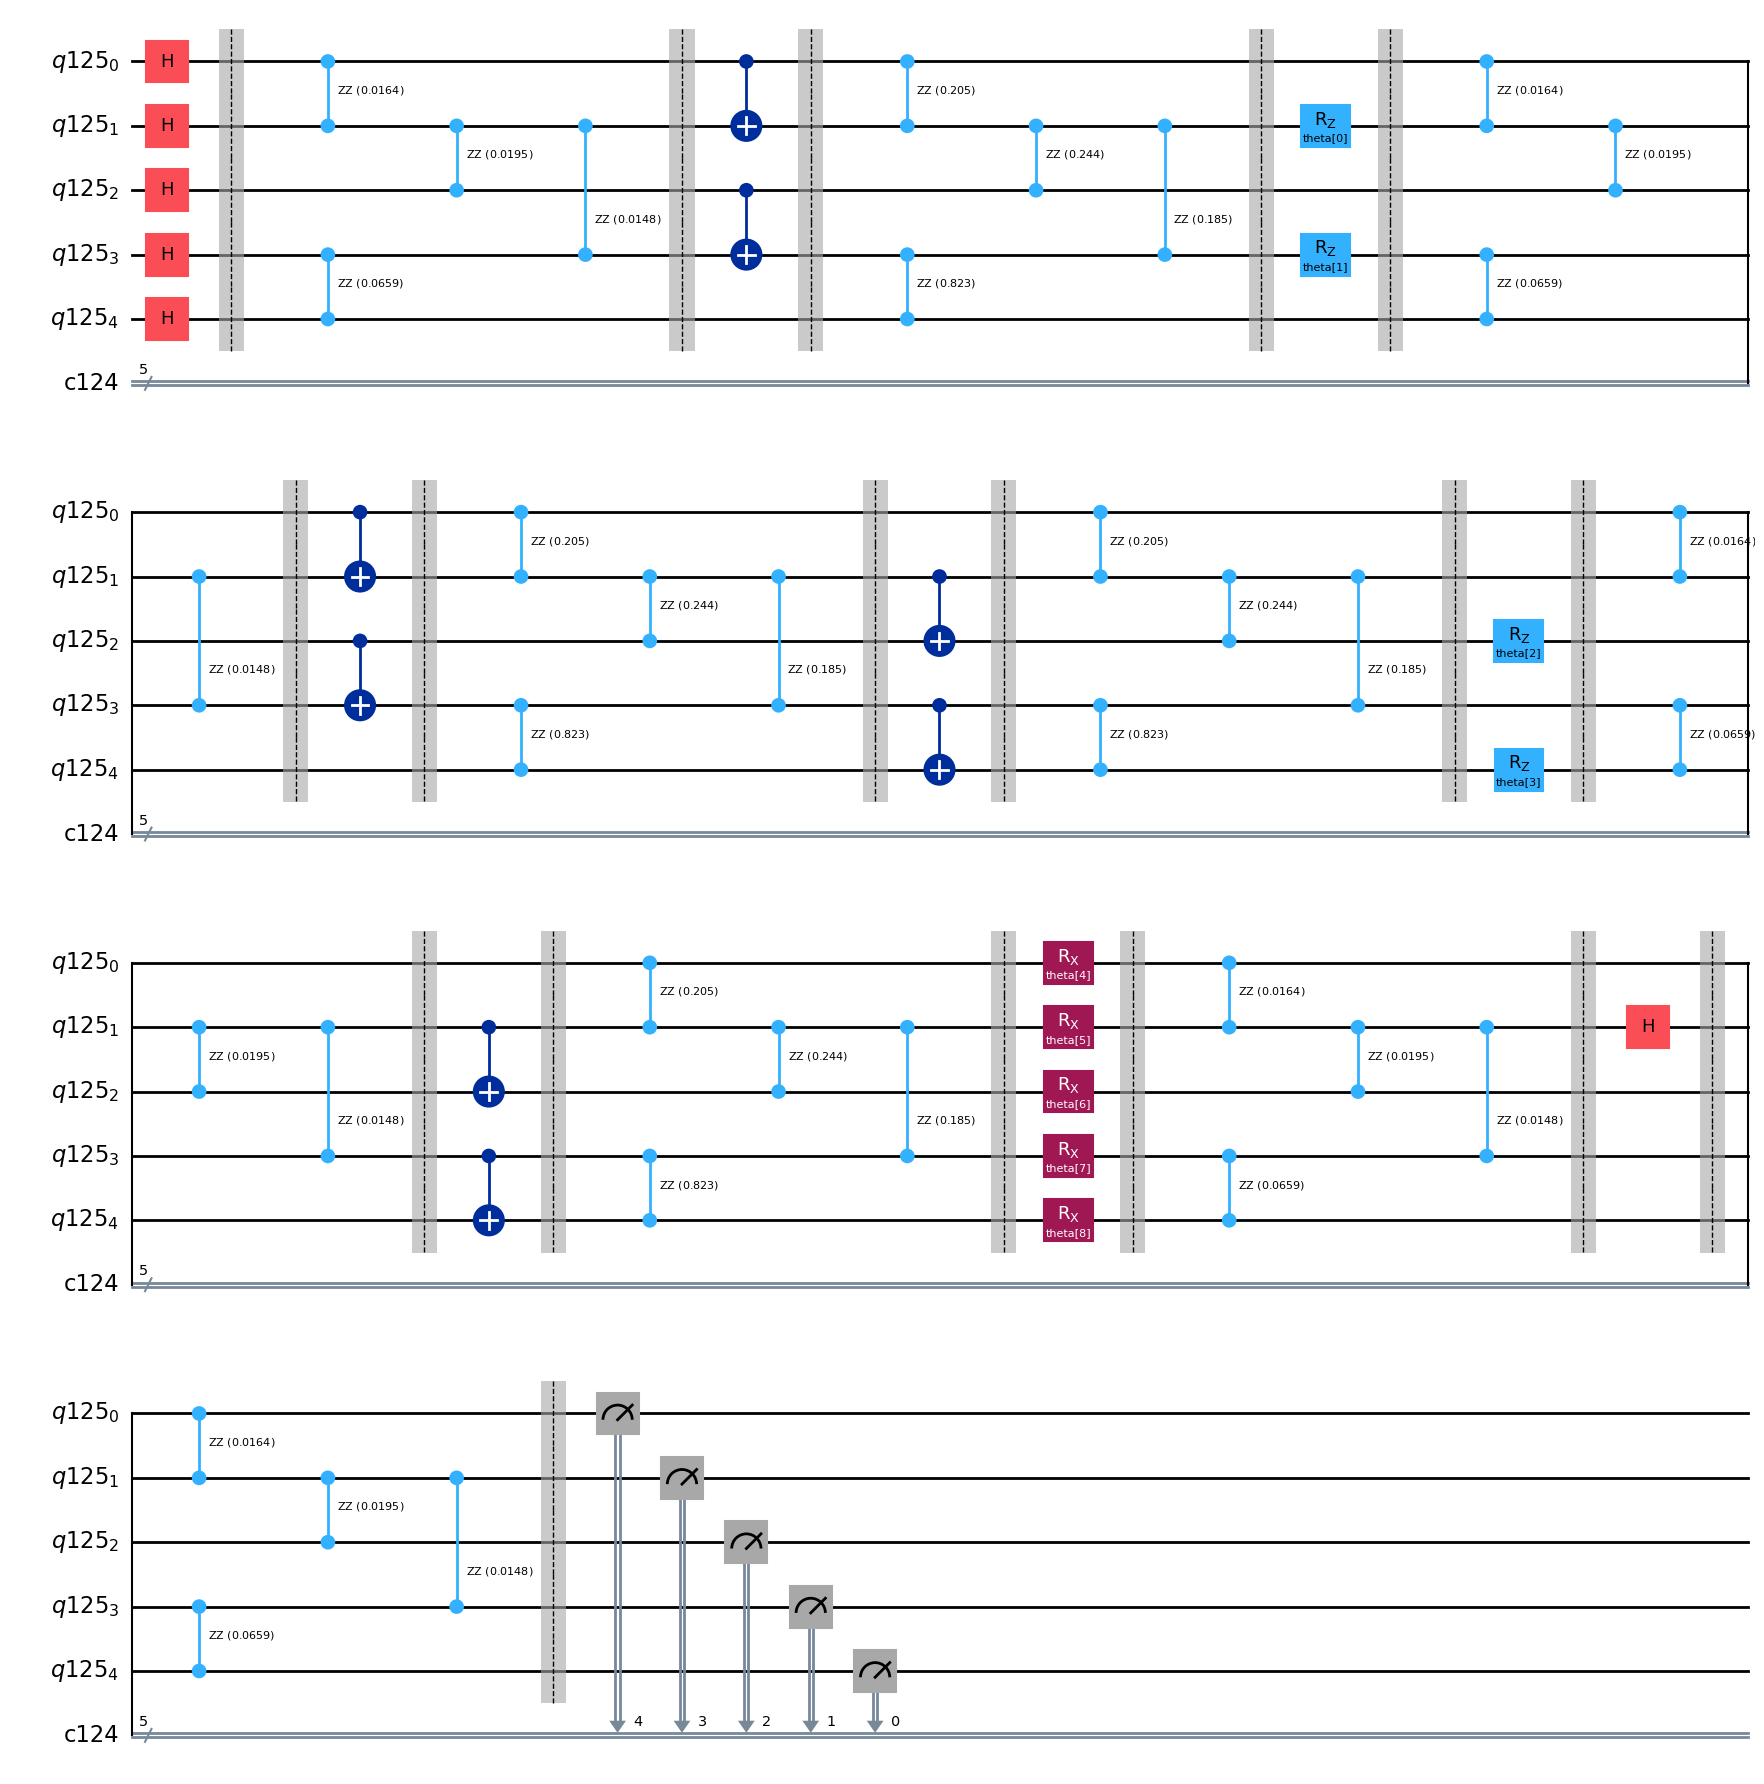

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = ansatzo

ansatz_x1.h(1)
ansatz_x1.barrier()

ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

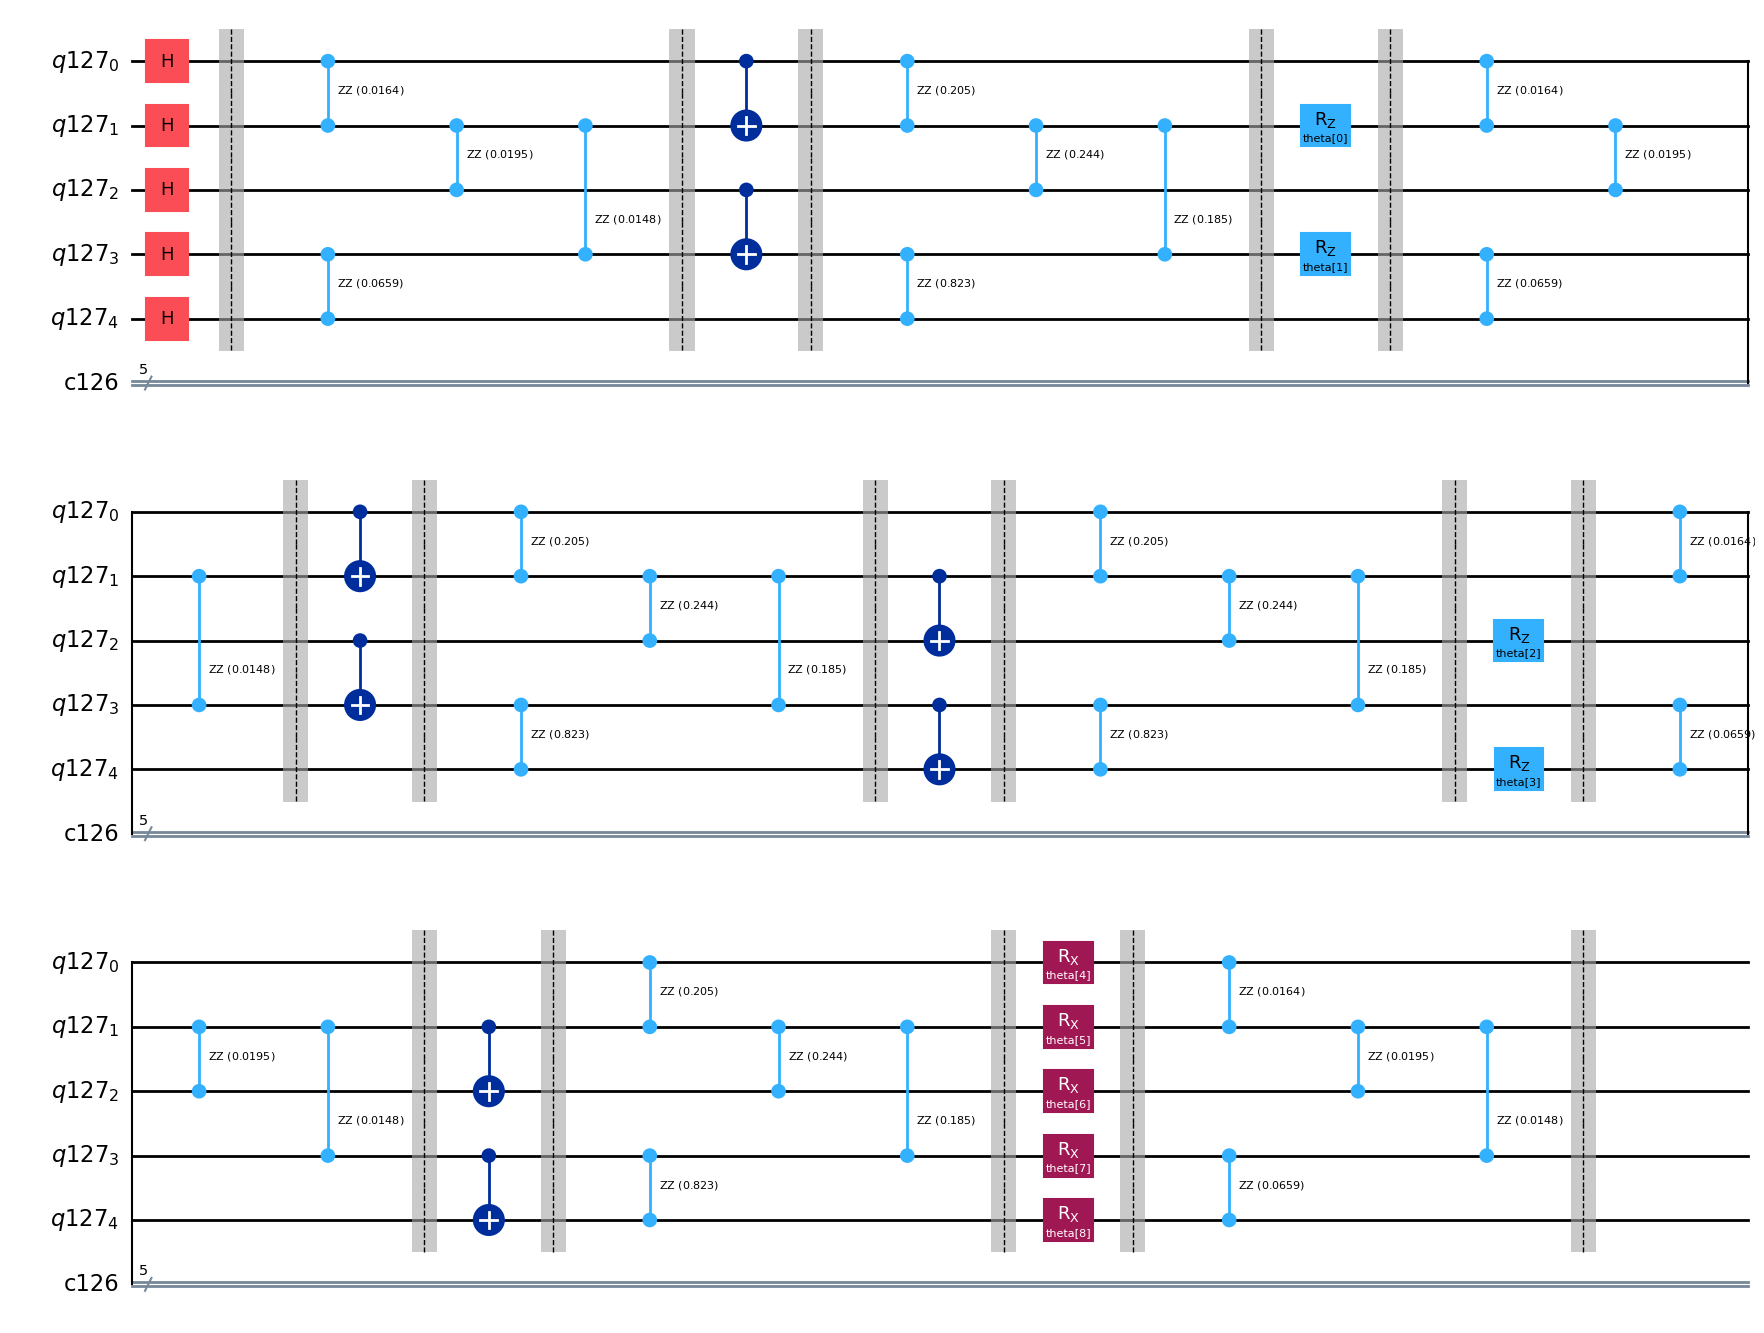

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

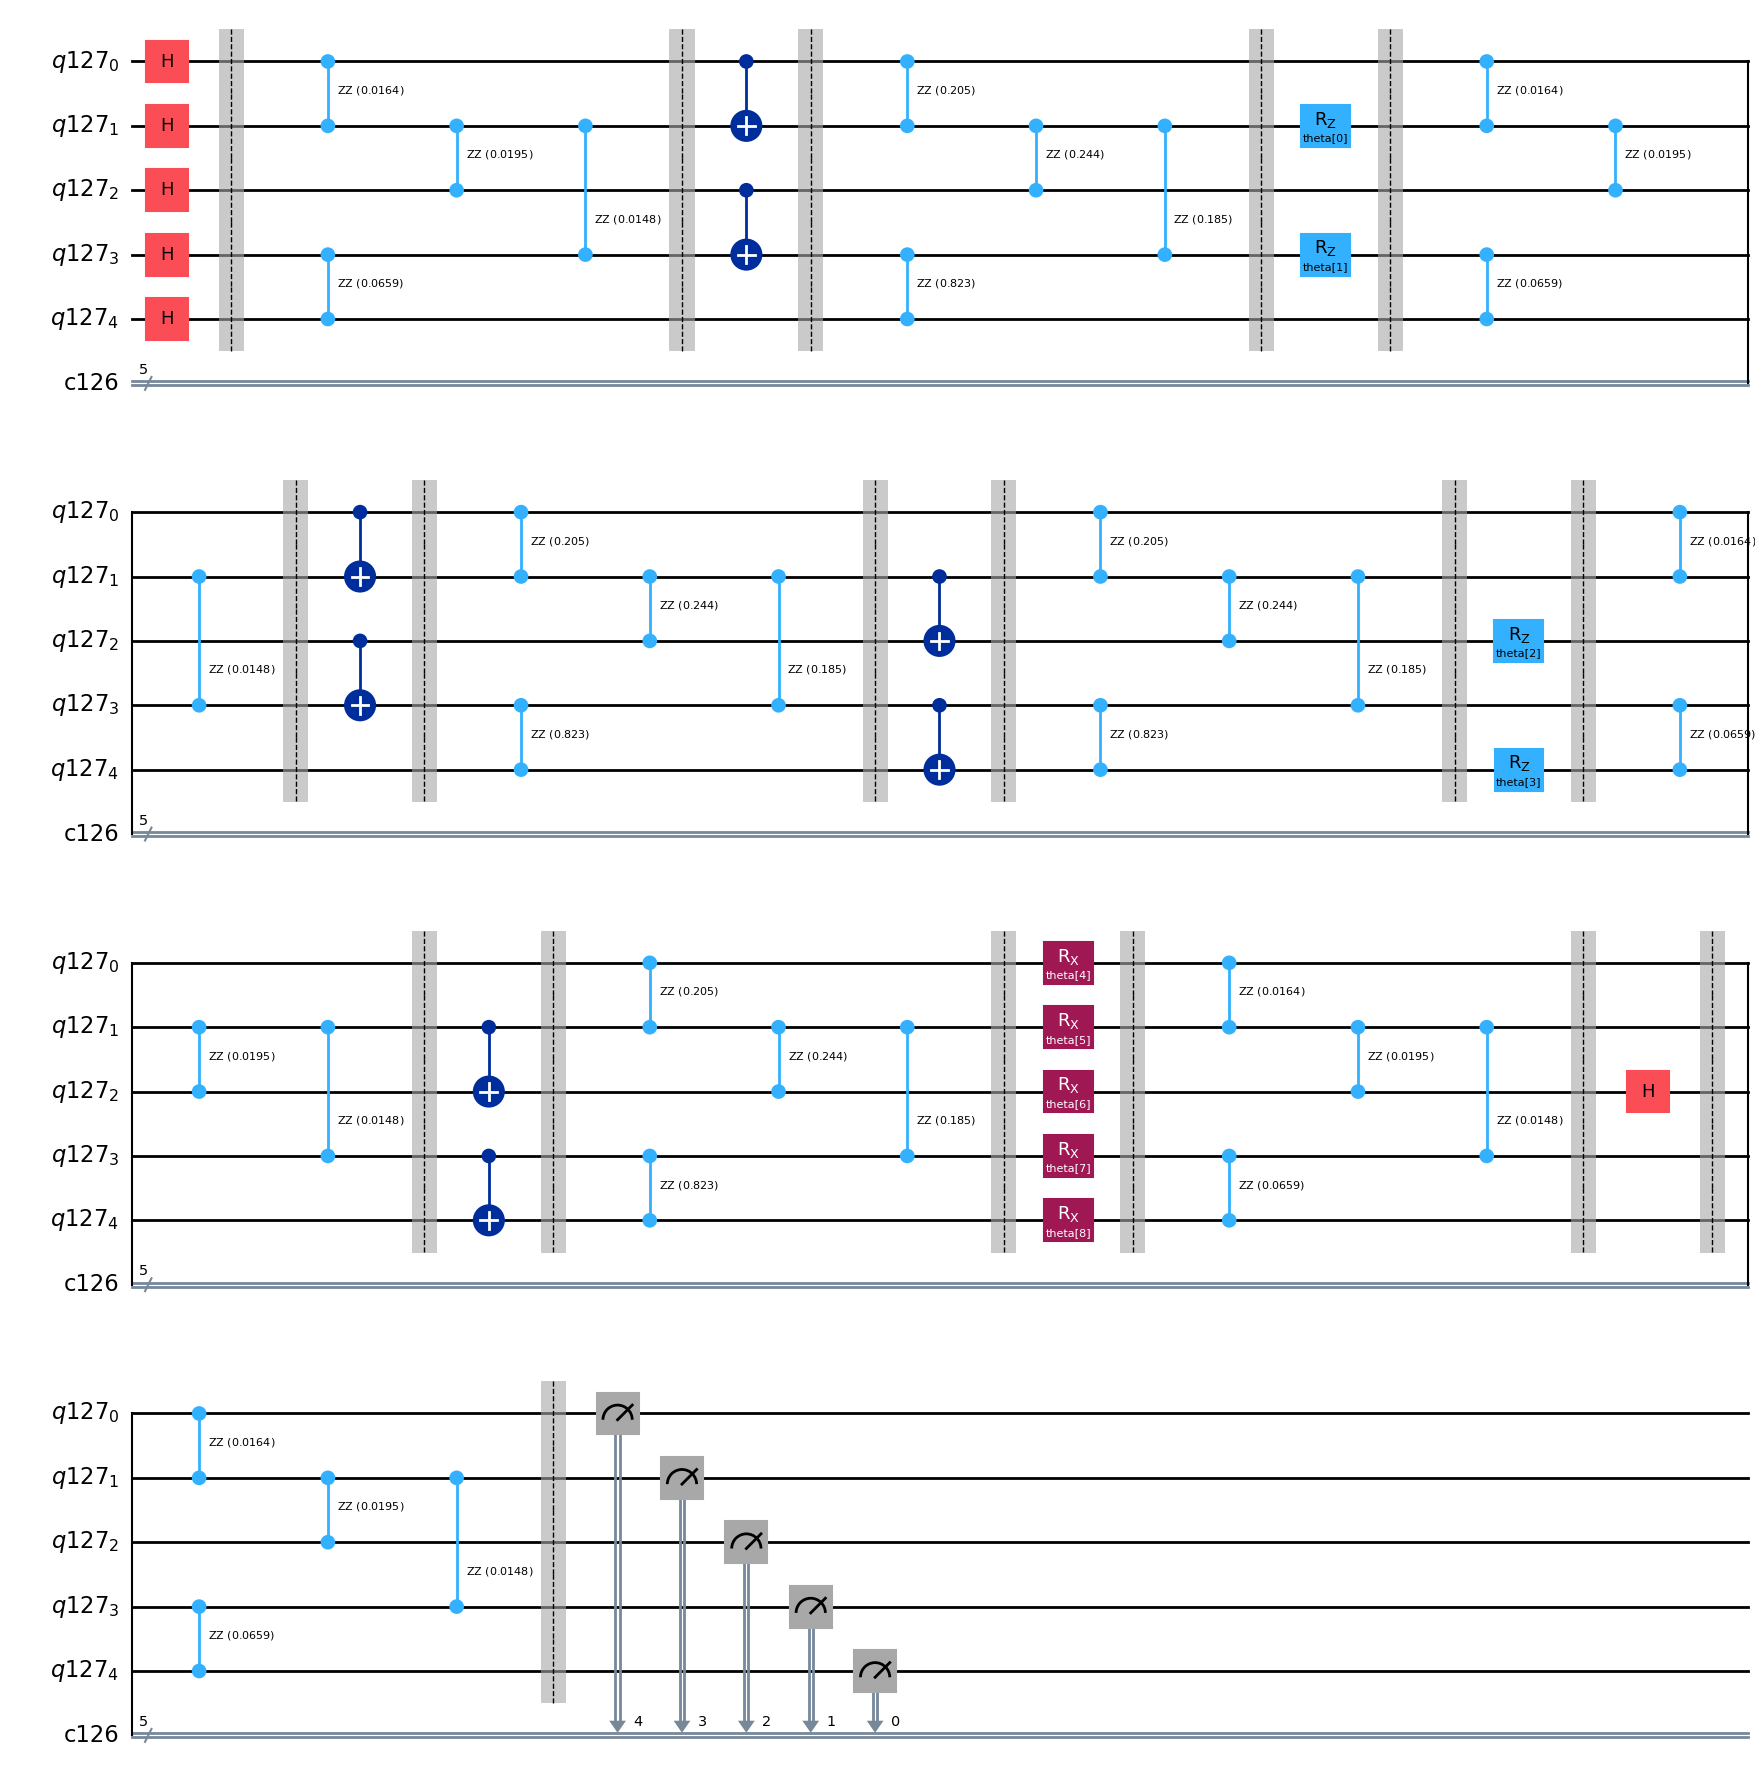

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = ansatzo

ansatz_x2.h(2)
ansatz_x2.barrier()

ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

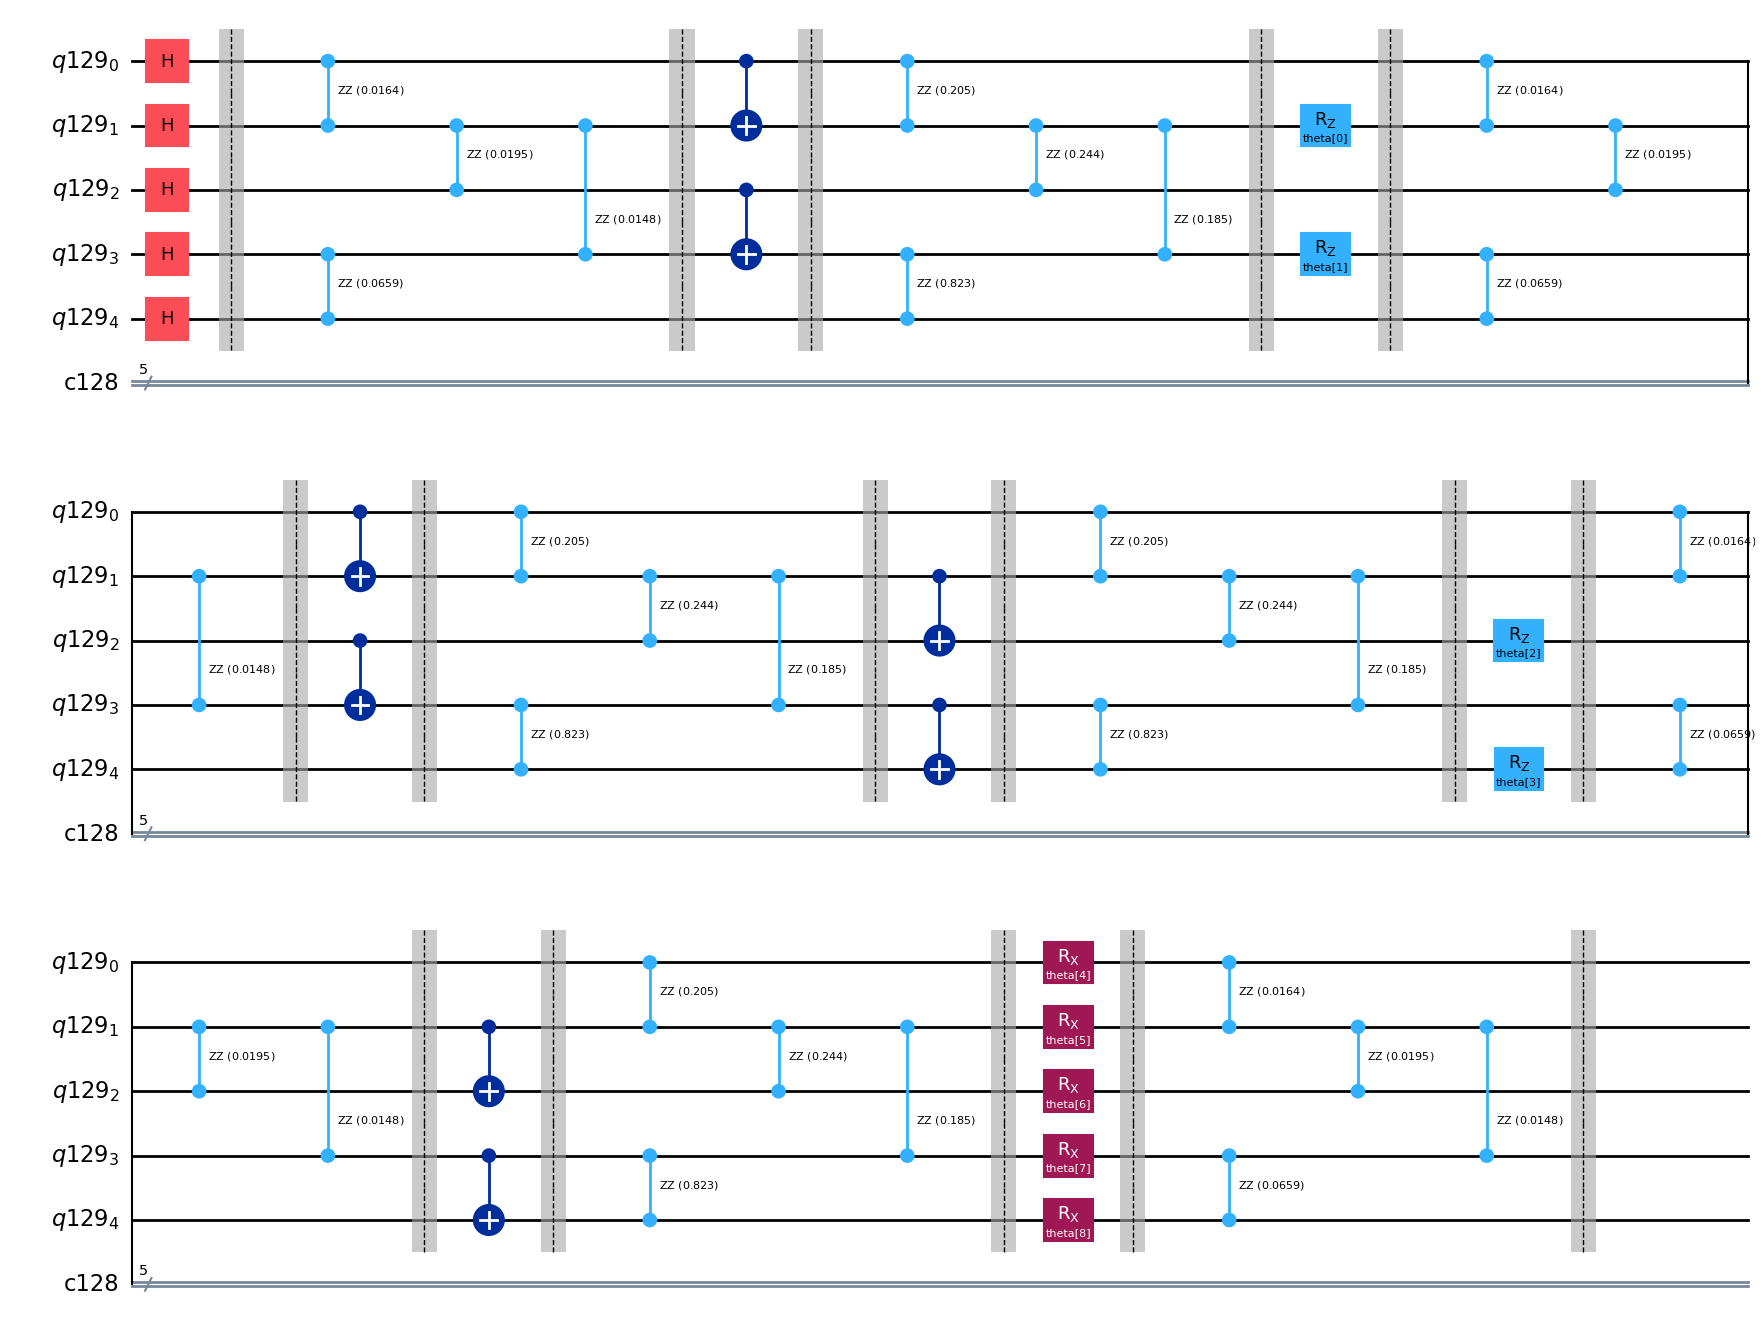

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

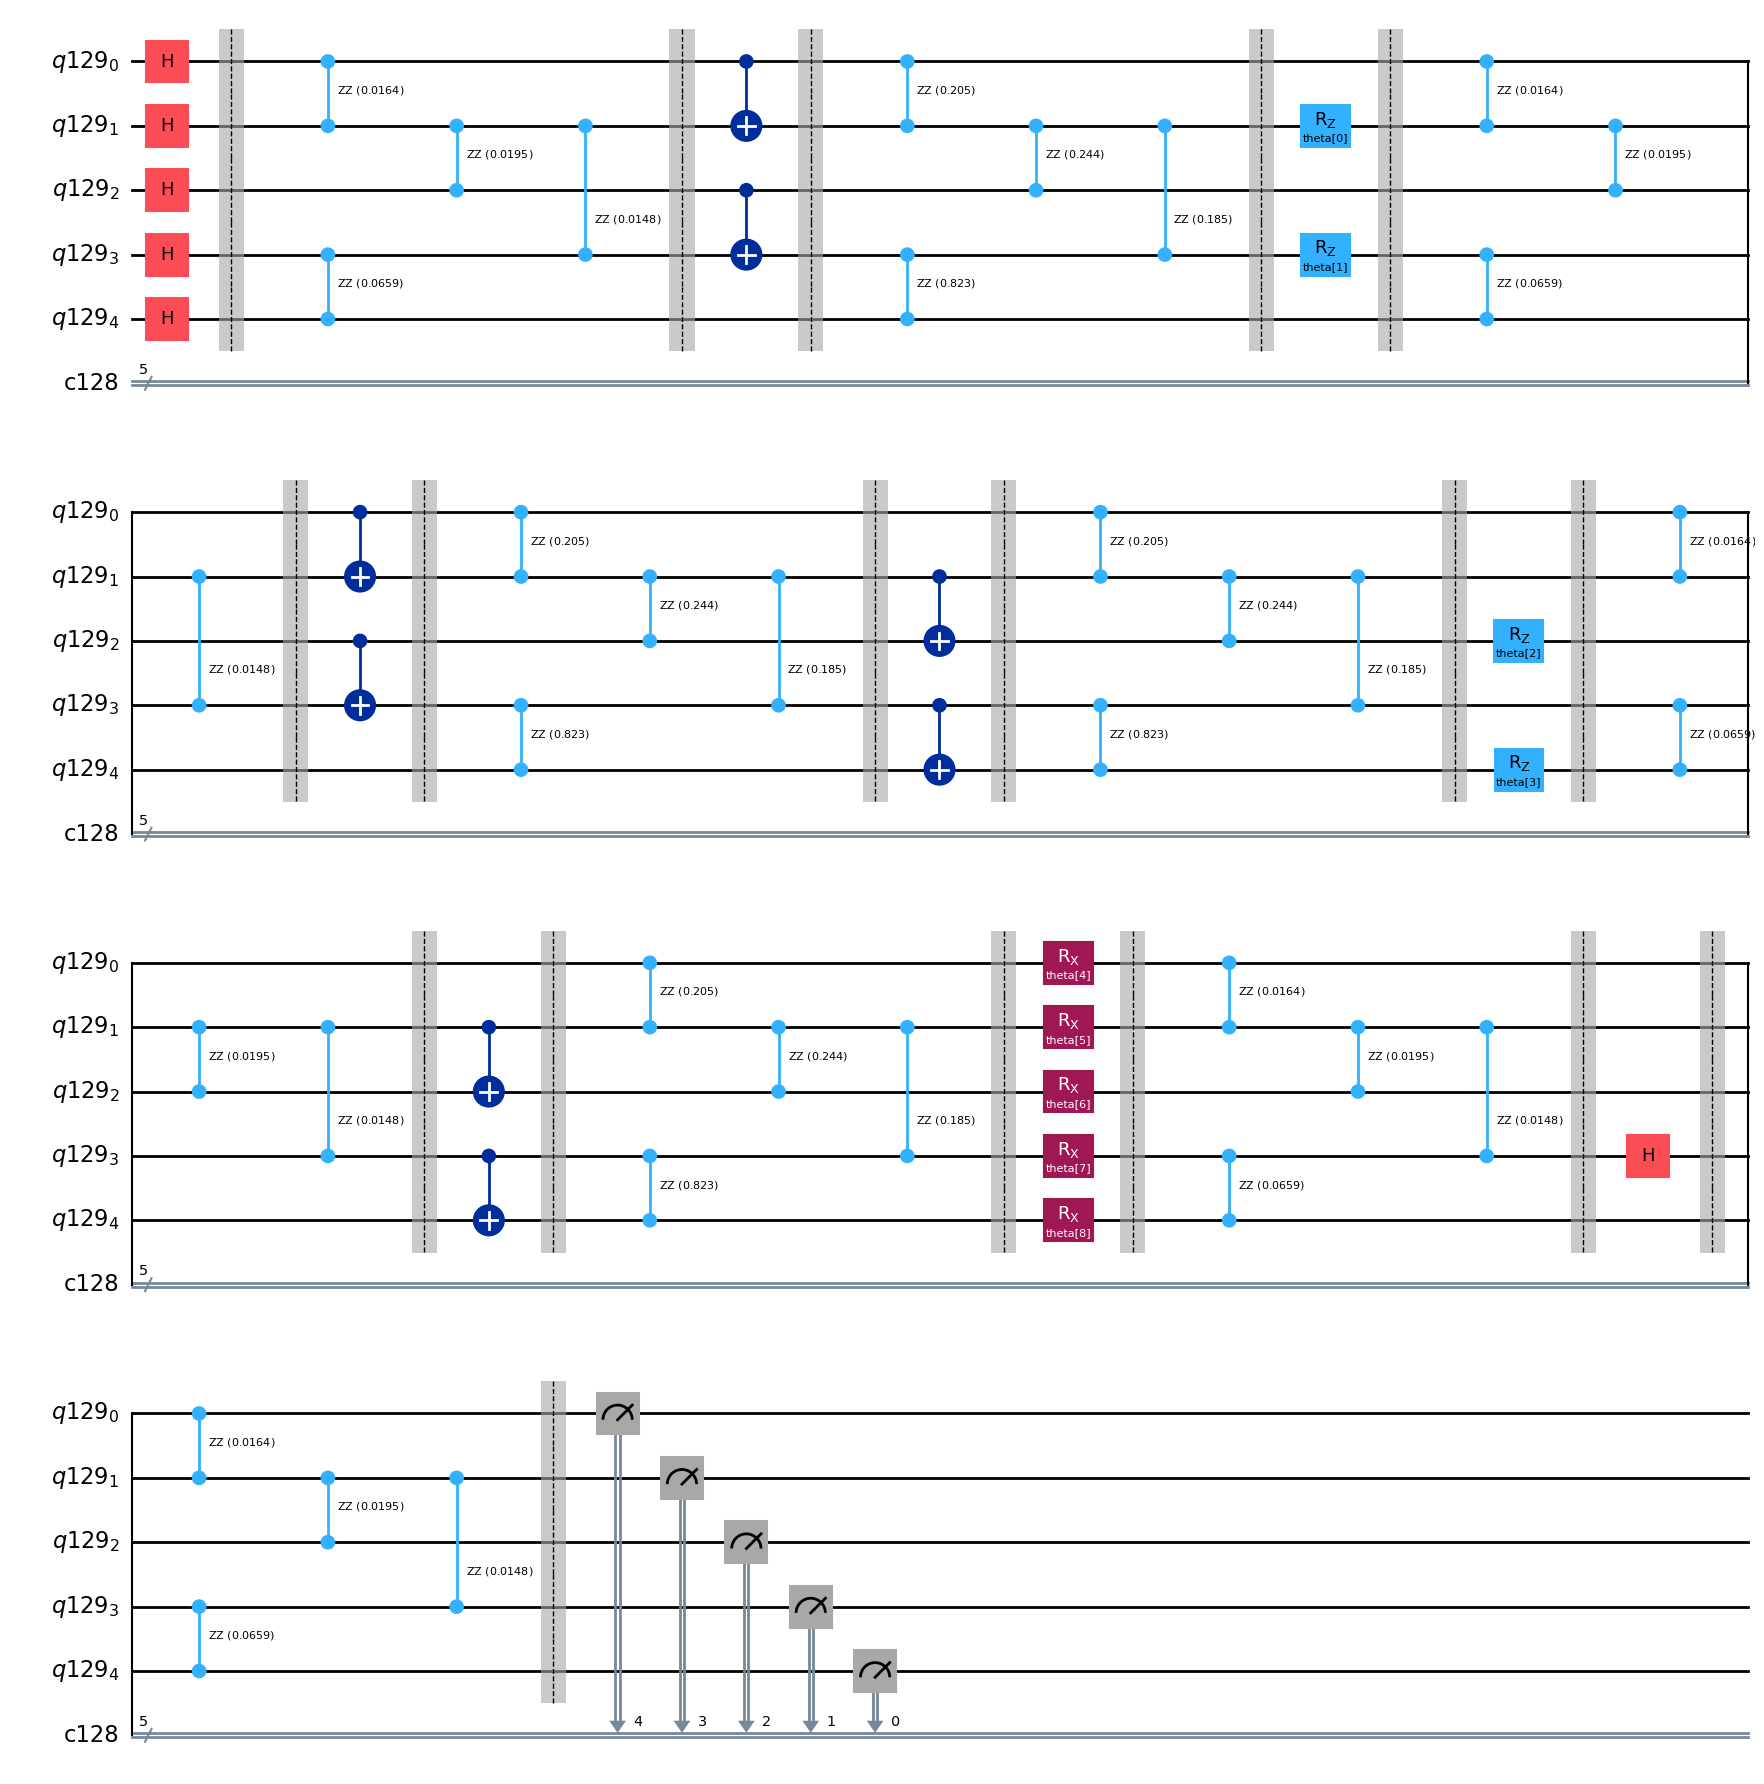

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = ansatzo

ansatz_x3.h(3)
ansatz_x3.barrier()

ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

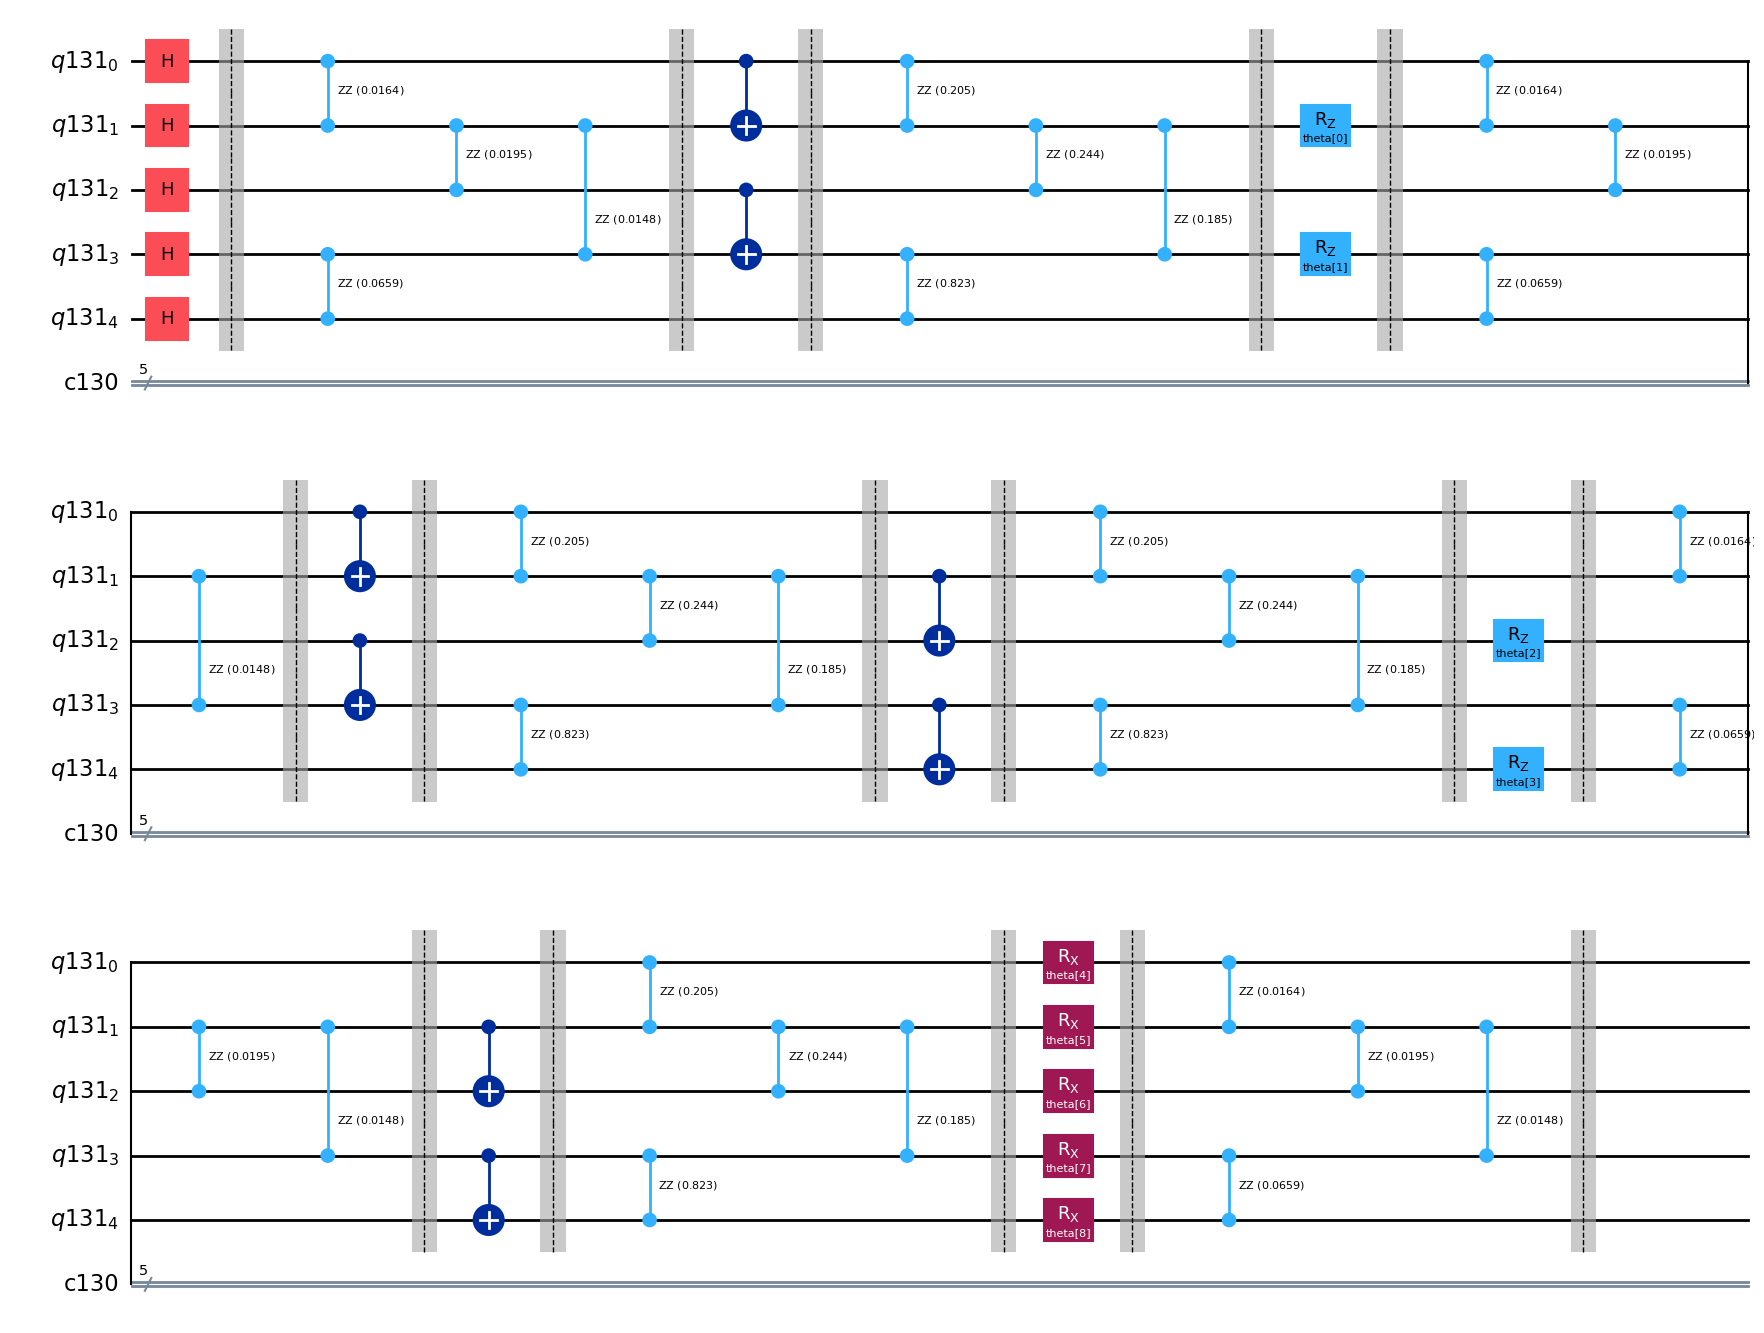

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_23)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_23)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single+gate_12)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single+gate_12)), [1,3])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatzo.barrier()


ansatzo.draw("mpl")

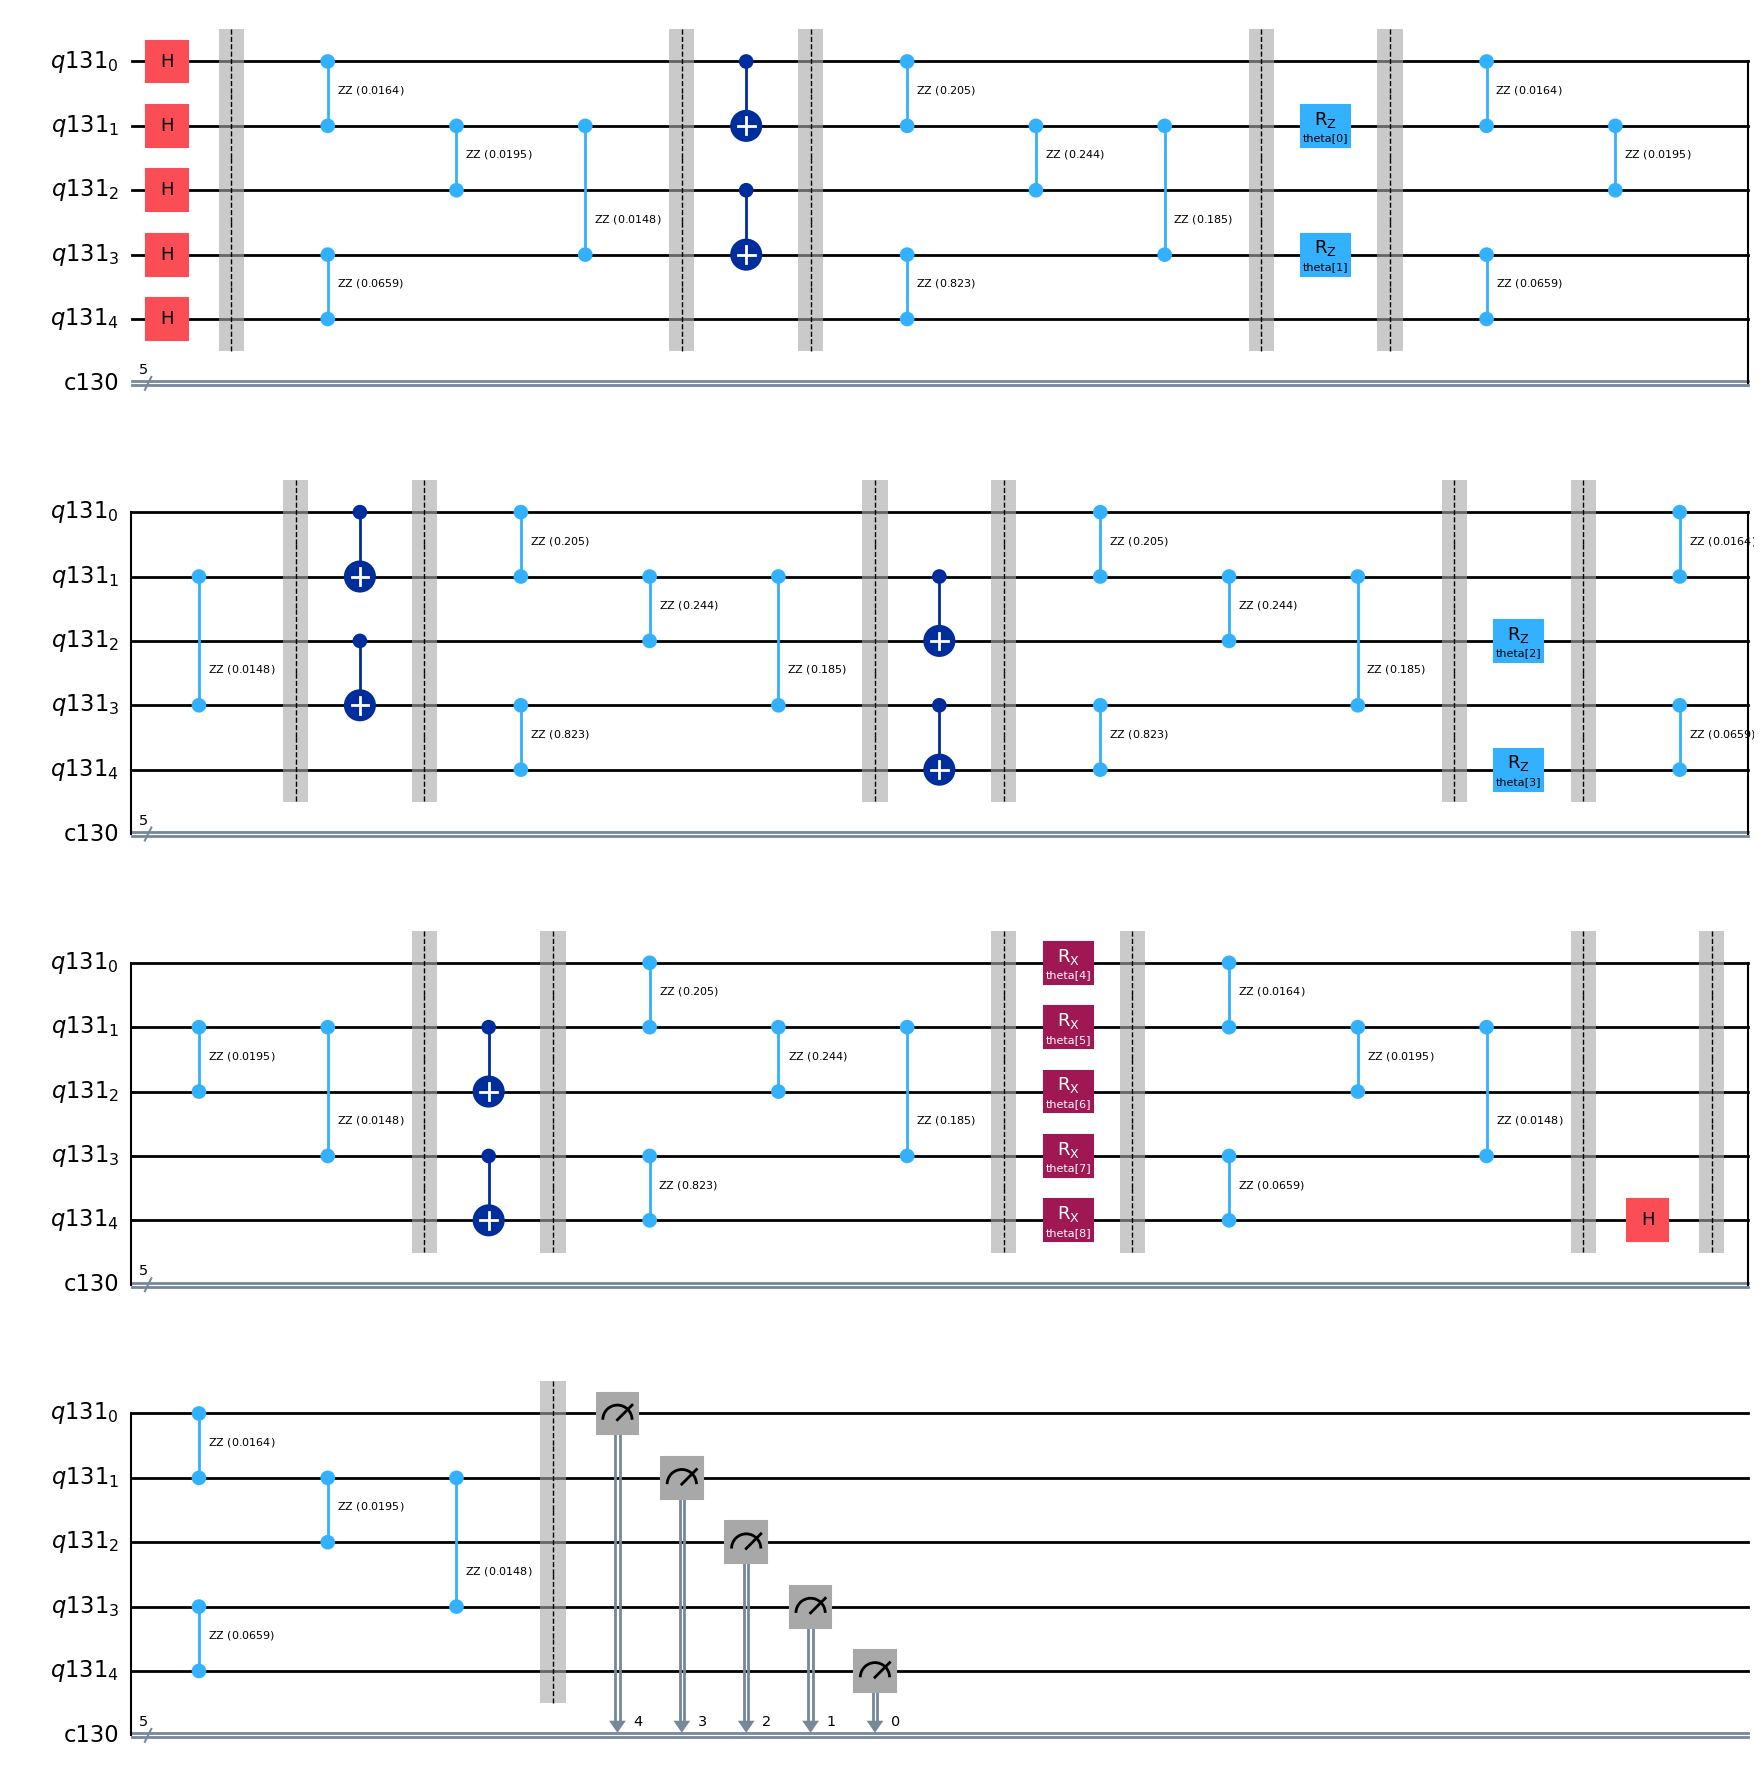

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = ansatzo

ansatz_x4.h(4)
ansatz_x4.barrier()

ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [0,1])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_1522*(gate_single)), [3,4])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_45*(gate_single)), [1,2])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_415*(gate_single)), [1,3])
ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

### Cost Function for VQE & VQNHE

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))


# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:5]
  c = parameter[5]

  FC1 = FC1.reshape(1,5)


  a1 = np.matmul(FC1, x)
  y = output_activate(c, a1)

  return y[0]

In [ ]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=10000, seed=1).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [ ]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval


def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [ ]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)
    callback_dict["cost_history"].append(current_cost)

  return callback

### VQE

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=6), pqc))
    if cost_func_vqnhe(np.zeros(shape=6), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=6), pqc)
      optimized_pqc = pqc

-3.9321999999999995
-2.5502000000000002
-1.8623999999999996
-2.2144
-3.7720000000000002
-3.9786000000000006
-3.9640000000000004
-4.019399999999999
-4.0126
-2.101
-3.9644000000000004
-4.025399999999999
-4.046399999999998
-3.8730000000000007
-3.9948000000000006
-3.6086000000000005
-2.8820000000000006
-2.1300000000000003
-3.7634000000000007
-3.9583999999999997


In [ ]:
lowest_energy_vqe

-4.046399999999998

### VQNHE FC Hidden Layer 1개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:30]
  c = parameter[30]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  y = output_activate(c, a2)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=31), pqc))
    if cost_func_vqnhe(np.zeros(shape=31), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=31), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(31) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618
Optimization terminated successfully.
         Current function value: -6.252538
         Iterations: 174
         Function evaluations: 7296
         Gradient evaluations: 228


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.231528
         Iterations: 108
         Function evaluations: 5833
         Gradient evaluations: 182


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.236337
         Iterations: 100
         Function evaluations: 6028
         Gradient evaluations: 188


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.238784
         Iterations: 127
         Function evaluations: 7435
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -6.270087
         Iterations: 253
         Function evaluations: 9920
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.252356
         Iterations: 300
         Function evaluations: 10592
         Gradient evaluations: 331


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.216318
         Iterations: 158
         Function evaluations: 7621
         Gradient evaluations: 238


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.246098
         Iterations: 300
         Function evaluations: 12384
         Gradient evaluations: 387


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.251052
         Iterations: 181
         Function evaluations: 11115
         Gradient evaluations: 347


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.257059
         Iterations: 126
         Function evaluations: 7436
         Gradient evaluations: 232


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.226971
         Iterations: 233
         Function evaluations: 11017
         Gradient evaluations: 344


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.201221
         Iterations: 194
         Function evaluations: 9088
         Gradient evaluations: 284


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.236996
         Iterations: 154
         Function evaluations: 10120
         Gradient evaluations: 316


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.216359
         Iterations: 136
         Function evaluations: 8650
         Gradient evaluations: 270
Optimization terminated successfully.
         Current function value: -6.251810
         Iterations: 105
         Function evaluations: 3776
         Gradient evaluations: 118


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.210119
         Iterations: 300
         Function evaluations: 11328
         Gradient evaluations: 354


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.214507
         Iterations: 192
         Function evaluations: 11531
         Gradient evaluations: 360


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.248056
         Iterations: 167
         Function evaluations: 8746
         Gradient evaluations: 273
Optimization terminated successfully.
         Current function value: -6.225140
         Iterations: 182
         Function evaluations: 7552
         Gradient evaluations: 236
         Current function value: -6.244879
         Iterations: 119
         Function evaluations: 8876
         Gradient evaluations: 277


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-6.270086944450637

### VQNHE FC Hidden Layer 2개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:50]
  FC3 = parameter[50:55]
  c = parameter[55]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(5,5)
  FC3 = FC3.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=56), pqc))
    if cost_func_vqnhe(np.zeros(shape=56), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=56), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(56) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.255702
         Iterations: 215
         Function evaluations: 20076
         Gradient evaluations: 352


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.253653
         Iterations: 300
         Function evaluations: 21147
         Gradient evaluations: 371


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.193708
         Iterations: 97
         Function evaluations: 10614
         Gradient evaluations: 186


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.263244
         Iterations: 300
         Function evaluations: 21831
         Gradient evaluations: 383


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.232341
         Iterations: 42
         Function evaluations: 5826
         Gradient evaluations: 102


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.260627
         Iterations: 100
         Function evaluations: 9473
         Gradient evaluations: 166


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.239670
         Iterations: 128
         Function evaluations: 11811
         Gradient evaluations: 207


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.250648
         Iterations: 300
         Function evaluations: 20520
         Gradient evaluations: 360
         Current function value: -6.261677
         Iterations: 300
         Function evaluations: 19893
         Gradient evaluations: 349


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.262250
         Iterations: 282
         Function evaluations: 22184
         Gradient evaluations: 389


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.226985
         Iterations: 242
         Function evaluations: 17442
         Gradient evaluations: 306


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.023924
         Iterations: 61
         Function evaluations: 7868
         Gradient evaluations: 138


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.267638
         Iterations: 229
         Function evaluations: 17391
         Gradient evaluations: 305


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.180884
         Iterations: 136
         Function evaluations: 11526
         Gradient evaluations: 202


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.245434
         Iterations: 203
         Function evaluations: 13452
         Gradient evaluations: 236


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.227074
         Iterations: 168
         Function evaluations: 15966
         Gradient evaluations: 280


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.230392
         Iterations: 150
         Function evaluations: 10944
         Gradient evaluations: 192


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.245313
         Iterations: 300
         Function evaluations: 23313
         Gradient evaluations: 409
Optimization terminated successfully.
         Current function value: -6.034495
         Iterations: 68
         Function evaluations: 7467
         Gradient evaluations: 131
         Current function value: -6.229633
         Iterations: 300
         Function evaluations: 23142
         Gradient evaluations: 406


In [ ]:
lowest_energy_vqnhe

-6.267638048354183

### VQNHE CNN ver 1

In [ ]:
def cnn2(vec, x):
  a = vec[0]
  b = vec[1]

  lst = []
  lst.append(b*x[0])
  lst.append(a*x[0]+b*x[1])
  lst.append(a*x[1]+b*x[2])
  lst.append(a*x[2]+b*x[3])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn4(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]

  lst = []
  lst.append(d*x[0])
  lst.append(c*x[0]+d*x[1])
  lst.append(b*x[0]+c*x[1]+d*x[2])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn2(parameter[0:2], x), cnn2(parameter[2:4], x), cnn3(parameter[4:7], x), cnn3(parameter[7:10], x), cnn4(parameter[10:14], x), cnn4(parameter[14:18], x)])
  z1 = relu(a1)

  FC1 = parameter[18:48]
  FC2 = parameter[48:53]
  c = parameter[53]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=54), pqc))
    if cost_func_vqnhe(np.zeros(shape=54), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=54), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(54) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-5.697399999999999
-5.8138
-5.790600000000001
-5.703600000000001
-3.5253999999999994
-5.8274
-3.5668
-5.7596
-5.861800000000001
-5.7608
-5.7778
-5.8082
-5.8187999999999995
-3.4508
-5.7952
-3.4644000000000004
-5.650800000000001
-5.797600000000001
-3.3502000000000005
-5.618
Optimization terminated successfully.
         Current function value: -5.968903
         Iterations: 57
         Function evaluations: 3465
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: -5.947187
         Iterations: 41
         Function evaluations: 2640
         Gradient evaluations: 48


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950838
         Iterations: 51
         Function evaluations: 6223
         Gradient evaluations: 113


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.941690
         Iterations: 111
         Function evaluations: 11232
         Gradient evaluations: 204
Optimization terminated successfully.
         Current function value: -5.951306
         Iterations: 51
         Function evaluations: 5005
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: -5.944477
         Iterations: 24
         Function evaluations: 1485
         Gradient evaluations: 27


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.952331
         Iterations: 80
         Function evaluations: 8755
         Gradient evaluations: 159


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.951711
         Iterations: 74
         Function evaluations: 9417
         Gradient evaluations: 171
Optimization terminated successfully.
         Current function value: -5.861800
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.947256
         Iterations: 43
         Function evaluations: 7322
         Gradient evaluations: 133
Optimization terminated successfully.
         Current function value: -5.975756
         Iterations: 50
         Function evaluations: 2970
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: -5.886697
         Iterations: 15
         Function evaluations: 1265
         Gradient evaluations: 23


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950791
         Iterations: 116
         Function evaluations: 14965
         Gradient evaluations: 272
Optimization terminated successfully.
         Current function value: -5.883760
         Iterations: 12
         Function evaluations: 825
         Gradient evaluations: 15


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.935832
         Iterations: 32
         Function evaluations: 7492
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.956753
         Iterations: 55
         Function evaluations: 3190
         Gradient evaluations: 58


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.931362
         Iterations: 72
         Function evaluations: 10071
         Gradient evaluations: 183


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972598
         Iterations: 154
         Function evaluations: 14474
         Gradient evaluations: 263


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950387
         Iterations: 66
         Function evaluations: 11282
         Gradient evaluations: 205
Optimization terminated successfully.
         Current function value: -5.883927
         Iterations: 28
         Function evaluations: 1650
         Gradient evaluations: 30


In [ ]:
lowest_energy_vqnhe

-5.975756046764024

### VQNHE CNN ver 2

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn5(parameter[6:11], x), cnn5(parameter[11:16], x)])
  z1 = relu(a1)

  FC1 = parameter[16:36]
  FC2 = parameter[36:41]
  c = parameter[41]

  FC1 = FC1.reshape(5,4)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=42), pqc))
    if cost_func_vqnhe(np.zeros(shape=42), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=42), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(42) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.9321999999999995
-2.5502000000000002
-1.8623999999999996
-2.2144
-3.7720000000000002
-3.9786000000000006
-3.9640000000000004
-4.019399999999999
-4.0126
-2.101
-3.9644000000000004
-4.025399999999999
-4.046399999999998
-3.8730000000000007
-3.9948000000000006
-3.6086000000000005
-2.8820000000000006
-2.1300000000000003
-3.7634000000000007
-3.9583999999999997
Optimization terminated successfully.
         Current function value: -5.050462
         Iterations: 89
         Function evaluations: 5031
         Gradient evaluations: 117


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -4.835767
         Iterations: 176
         Function evaluations: 11492
         Gradient evaluations: 267


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -4.967474
         Iterations: 144
         Function evaluations: 12822
         Gradient evaluations: 298


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.163831
         Iterations: 112
         Function evaluations: 8779
         Gradient evaluations: 204


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -4.413586
         Iterations: 6
         Function evaluations: 4957
         Gradient evaluations: 115


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.050388
         Iterations: 33
         Function evaluations: 5343
         Gradient evaluations: 124
Optimization terminated successfully.
         Current function value: -5.061698
         Iterations: 99
         Function evaluations: 6837
         Gradient evaluations: 159
Optimization terminated successfully.
         Current function value: -5.181232
         Iterations: 58
         Function evaluations: 3913
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: -5.047213
         Iterations: 105
         Function evaluations: 6149
         Gradient evaluations: 143


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.040380
         Iterations: 87
         Function evaluations: 6020
         Gradient evaluations: 140


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.064772
         Iterations: 185
         Function evaluations: 12654
         Gradient evaluations: 294
Optimization terminated successfully.
         Current function value: -4.046400
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: -5.077338
         Iterations: 177
         Function evaluations: 9933
         Gradient evaluations: 231


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -4.394524
         Iterations: 67
         Function evaluations: 13462
         Gradient evaluations: 313
Optimization terminated successfully.
         Current function value: -5.040546
         Iterations: 104
         Function evaluations: 6364
         Gradient evaluations: 148


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -4.584630
         Iterations: 85
         Function evaluations: 8218
         Gradient evaluations: 191
Optimization terminated successfully.
         Current function value: -4.046400
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.068287
         Iterations: 55
         Function evaluations: 4483
         Gradient evaluations: 104
Optimization terminated successfully.
         Current function value: -4.981830
         Iterations: 202
         Function evaluations: 15953
         Gradient evaluations: 371
Optimization terminated successfully.
         Current function value: -5.199852
         Iterations: 149
         Function evaluations: 7697
         Gradient evaluations: 179


In [ ]:
lowest_energy_vqnhe

-5.199852305470532

### VQNHE CNN ver 3

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  FC1 = parameter[22:52]
  FC2 = parameter[52:57]
  c = parameter[57]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=58), pqc))
    if cost_func_vqnhe(np.zeros(shape=58), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=58), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(58) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.9321999999999995
-2.5502000000000002
-1.8623999999999996
-2.2144
-3.7720000000000002
-3.9786000000000006
-3.9640000000000004
-4.019399999999999
-4.0126
-2.101
-3.9644000000000004
-4.025399999999999
-4.046399999999998
-3.8730000000000007
-3.9948000000000006
-3.6086000000000005
-2.8820000000000006
-2.1300000000000003
-3.7634000000000007
-3.9583999999999997


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.023506
         Iterations: 34
         Function evaluations: 6207
         Gradient evaluations: 105


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.032097
         Iterations: 168
         Function evaluations: 26029
         Gradient evaluations: 441


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.142506
         Iterations: 37
         Function evaluations: 5785
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: -4.635783
         Iterations: 52
         Function evaluations: 4012
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: -5.144436
         Iterations: 69
         Function evaluations: 7139
         Gradient evaluations: 121
Optimization terminated successfully.
         Current function value: -4.741462
         Iterations: 11
         Function evaluations: 1003
         Gradient evaluations: 17


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -4.426630
         Iterations: 13
         Function evaluations: 4786
         Gradient evaluations: 81


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.035865
         Iterations: 53
         Function evaluations: 8326
         Gradient evaluations: 141


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.076942
         Iterations: 159
         Function evaluations: 18489
         Gradient evaluations: 313
Optimization terminated successfully.
         Current function value: -4.047592
         Iterations: 14
         Function evaluations: 885
         Gradient evaluations: 15


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.032243
         Iterations: 40
         Function evaluations: 6974
         Gradient evaluations: 118
Optimization terminated successfully.
         Current function value: -4.741462
         Iterations: 12
         Function evaluations: 1121
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: -5.187642
         Iterations: 112
         Function evaluations: 8437
         Gradient evaluations: 143


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -4.430564
         Iterations: 23
         Function evaluations: 4133
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: -5.017296
         Iterations: 116
         Function evaluations: 9027
         Gradient evaluations: 153


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -4.643703
         Iterations: 101
         Function evaluations: 20776
         Gradient evaluations: 352
Optimization terminated successfully.
         Current function value: -4.885757
         Iterations: 22
         Function evaluations: 1475
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: -5.064830
         Iterations: 45
         Function evaluations: 3186
         Gradient evaluations: 54


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.191669
         Iterations: 274
         Function evaluations: 27500
         Gradient evaluations: 466
         Current function value: -5.114641
         Iterations: 74
         Function evaluations: 10690
         Gradient evaluations: 181


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.191668794995553

### VQNHE CNN ver 4

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  lst = np.array(lst)

  return lst


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])

  lst = np.array(lst)

  return lst


def new_cnn(params, x): # x : [6, 5], params : 36 elements (6 * (5 + 1))
  res = np.zeros(6)
  for i in range(6):
    res[i] = np.dot(params[6*i : 6*i+5], x[i]) + params[6*i+5]
  return res


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  a2 = new_cnn(parameter[22:58], z1)
  z2 = relu(a2)

  FC1 = parameter[58:88]
  FC2 = parameter[88:93]
  c = parameter[93]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a3 = np.matmul(FC1, z2)
  z3 = relu(a3)

  a4 = np.matmul(FC2, z3)
  y = output_activate(c, a4)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=94), pqc))
    if cost_func_vqnhe(np.zeros(shape=94), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=94), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(94) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 1000
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

In [ ]:
lowest_energy_vqnhe

# CNN QEM Plot

## 8. CNN Estimation - ZZ Crosstalk (CUSCO 3 4 5 15 22)

vqe

[-5.8522, -5.818000, -5.6206, -5.4804, -4.046399]

vqnheFC1

[-6.464399, -6.326090, -6.925281, -7.041906, -6.671450]

vqnheFC2

[-6.467973, -6.327003, -6.926112, -7.055456, -6.711134]

vqnheCNN1

[-5.966579, -5.895777, -5.750129, -5.866383, -5.047405]

vqnheCNN2

[-6.018439, -5.974823, -5.832824, -5.934106, -5.199852]

vqnheCNN3

[-6.002155, -5.978639, -5.837737, -5.965935, -5.191668]

In [ ]:
# Qubit Number 3,4,5,15,22

freq = [5.232, 5.138, 4.988, 5.015, 5.282]                  # Unit : GHz
anharm = [-0.30373, -0.3054, -0.30755, -0.30699, -0.303]    # Unit : GHz

In [ ]:
# ZZ Crosstalk Frequency

coupling_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]
zz_frequency_list = []

for J in coupling_list:

  H1 = np.array([[freq[0], J], [J, freq[1]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_34 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])


  H1 = np.array([[freq[1], J], [J, freq[2]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_45 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])


  H1 = np.array([[freq[2], J], [J, freq[3]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_415 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])


  H1 = np.array([[freq[3], J], [J, freq[4]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_1522 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])

  max_freq = np.max(np.array([crosstalk_freq_34, crosstalk_freq_45, crosstalk_freq_415, crosstalk_freq_1522]))
  zz_frequency_list.append(max_freq)

Text(0.5, 1.0, 'ZZ Crosstalk Frequency - Coupling Frequency Graph')

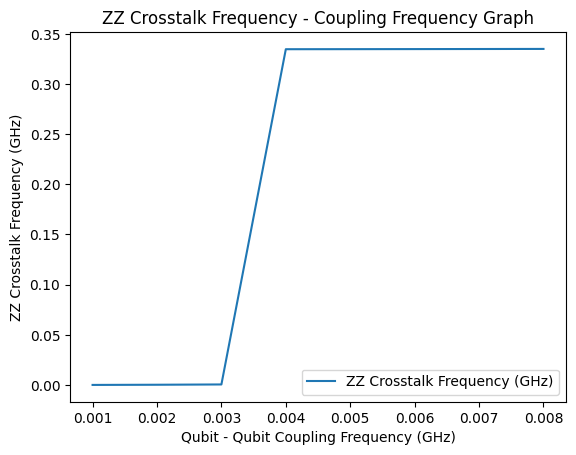

In [ ]:
plt.plot(coupling_list, zz_frequency_list, label="ZZ Crosstalk Frequency (GHz)")
plt.legend()
plt.xlabel("Qubit - Qubit Coupling Frequency (GHz)")
plt.ylabel("ZZ Crosstalk Frequency (GHz)")
plt.title("ZZ Crosstalk Frequency - Coupling Frequency Graph")

In [ ]:
# ZZ Crosstalk Frequency

coupling_list = [0.001, 0.0013, 0.0018, 0.002, 0.003]
zz_frequency_list = []

for J in coupling_list:

  H1 = np.array([[freq[0], J], [J, freq[1]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_34 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])


  H1 = np.array([[freq[1], J], [J, freq[2]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_45 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])


  H1 = np.array([[freq[2], J], [J, freq[3]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_415 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])


  H1 = np.array([[freq[3], J], [J, freq[4]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_1522 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])

  max_freq = np.max(np.array([crosstalk_freq_34, crosstalk_freq_45, crosstalk_freq_415, crosstalk_freq_1522]))
  zz_frequency_list.append(max_freq)

Text(0.5, 1.0, 'ZZ Crosstalk Frequency - Coupling Frequency Graph')

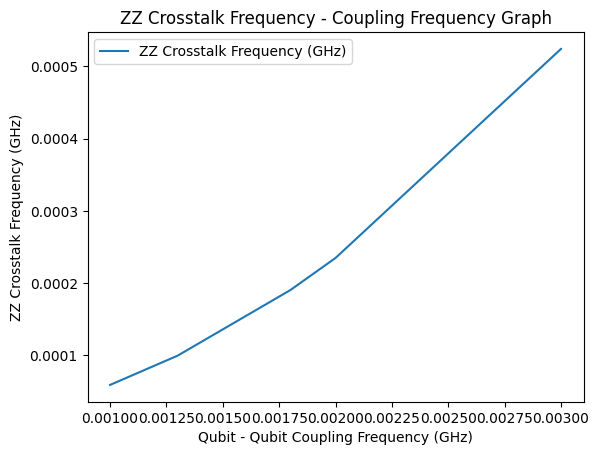

In [ ]:
plt.plot(coupling_list, zz_frequency_list, label="ZZ Crosstalk Frequency (GHz)")
plt.legend()
plt.xlabel("Qubit - Qubit Coupling Frequency (GHz)")
plt.ylabel("ZZ Crosstalk Frequency (GHz)")
plt.title("ZZ Crosstalk Frequency - Coupling Frequency Graph")

In [ ]:
infidelity_list = []

for i in range(5):
  theta = np.pi*500*zz_frequency_list[i]
  infidelity = 1-np.cos(theta)
  infidelity_list.append(100*infidelity)

infidelity_list

[0.42839928652759207,
 1.219341505380045,
 4.436368023169813,
 6.719930586364054,
 32.02255831810149]

Text(0.5, 1.0, 'CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 3,4,5,15,22 Qubit, shot 10000)')

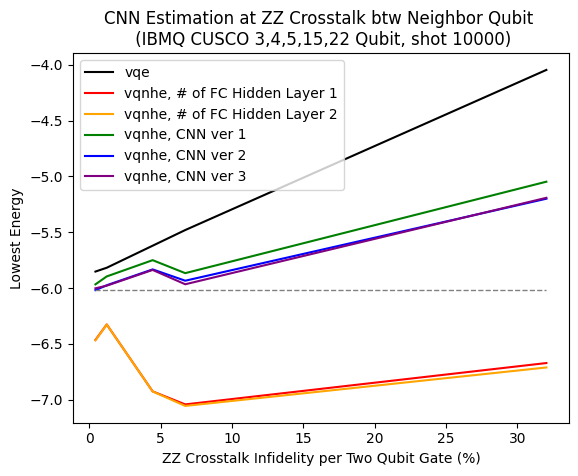

In [ ]:
infidelity_list = [0.428, 1.219, 4.436, 6.719, 32.022]

vqe = [-5.8522, -5.818000, -5.6206, -5.4804, -4.046399]
vqnheFC1 = [-6.464399, -6.326090, -6.925281, -7.041906, -6.671450]
vqnheFC2 = [-6.467973, -6.327003, -6.926112, -7.055456, -6.711134]
vqnheCNN1 = [-5.966579, -5.895777, -5.750129, -5.866383, -5.047405]
vqnheCNN2 = [-6.018439, -5.974823, -5.832824, -5.934106, -5.199852]
vqnheCNN3 = [-6.002155, -5.978639, -5.837737, -5.965935, -5.191668]


plt.plot(infidelity_list, vqe, label="vqe", color="black")
plt.plot(infidelity_list, vqnheFC1, label="vqnhe, # of FC Hidden Layer 1", color="red")
plt.plot(infidelity_list, vqnheFC2, label="vqnhe, # of FC Hidden Layer 2", color="orange")
plt.plot(infidelity_list, vqnheCNN1, label="vqnhe, CNN ver 1", color="green")
plt.plot(infidelity_list, vqnheCNN2, label="vqnhe, CNN ver 2", color="blue")
plt.plot(infidelity_list, vqnheCNN3, label="vqnhe, CNN ver 3", color="purple")

plt.hlines(-6.02, 0.428, 32.022,  color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("ZZ Crosstalk Infidelity per Two Qubit Gate (%)")
plt.ylabel("Lowest Energy")
plt.title("CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 3,4,5,15,22 Qubit, shot 10000)")

Text(0.5, 1.0, 'CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 3,4,5,15,22 Qubit, shot 10000)')

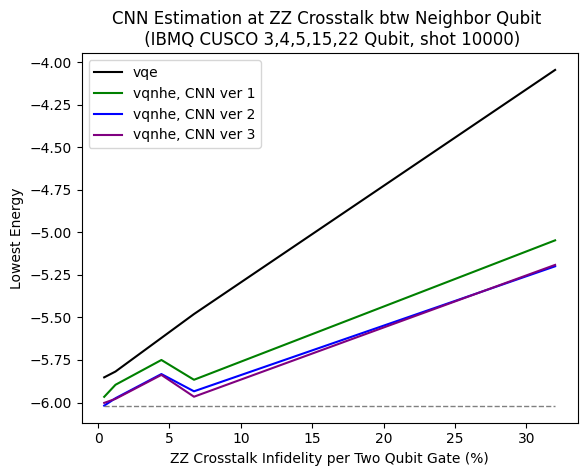

In [ ]:
plt.plot(infidelity_list, vqe, label="vqe", color="black")
plt.plot(infidelity_list, vqnheCNN1, label="vqnhe, CNN ver 1", color="green")
plt.plot(infidelity_list, vqnheCNN2, label="vqnhe, CNN ver 2", color="blue")
plt.plot(infidelity_list, vqnheCNN3, label="vqnhe, CNN ver 3", color="purple")

plt.hlines(-6.02, 0.428, 32.022,  color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("ZZ Crosstalk Infidelity per Two Qubit Gate (%)")
plt.ylabel("Lowest Energy")
plt.title("CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 3,4,5,15,22 Qubit, shot 10000)")

Text(0.5, 1.0, 'CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 3,4,5,15,22 Qubit, shot 10000)')

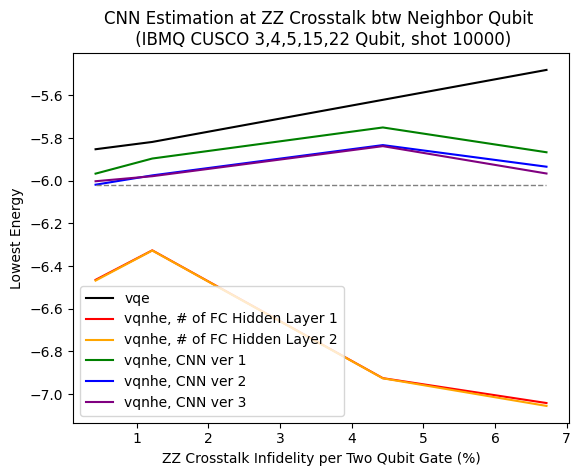

In [ ]:
plt.plot(infidelity_list[0:4], vqe[0:4], label="vqe", color="black")
plt.plot(infidelity_list[0:4], vqnheFC1[0:4], label="vqnhe, # of FC Hidden Layer 1", color="red")
plt.plot(infidelity_list[0:4], vqnheFC2[0:4], label="vqnhe, # of FC Hidden Layer 2", color="orange")
plt.plot(infidelity_list[0:4], vqnheCNN1[0:4], label="vqnhe, CNN ver 1", color="green")
plt.plot(infidelity_list[0:4], vqnheCNN2[0:4], label="vqnhe, CNN ver 2", color="blue")
plt.plot(infidelity_list[0:4], vqnheCNN3[0:4], label="vqnhe, CNN ver 3", color="purple")

plt.hlines(-6.02, 0.428, 6.719,  color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("ZZ Crosstalk Infidelity per Two Qubit Gate (%)")
plt.ylabel("Lowest Energy")
plt.title("CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 3,4,5,15,22 Qubit, shot 10000)")

Text(0.5, 1.0, 'CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 3,4,5,15,22 Qubit, shot 10000)')

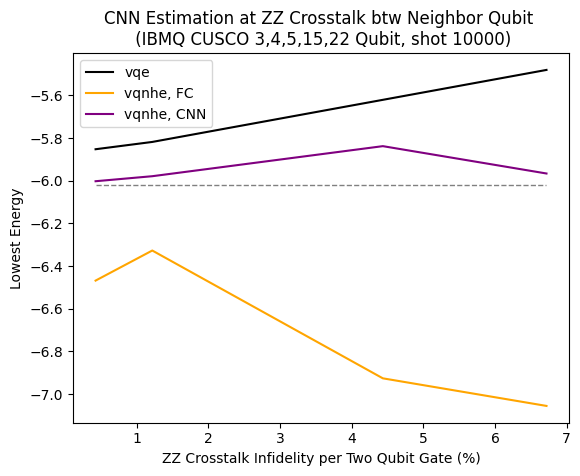

In [ ]:
plt.plot(infidelity_list[0:4], vqe[0:4], label="vqe", color="black")
plt.plot(infidelity_list[0:4], vqnheFC2[0:4], label="vqnhe, FC", color="orange")
plt.plot(infidelity_list[0:4], vqnheCNN3[0:4], label="vqnhe, CNN", color="purple")

plt.hlines(-6.02, 0.428, 6.719,  color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("ZZ Crosstalk Infidelity per Two Qubit Gate (%)")
plt.ylabel("Lowest Energy")
plt.title("CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 3,4,5,15,22 Qubit, shot 10000)")